In [1]:
import pandas as pd
#import shapefile as shp
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

In [2]:
data = pd.read_csv("material.csv")
data

C:\Users\Tao\AppData\Local\Temp\ipykernel_3576\2203651746.py:1: DtypeWarning: Columns (5,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("material.csv")


ao_hechos  mes_hechos         fecha_hechos  ao_inicio mes_inicio  \
0          2020.0       Enero  2020-01-01 01:15:00       2020      Enero   
1          2020.0       Enero  2020-01-01 00:50:00       2020      Enero   
2          2020.0       Enero  2020-01-01 01:15:00       2020      Enero   
3          2020.0       Enero  2020-01-01 01:40:00       2020      Enero   
4          2020.0       Enero  2020-01-01 01:00:00       2020      Enero   
...           ...         ...                  ...        ...        ...   
197082     2020.0  Septiembre  2020-09-30 10:00:00       2021      Marzo   
197083     2020.0       Marzo  2020-03-30 23:30:00       2021      Marzo   
197084     2020.0   Diciembre  2020-12-01 12:00:00       2021      Marzo   
197085     2020.0   Noviembre  2020-11-17 06:53:00       2021      Marzo   
197086     2020.0   Diciembre  2020-12-28 03:00:00       2021      Marzo   

               fecha_inicio  \
0       2020-01-01 01:28:02   
1       2020-01-01 01:33:16   
2       2020-01-01 02:09:21   
3       2020-01-01 02:29:33   
4       2020-01-01 03:03:43   
...                     ...   
197082           1617213952   
197083           1617216516   
197084           1617218902   
197085           1617220631   
197086           1617229301   

                                                   delito  \
0        HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (CAIDA)   
1          ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
2                         DAÑO EN PROPIEDAD AJENA CULPOSA   
3          ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
4       ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...   
...                                                   ...   
197082                                             FRAUDE   
197083                                 VIOLENCIA FAMILIAR   
197084                            USURPACIÓN DE IDENTIDAD   
197085                                             FRAUDE   
197086        ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO   

                                                 fiscalia agencia  \
0       FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...   GAM-4   
1       FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...   CUH-2   
2       FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...   IZP-8   
3       FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...   IZP-6   
4       FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN AZCAP...    AZ-4   
...                                                   ...     ...   
197082  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MIGUE...    MH-4   
197083  FISCALÍA DE INVESTIGACIÓN DEL DELITO DE VIOLEN...      75   
197084  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...   CUH-6   
197085  FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...   CUH-2   
197086                        AGENCIA DE DENUNCIA DIGITAL   CEN-1   

                 unidad_investigacion  \
0                              UI-2CD   
1                              UI-2CD   
2                              UI-2CD   
3                              UI-2CD   
4                              UI-2SD   
...                               ...   
197082                         UI-2SD   
197083  Unidad de investigación 7 S/D   
197084                         UI-2SD   
197085                         UI-2SD   
197086  Unidad de Investigación 1 S/D   

                                         categoria_delito  \
0                                  DELITO DE BAJO IMPACTO   
1       ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...   
2                                  DELITO DE BAJO IMPACTO   
3       ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...   
4                    ROBO DE VEHÍCULO CON Y SIN VIOLENCIA   
...                                                   ...   
197082                             DELITO DE BAJO IMPACTO   
197083                             DELITO DE BAJO IMPACTO   
197084                             DELITO DE BAJO IMPACTO   
197085                             DELITO DE BAJO IMPACTO

In [3]:
dt.datetime.strptime(data["fecha_hechos"][0],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2020, 1, 1, 1, 15)

In [4]:
data["fecha_hechos"][0]

'2020-01-01 01:15:00'

In [5]:
data["fecha_hechos"]=pd.to_datetime(data["fecha_hechos"],format="%Y-%m-%d %H:%M:%S")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197087 entries, 0 to 197086
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ao_hechos             197087 non-null  float64       
 1   mes_hechos            197087 non-null  object        
 2   fecha_hechos          197087 non-null  datetime64[ns]
 3   ao_inicio             197087 non-null  int64         
 4   mes_inicio            197087 non-null  object        
 5   fecha_inicio          197087 non-null  object        
 6   delito                197087 non-null  object        
 7   fiscalia              197085 non-null  object        
 8   agencia               197087 non-null  object        
 9   unidad_investigacion  197085 non-null  object        
 10  categoria_delito      197087 non-null  object        
 11  calle_hechos          196759 non-null  object        
 12  calle_hechos2         73614 non-null   object        
 13 

In [7]:
resumen=data[["fecha_hechos","delito"]]

In [8]:
resumen=resumen[resumen["delito"]=="ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA"]

In [9]:
resumen

fecha_hechos                                          delito
1      2020-01-01 00:50:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
3      2020-01-01 01:40:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
18     2020-01-01 08:49:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
40     2020-01-01 11:00:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
69     2020-01-01 09:30:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
...                    ...                                             ...
196092 2020-11-04 10:00:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
196110 2020-12-23 19:00:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
196203 2020-11-08 14:00:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
196244 2020-03-12 00:25:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
196682 2020-03-22 20:33:00  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA

[8644 rows x 2 columns]

In [10]:
resumen.groupby(resumen.fecha_hechos.dt.hour).count()

fecha_hechos  delito
fecha_hechos                      
0                      194     194
1                      157     157
2                      128     128
3                       87      87
4                      106     106
5                      202     202
6                      236     236
7                      227     227
8                      277     277
9                      258     258
10                     408     408
11                     450     450
12                     528     528
13                     553     553
14                     584     584
15                     575     575
16                     536     536
17                     419     419
18                     397     397
19                     529     529
20                     546     546
21                     492     492
22                     412     412
23                     343     343

Text(0, 0.5, 'Numero de delitos')

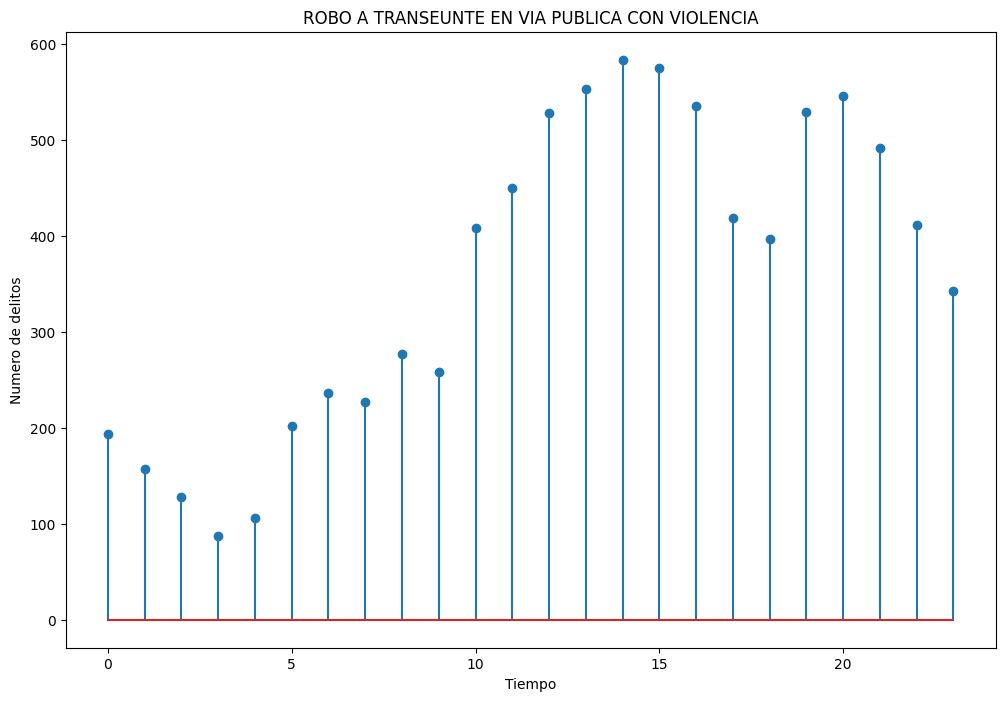

In [11]:
y=resumen.groupby(resumen.fecha_hechos.dt.hour).count()["delito"]
x=resumen.groupby(resumen.fecha_hechos.dt.hour).count().index
grafica=(plt.figure(figsize=(12,8)))
plt.stem(x,y)
plt.title("ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA")
plt.xlabel("Tiempo")
plt.ylabel("Numero de delitos")

In [12]:
delitos=list(data["delito"].unique())

In [13]:
len(delitos)

283

In [14]:
data[["fecha_hechos","delito"]]

fecha_hechos                                             delito
0      2020-01-01 01:15:00   HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (CAIDA)
1      2020-01-01 00:50:00     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
2      2020-01-01 01:15:00                    DAÑO EN PROPIEDAD AJENA CULPOSA
3      2020-01-01 01:40:00     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
4      2020-01-01 01:00:00  ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...
...                    ...                                                ...
197082 2020-09-30 10:00:00                                             FRAUDE
197083 2020-03-30 23:30:00                                 VIOLENCIA FAMILIAR
197084 2020-12-01 12:00:00                            USURPACIÓN DE IDENTIDAD
197085 2020-11-17 06:53:00                                             FRAUDE
197086 2020-12-28 03:00:00        ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO

[197087 rows x 2 columns]

C:\Users\Tao\AppData\Local\Temp\ipykernel_3576\122193163.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  grafica=(plt.figure(figsize=(12,8)))


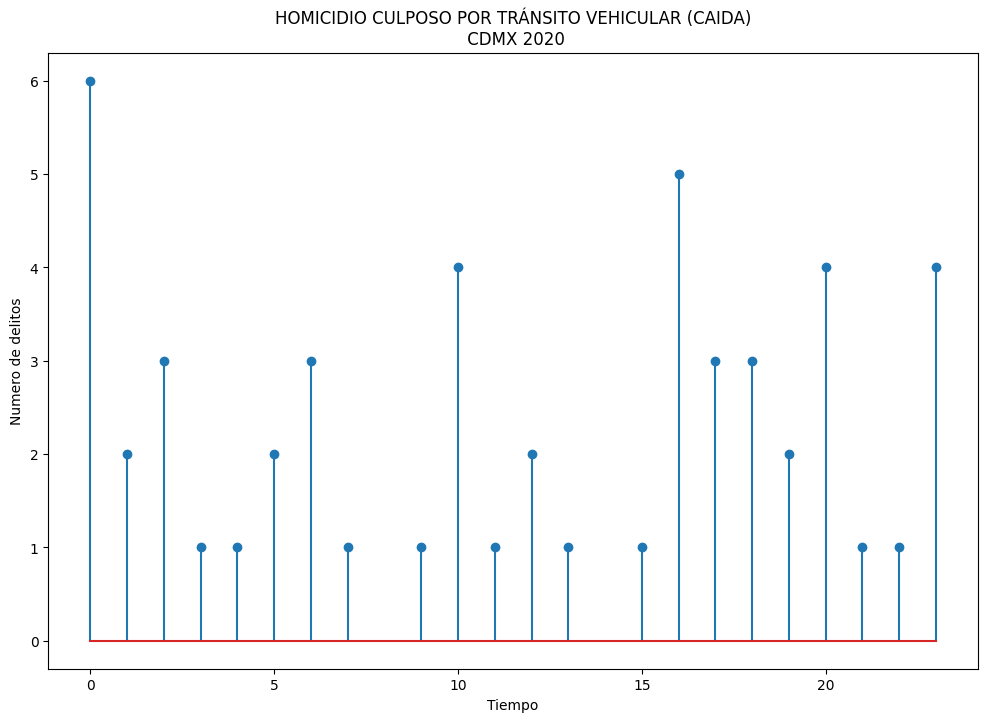

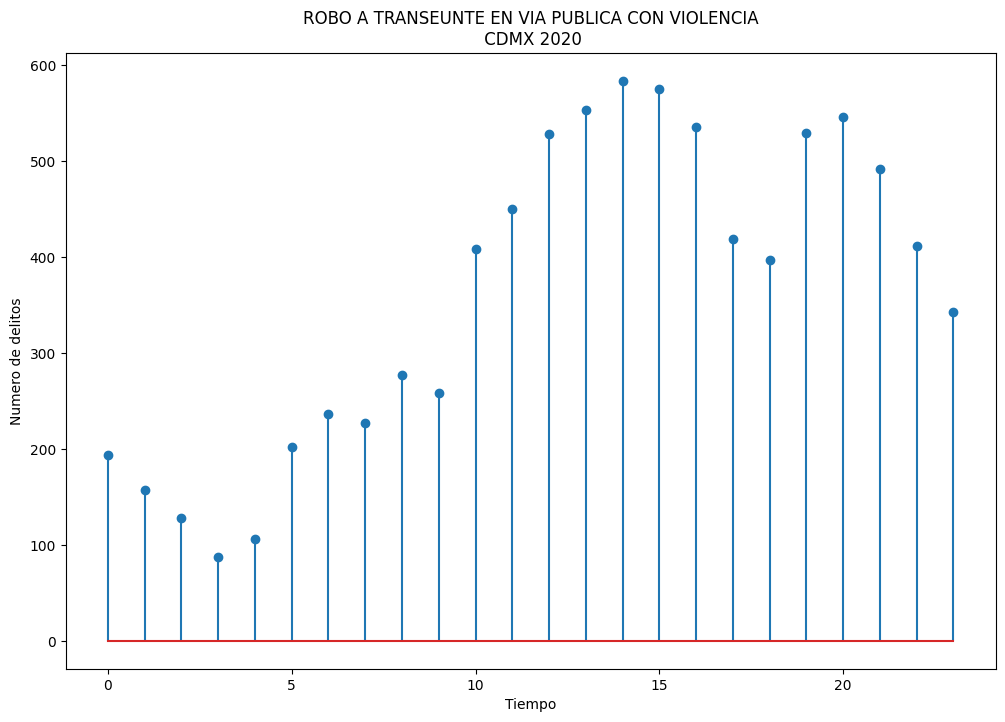

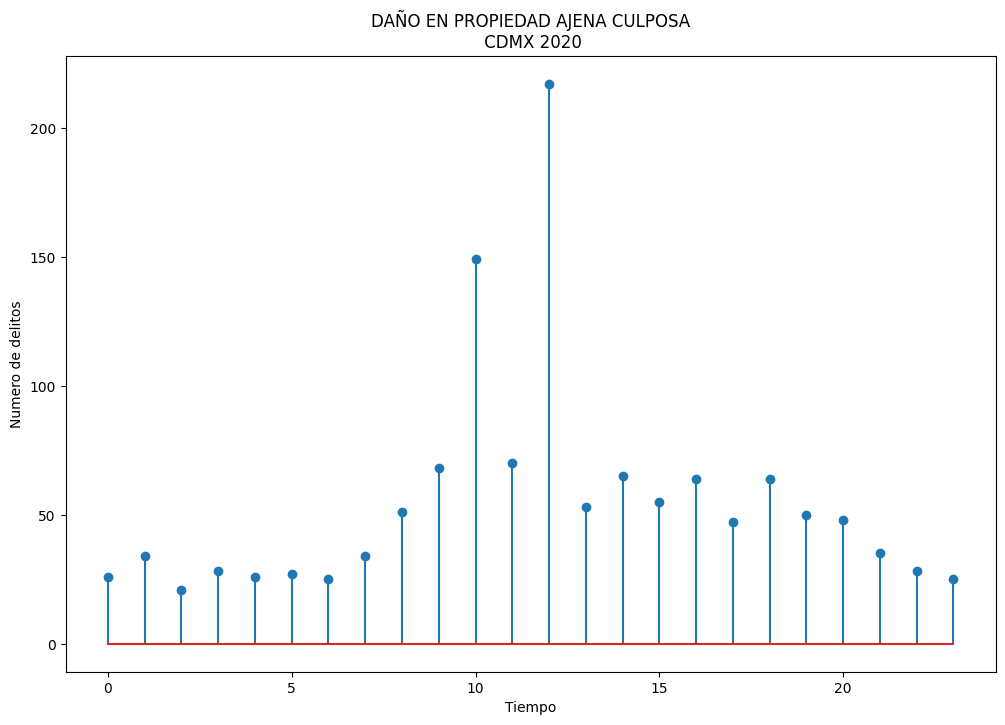

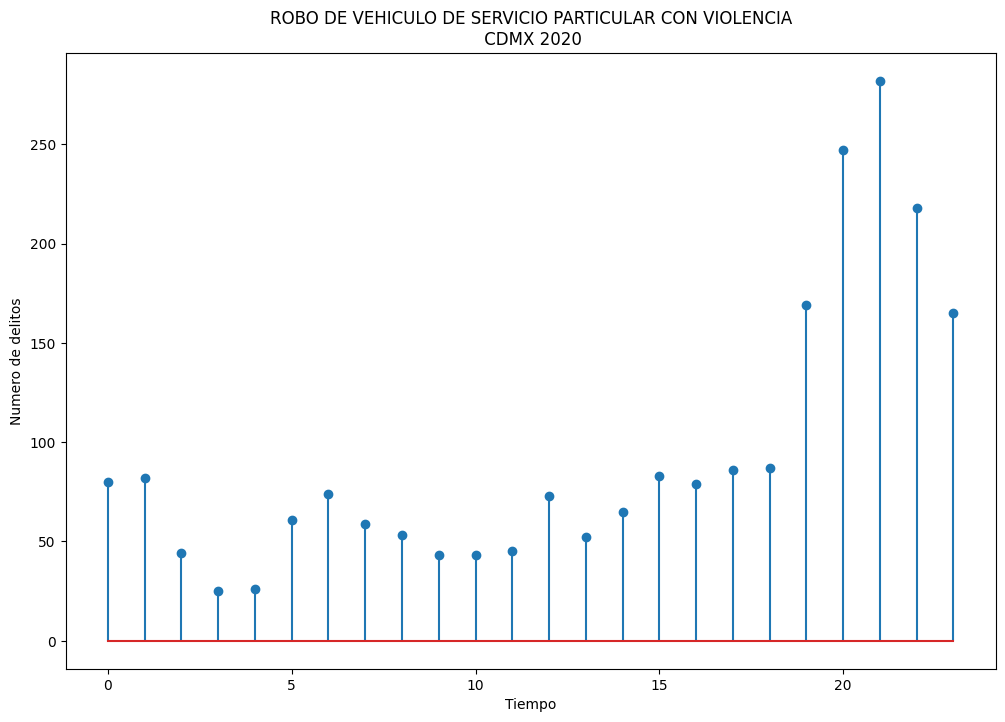

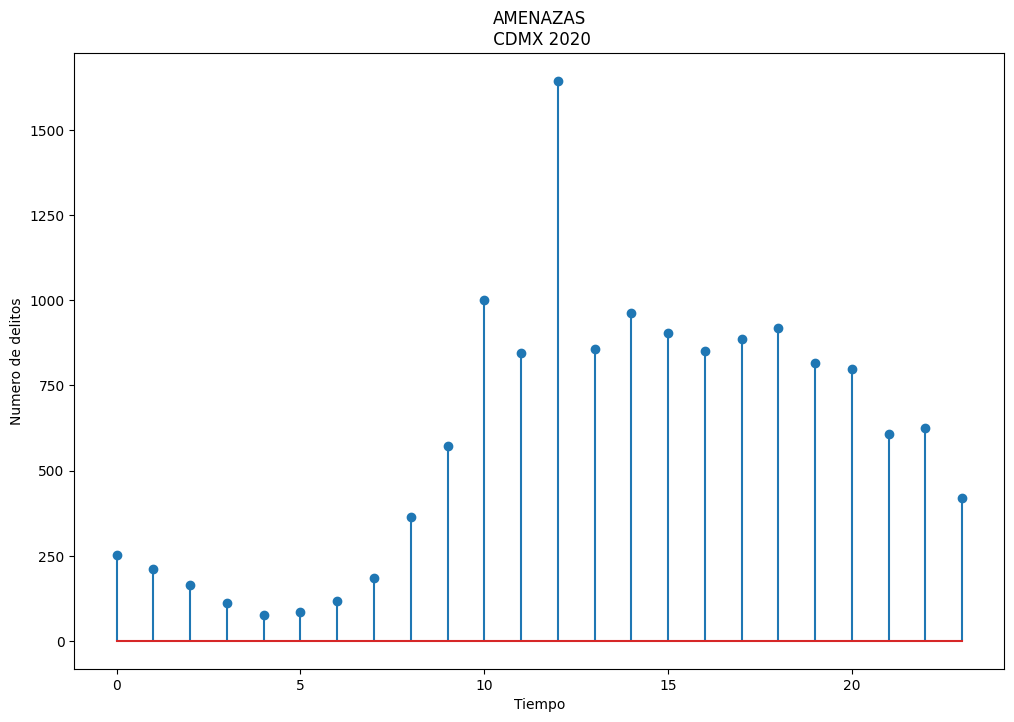

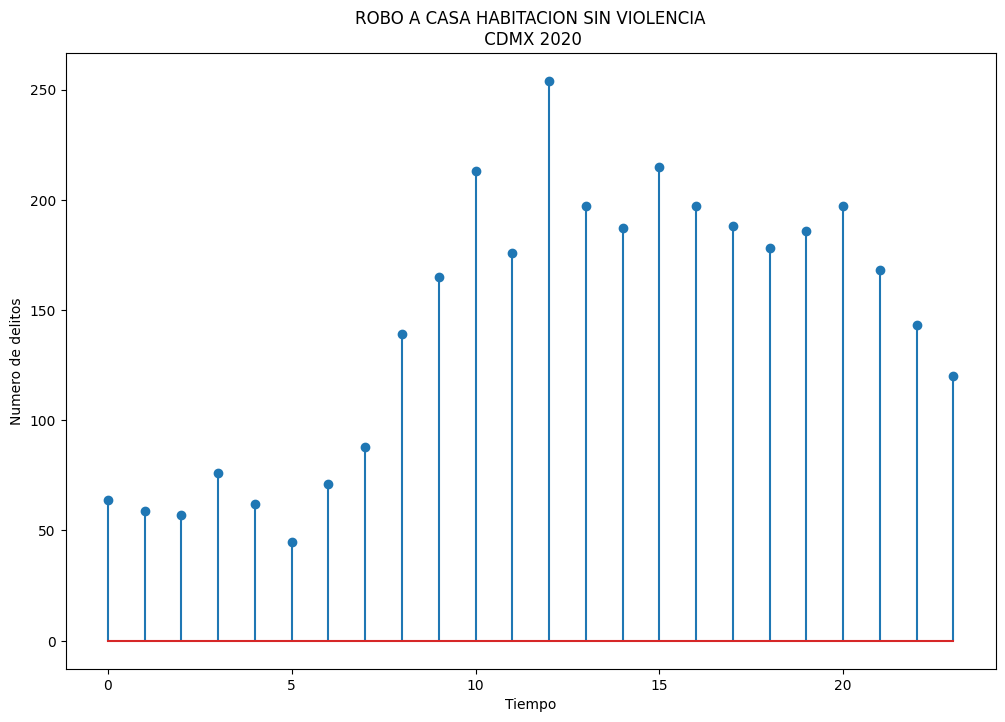

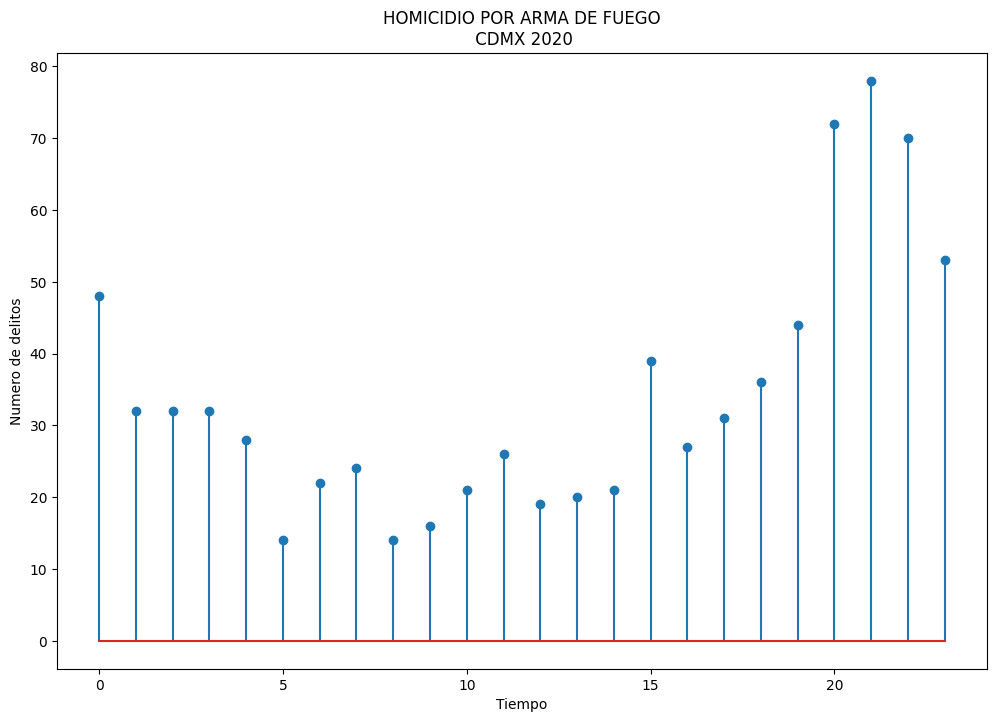

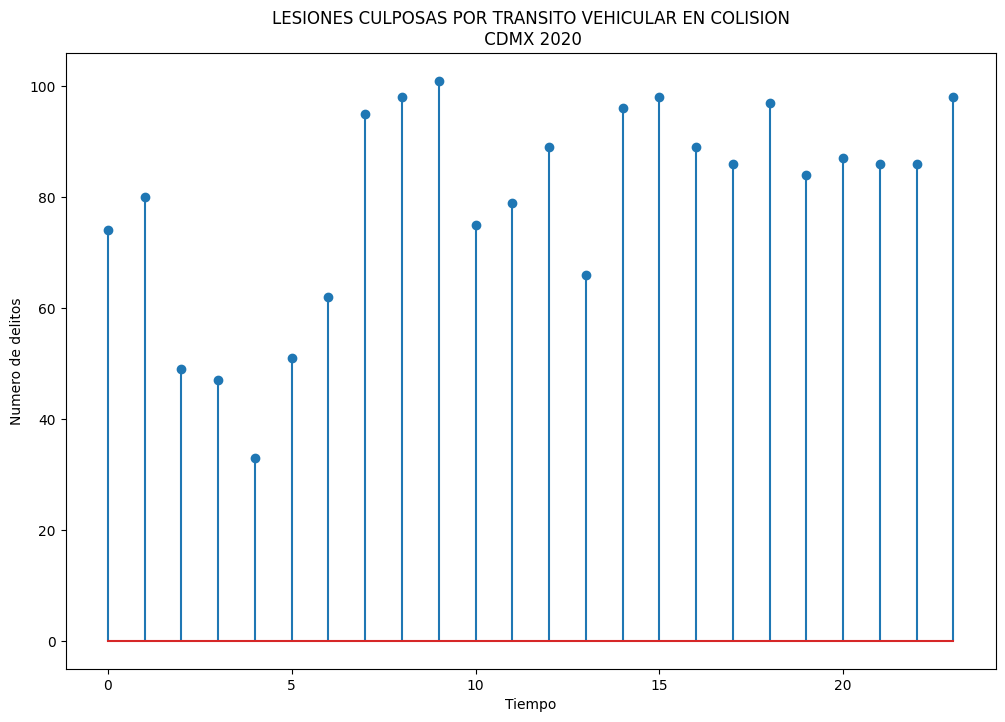

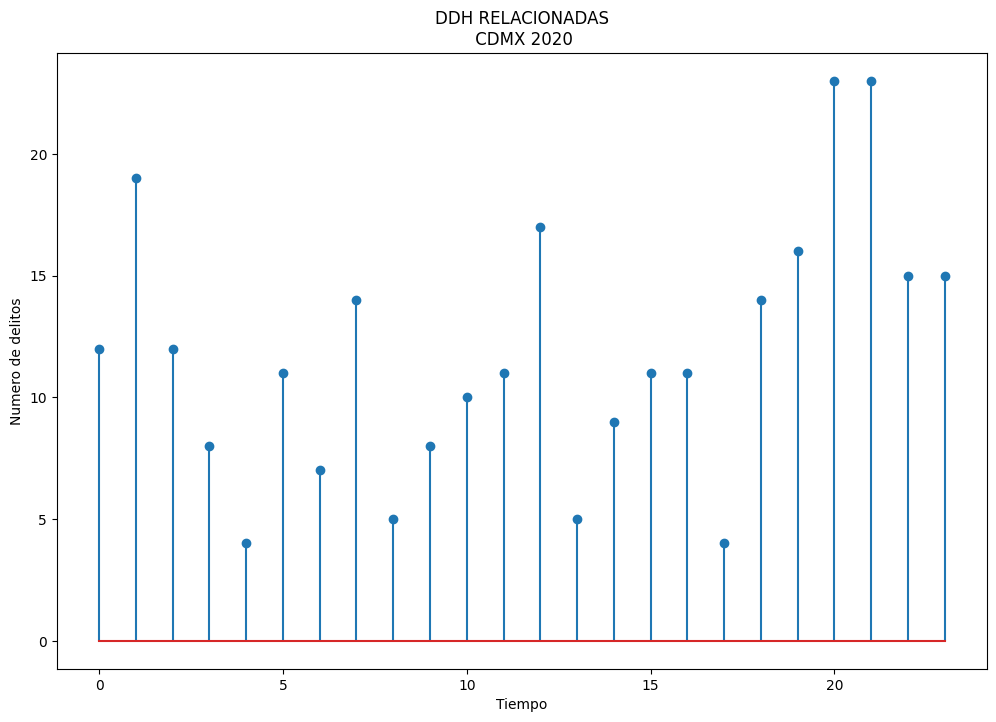

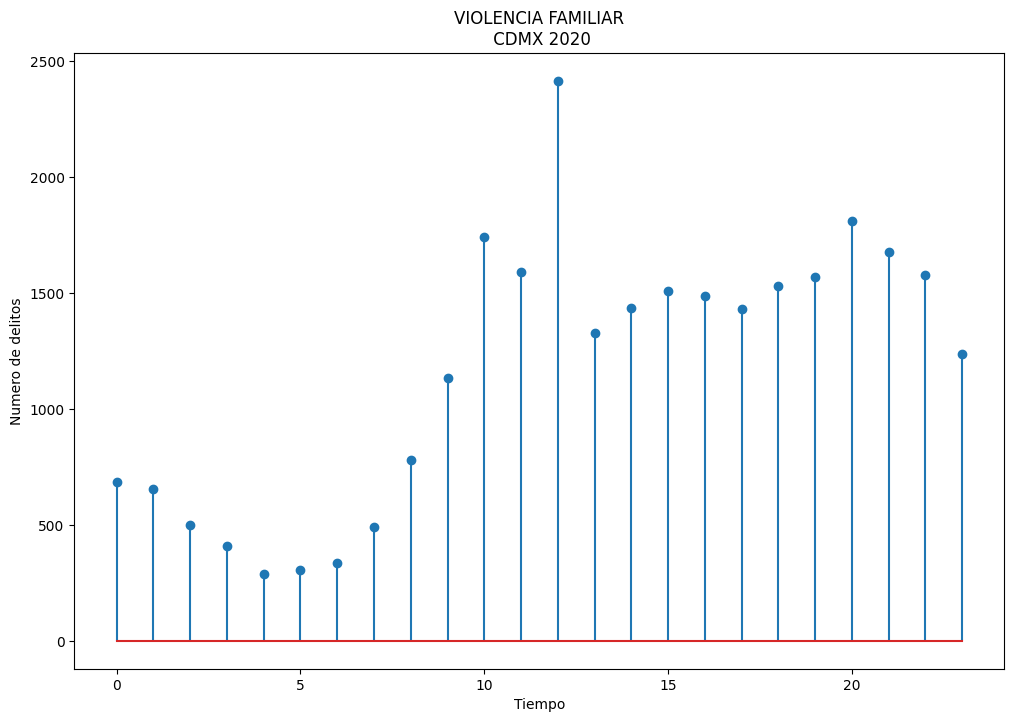

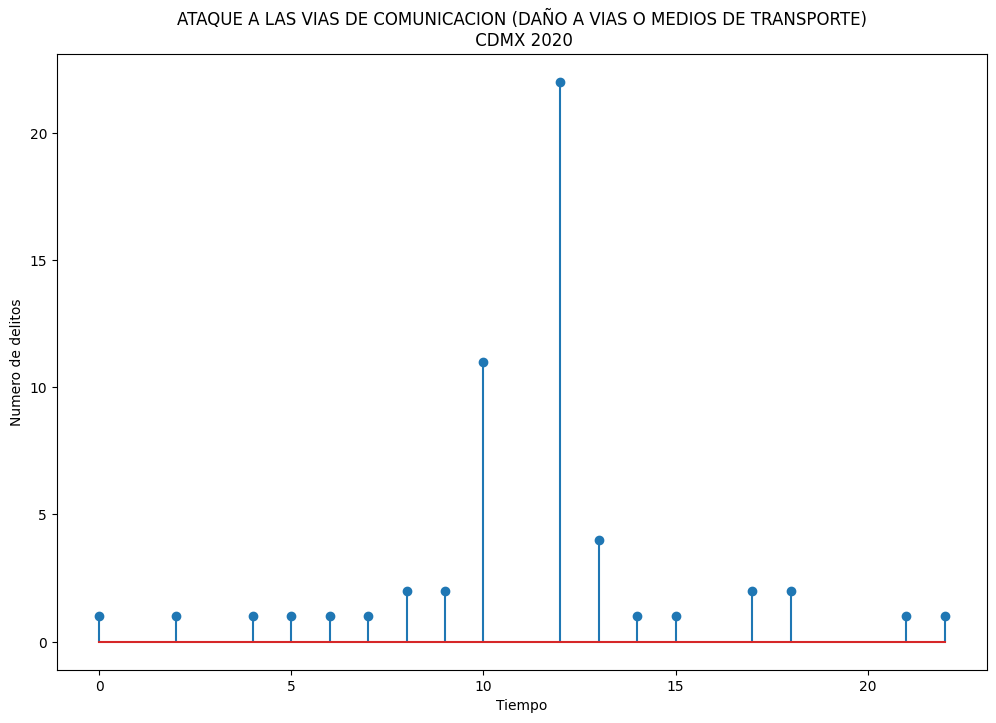

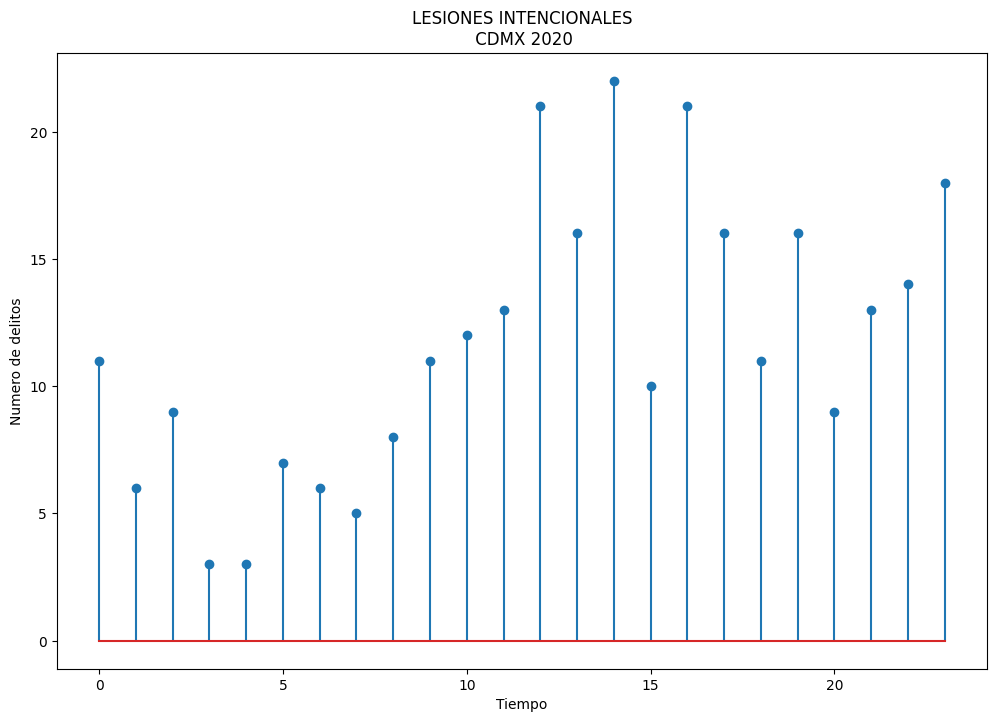

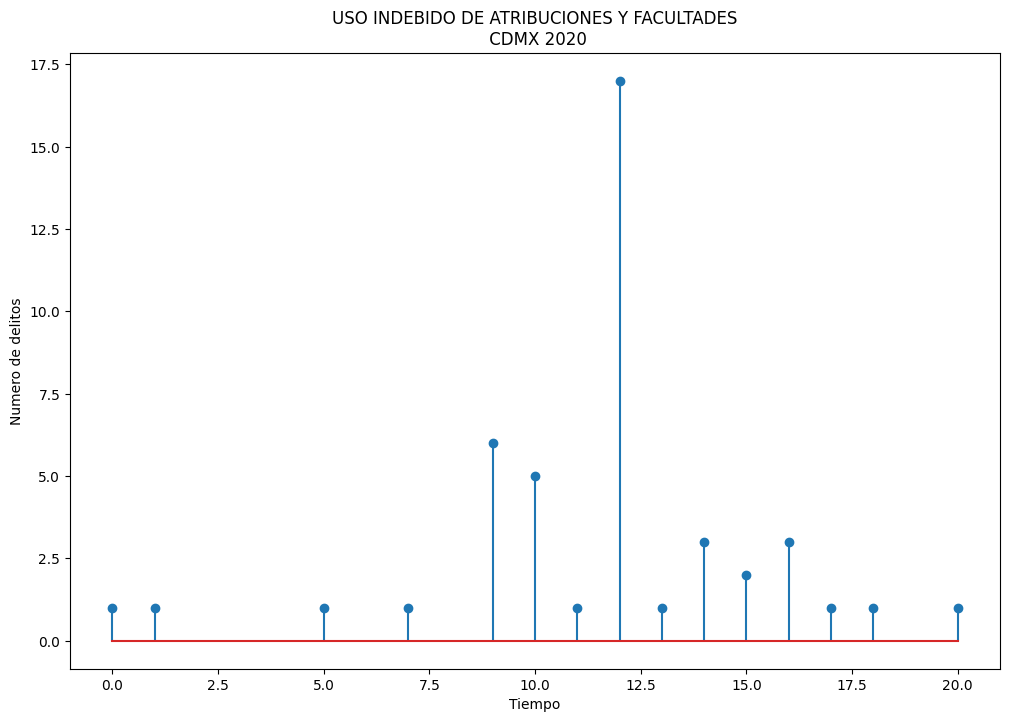

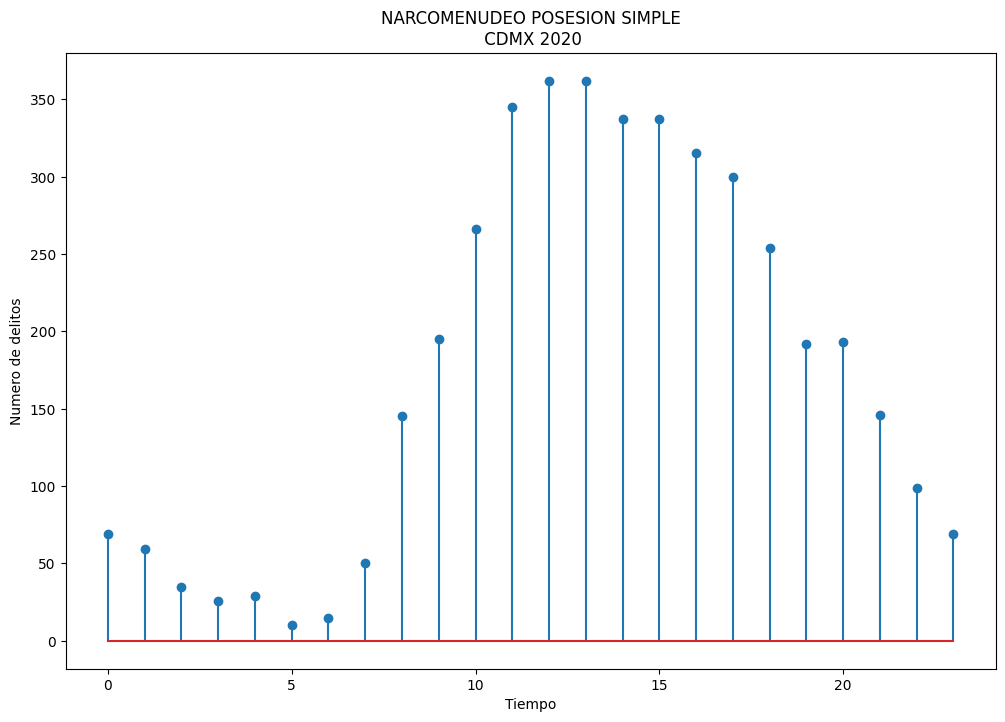

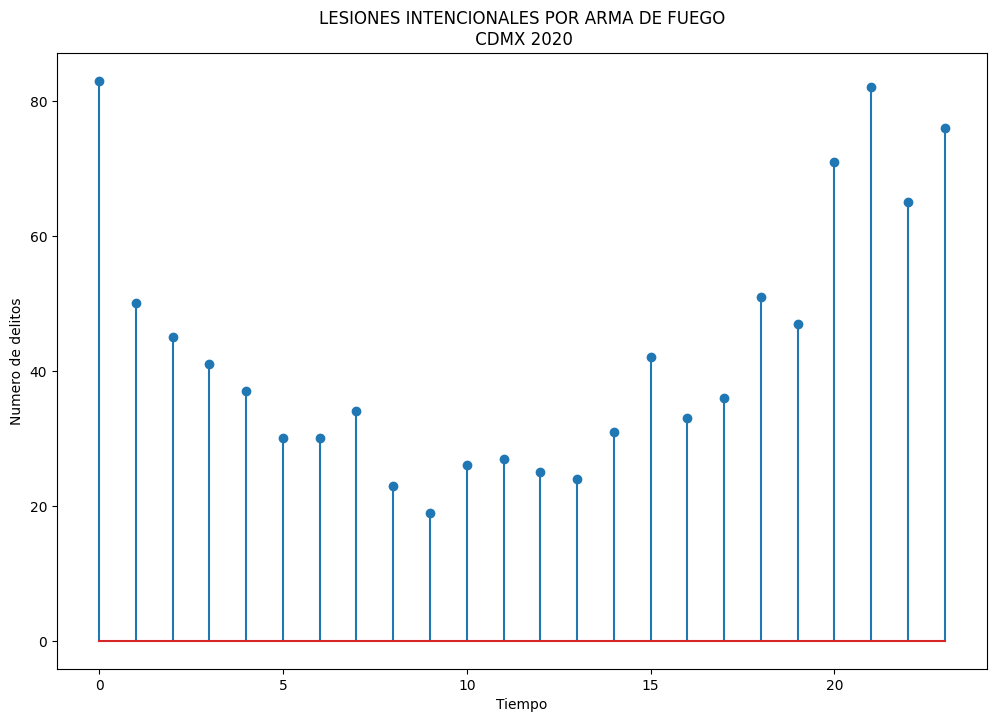

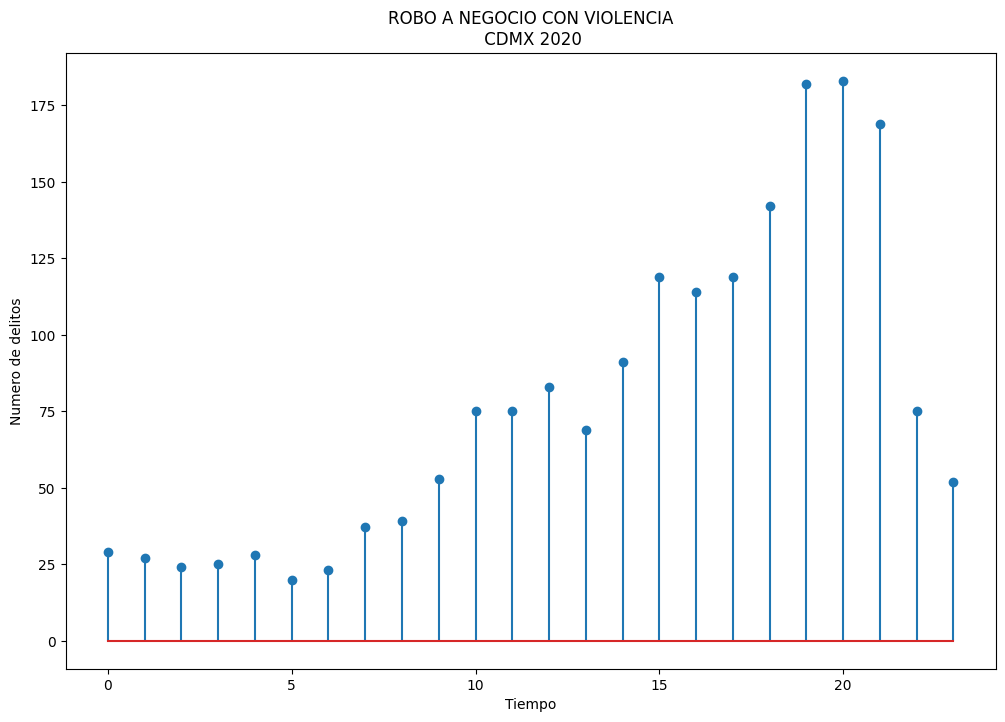

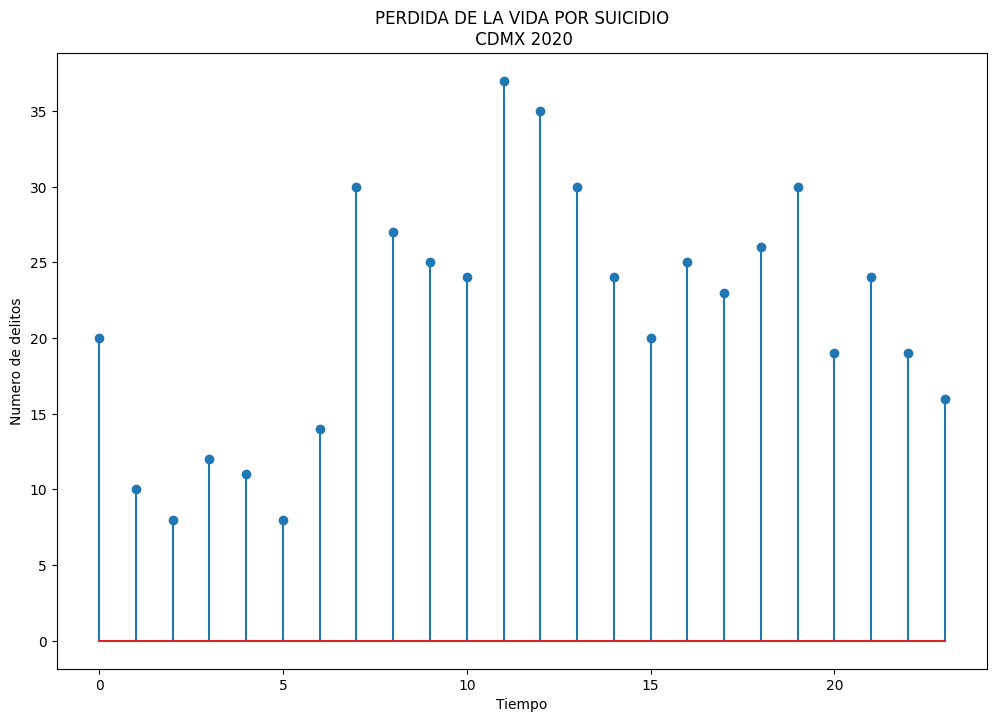

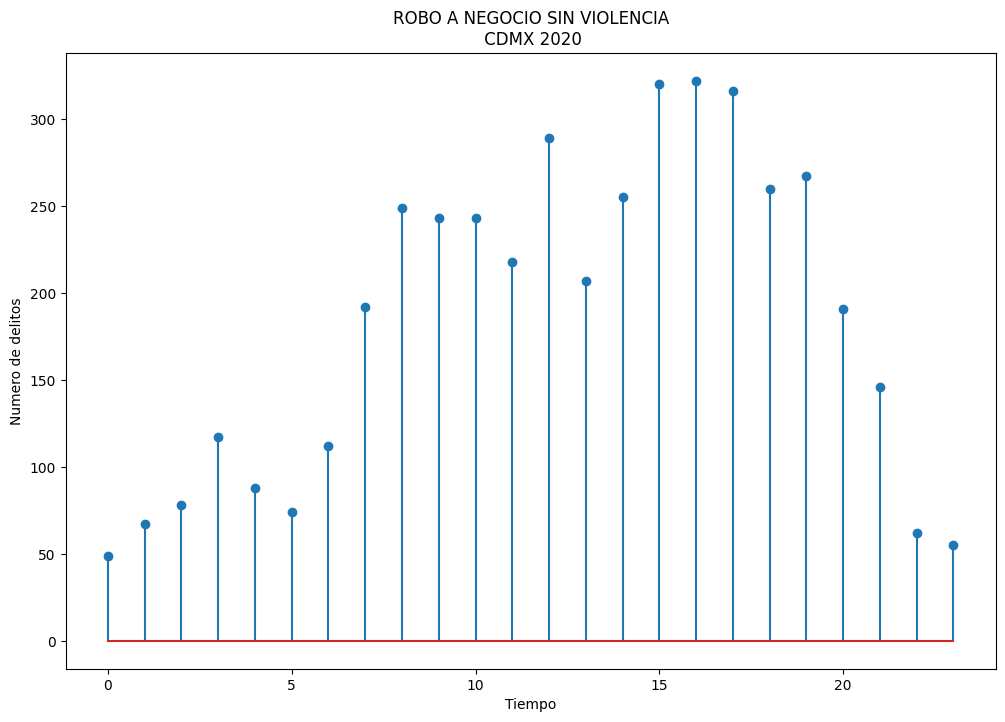

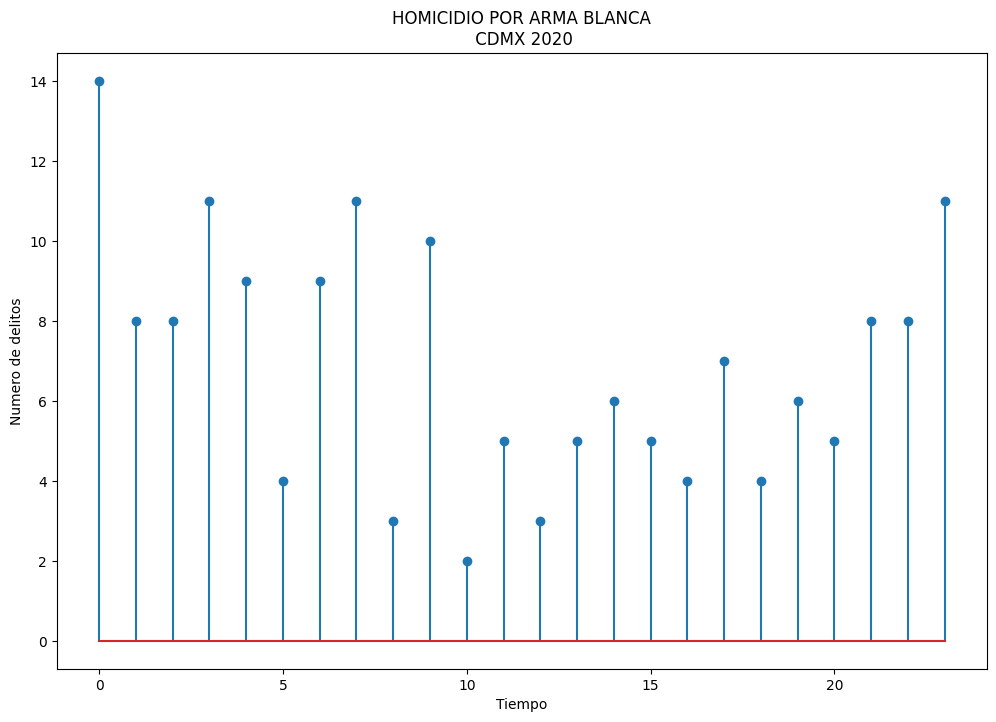

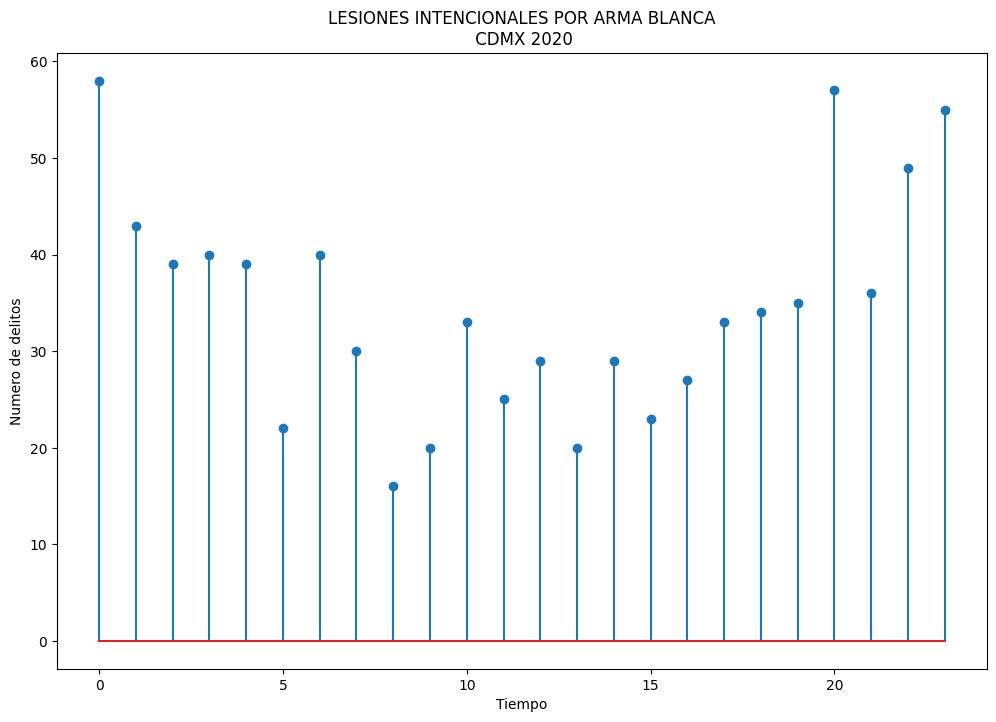

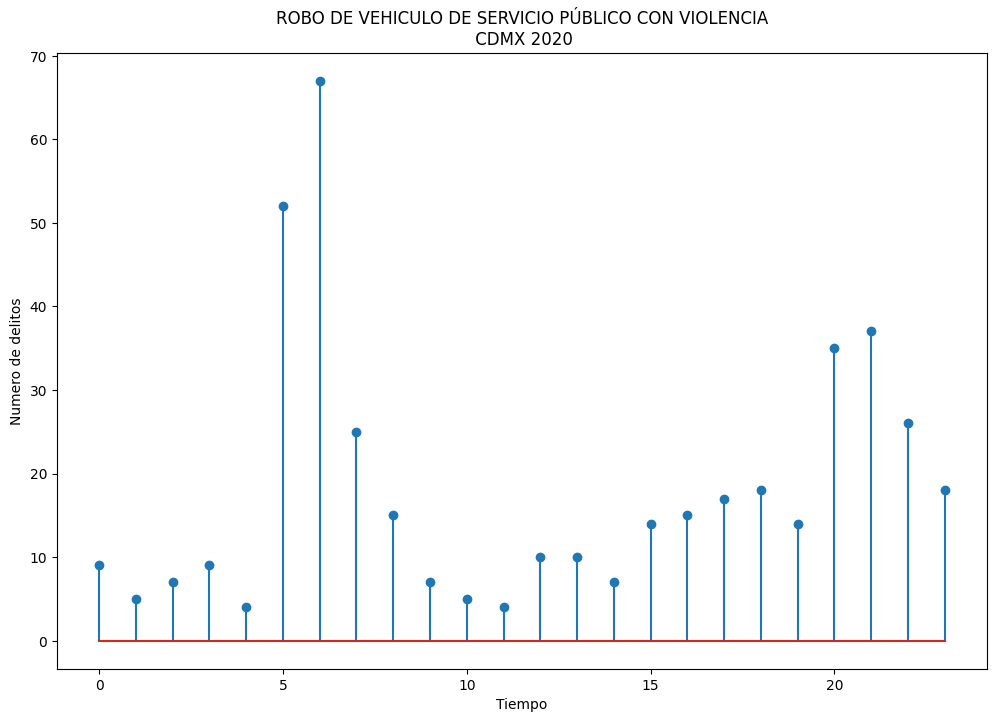

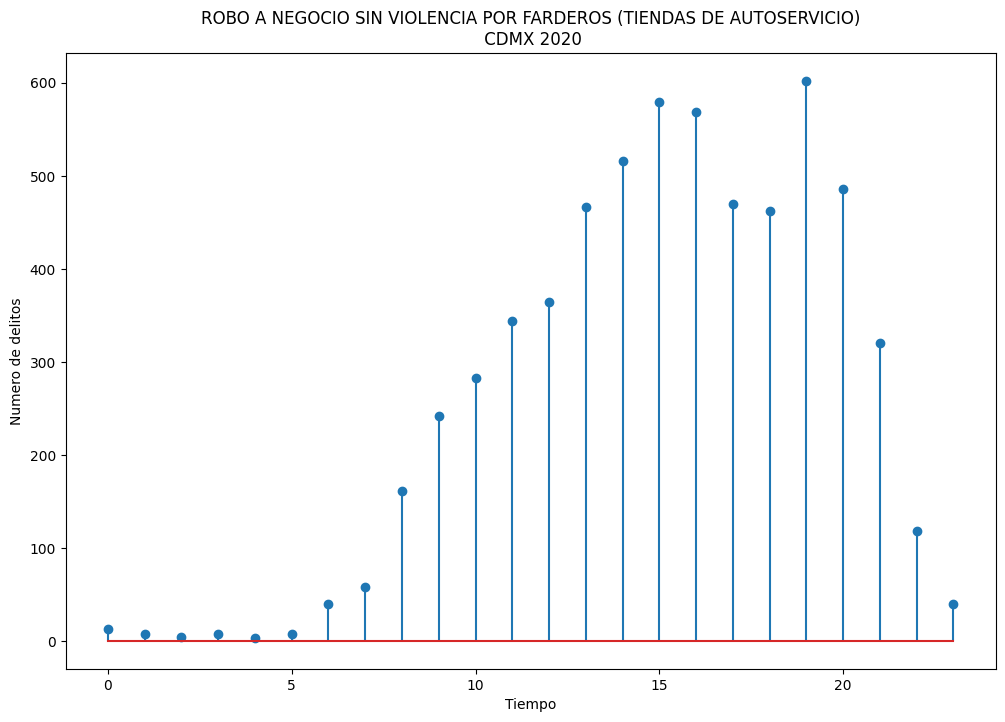

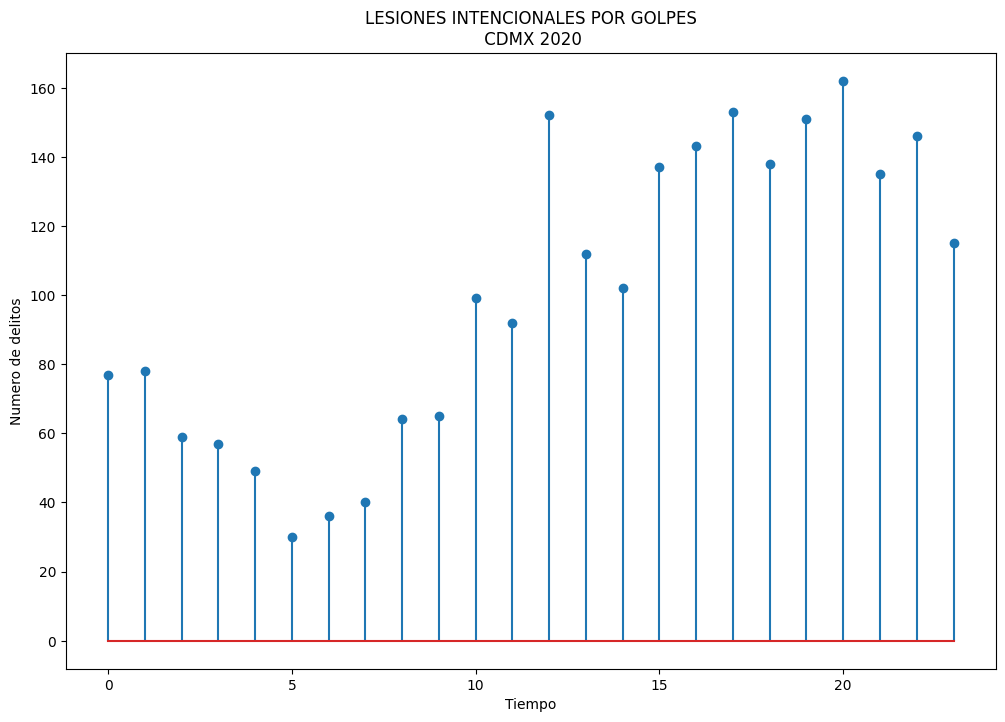

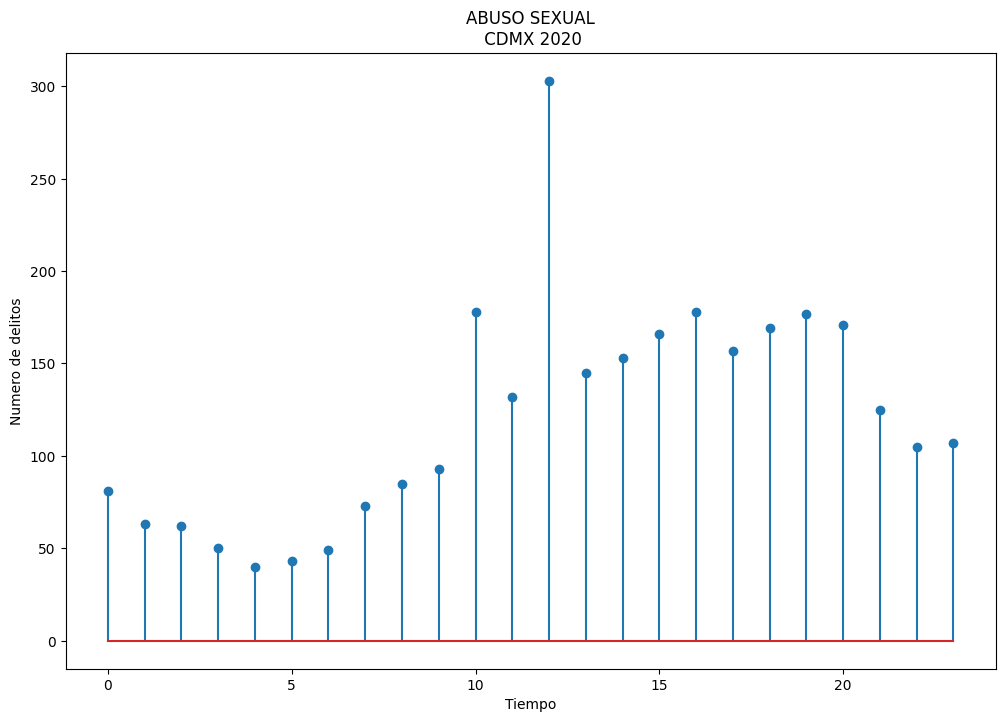

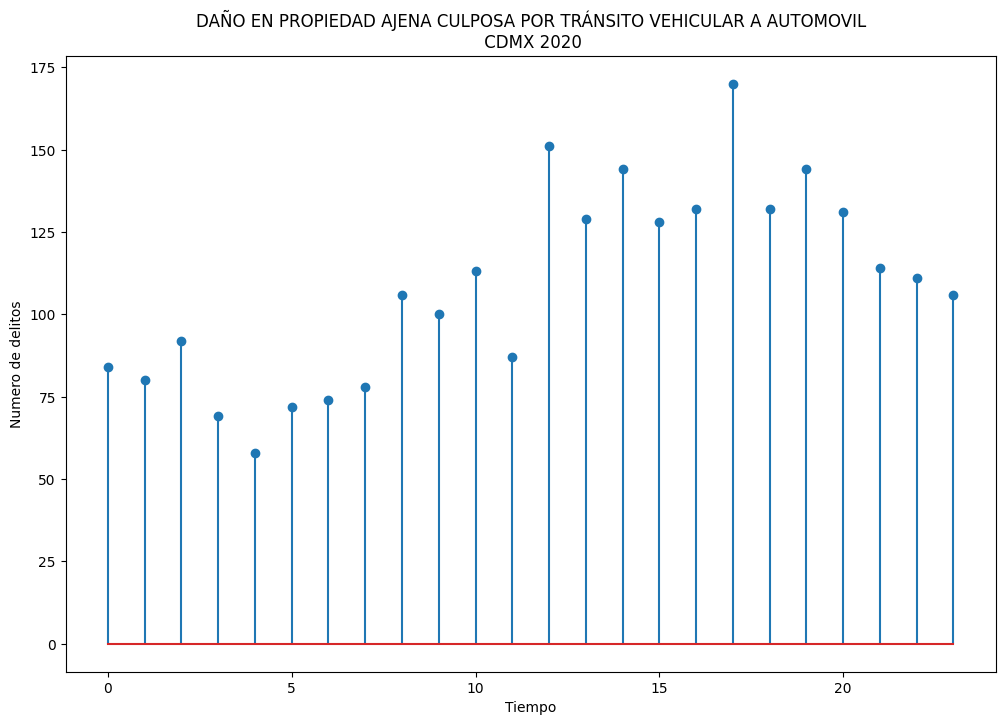

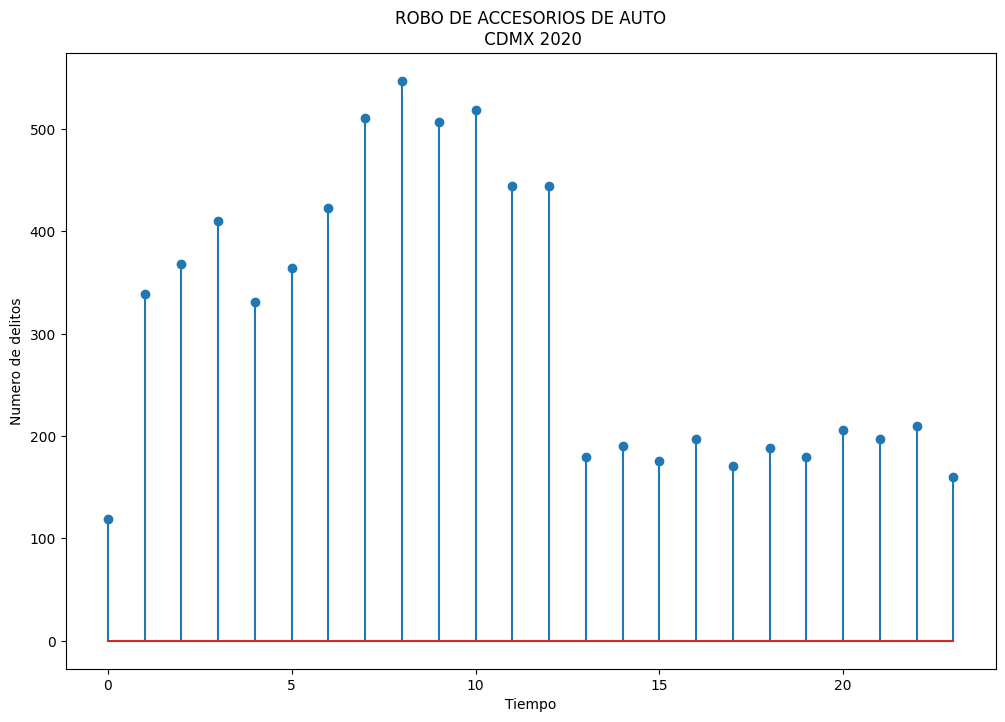

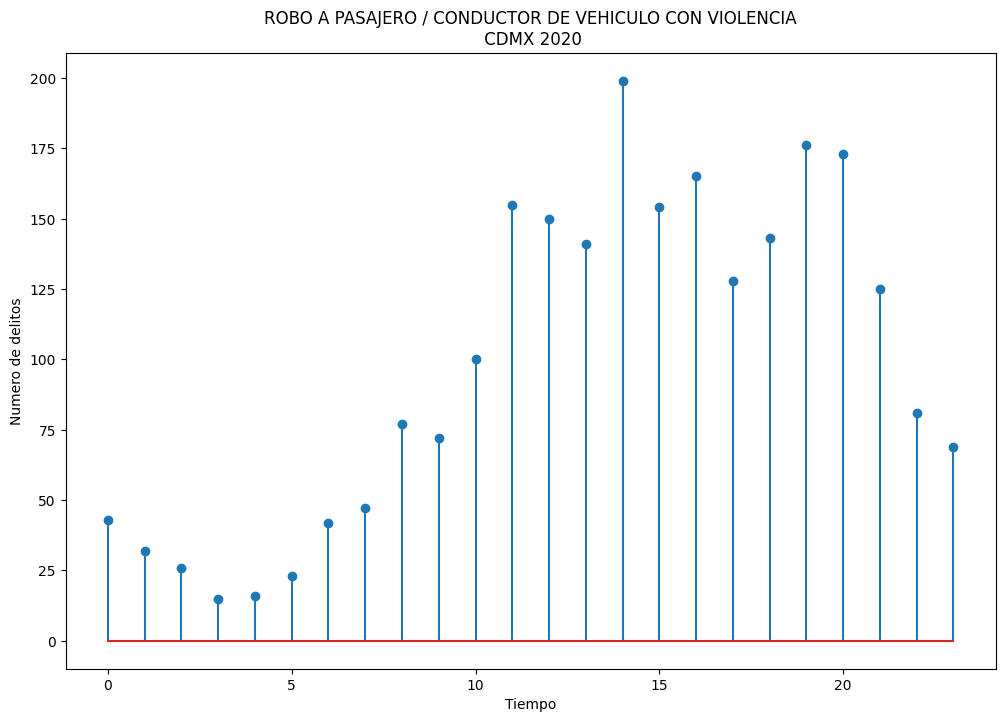

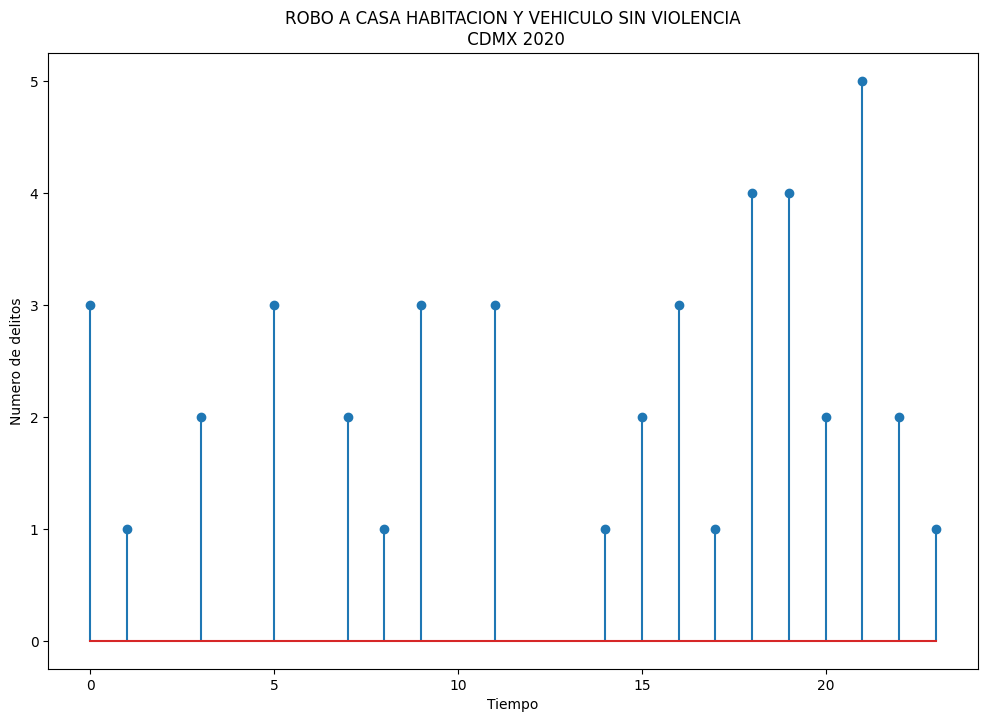

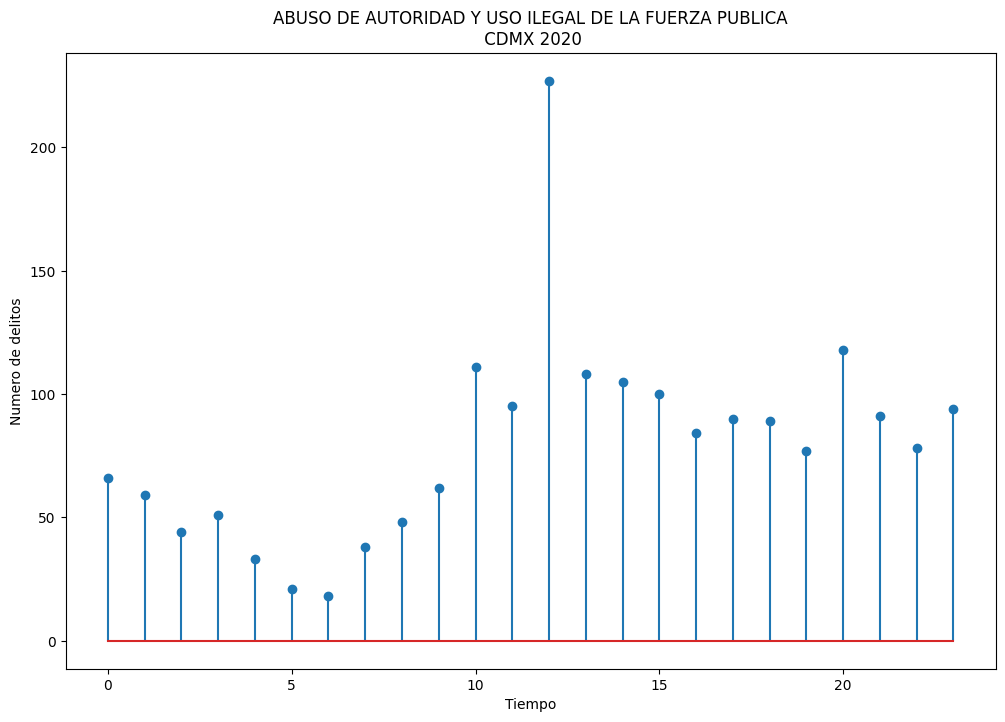

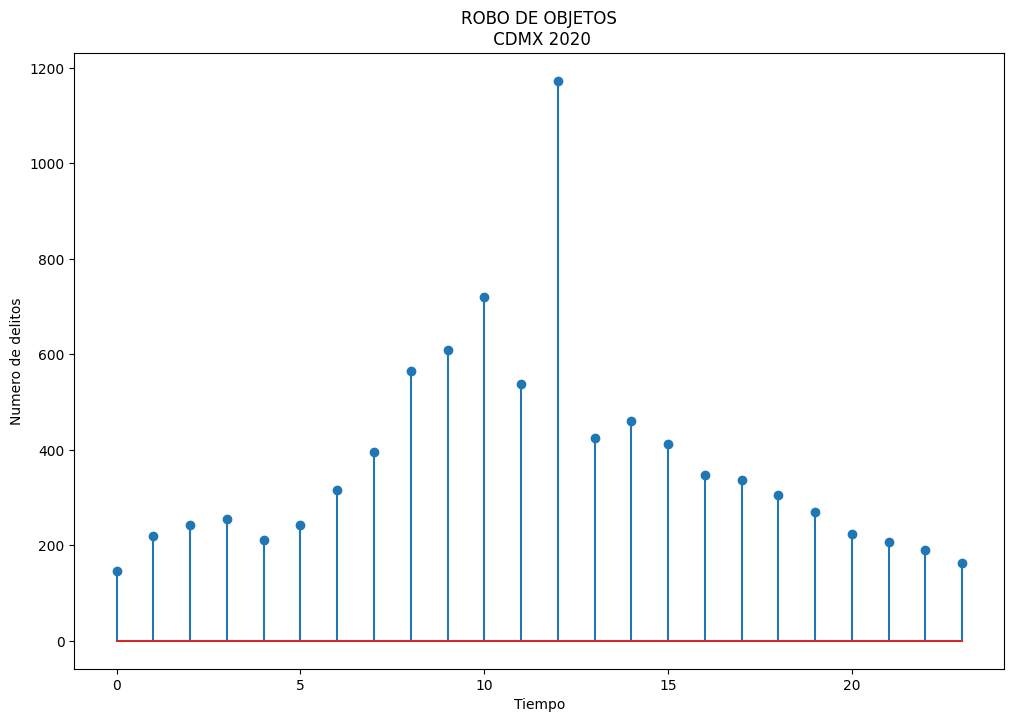

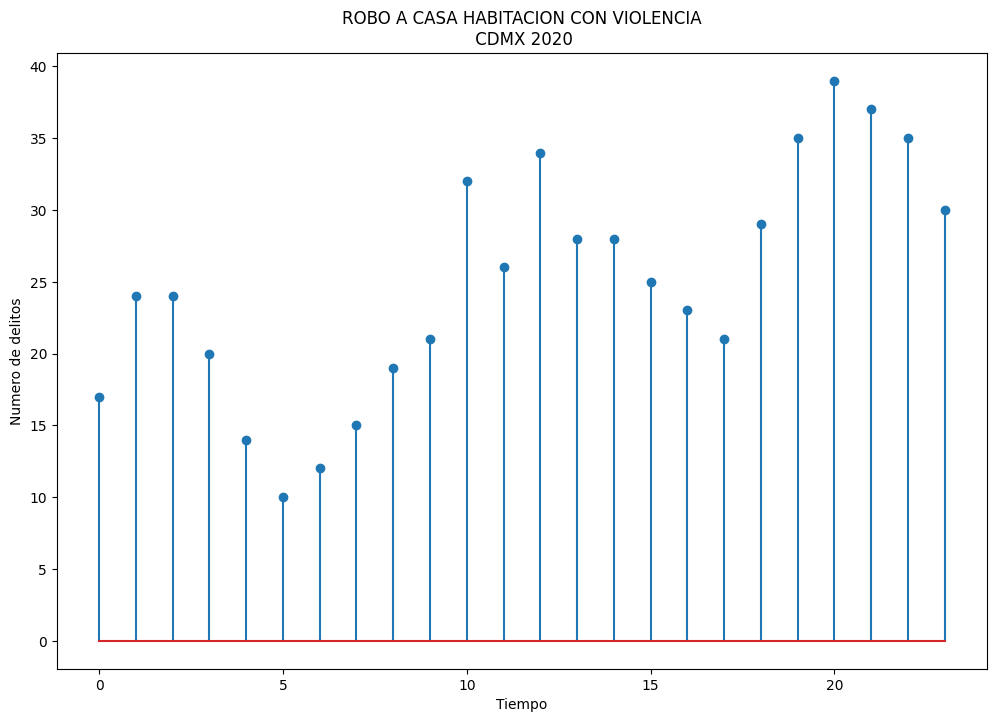

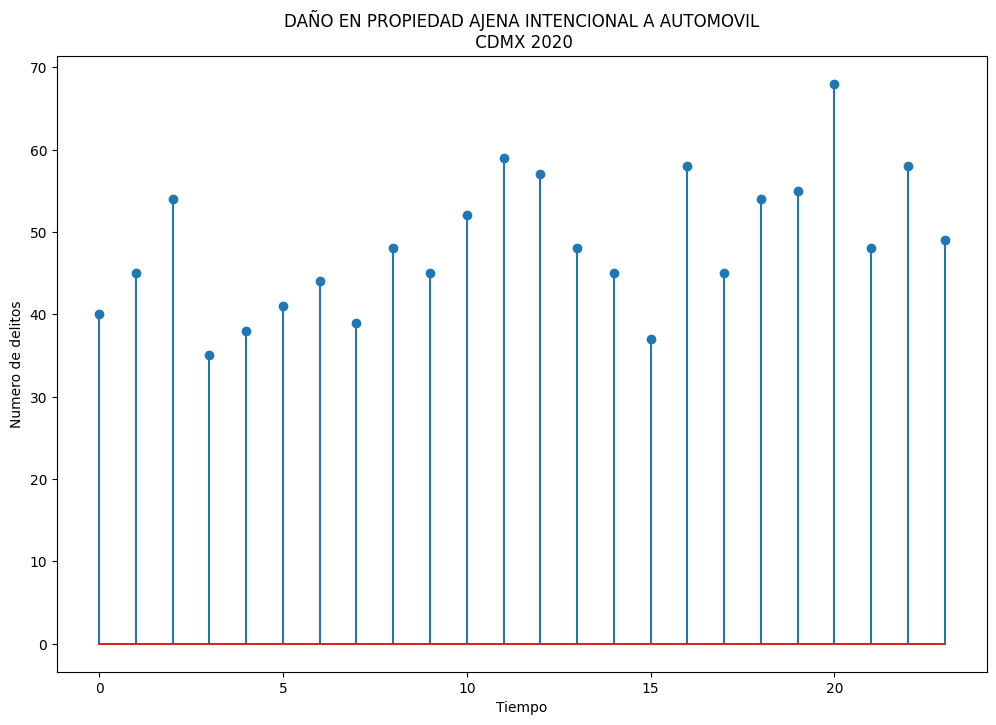

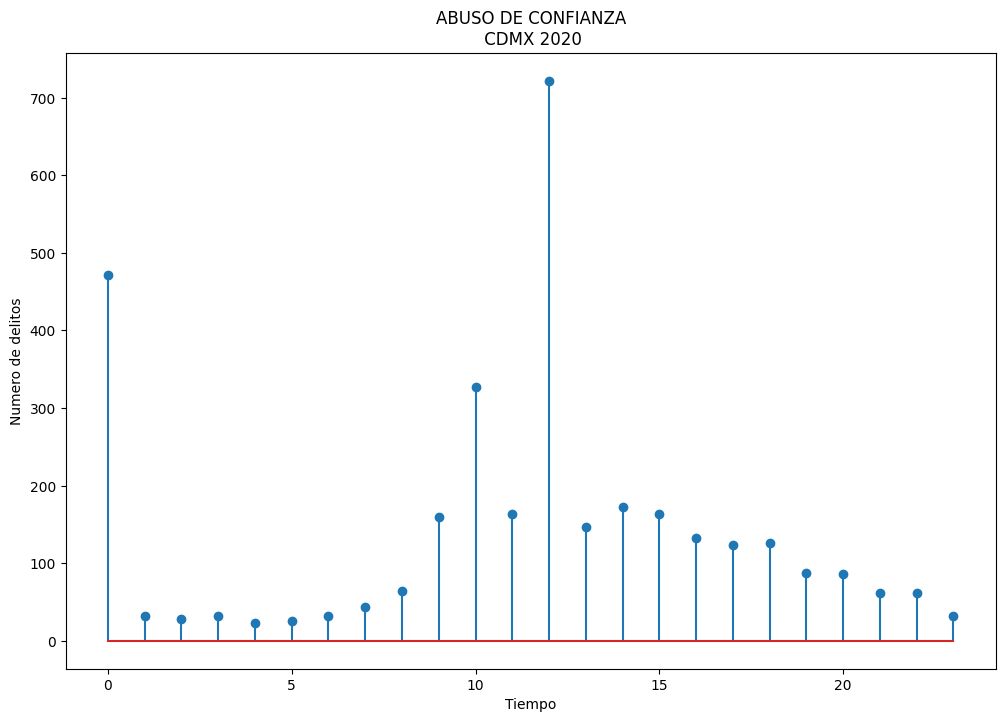

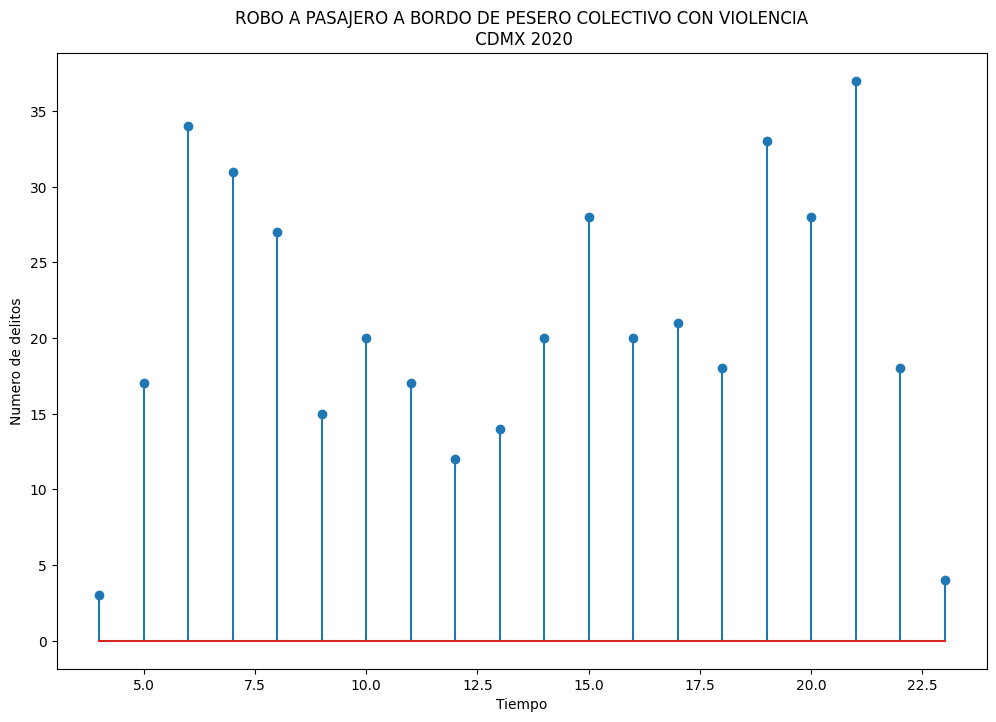

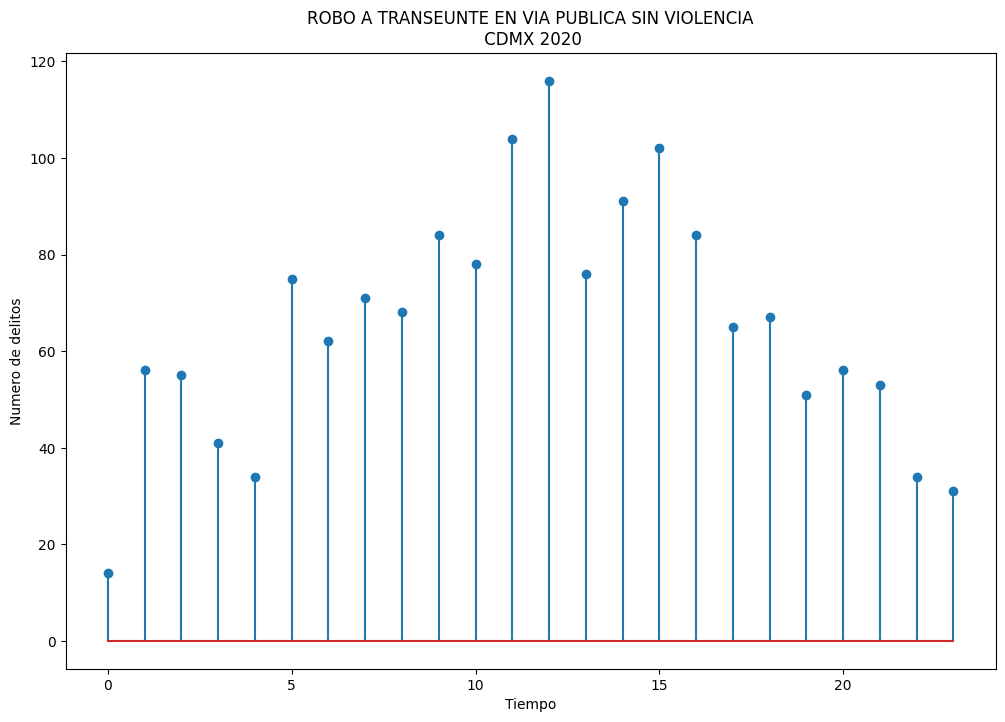

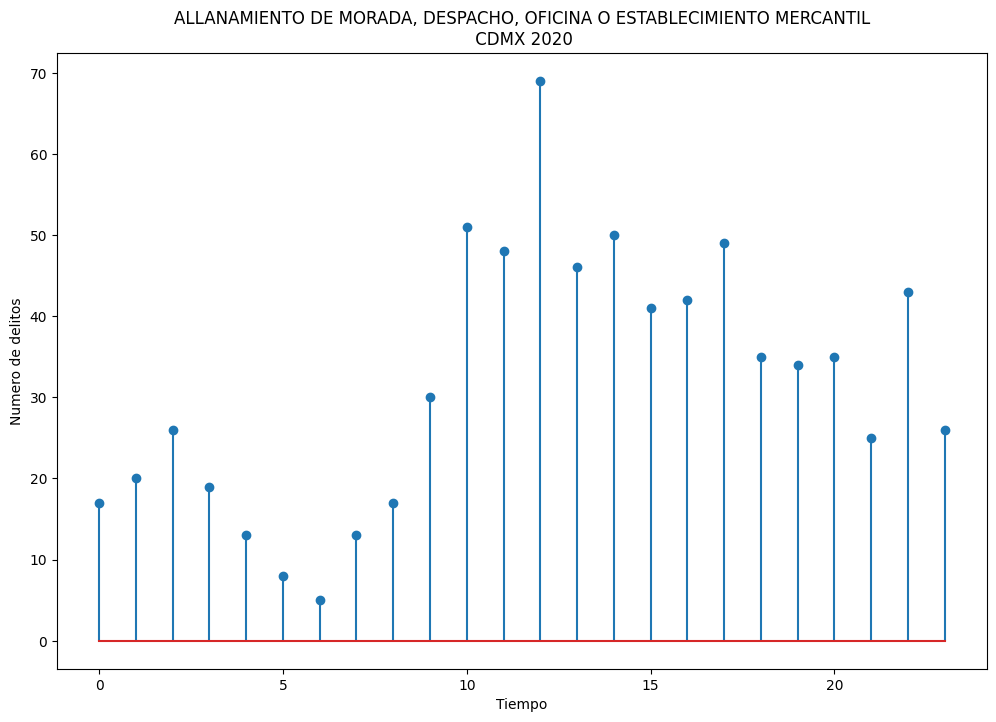

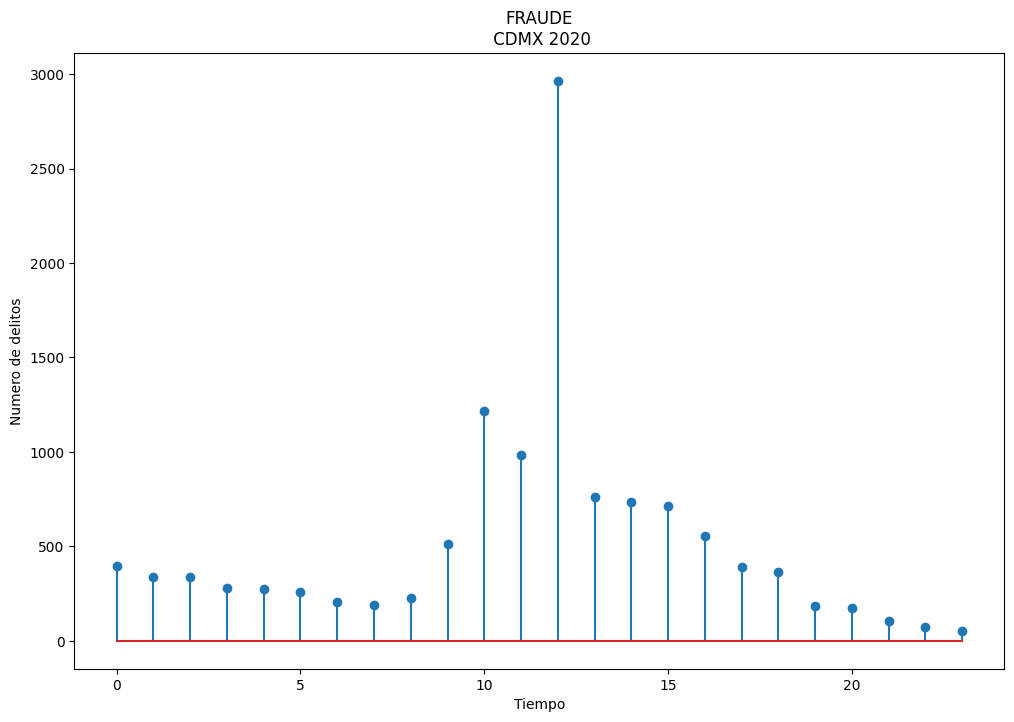

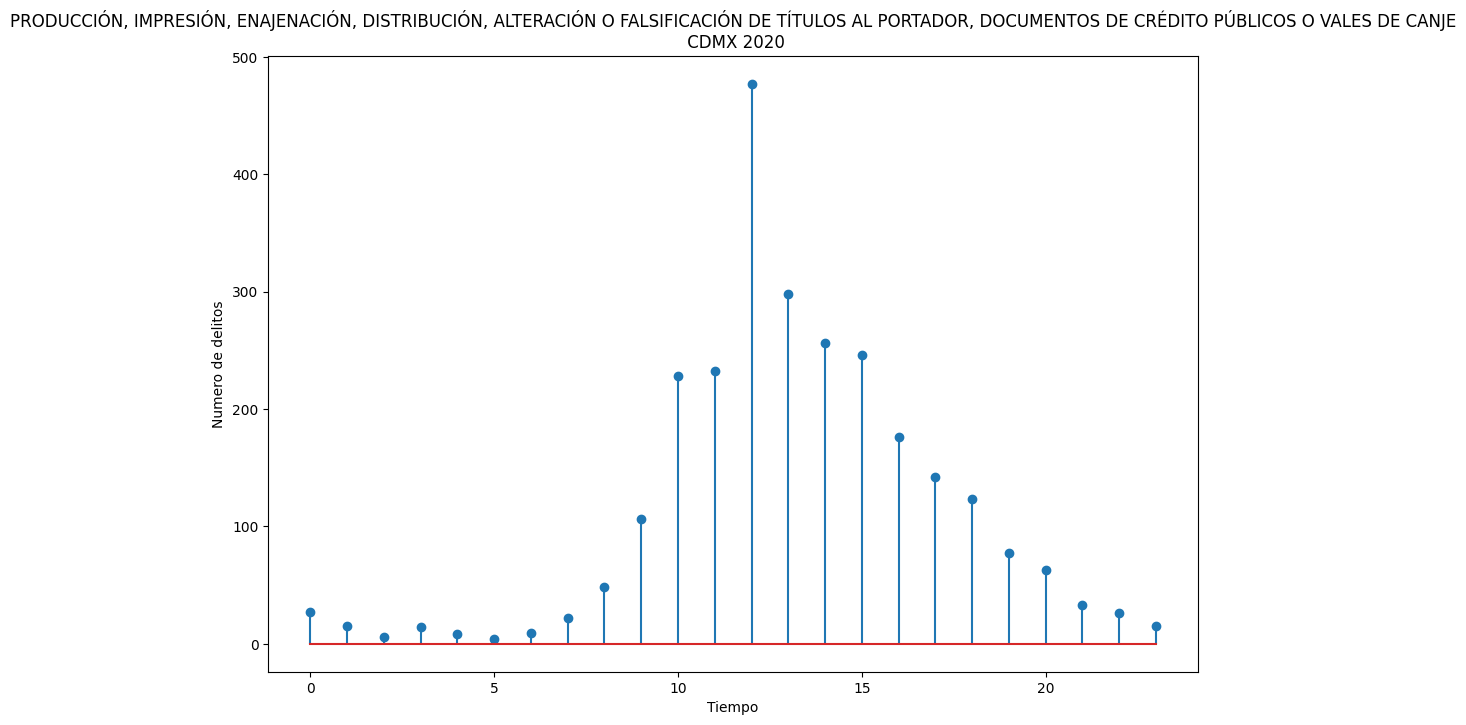

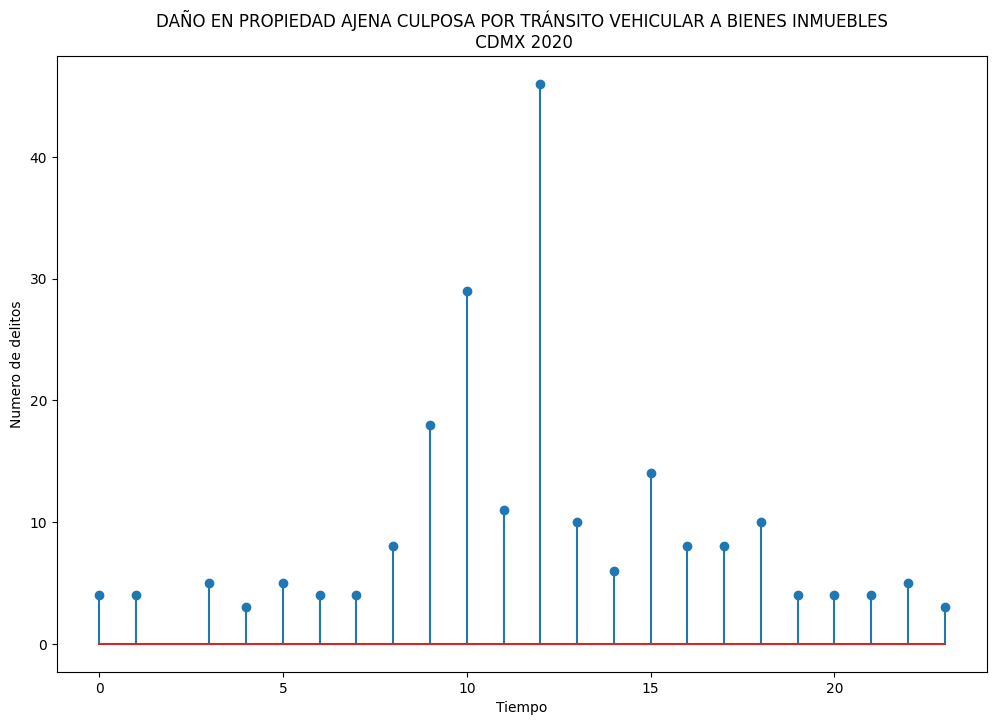

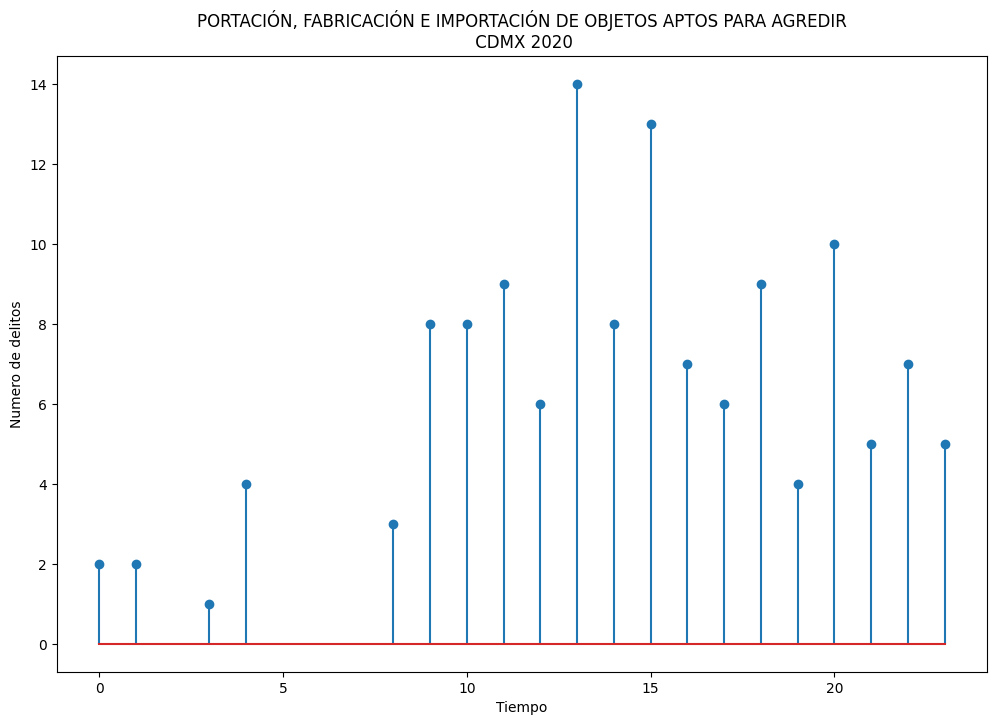

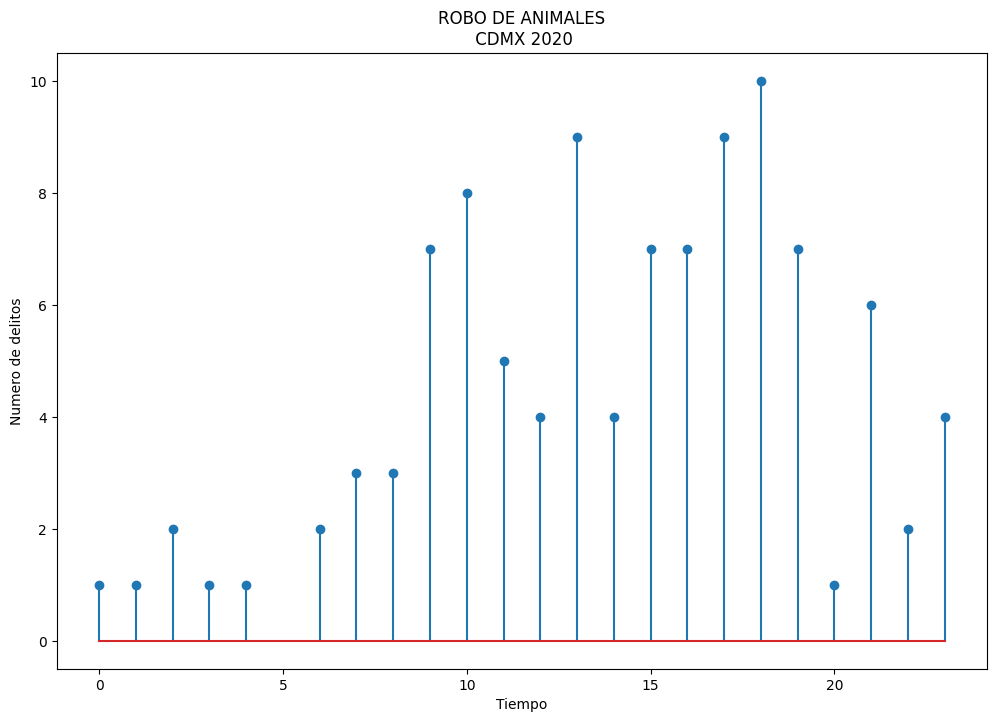

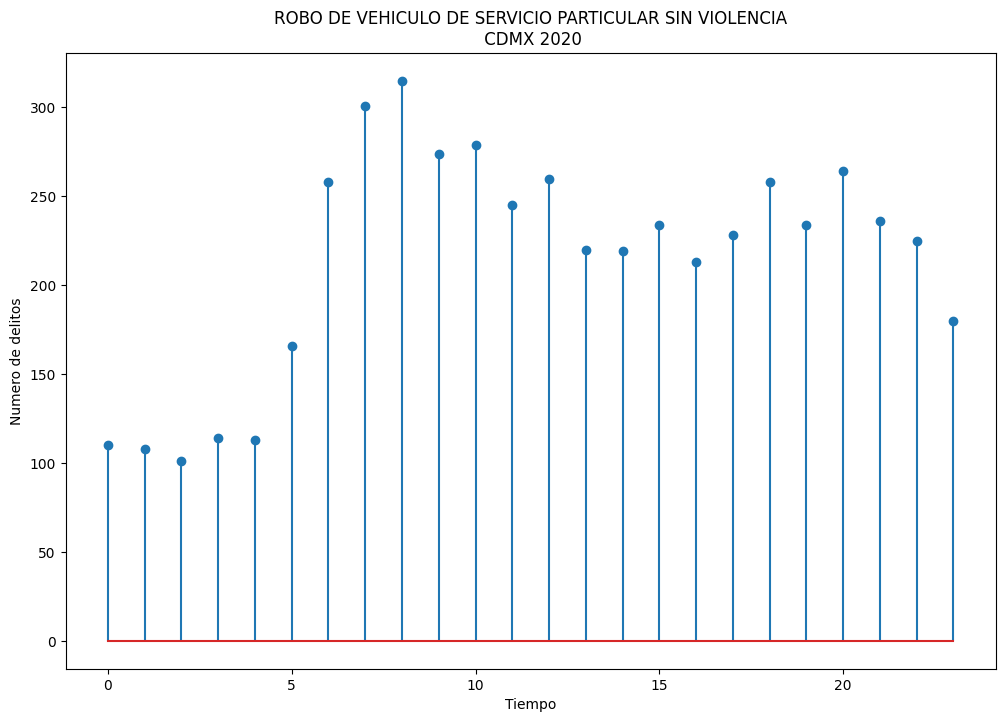

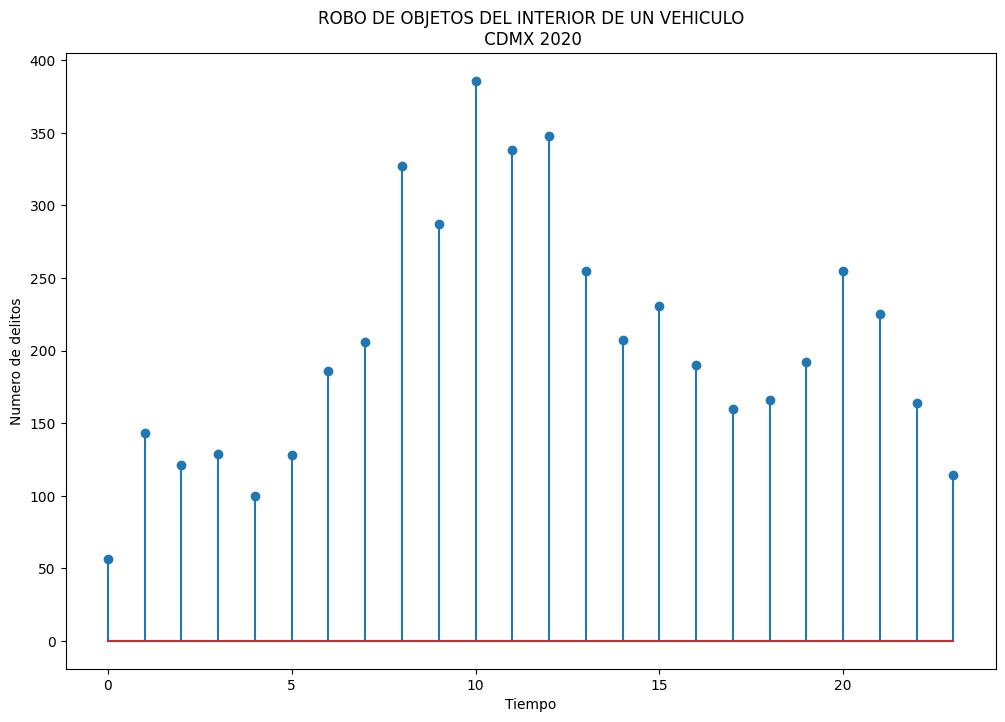

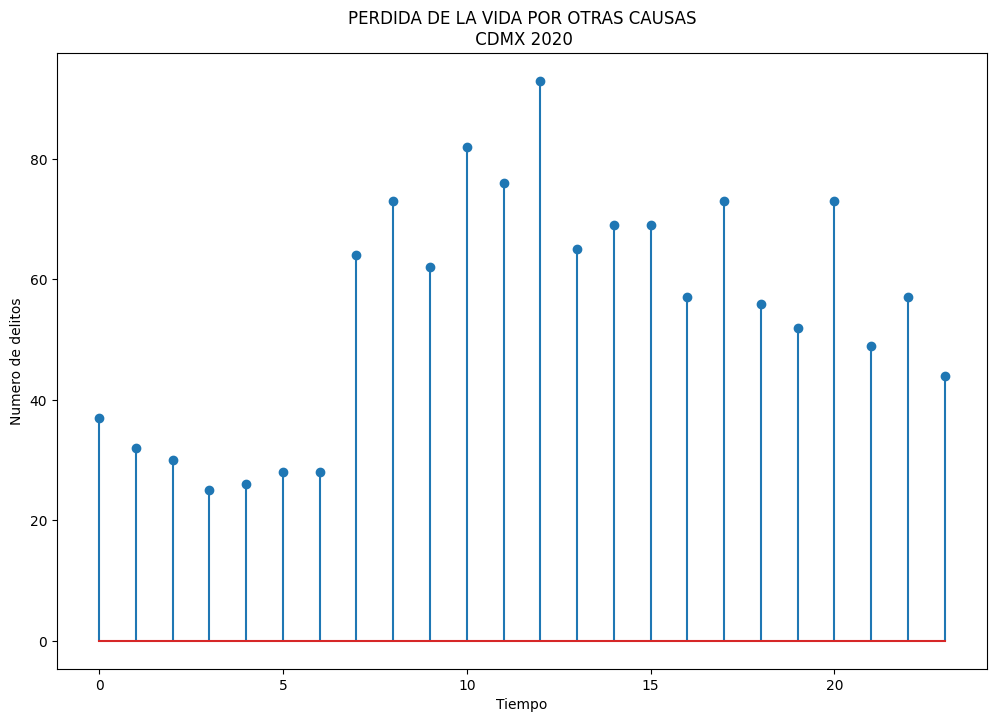

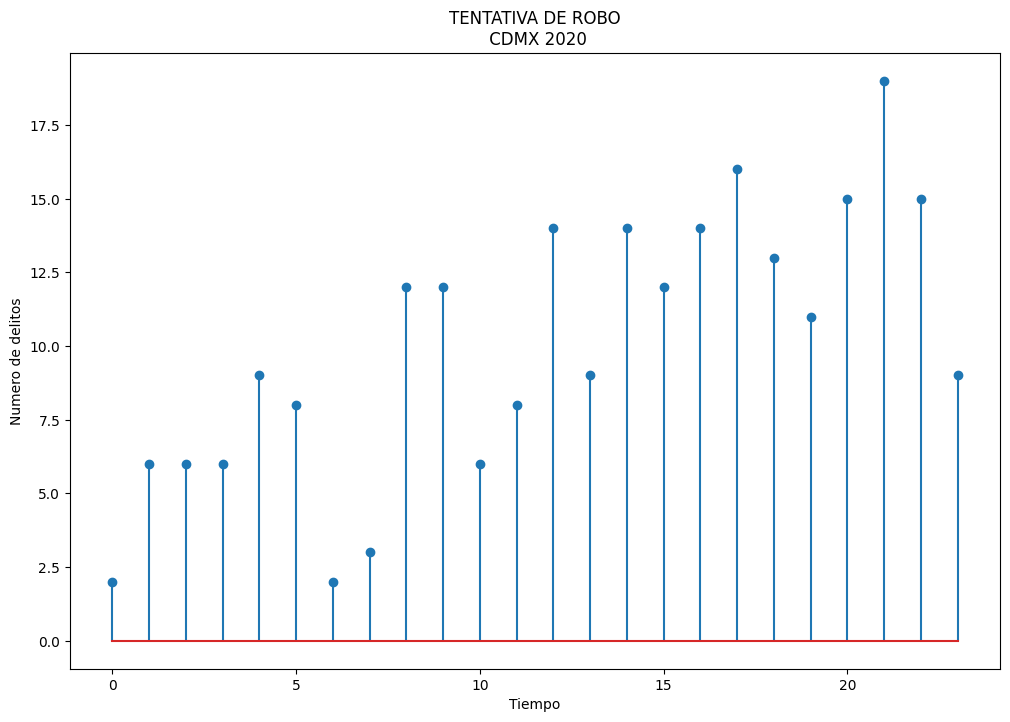

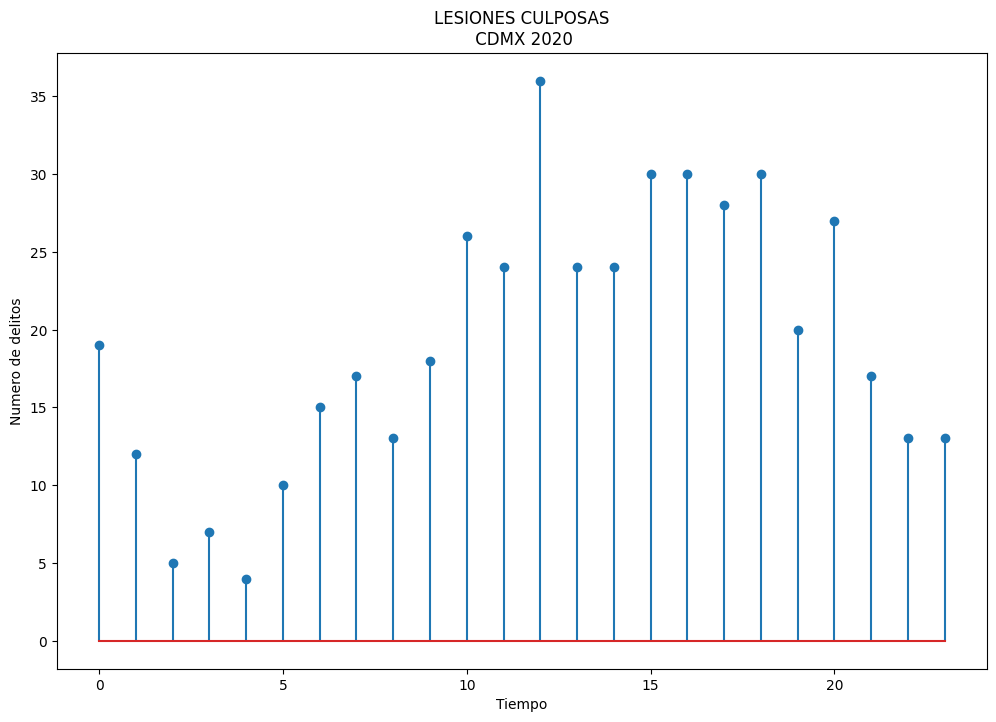

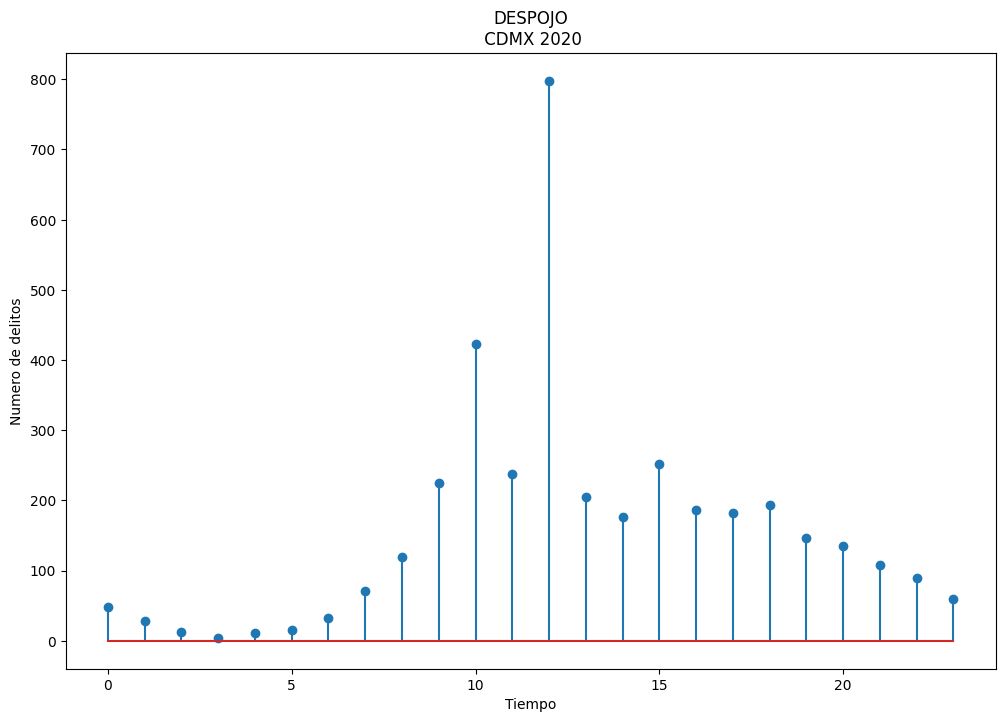

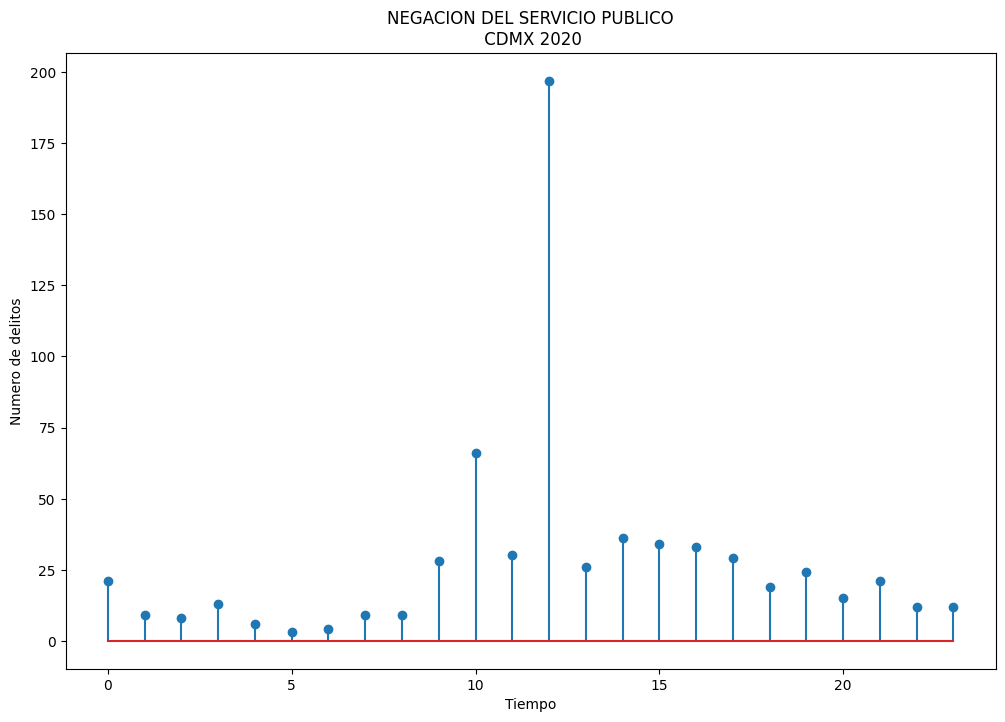

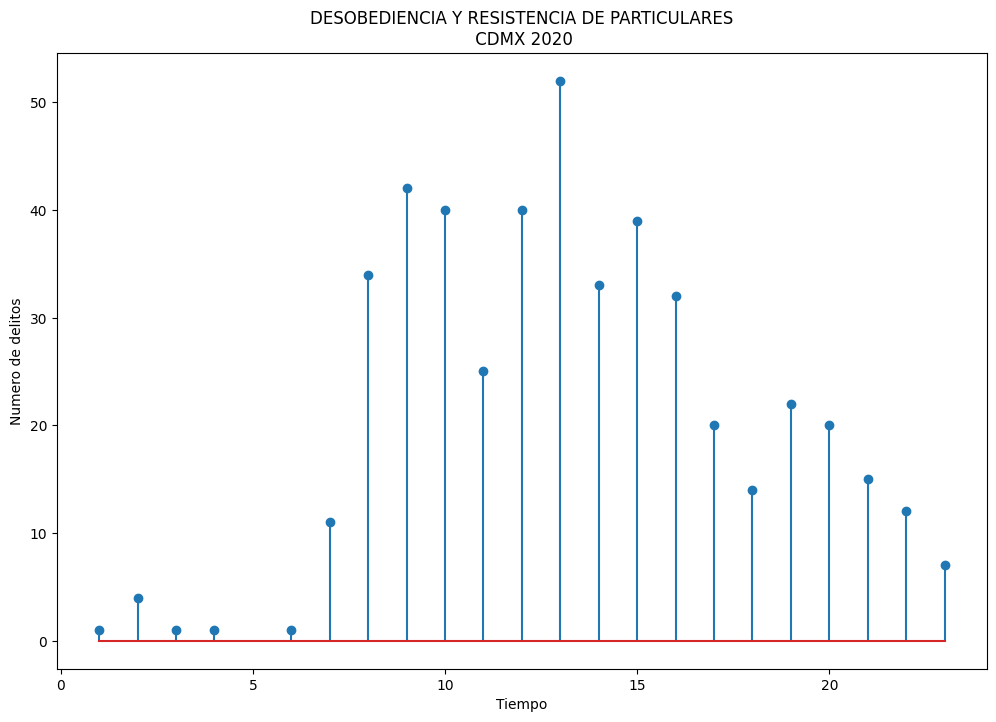

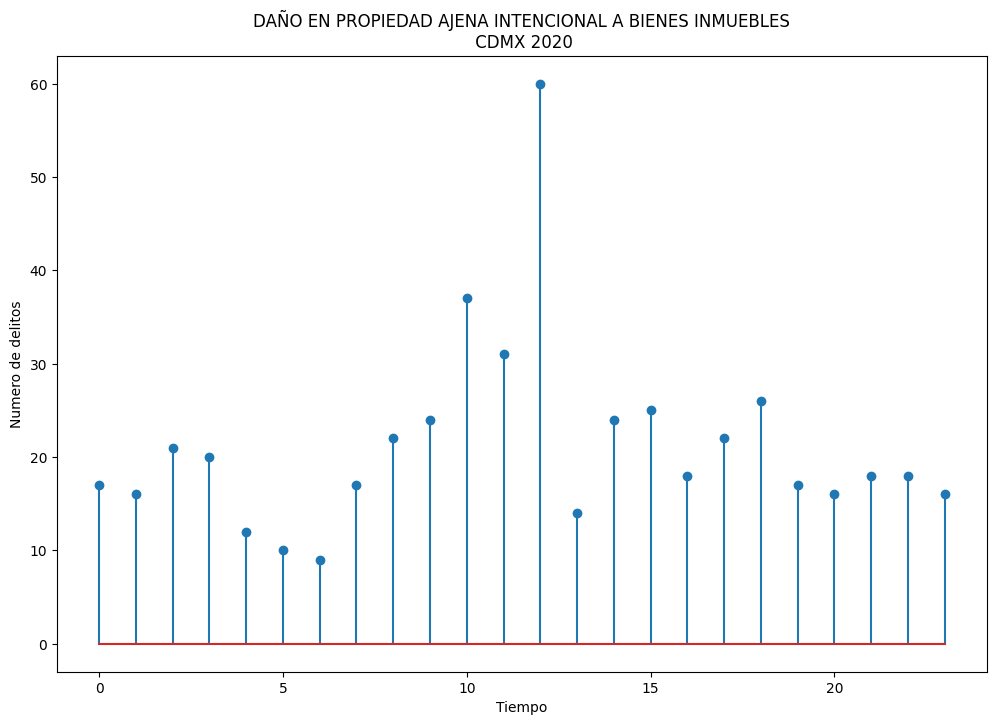

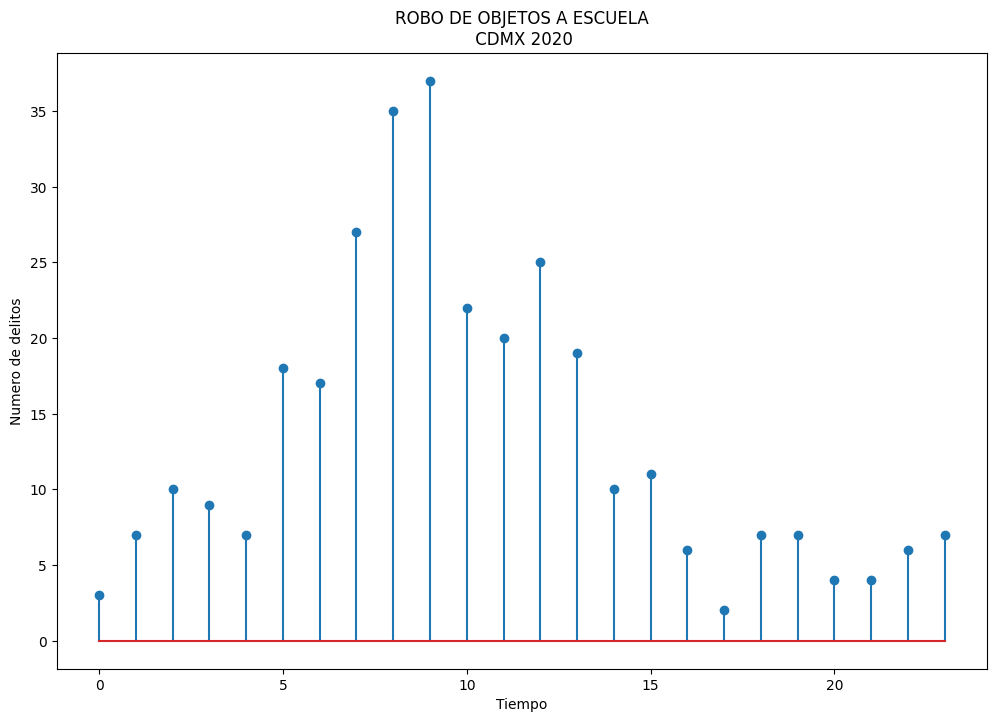

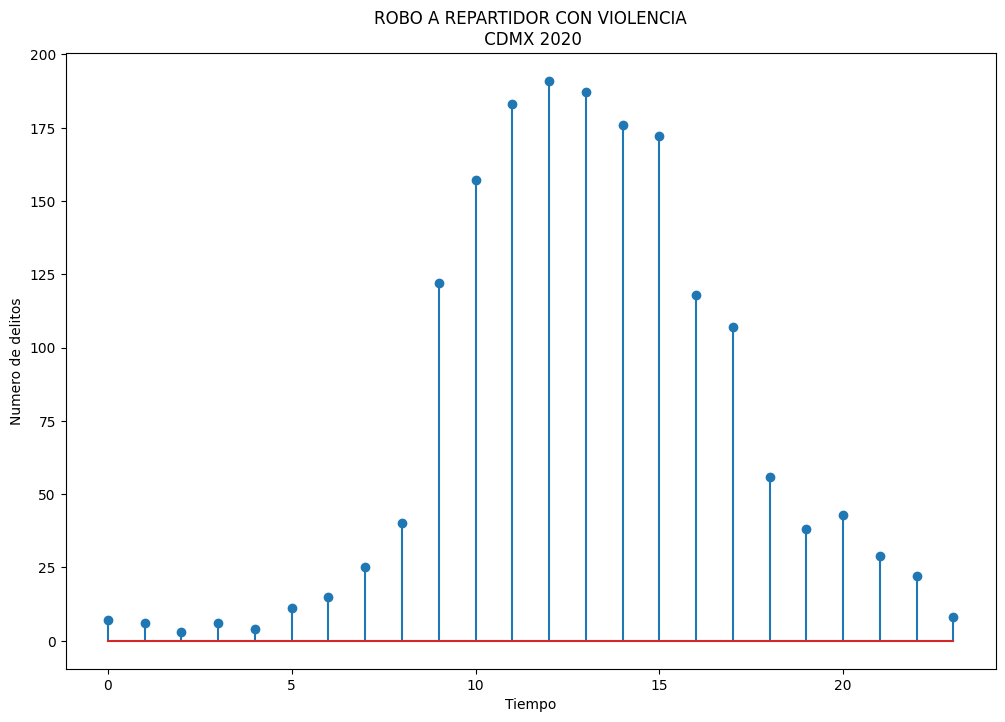

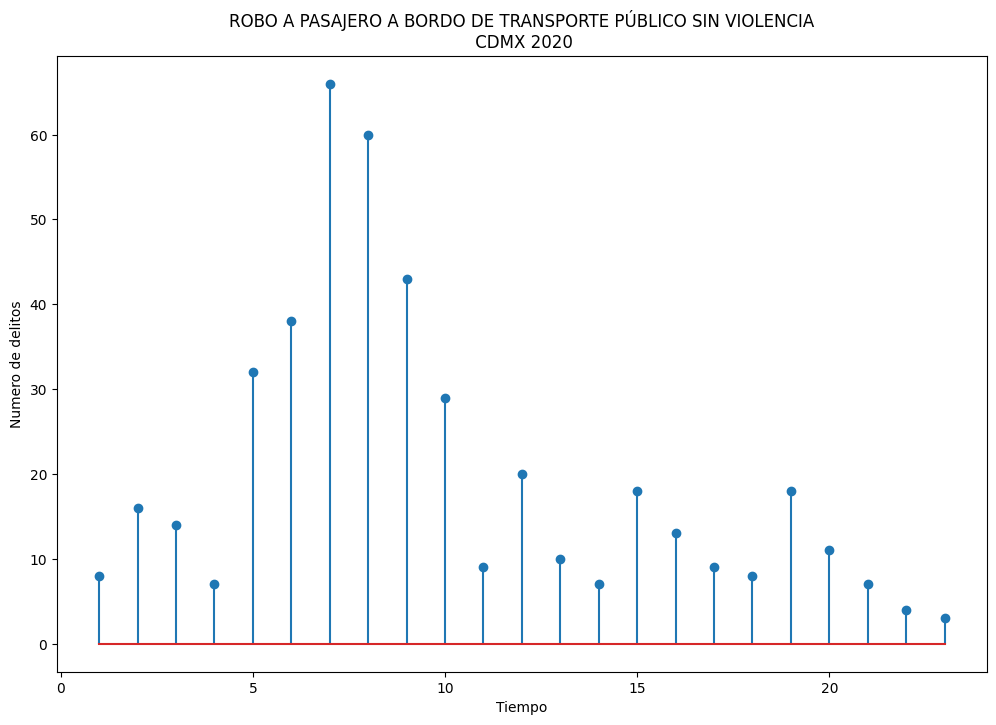

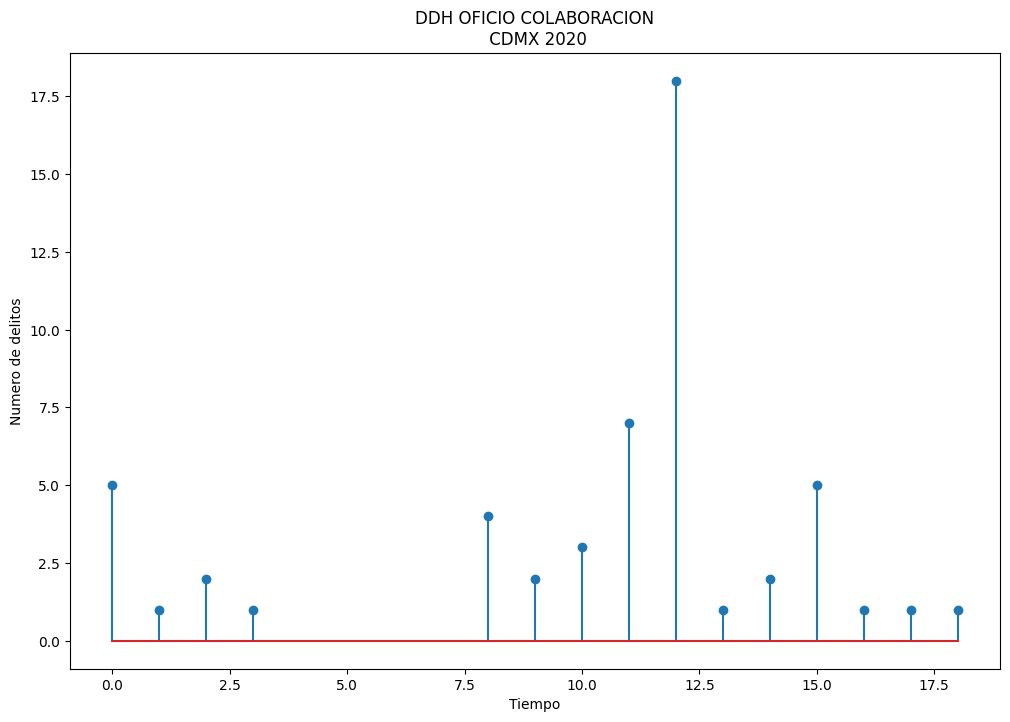

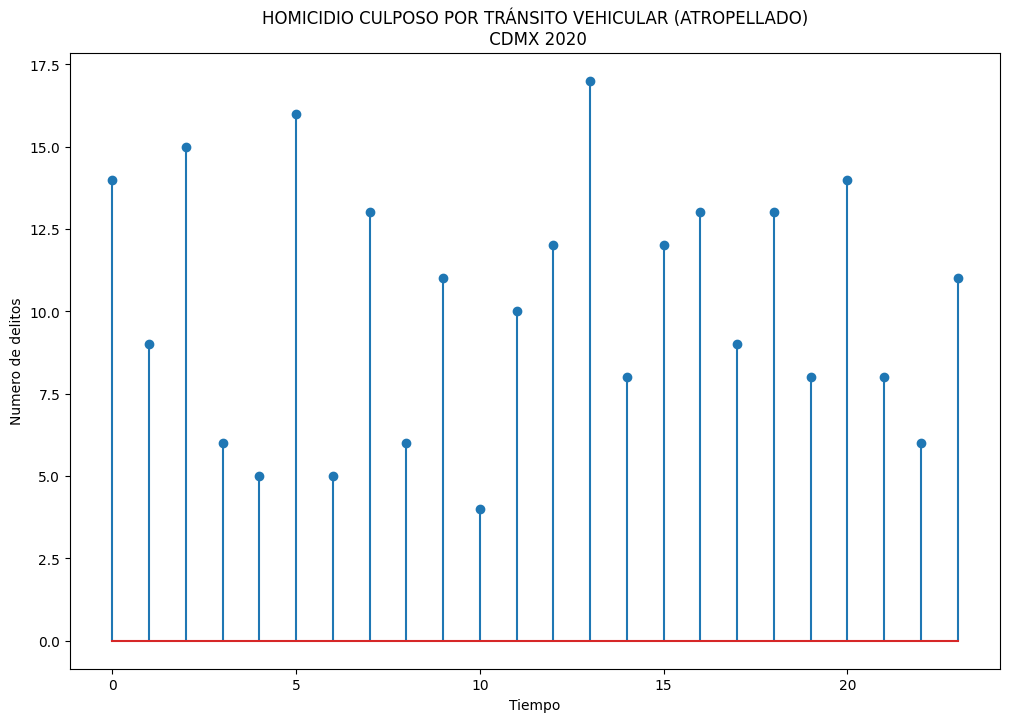

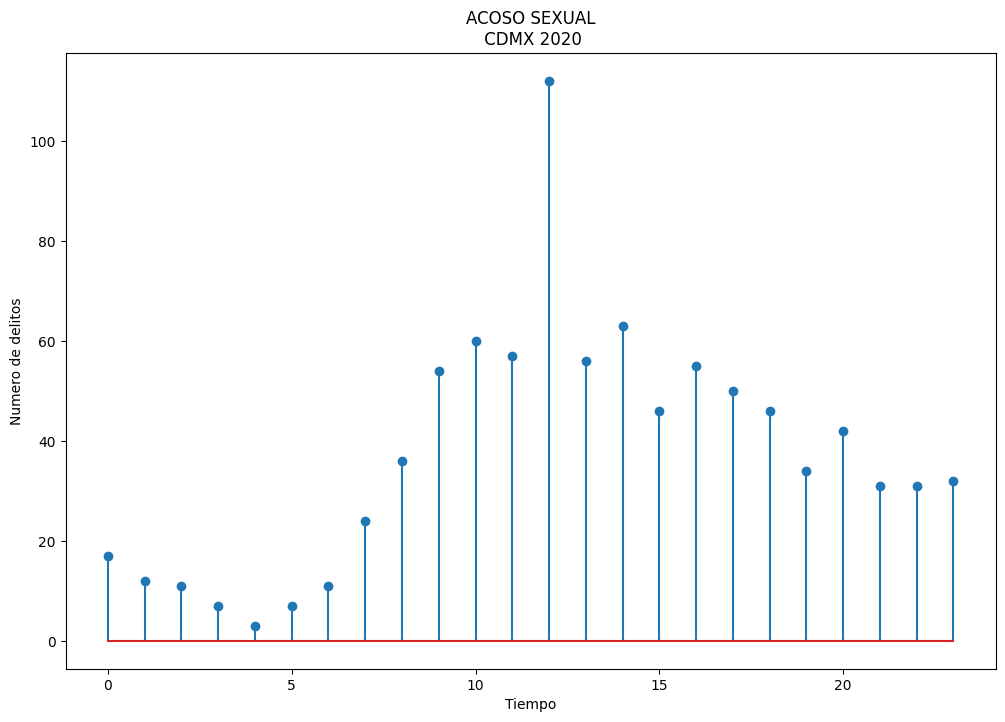

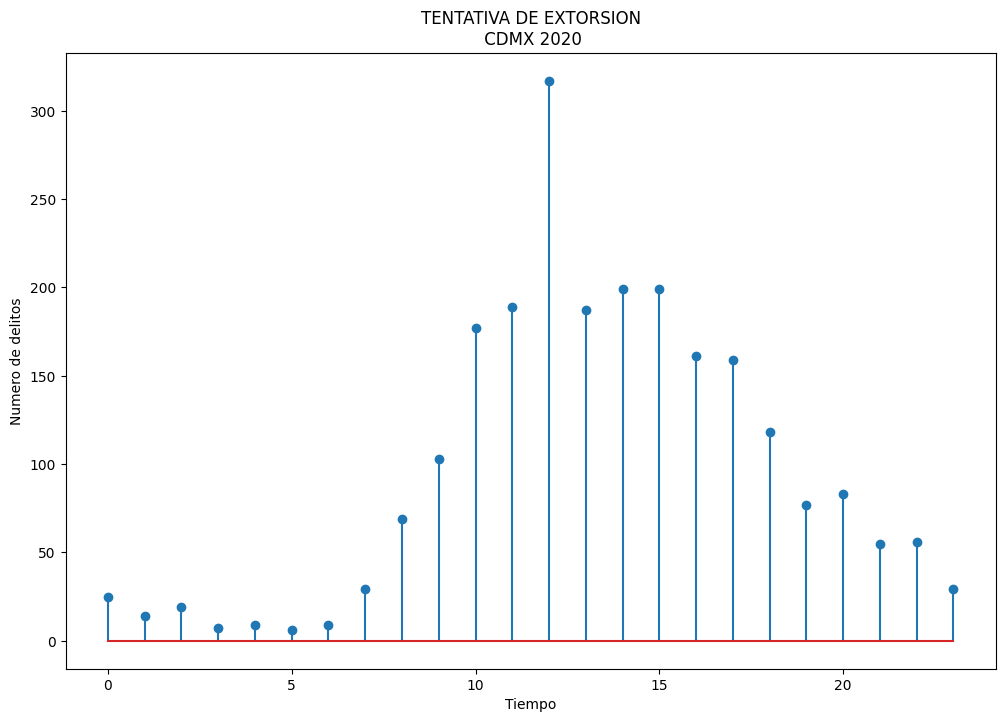

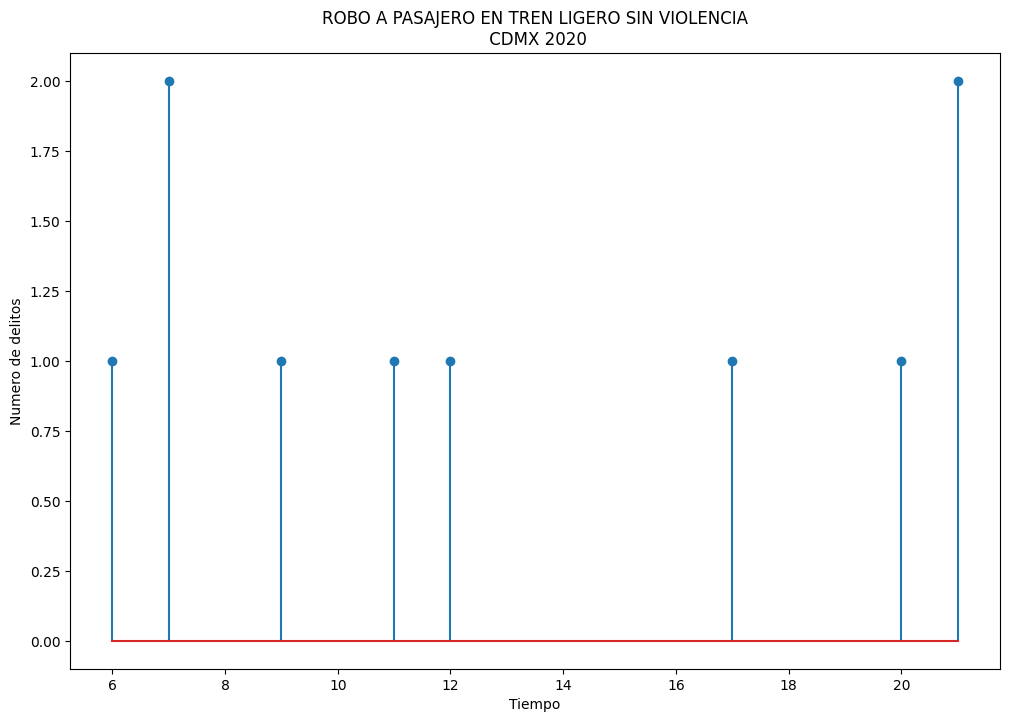

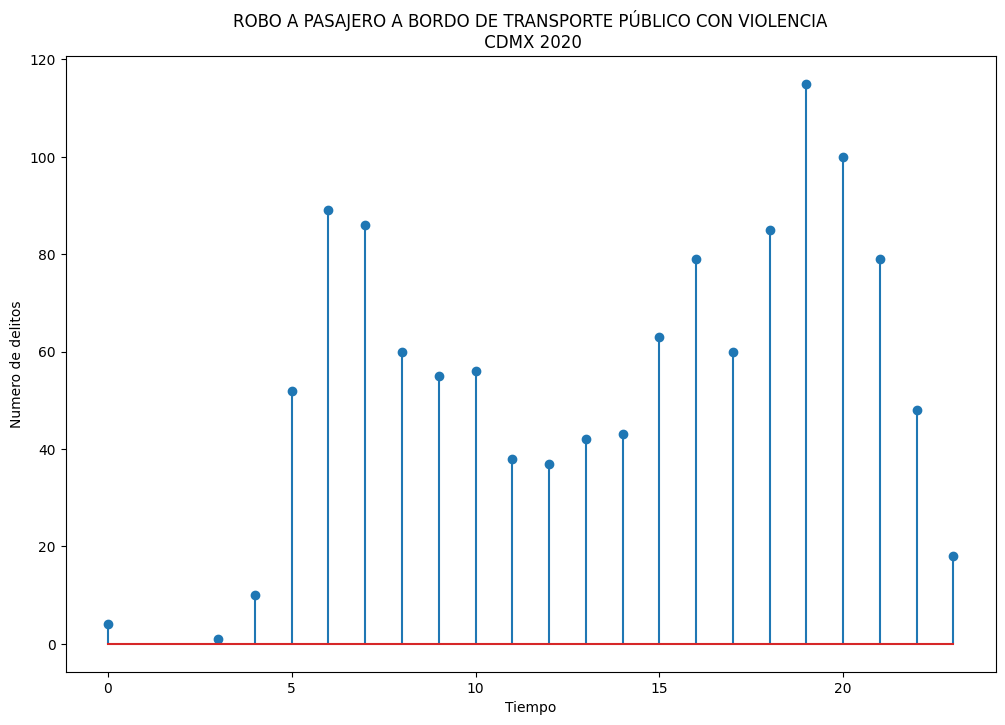

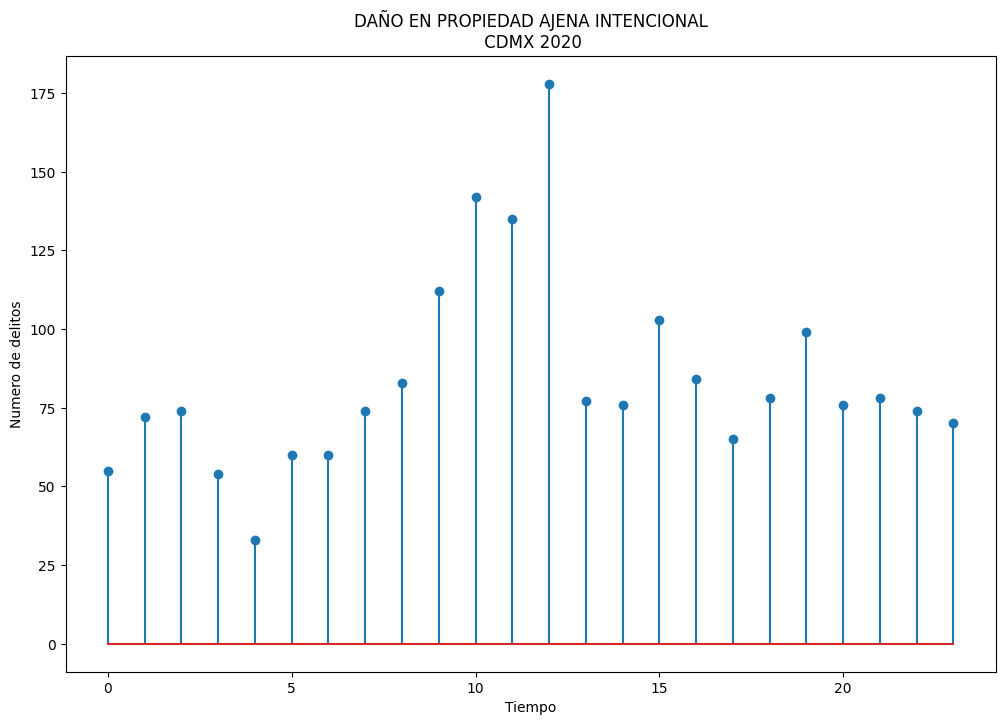

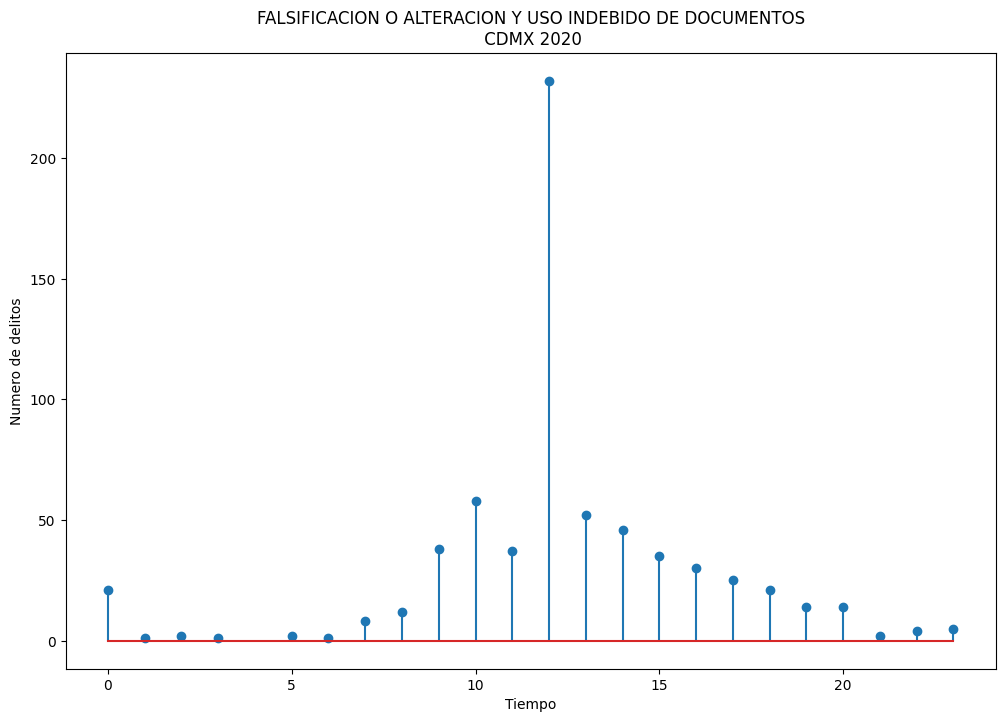

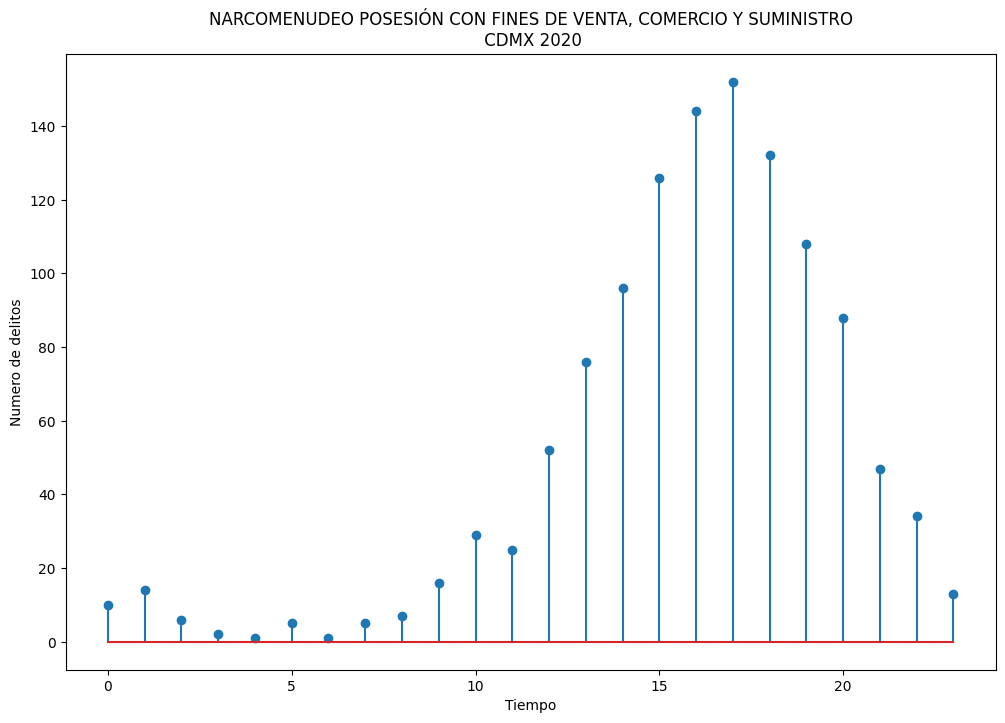

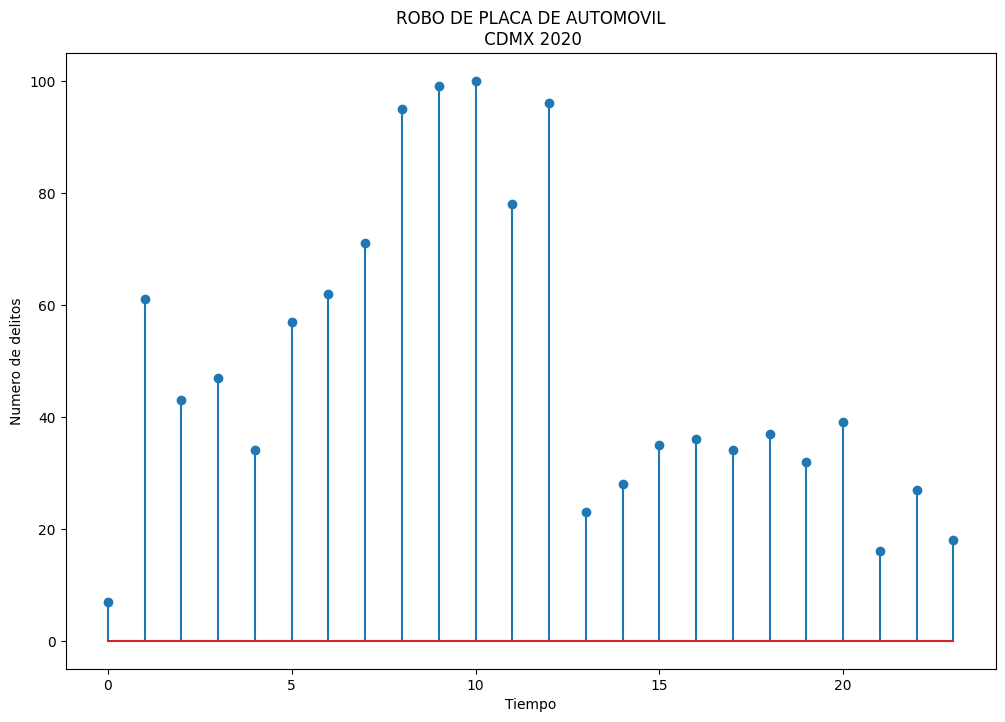

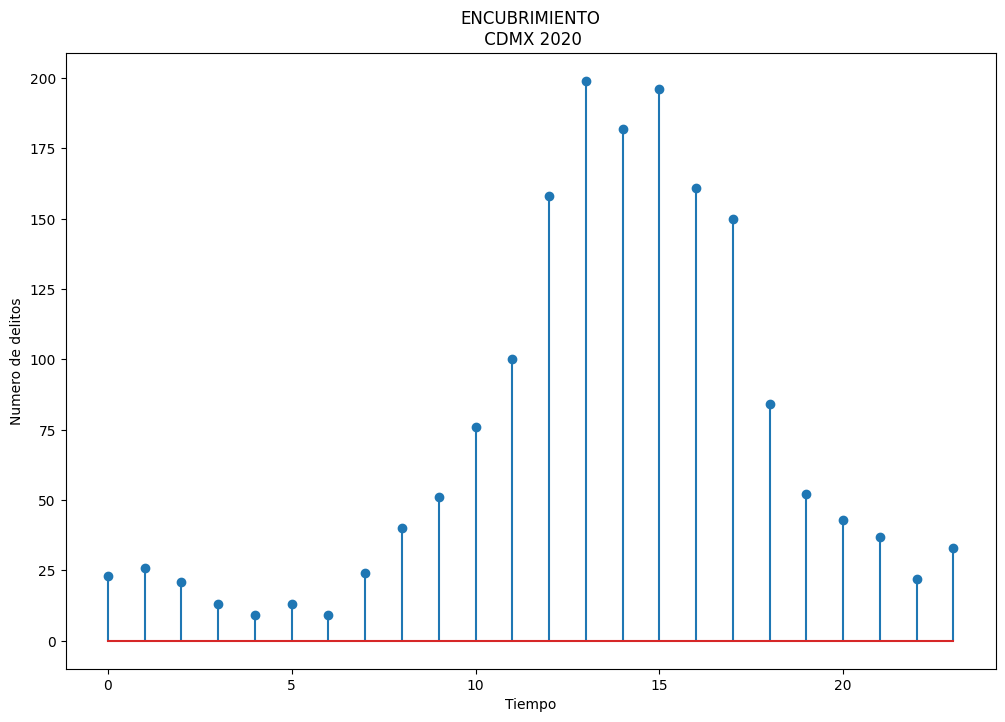

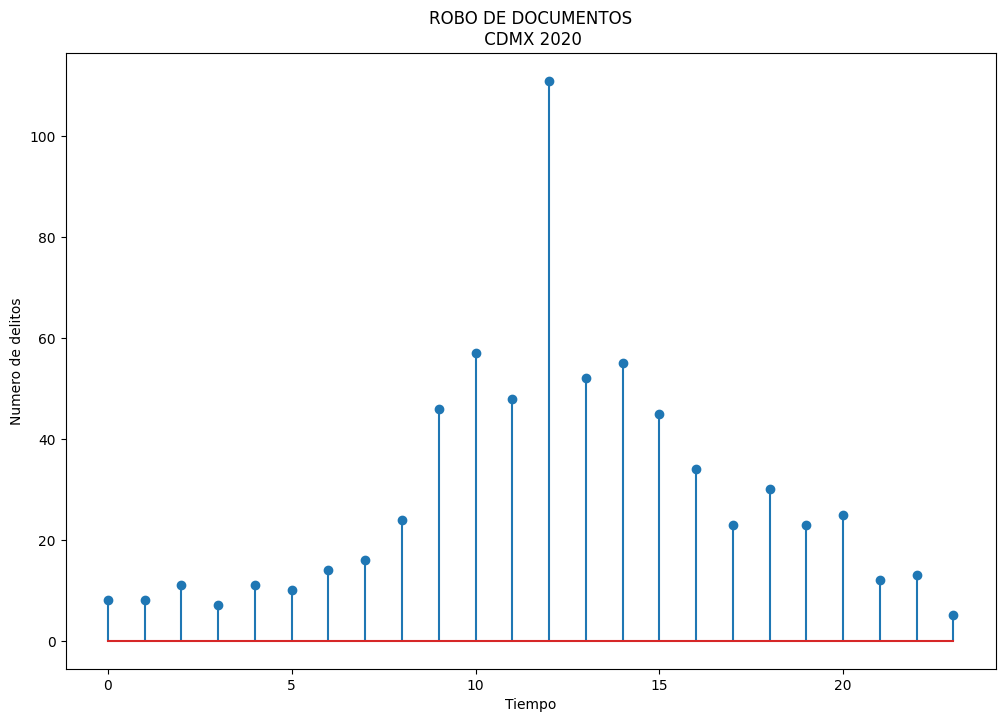

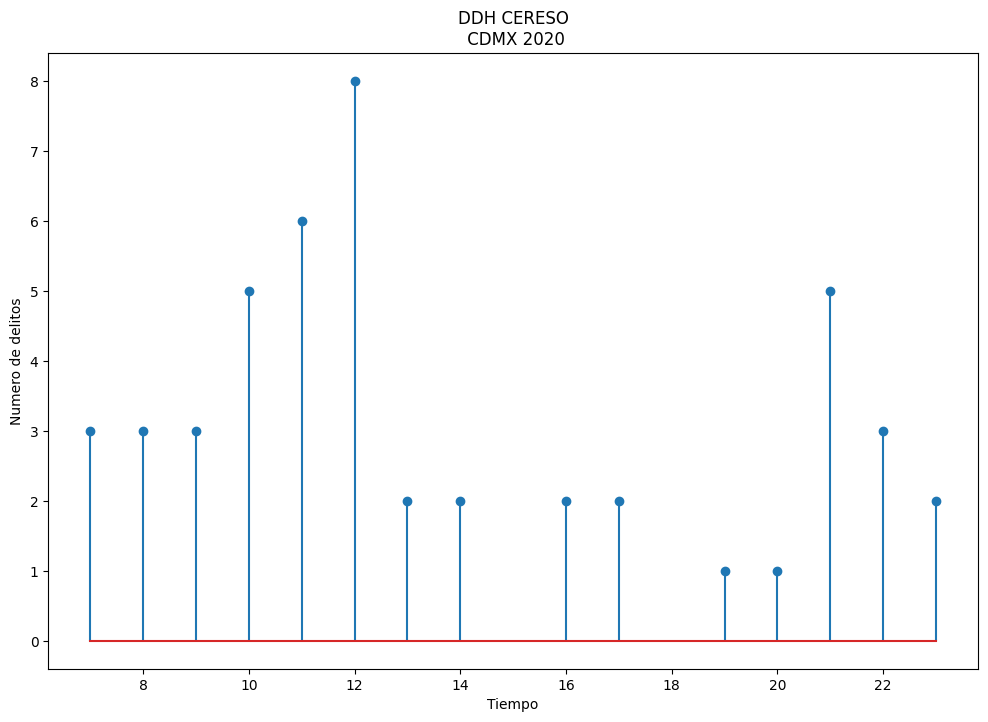

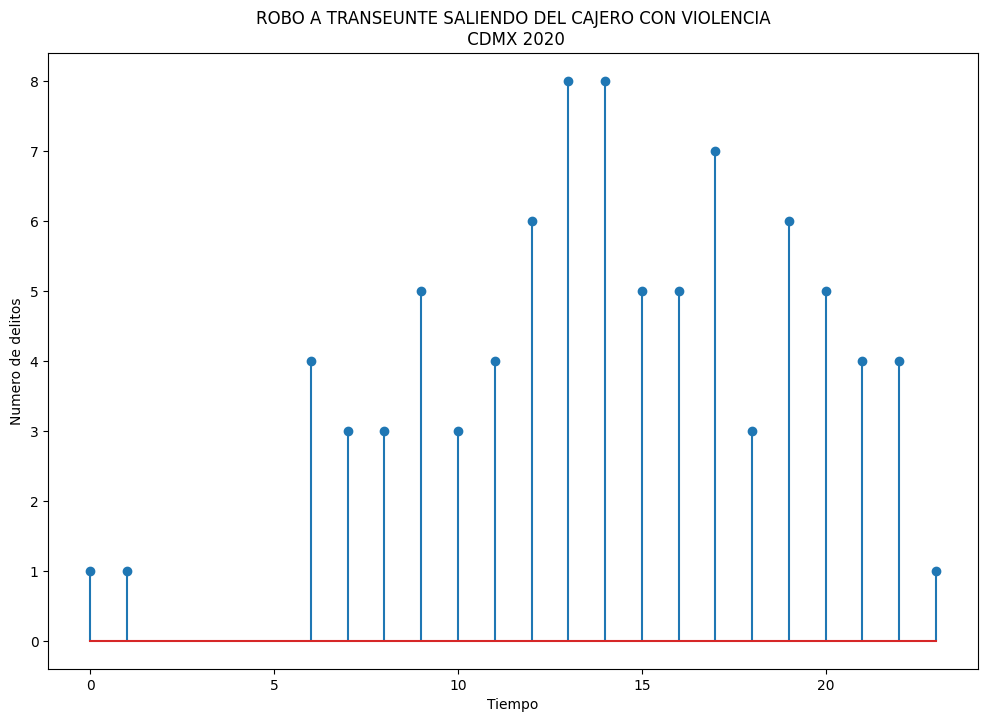

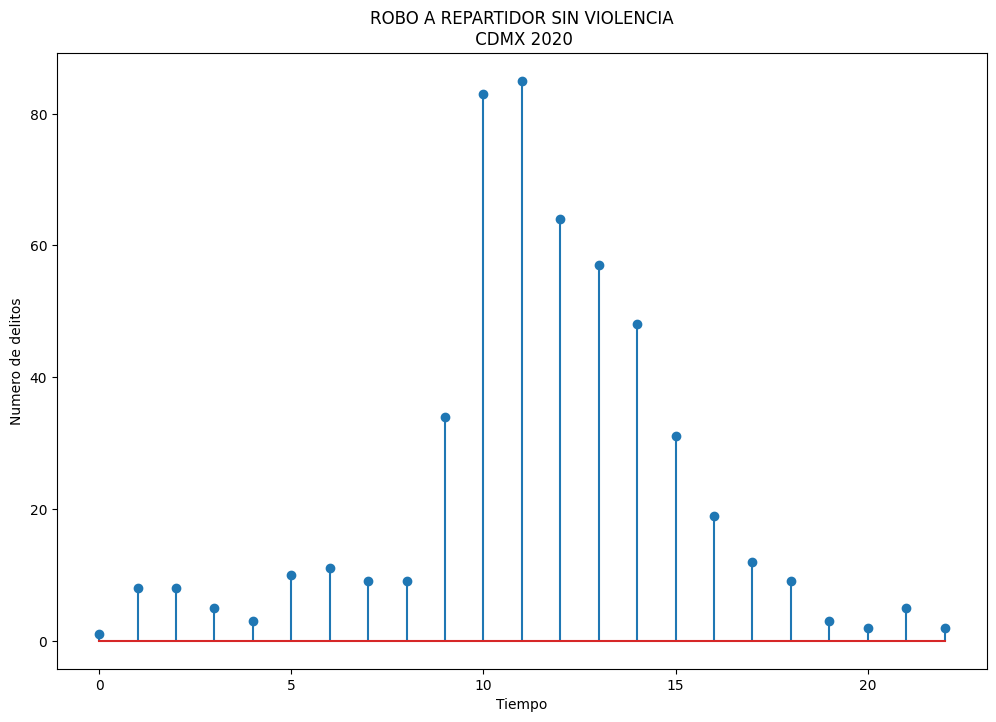

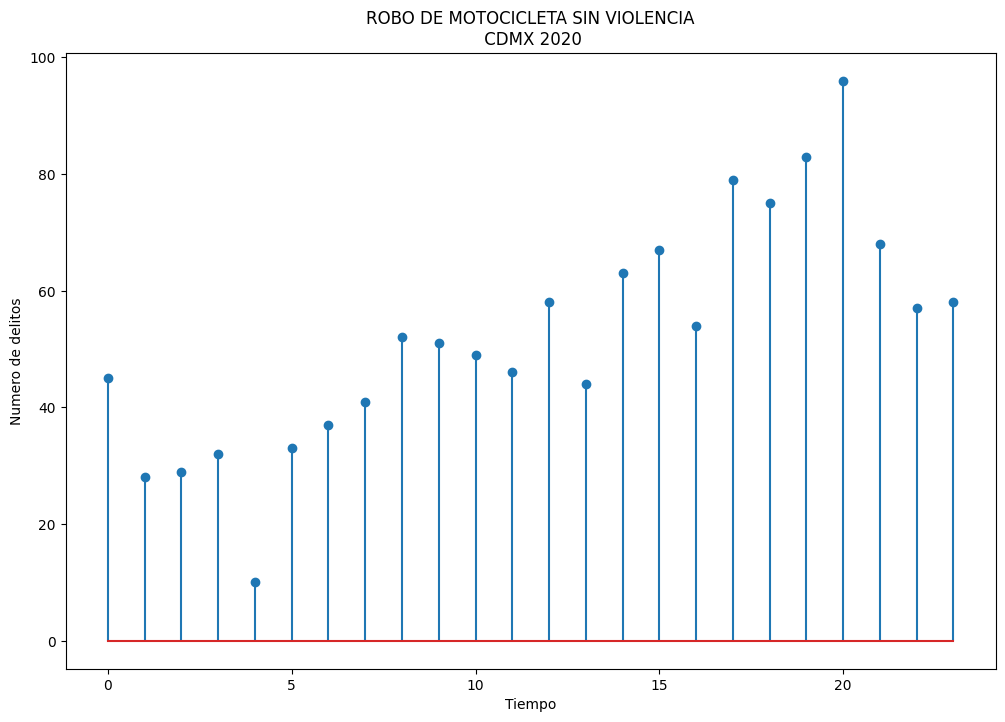

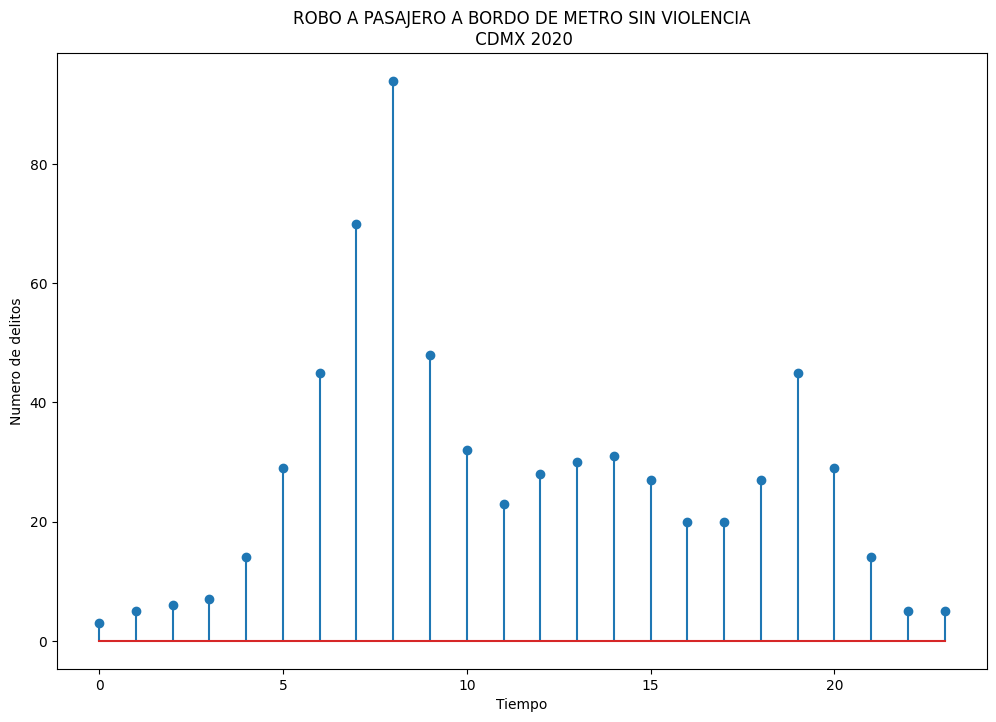

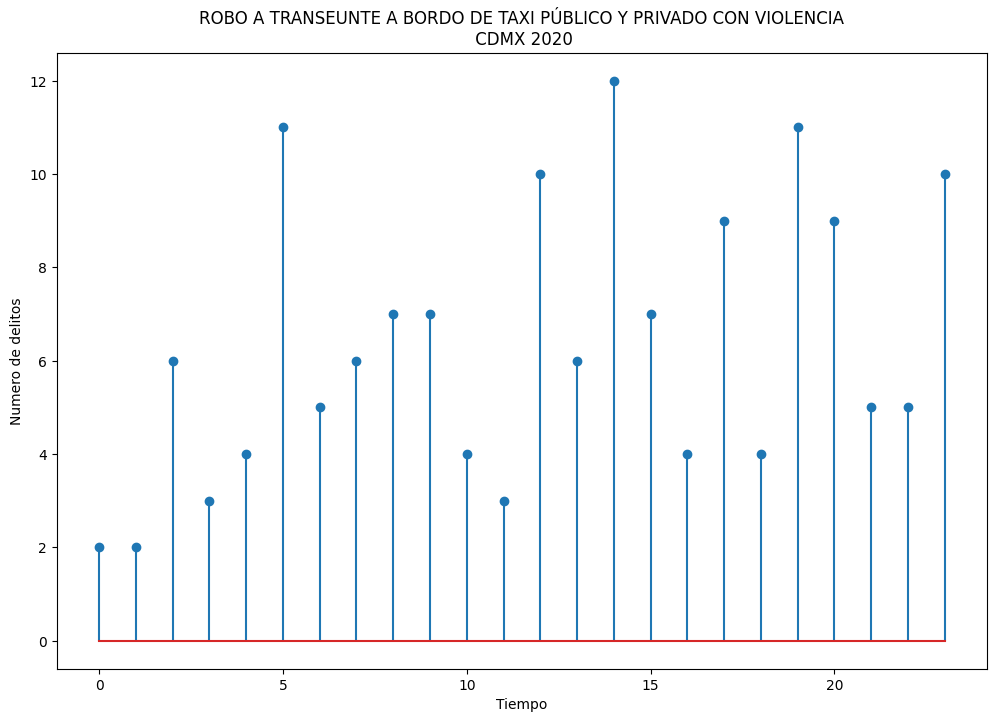

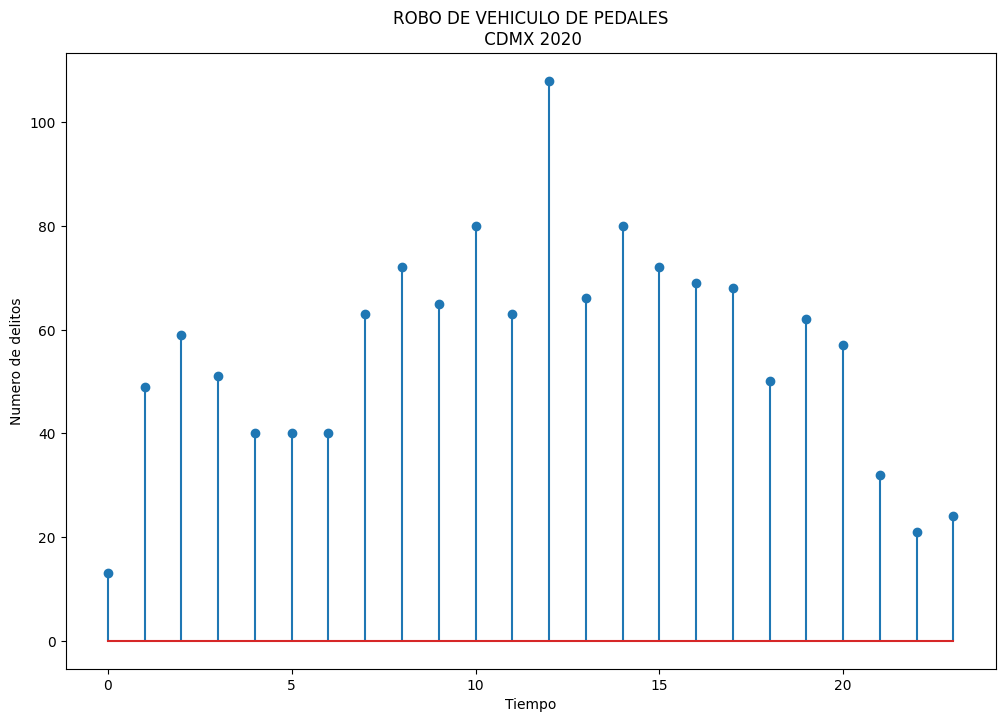

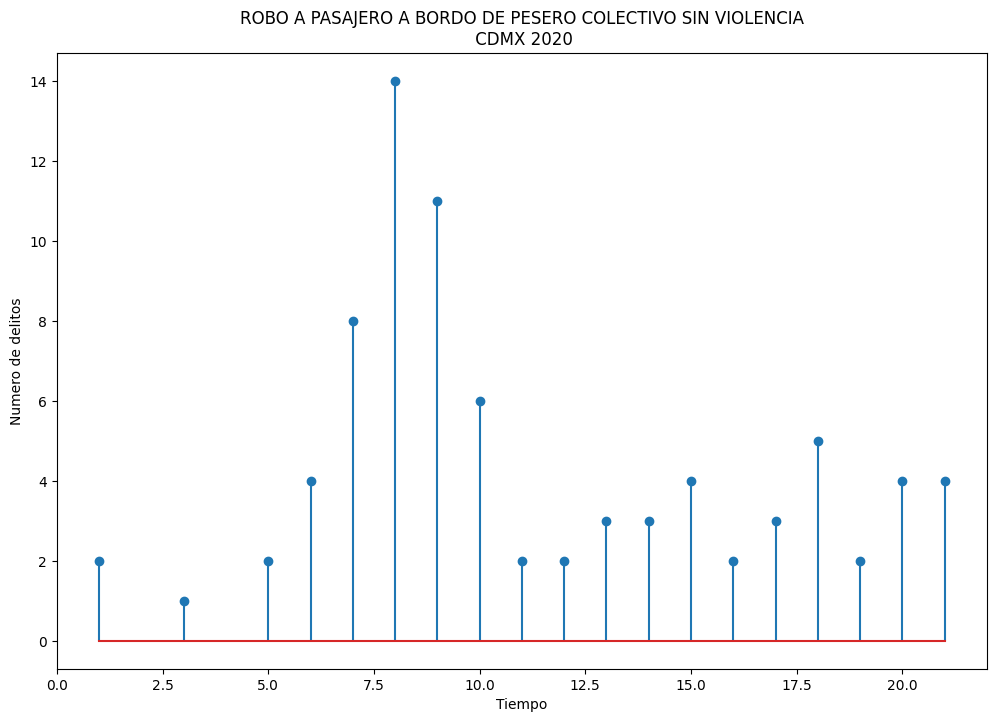

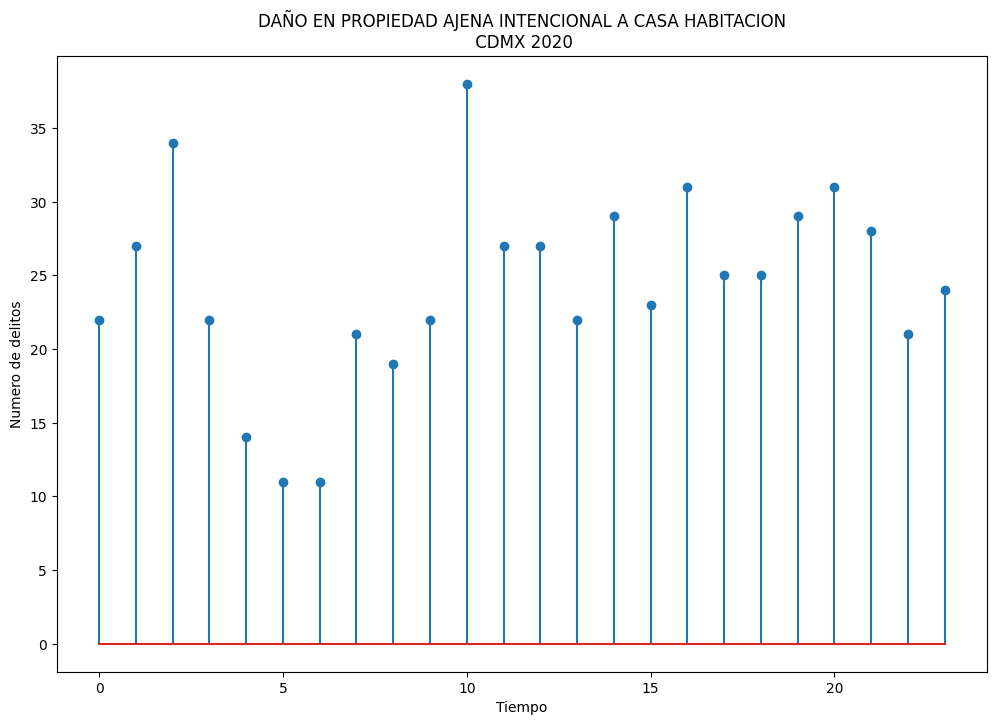

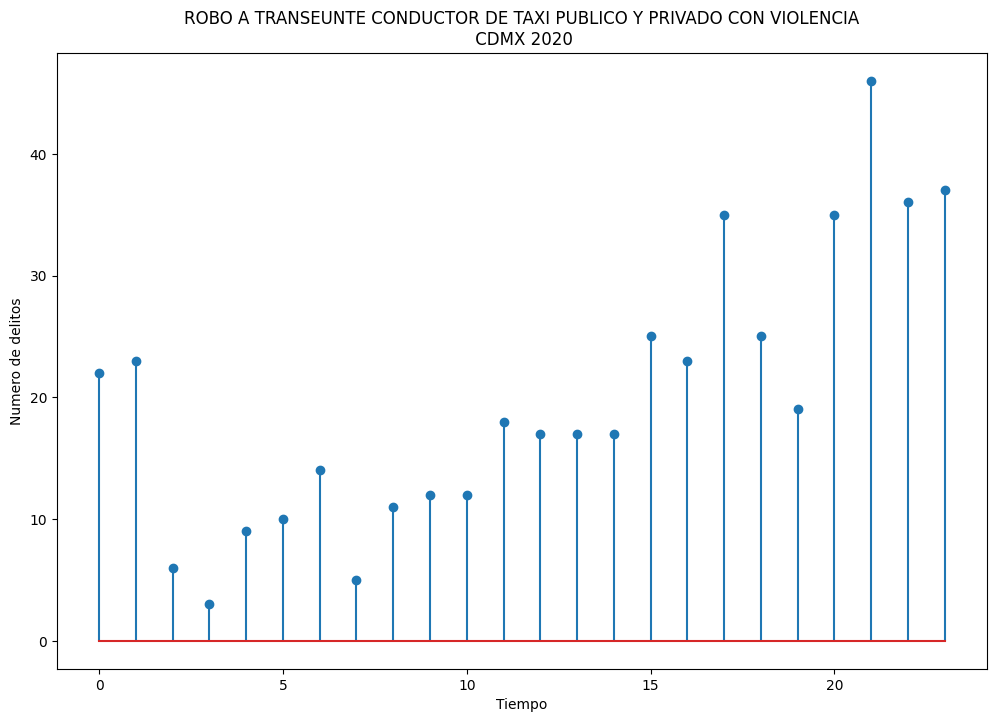

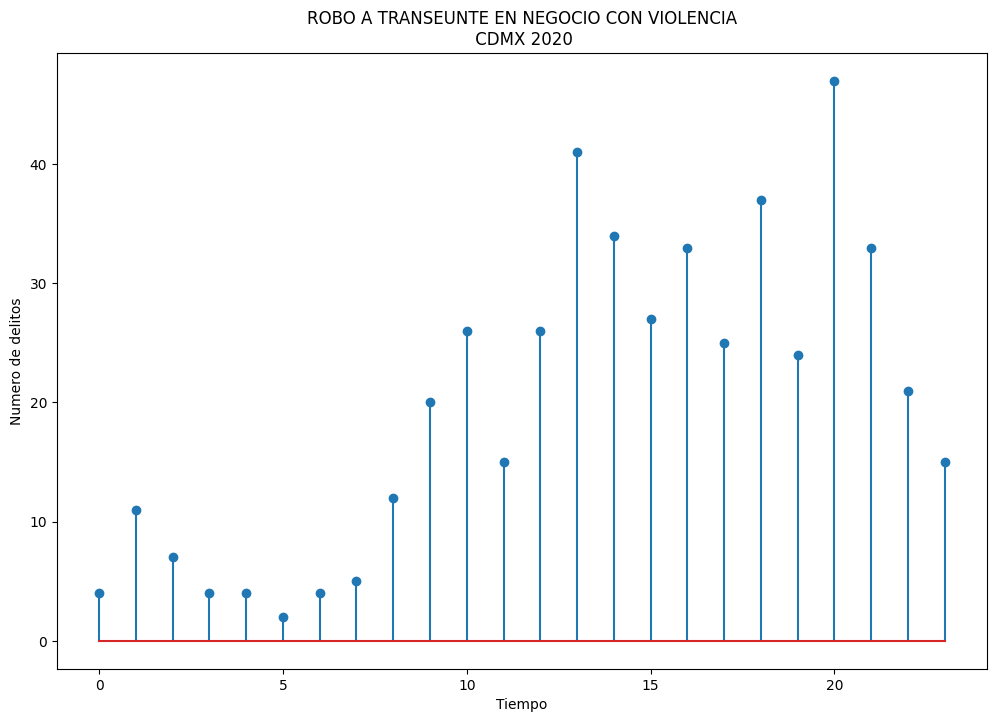

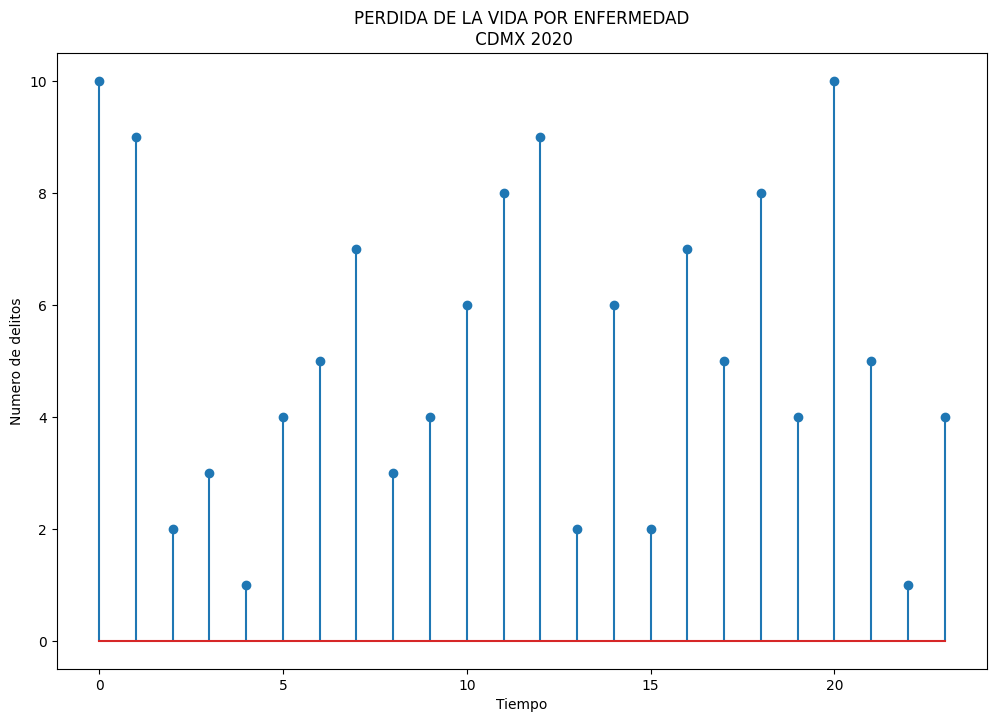

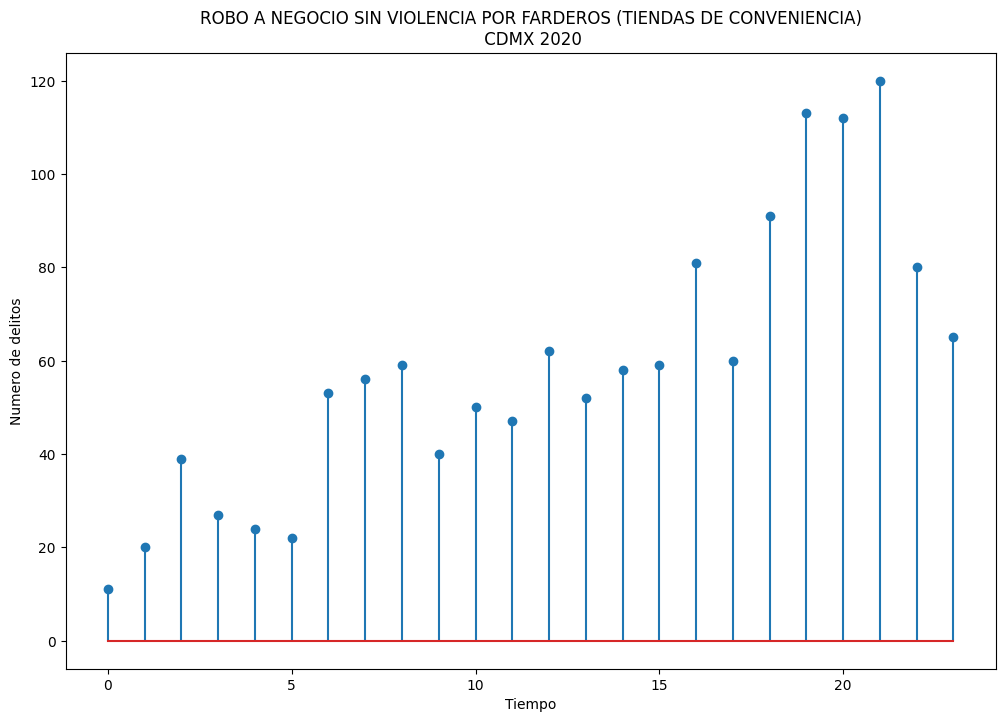

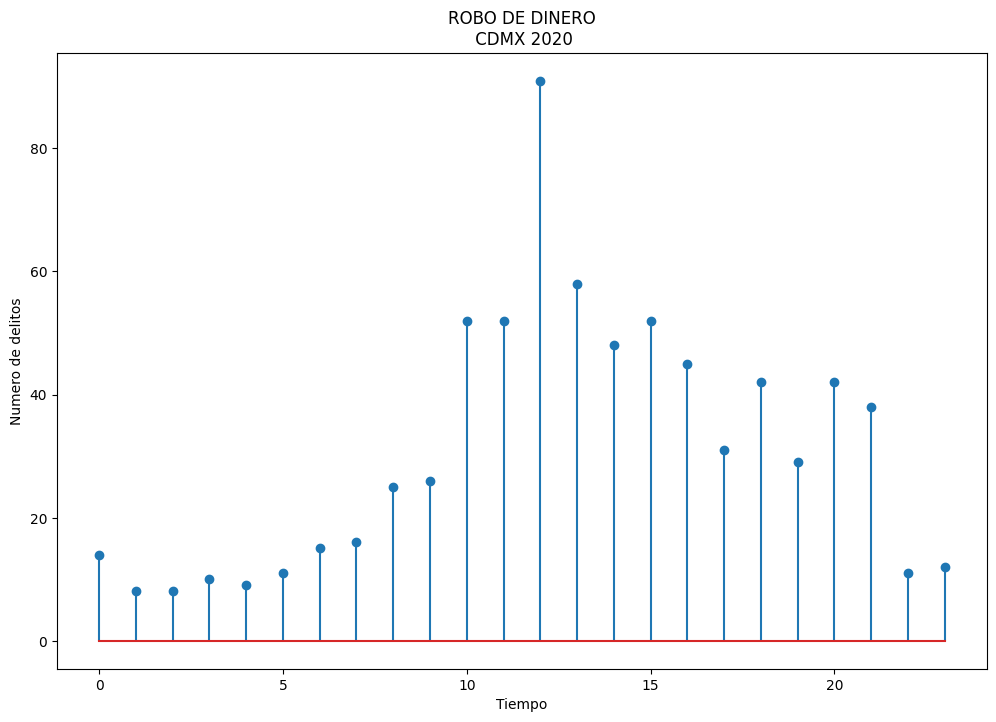

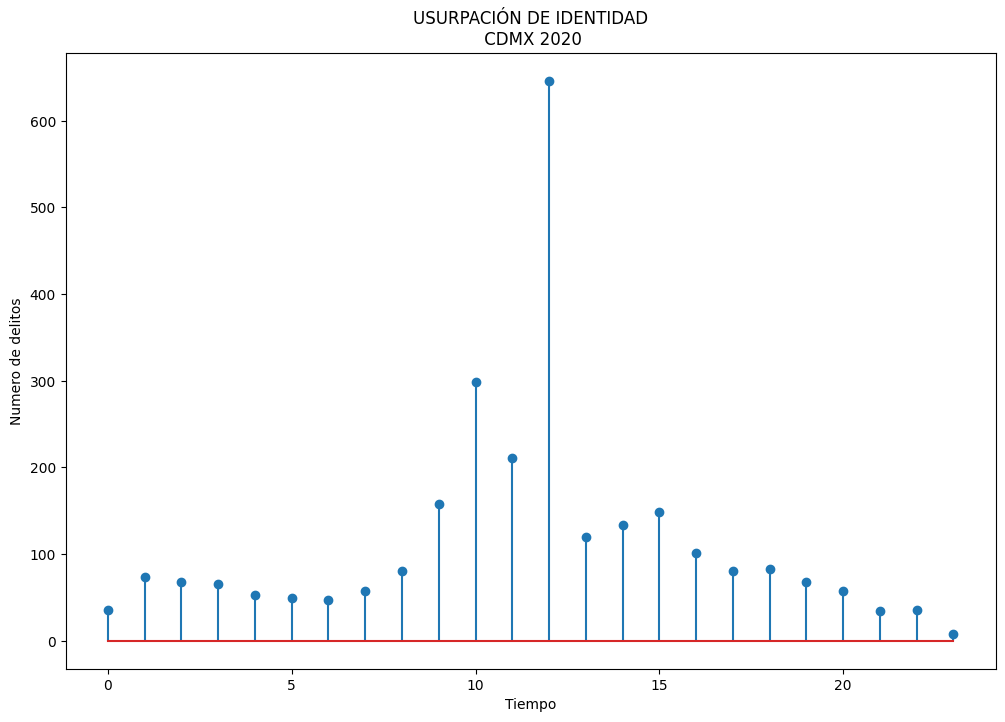

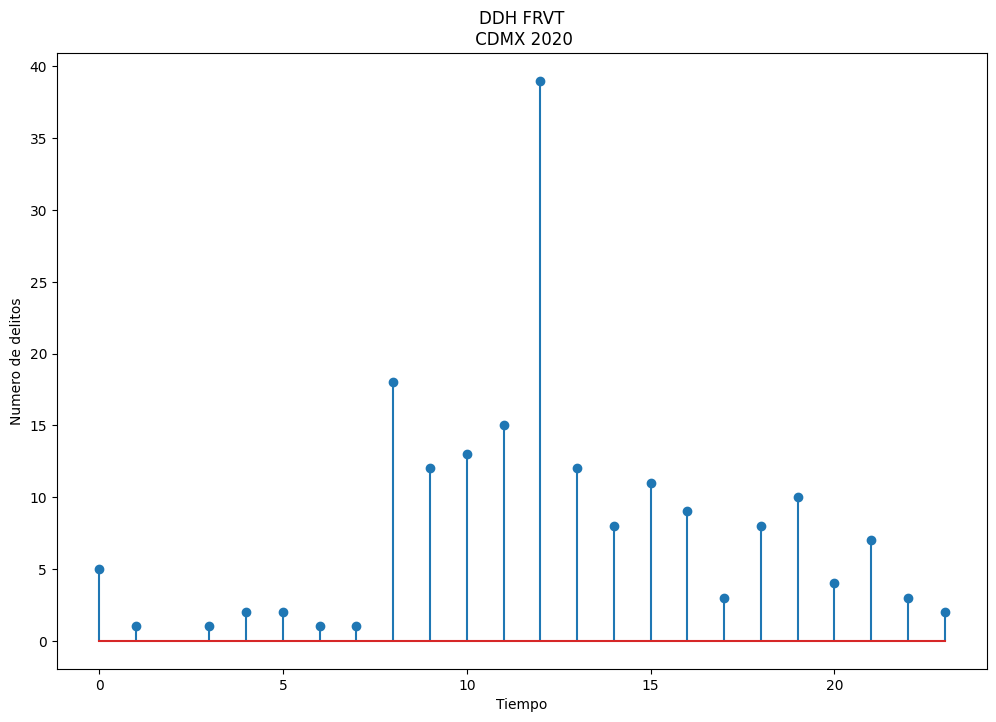

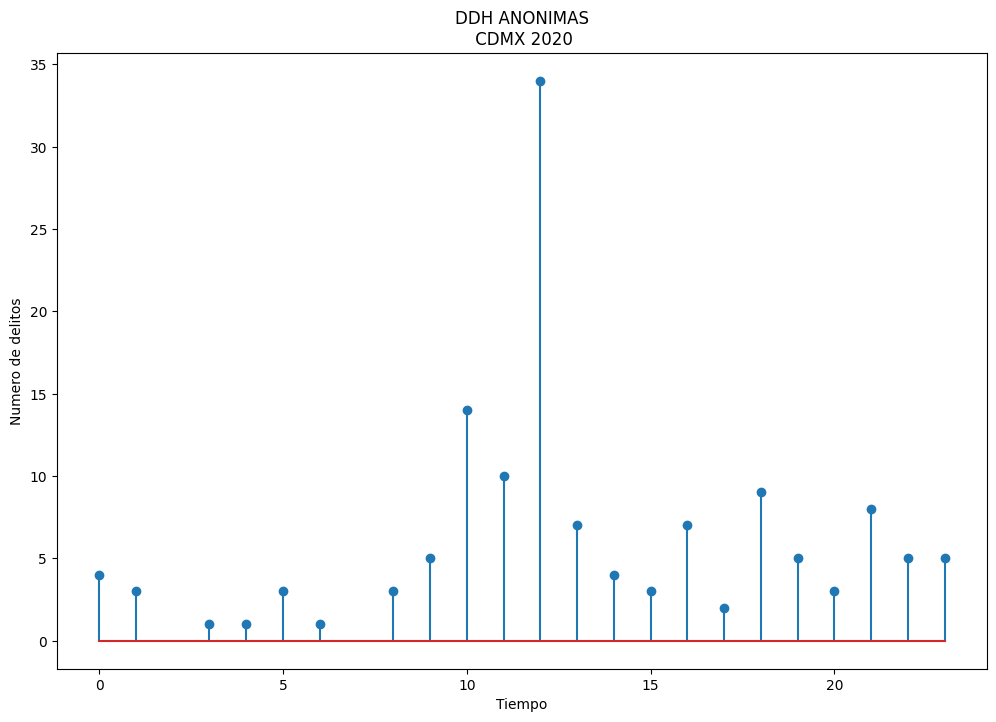

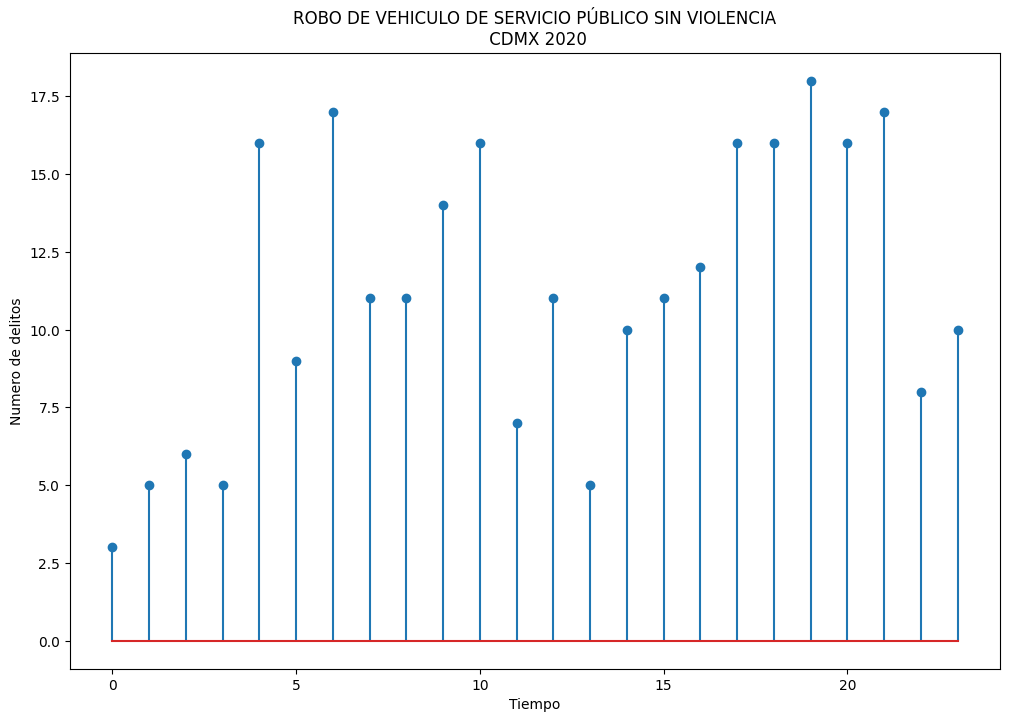

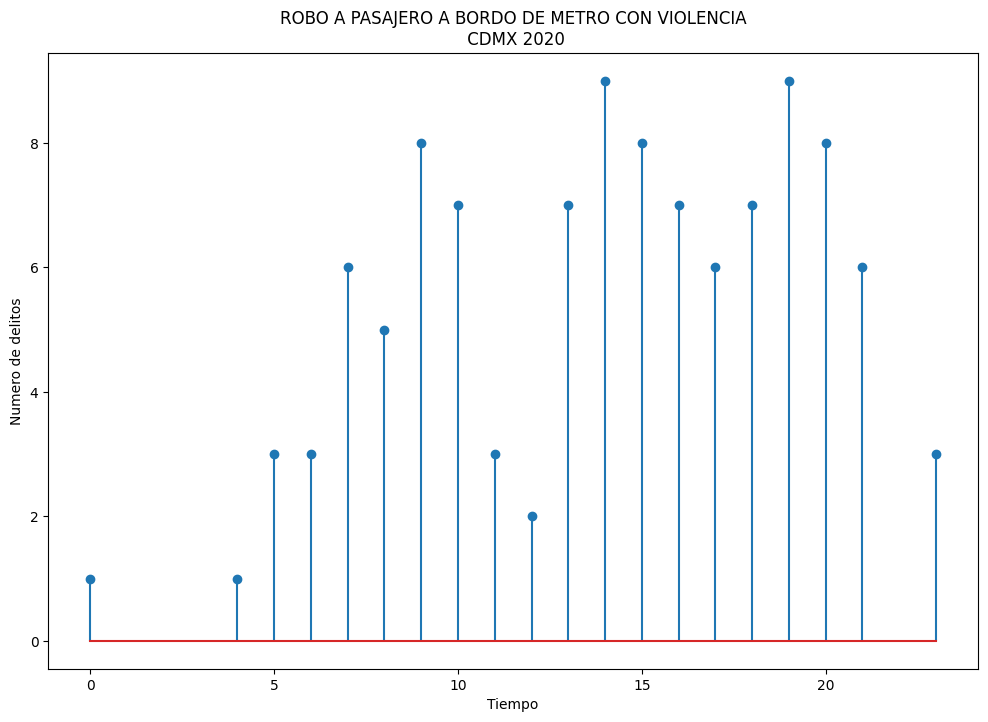

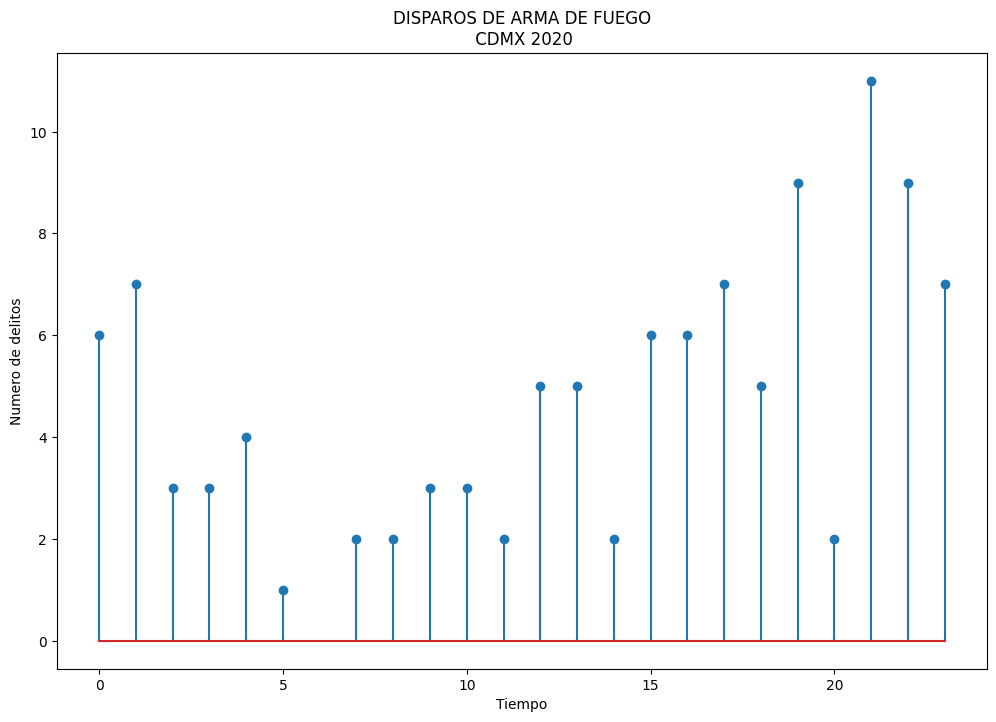

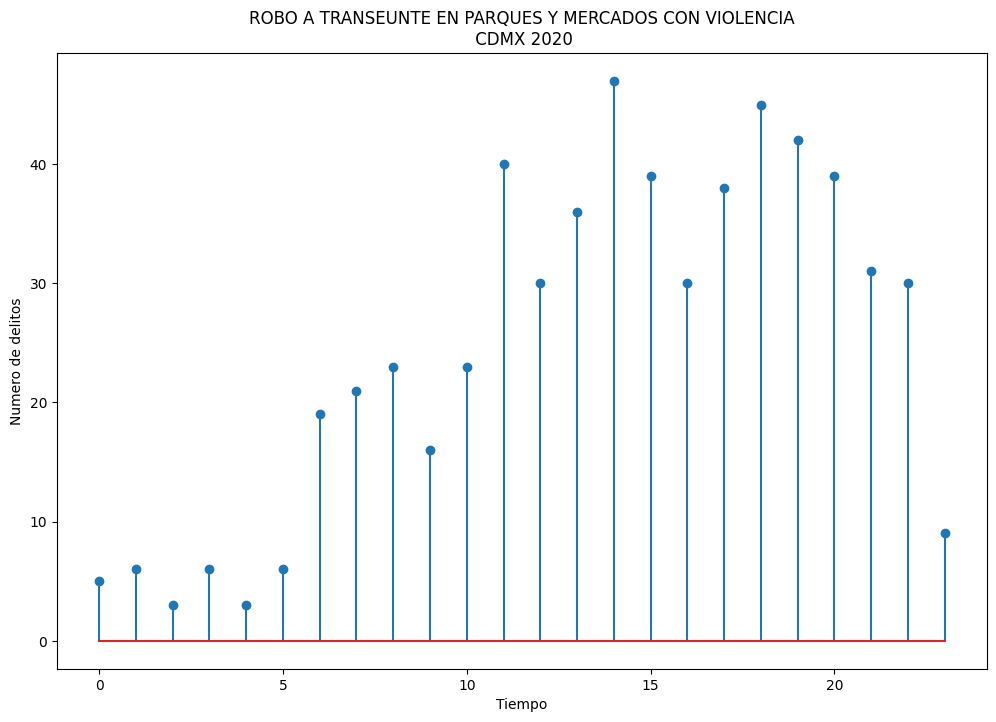

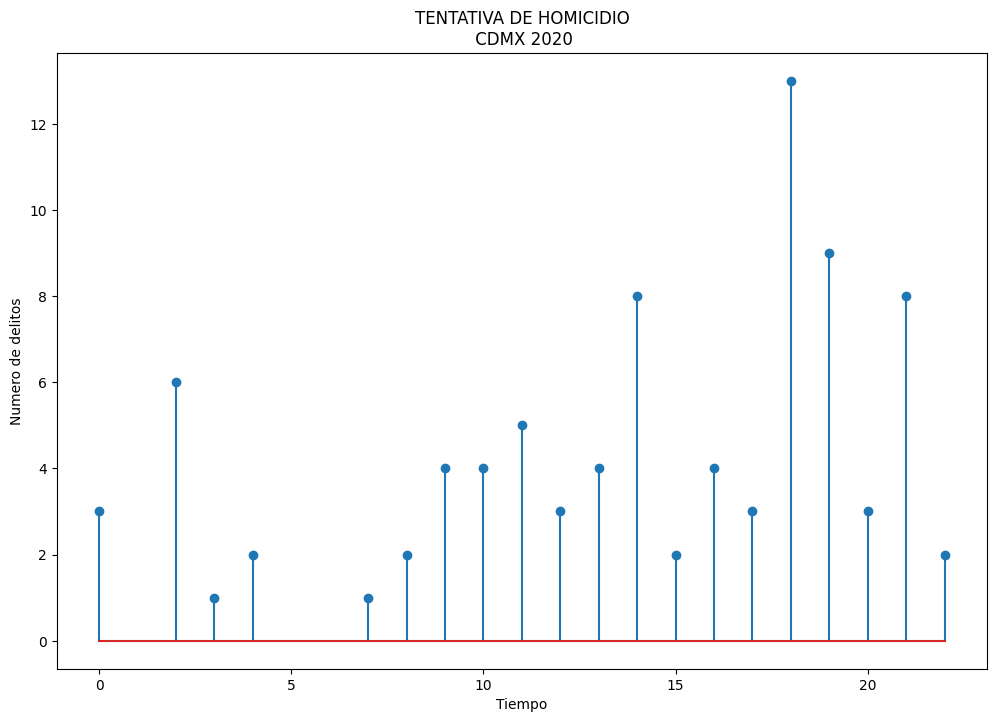

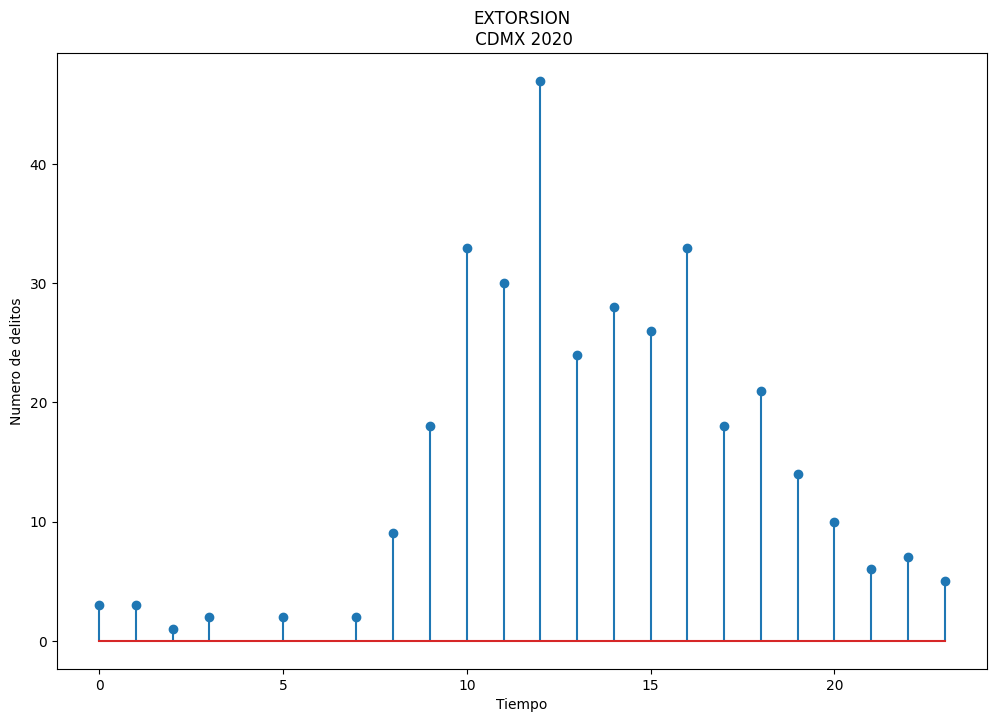

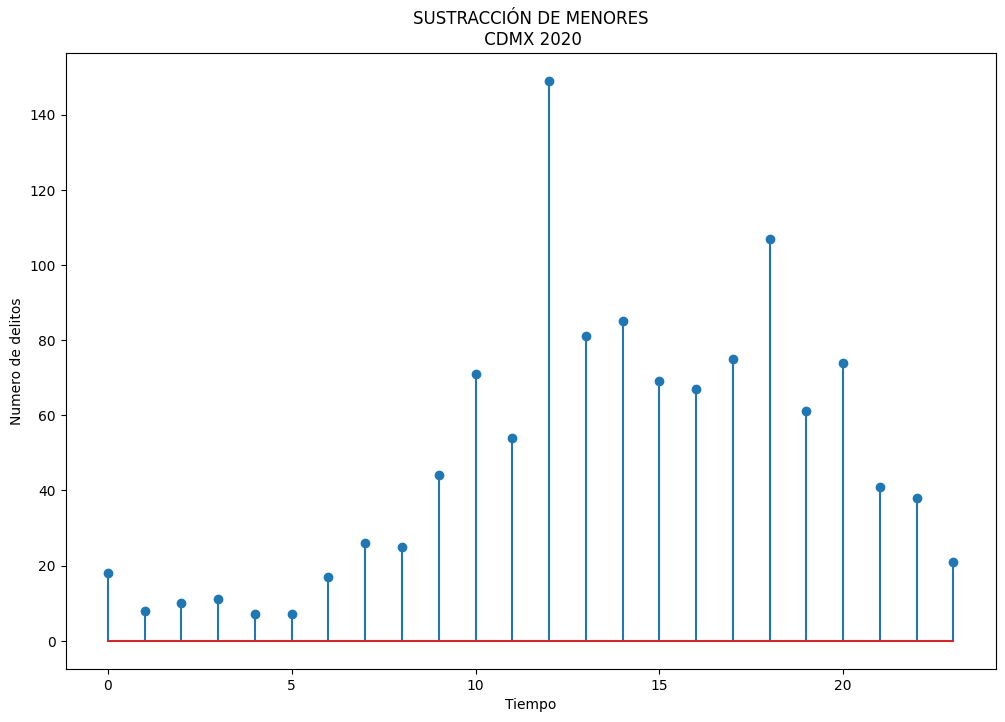

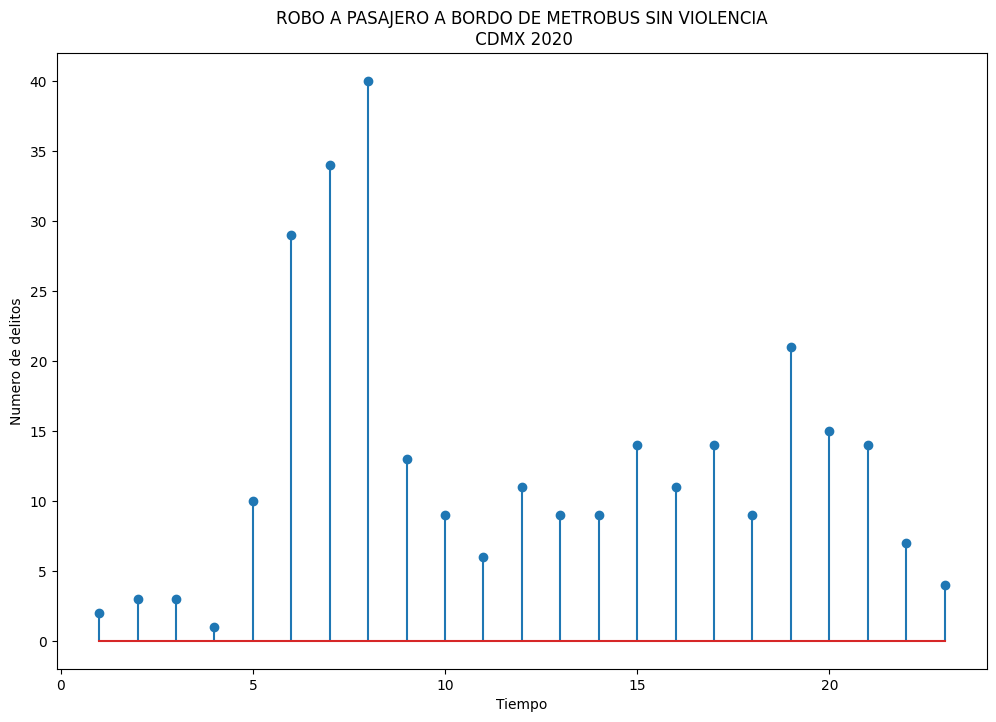

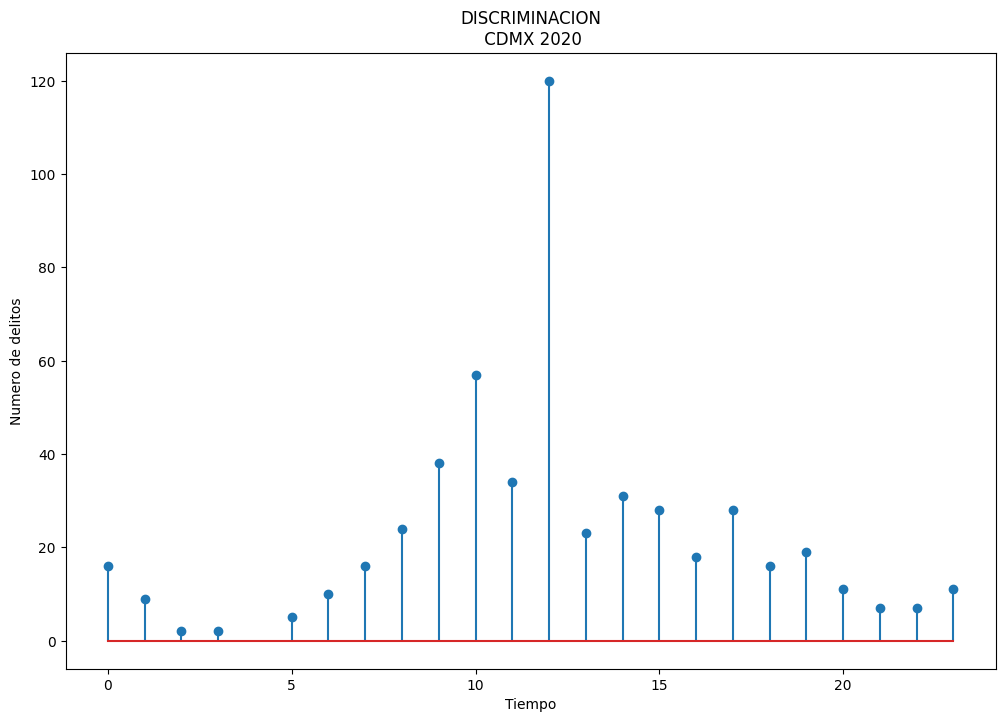

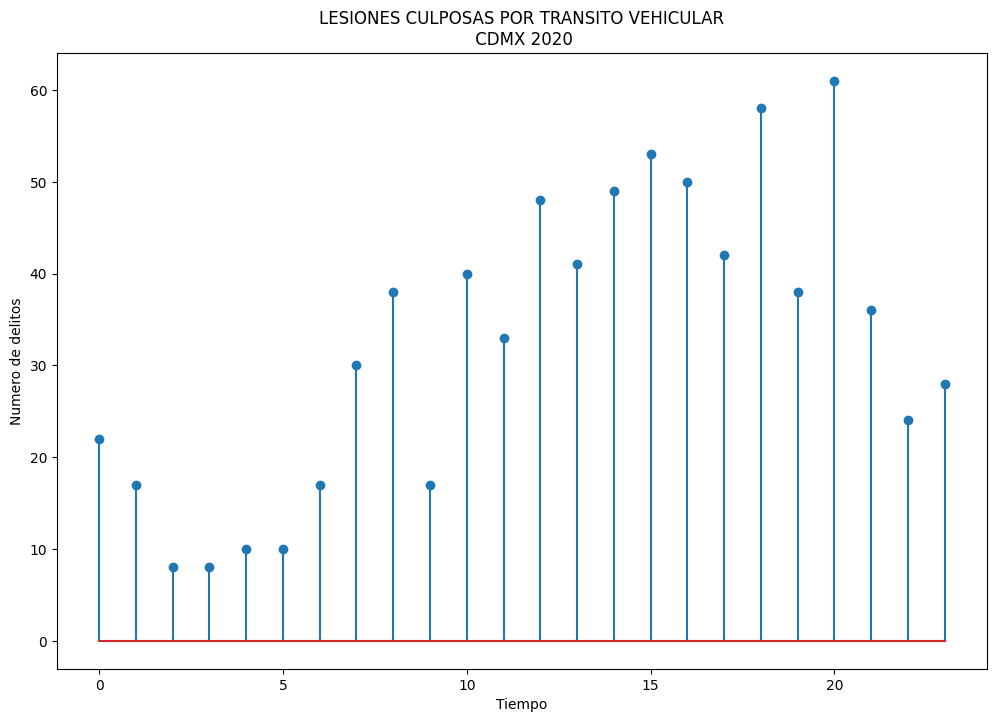

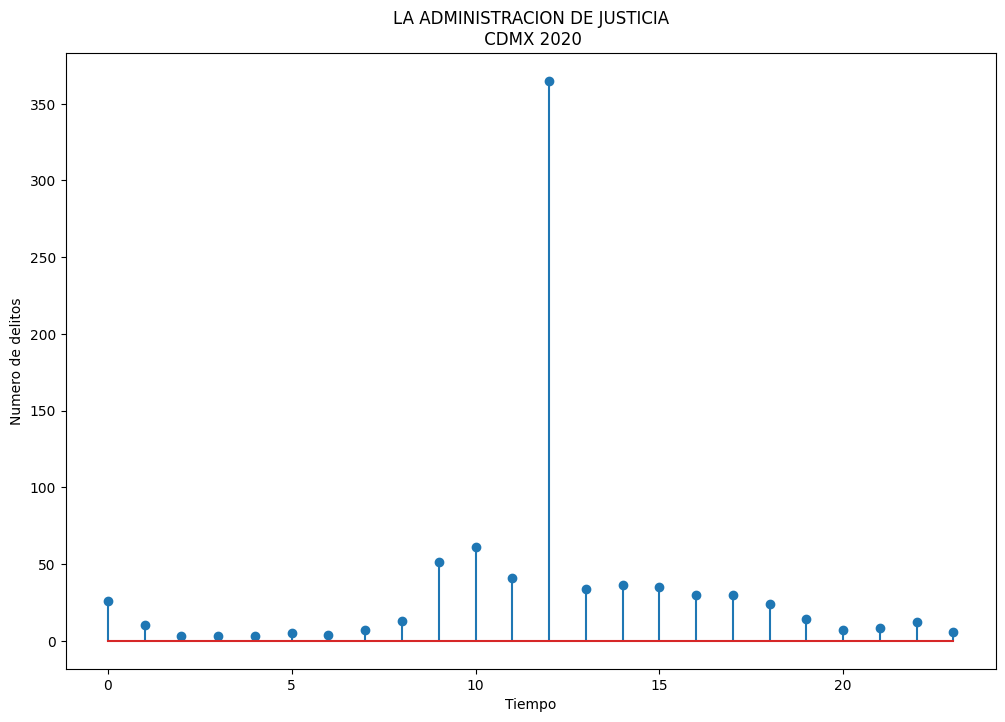

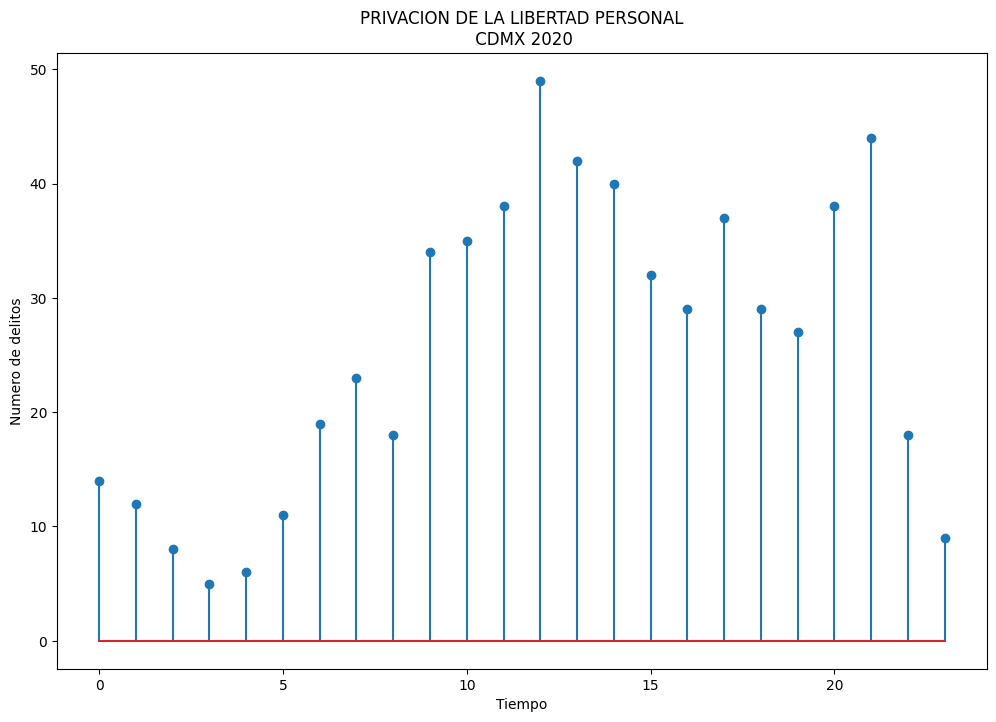

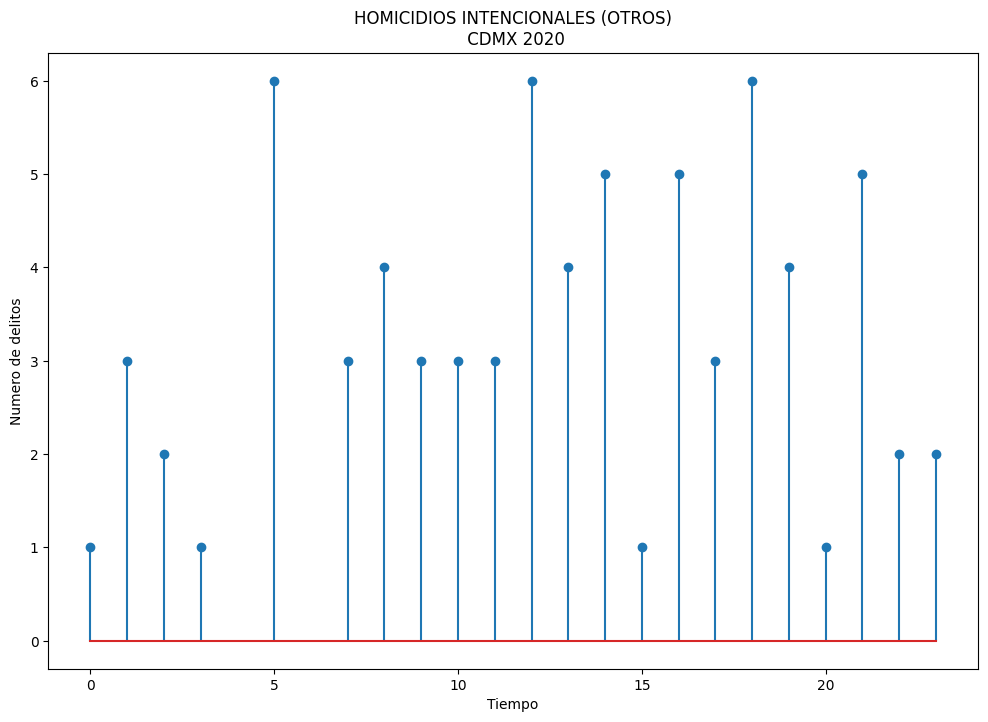

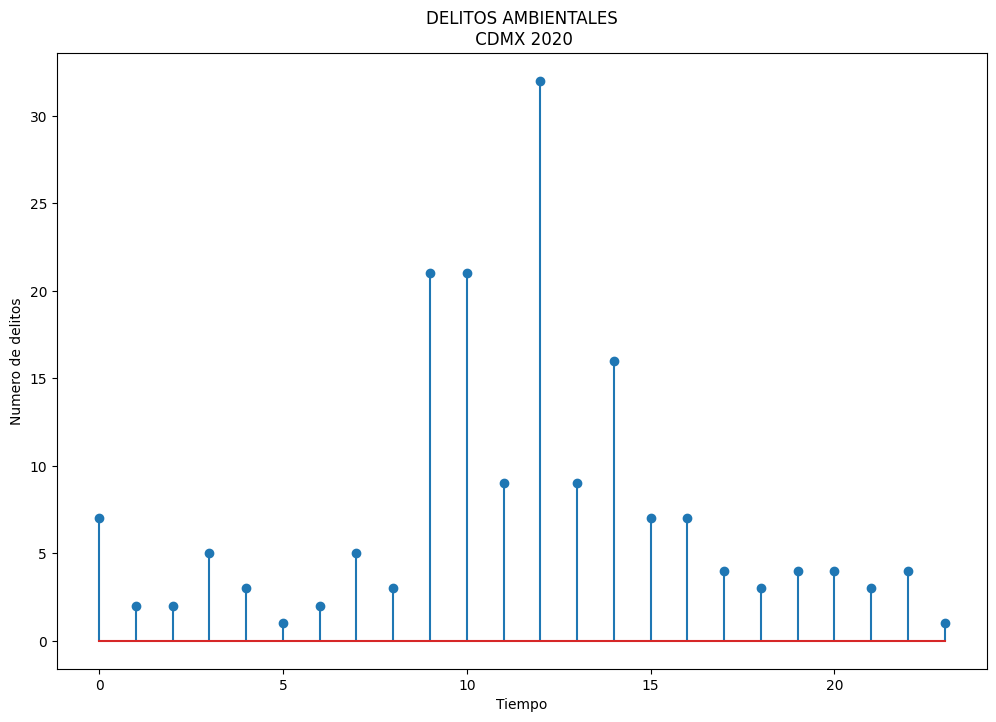

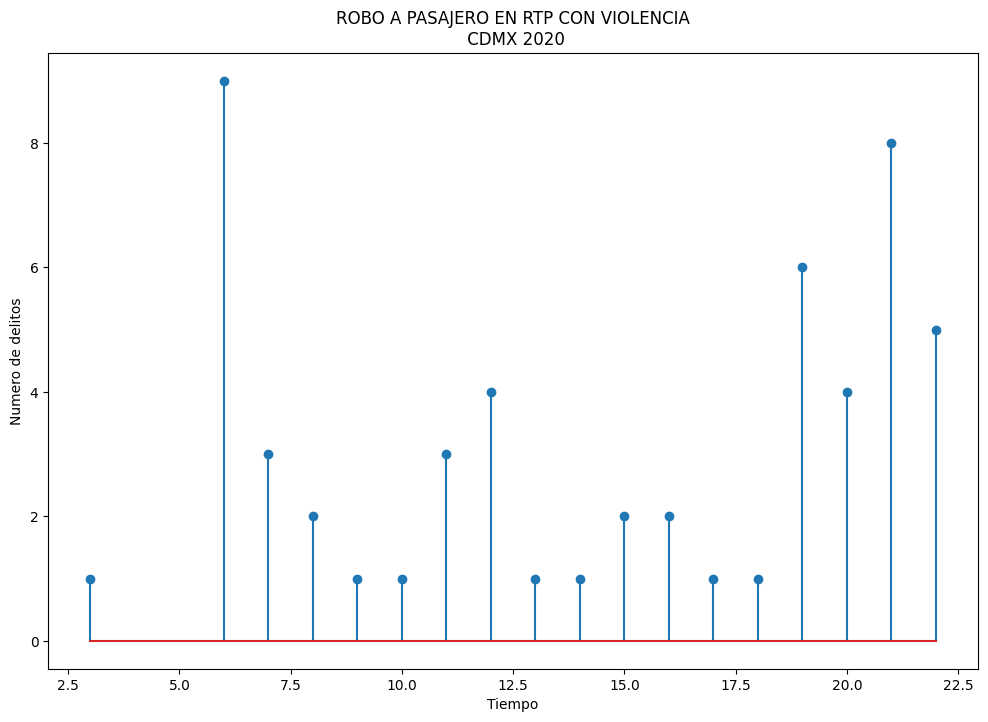

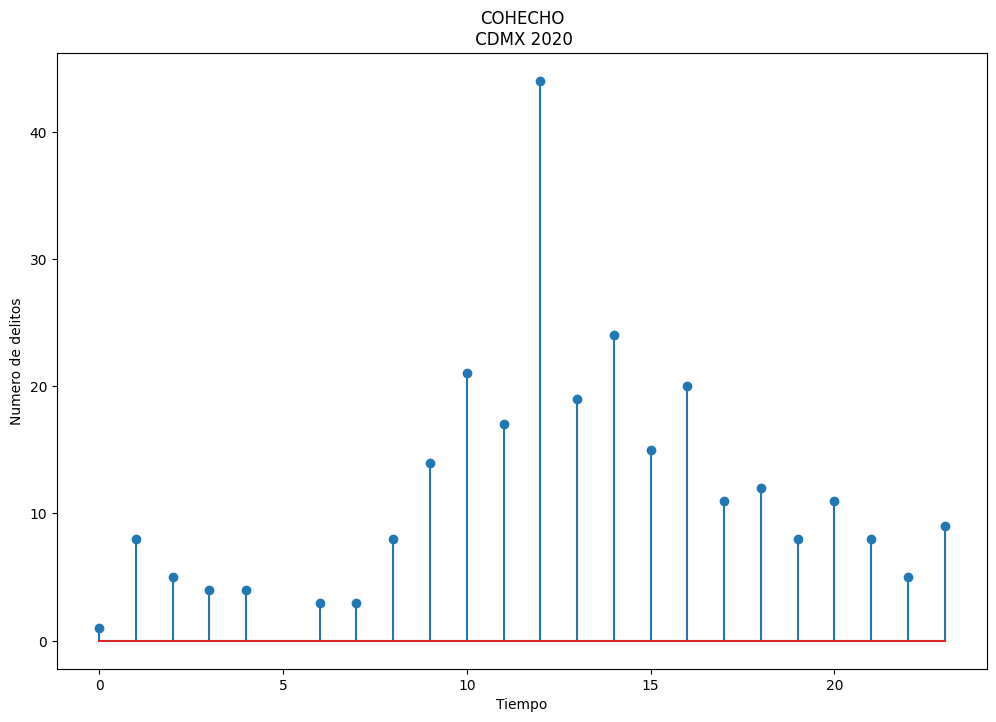

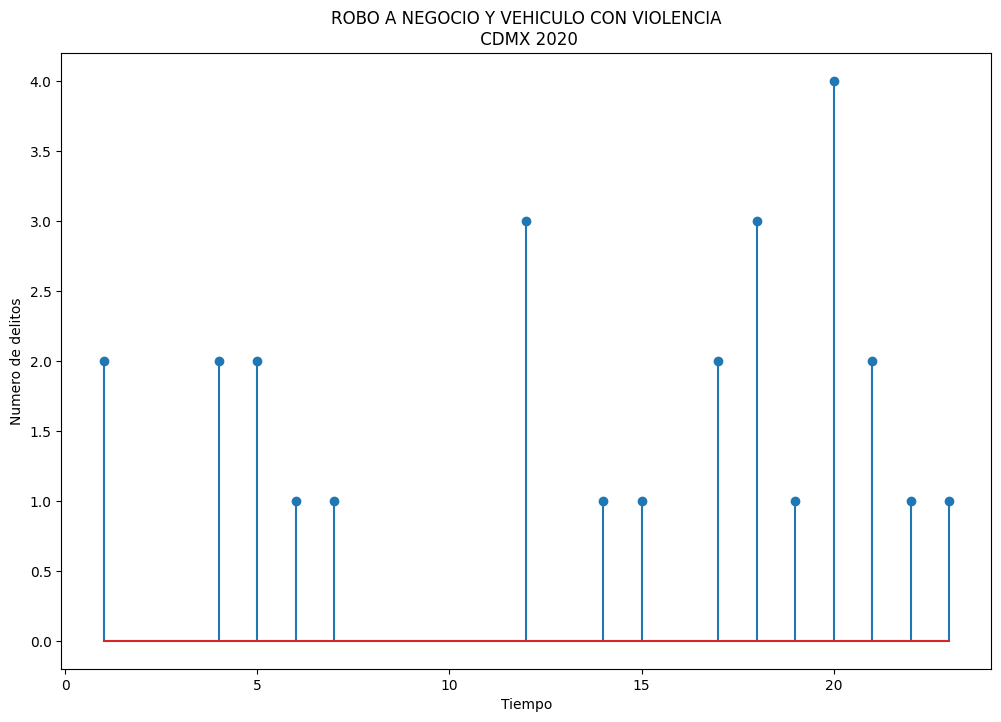

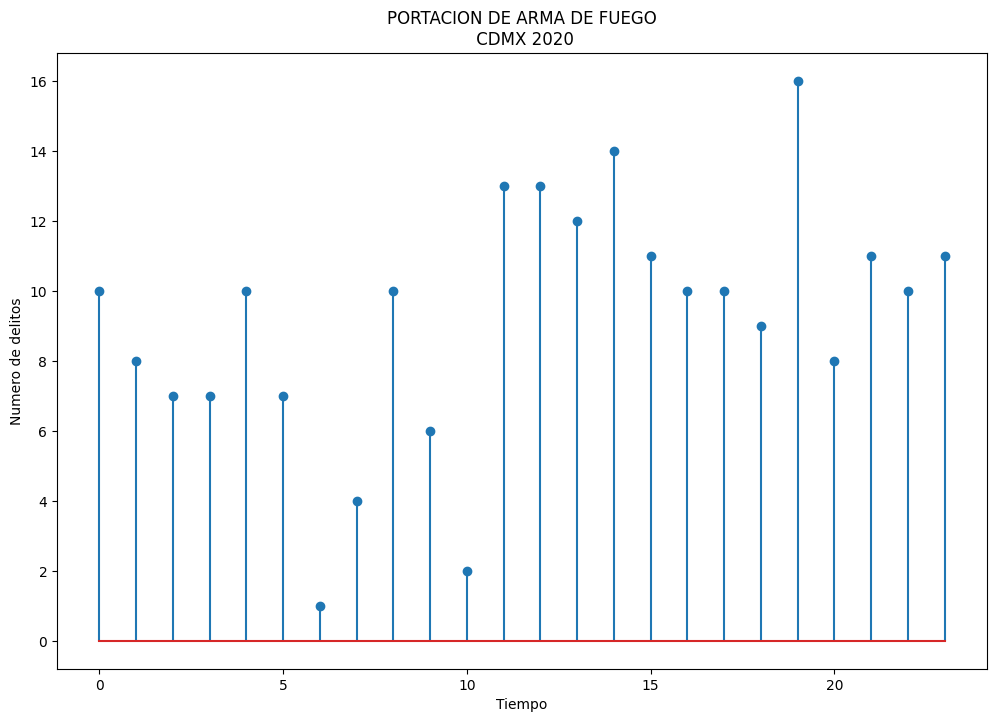

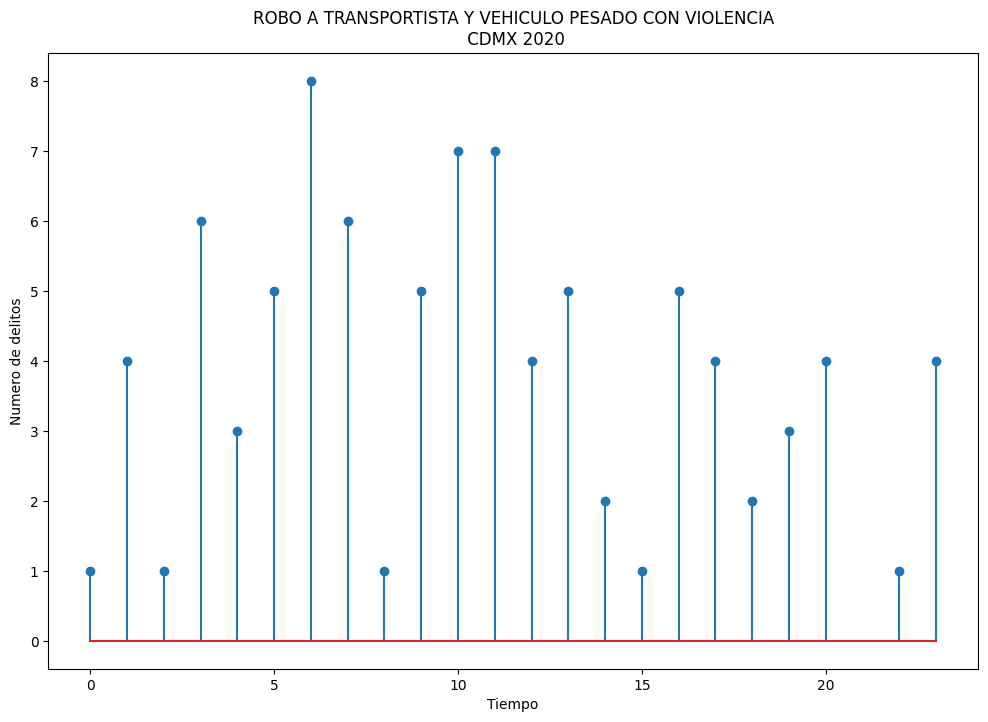

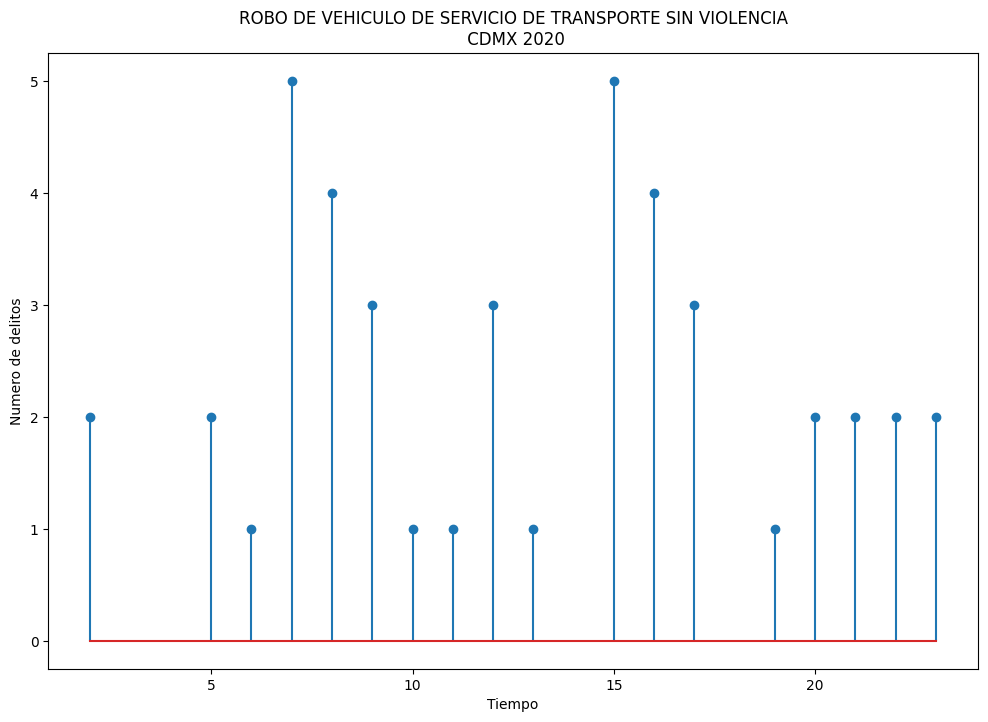

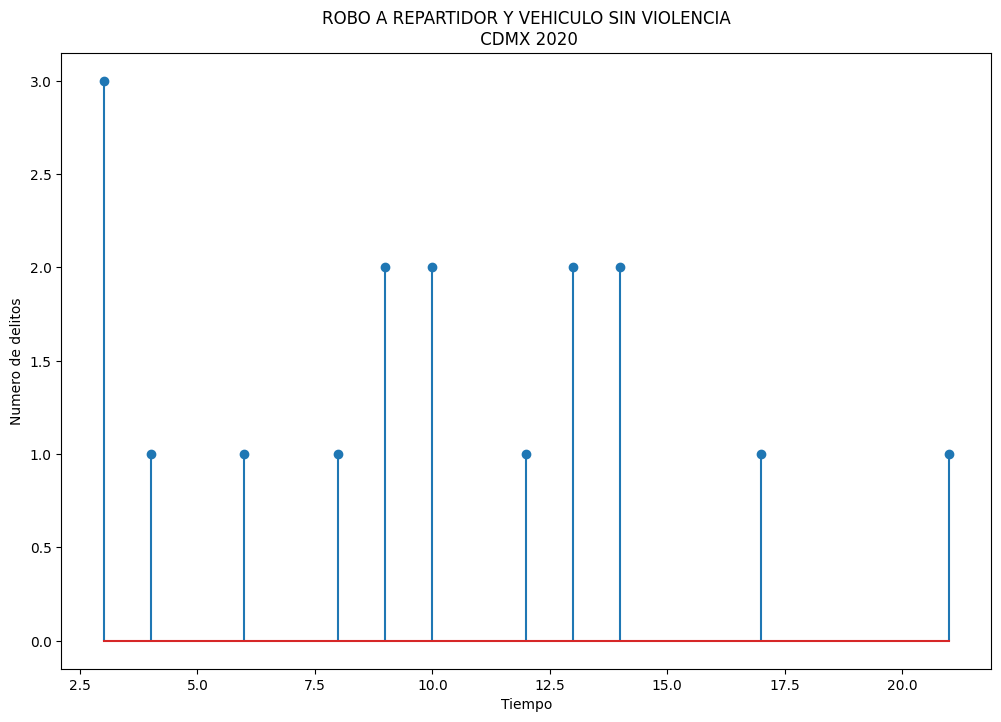

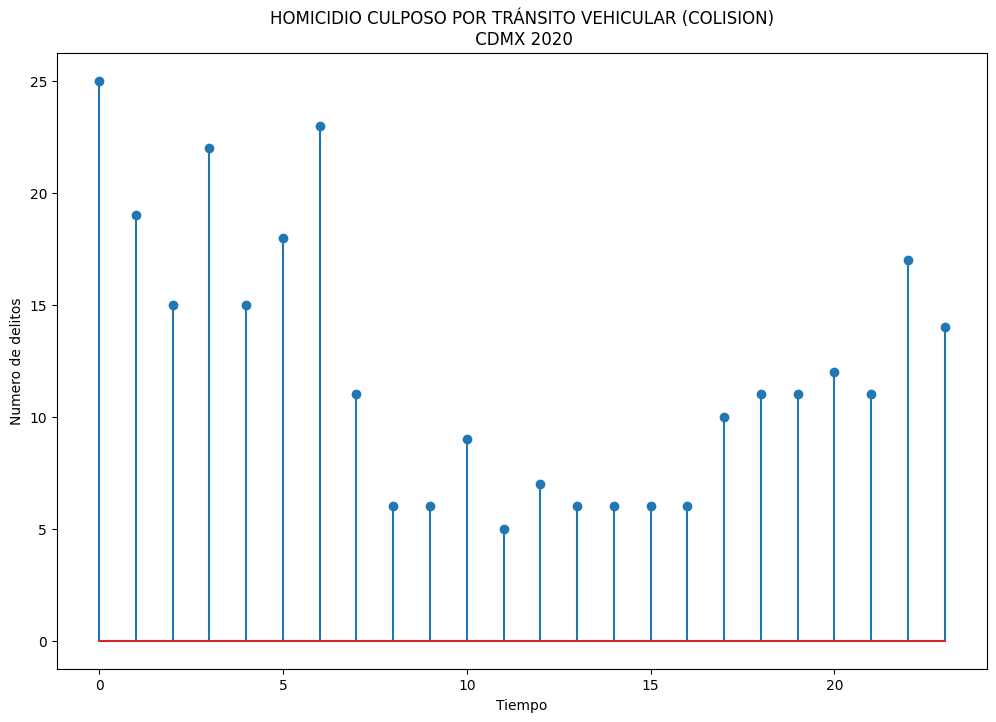

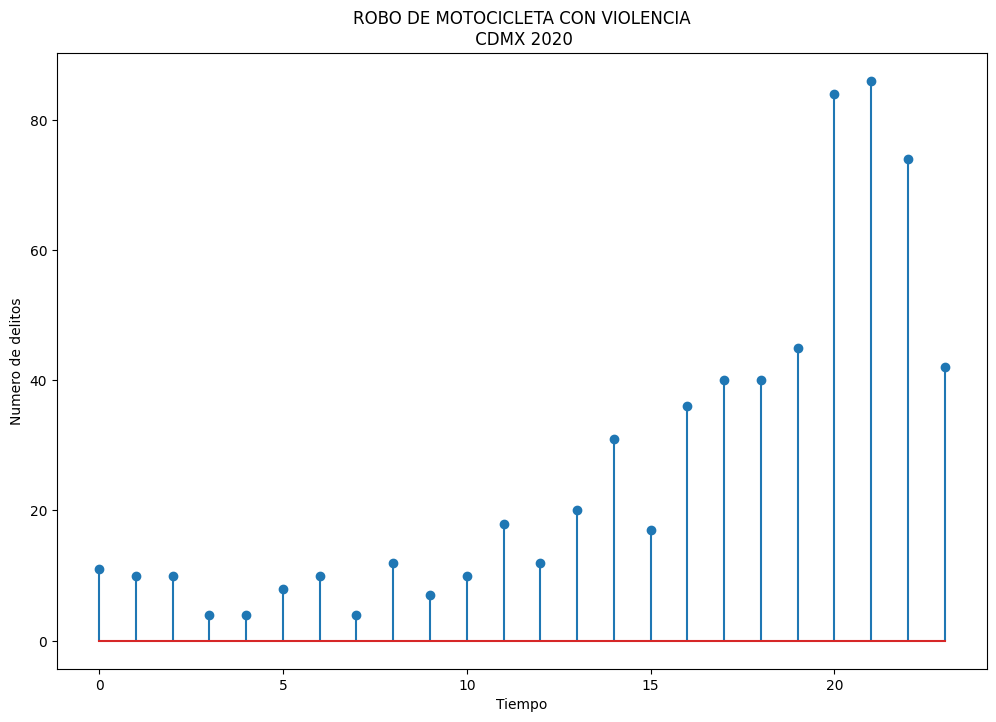

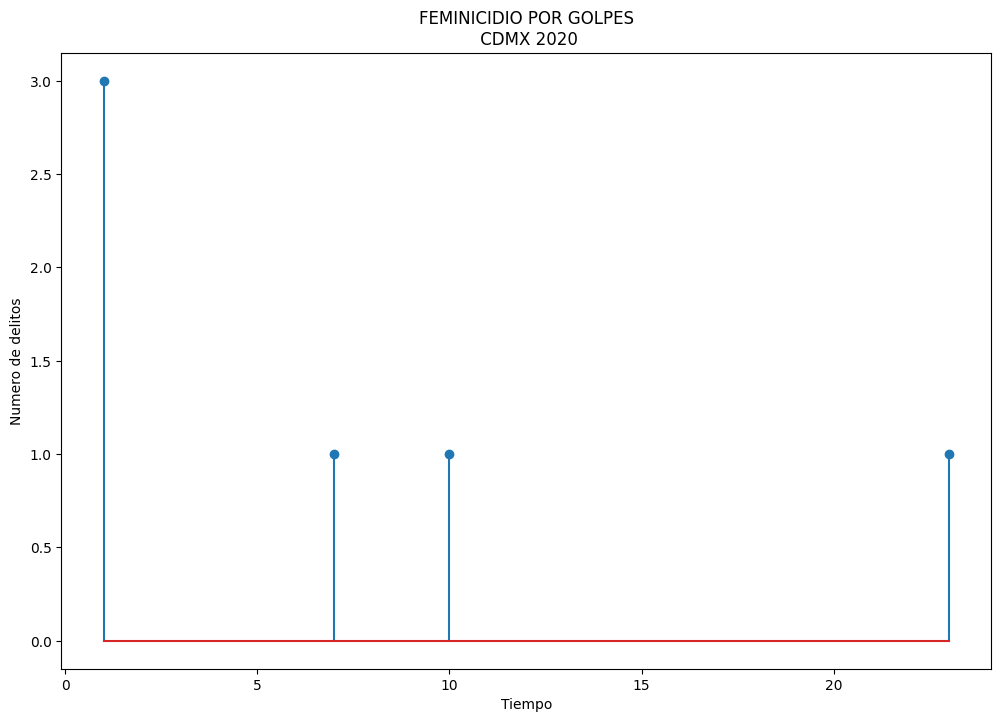

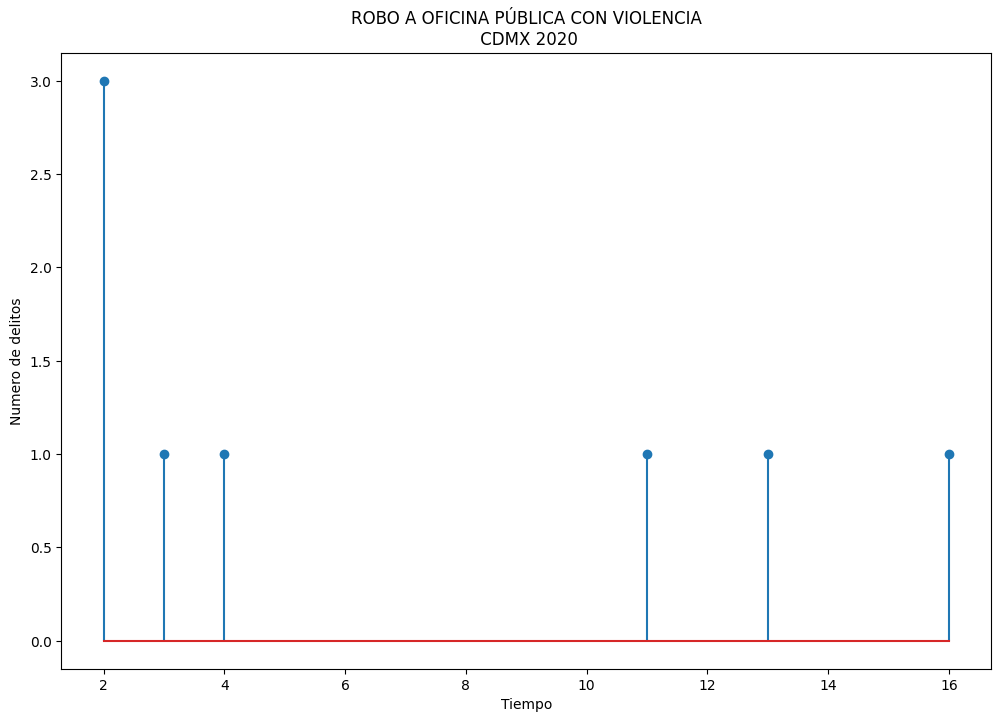

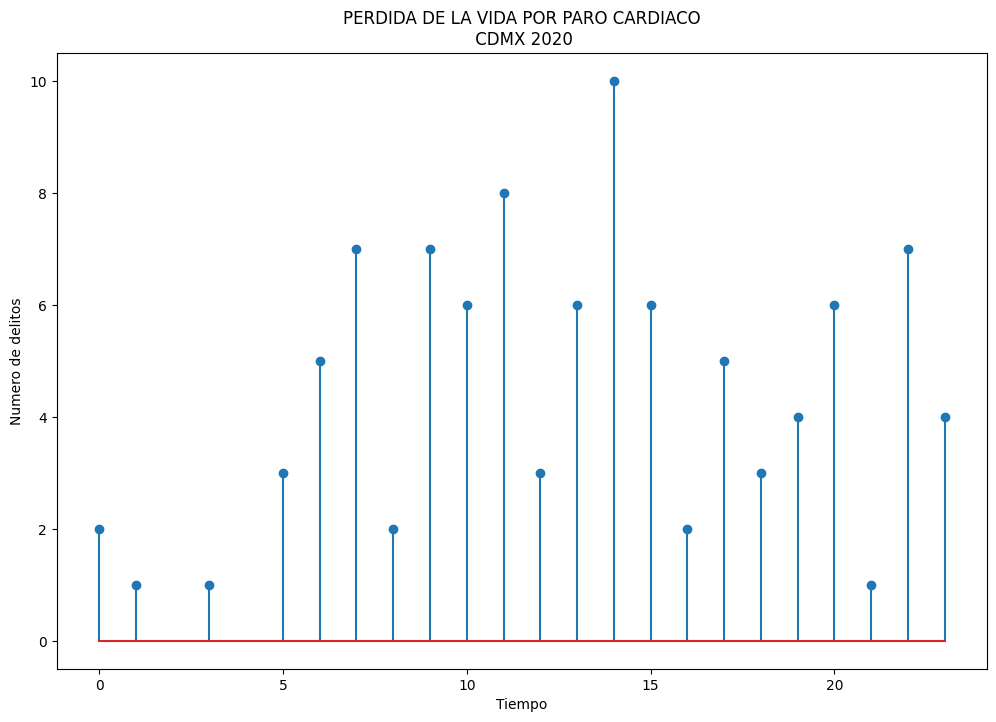

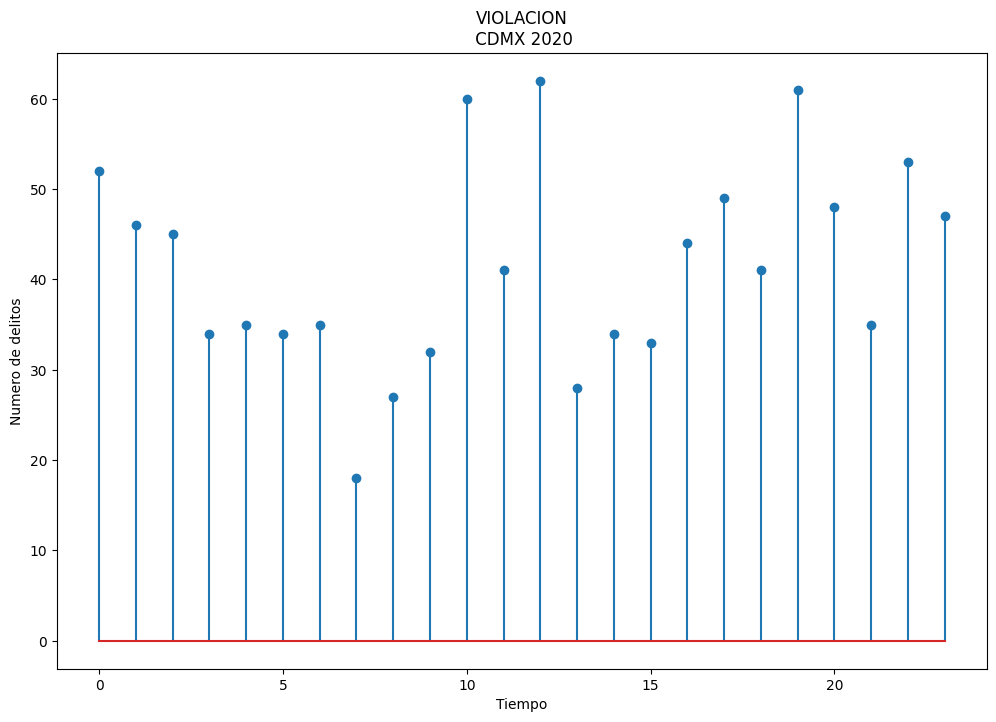

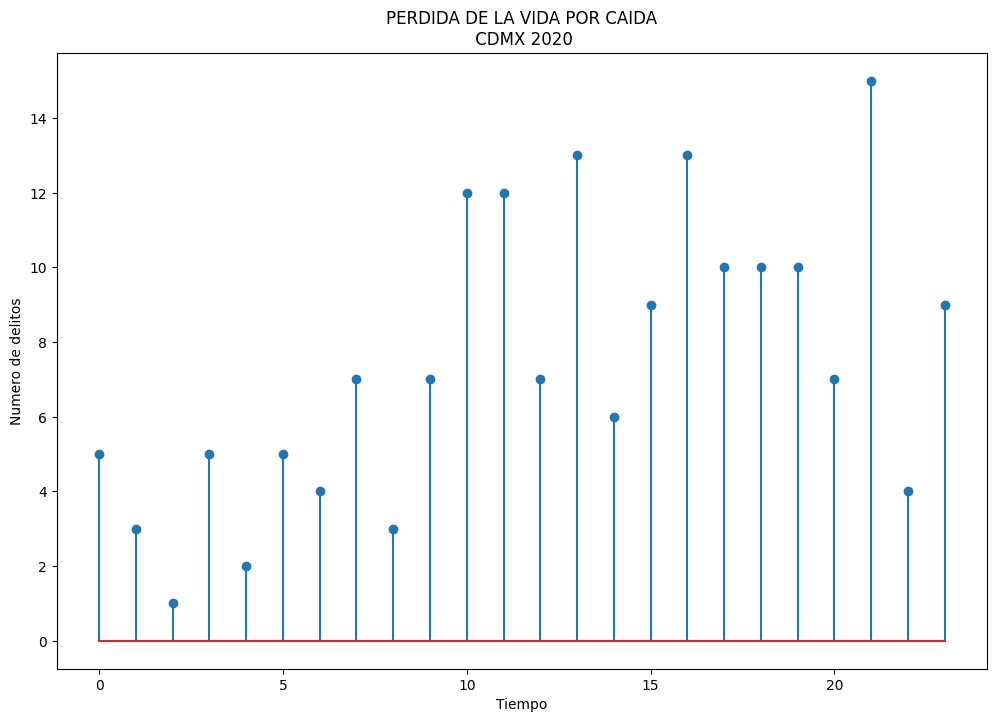

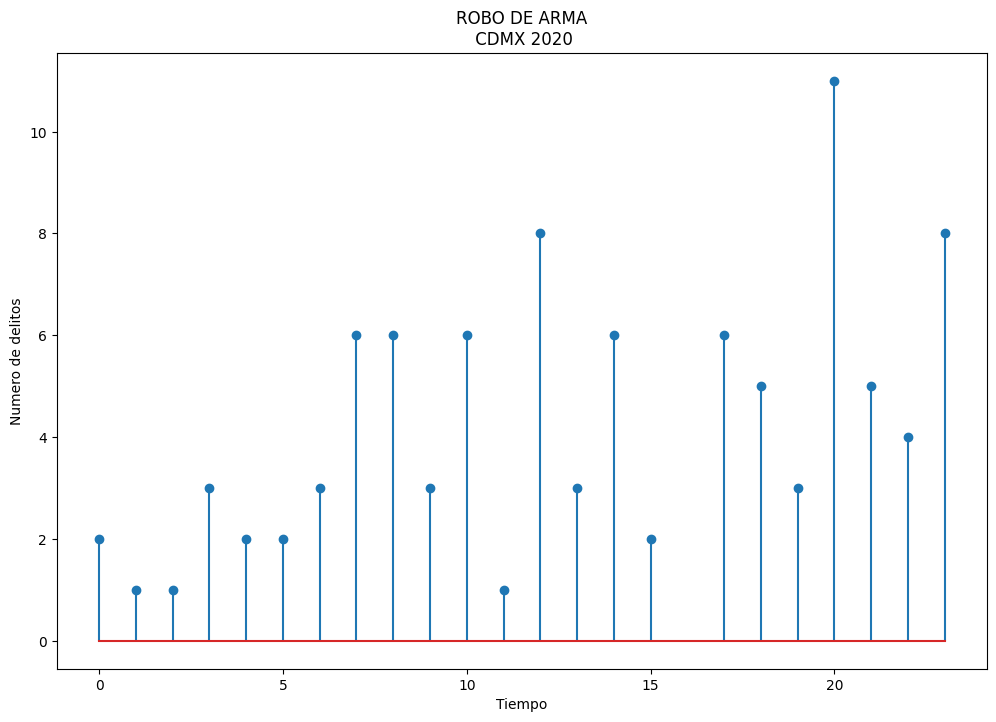

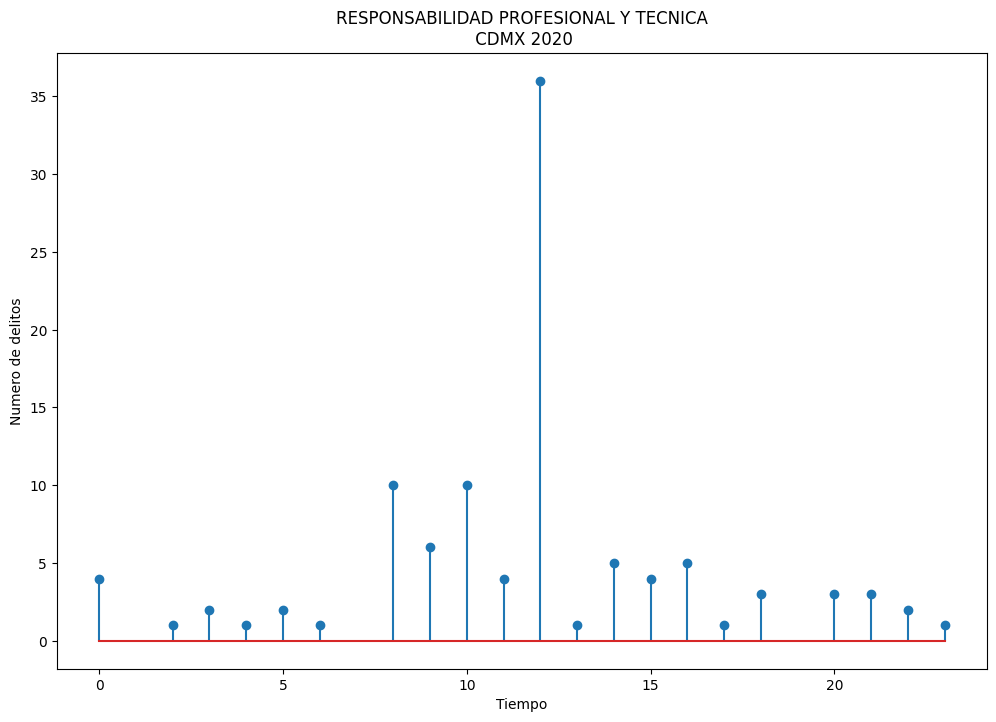

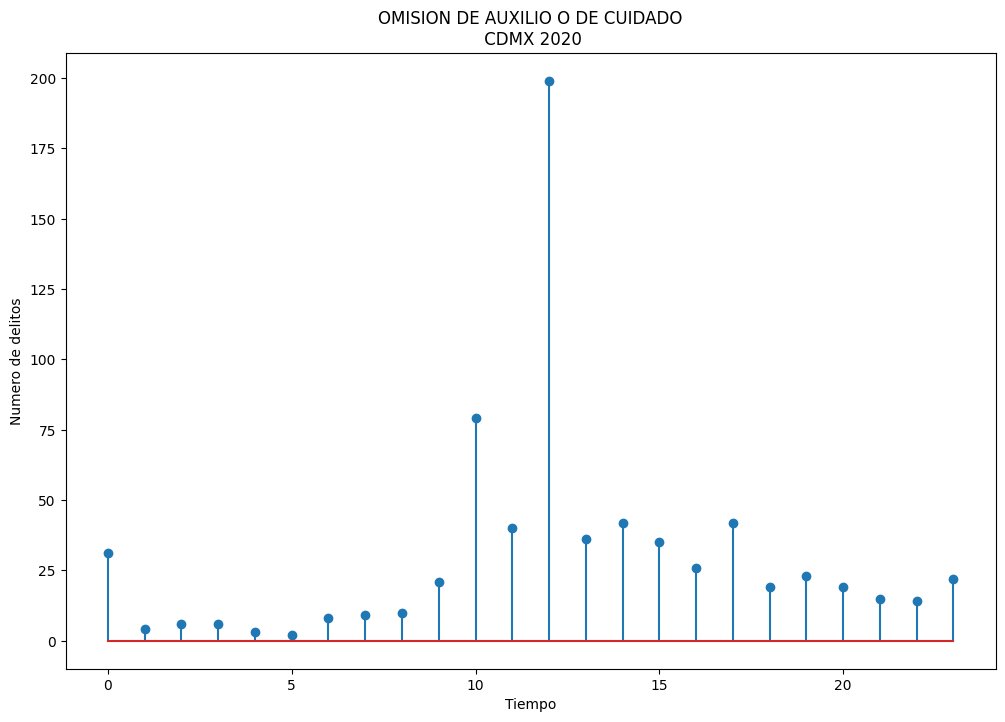

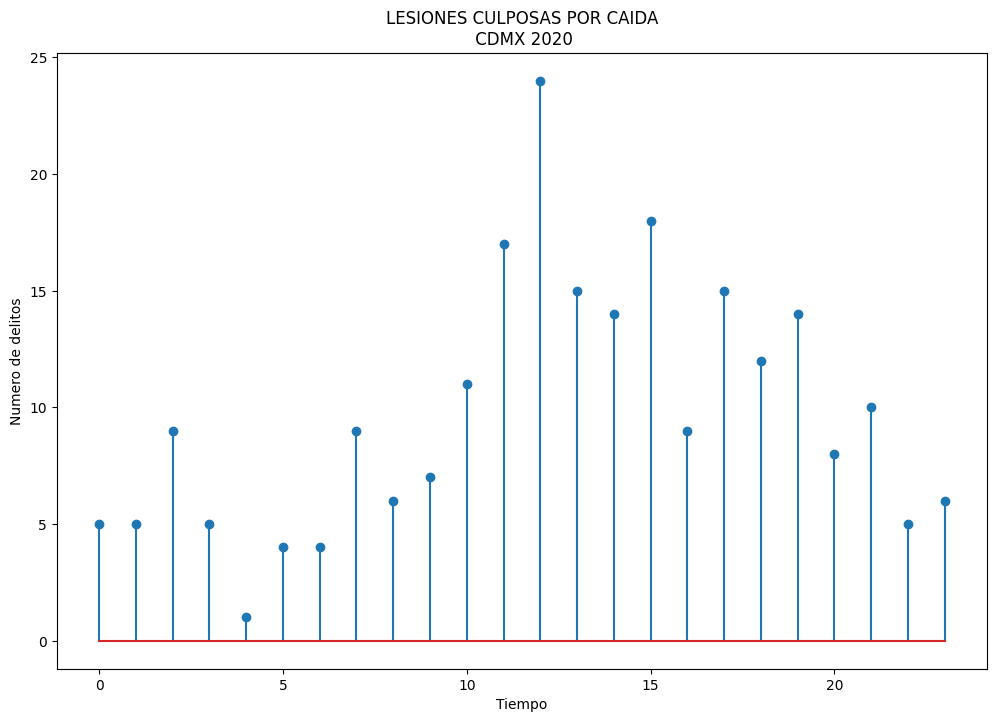

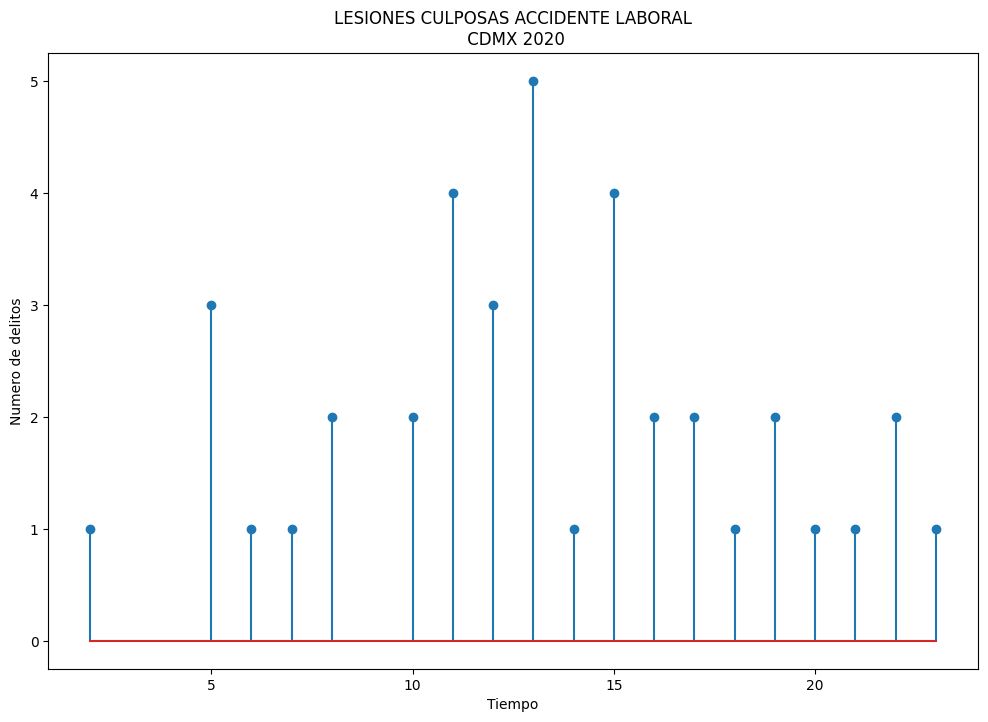

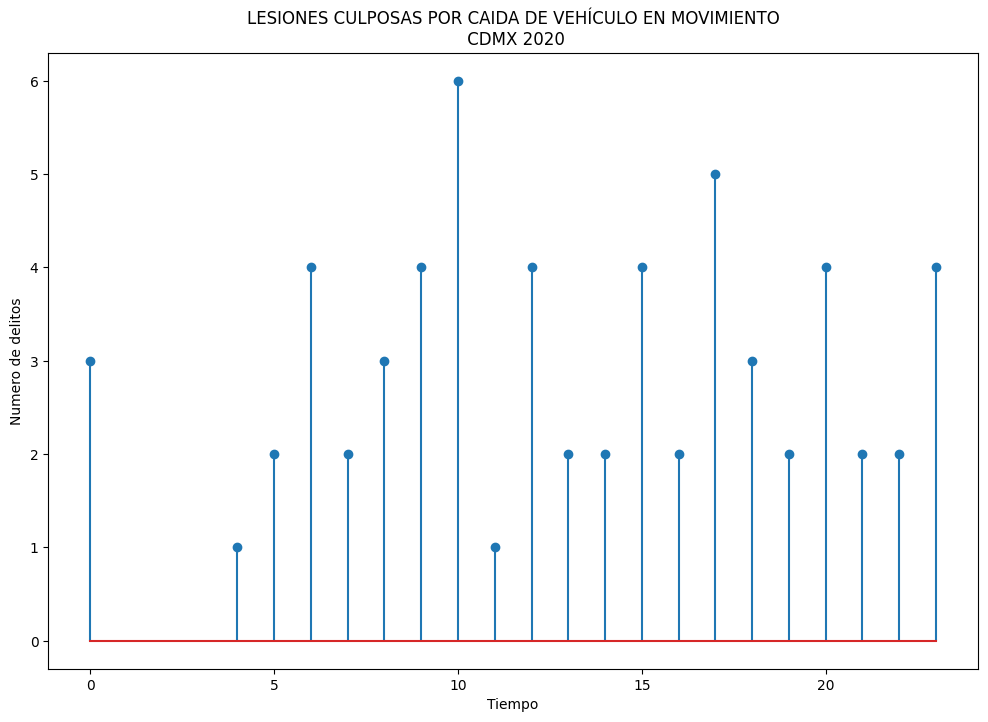

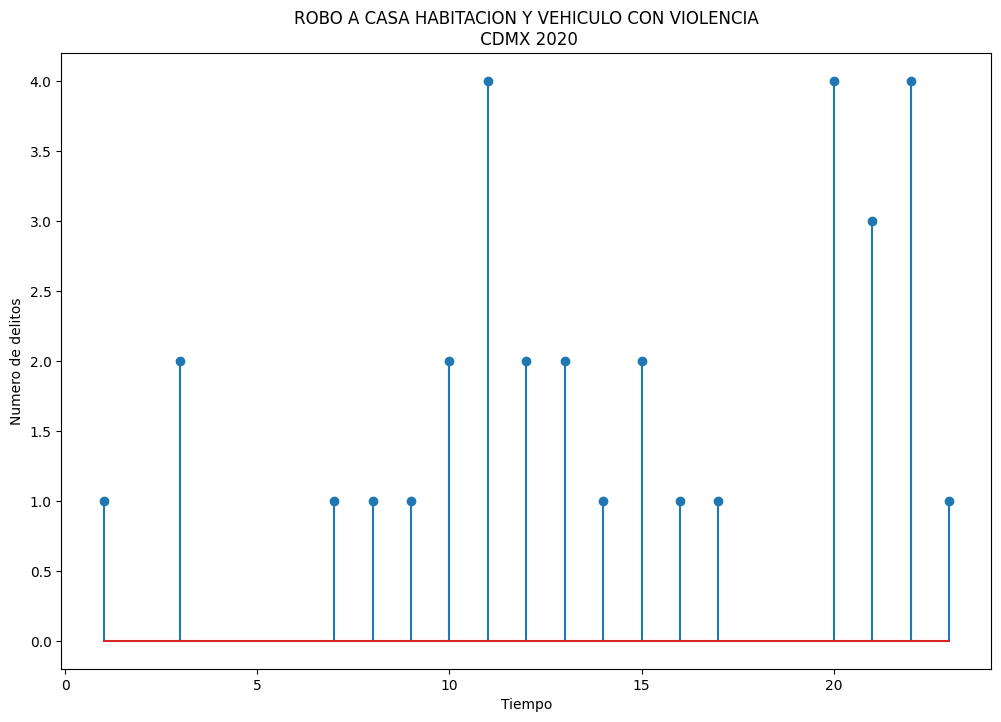

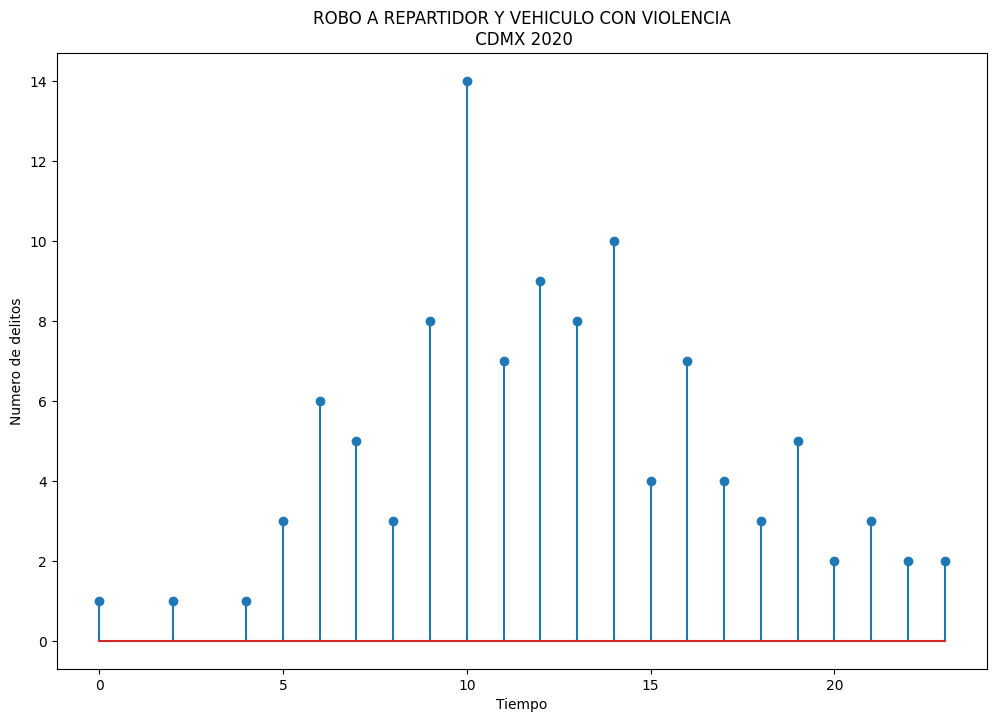

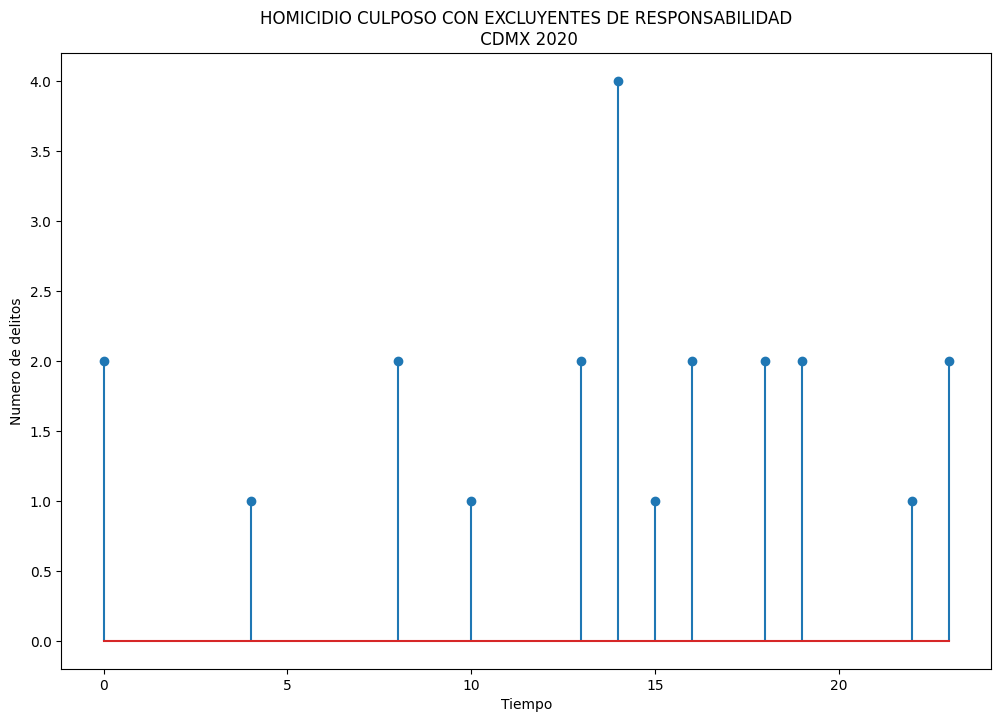

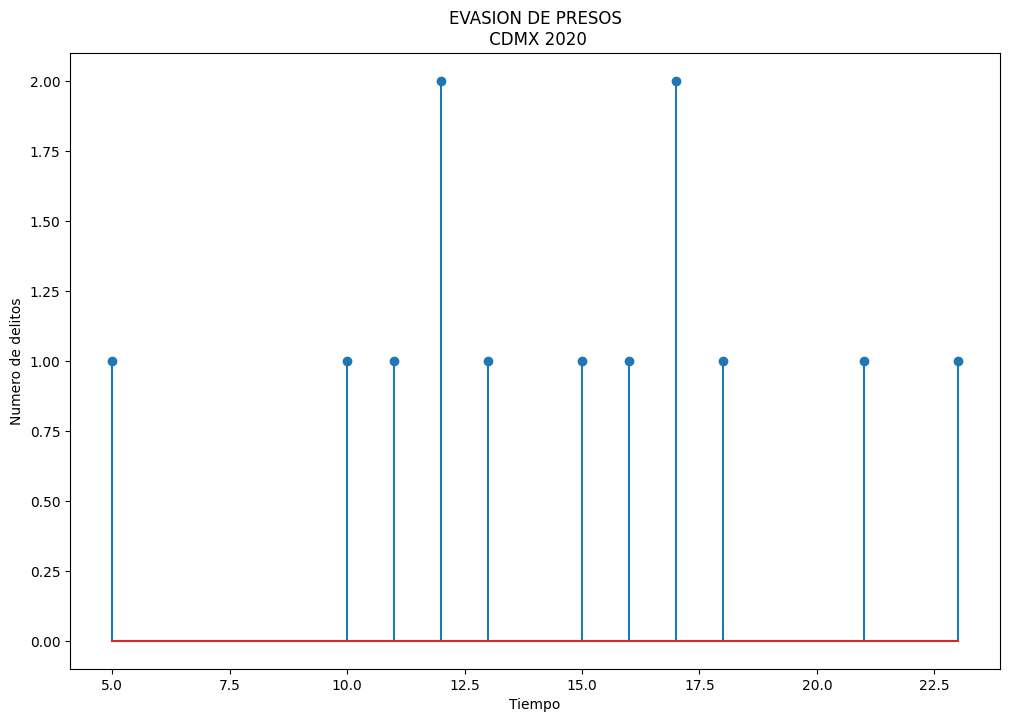

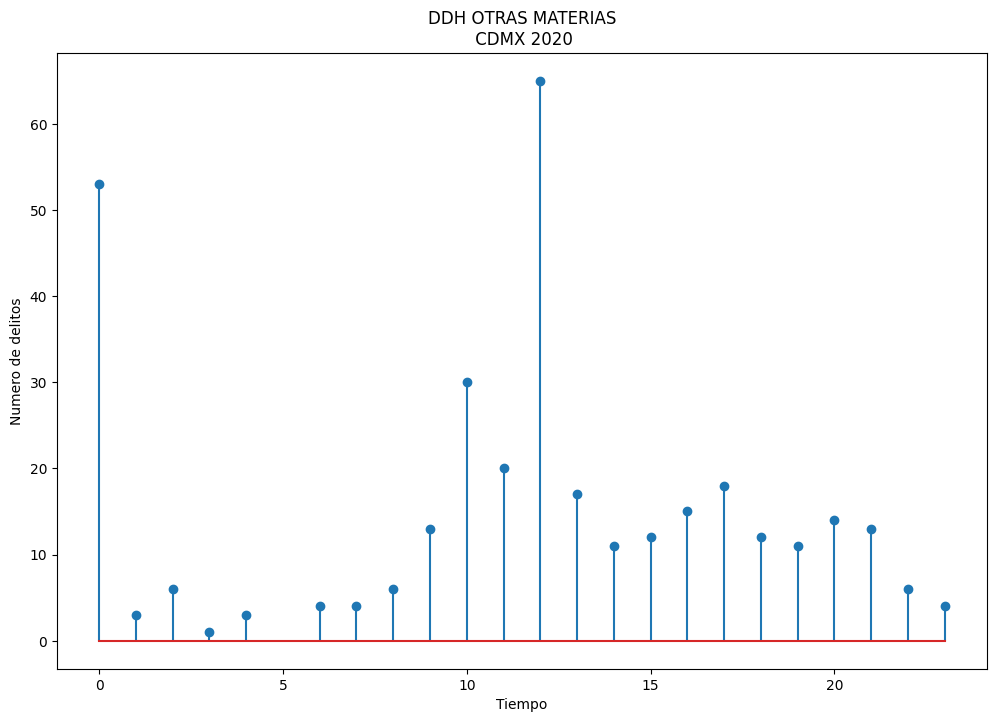

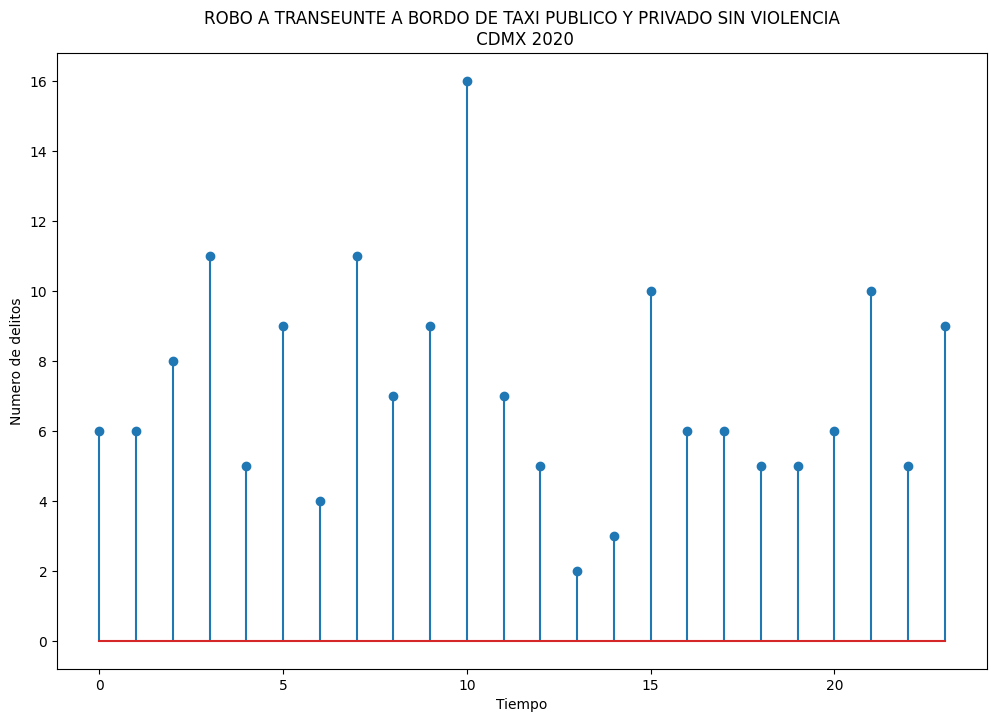

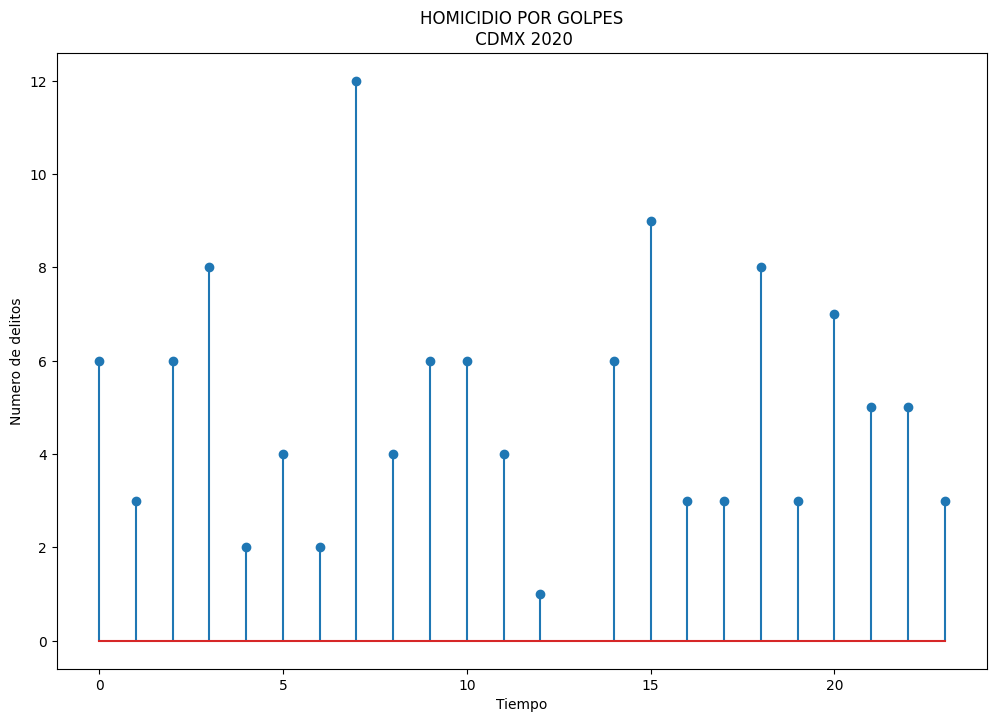

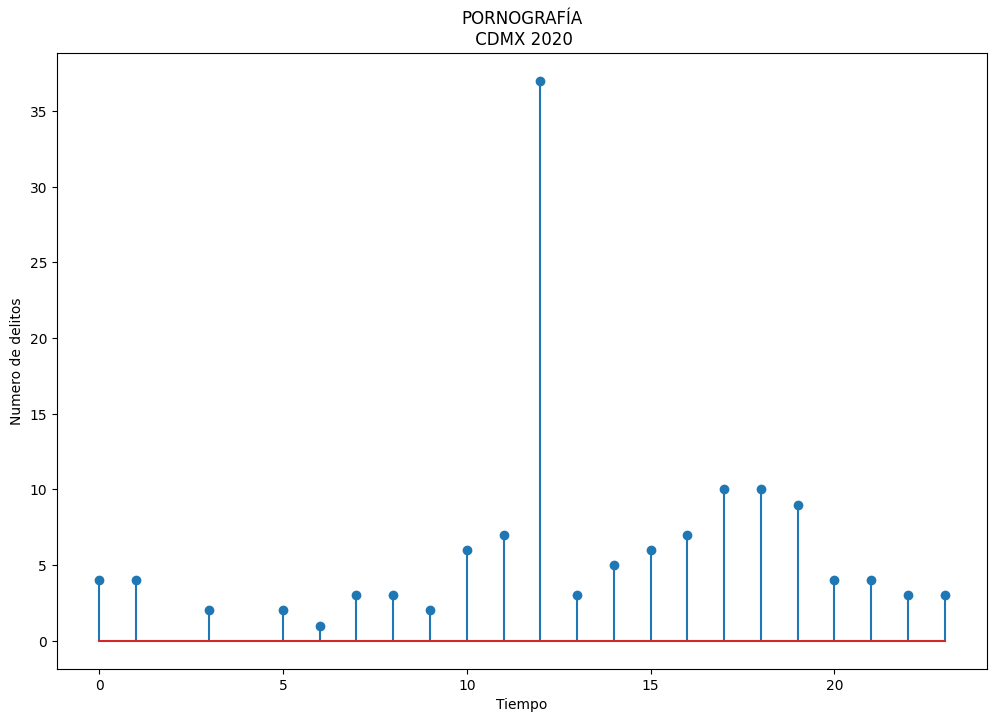

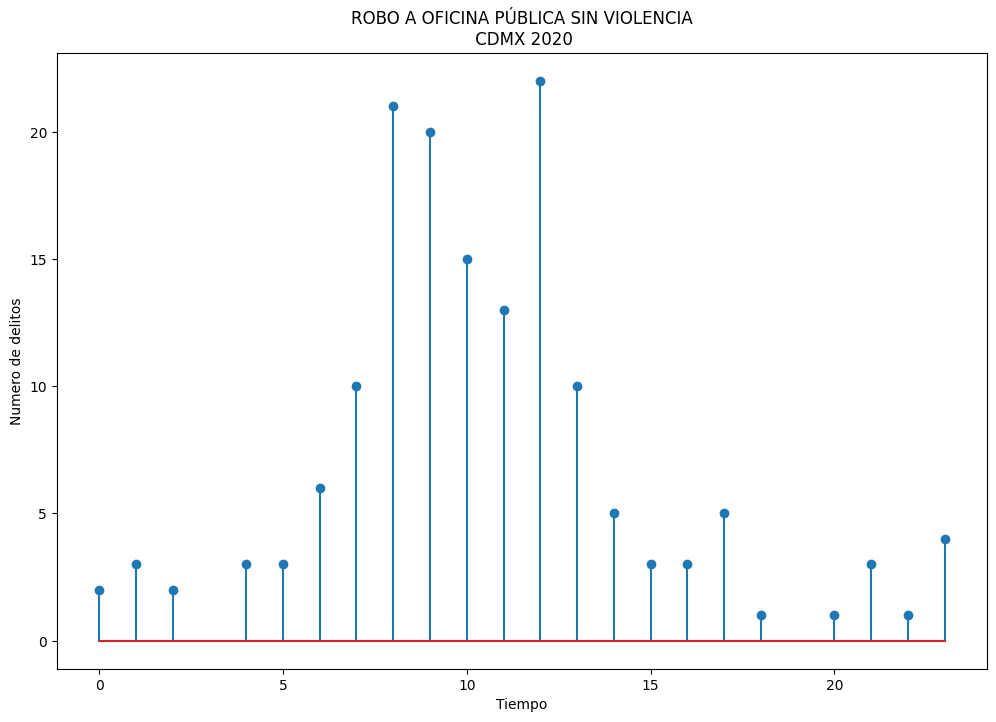

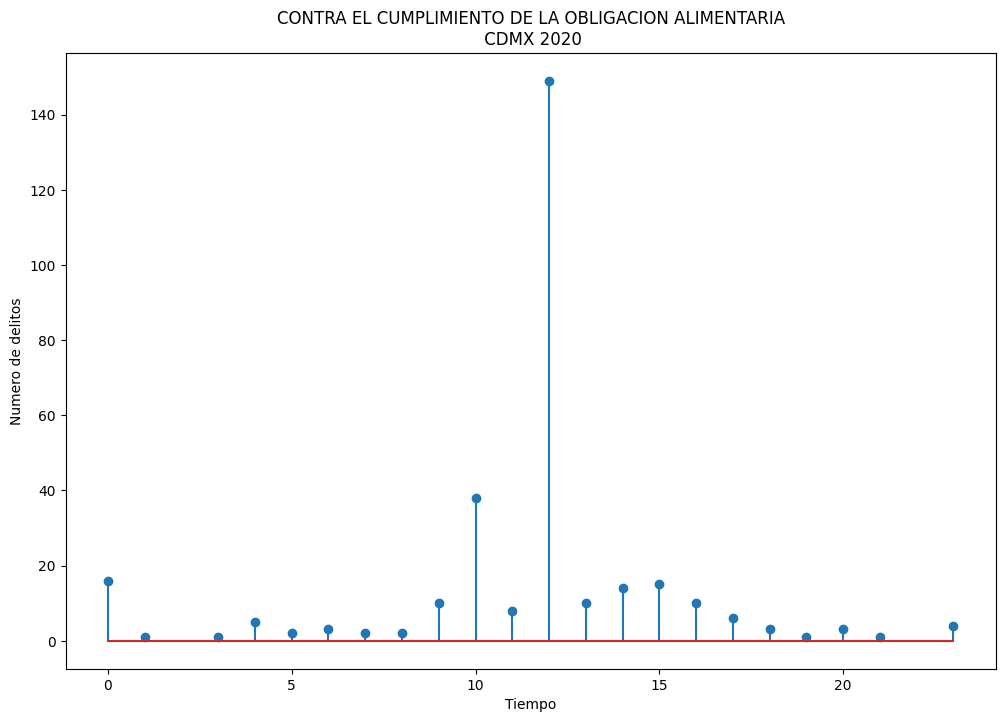

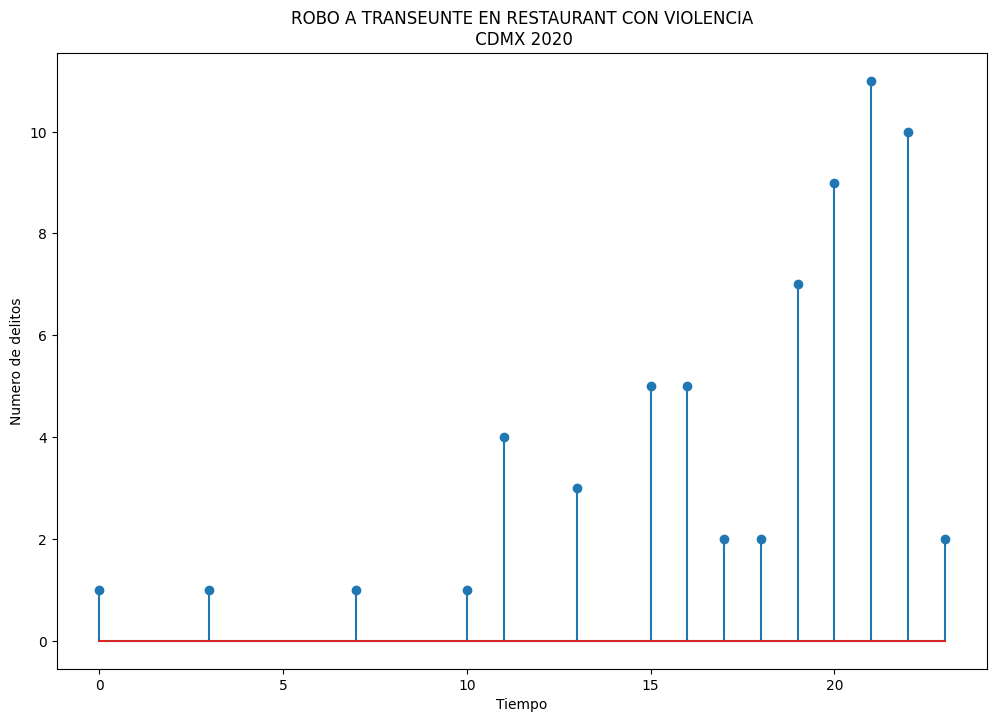

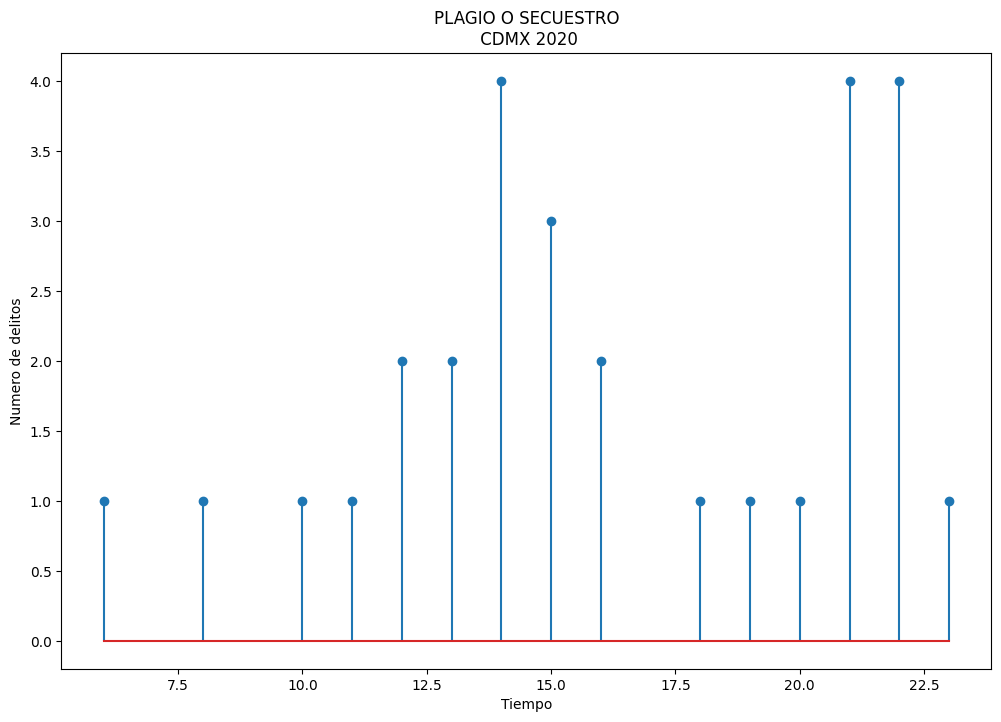

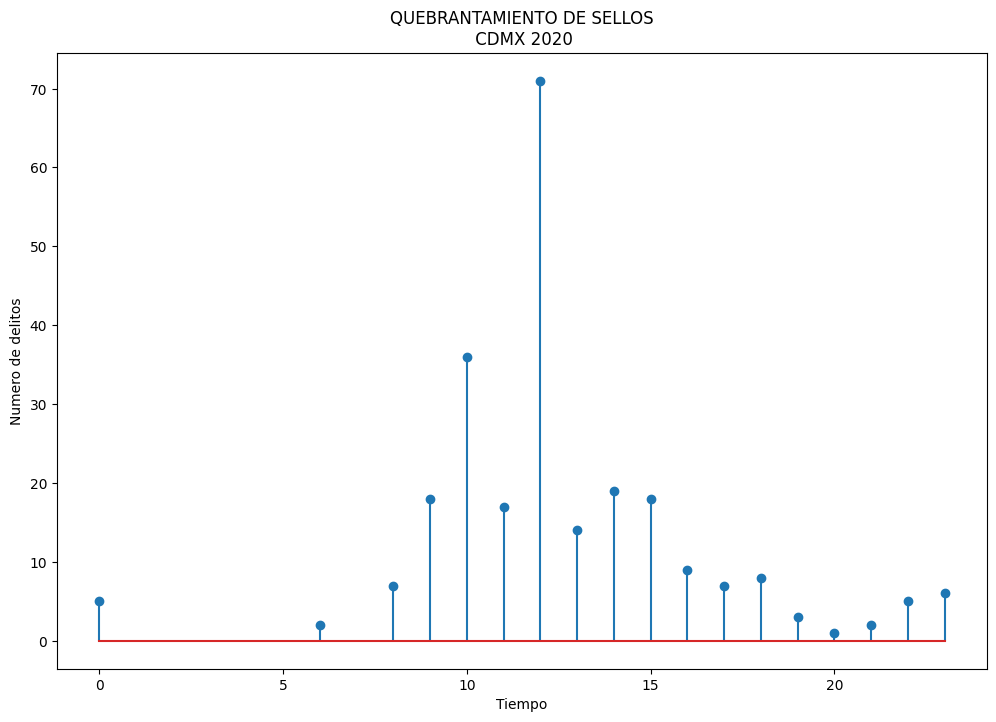

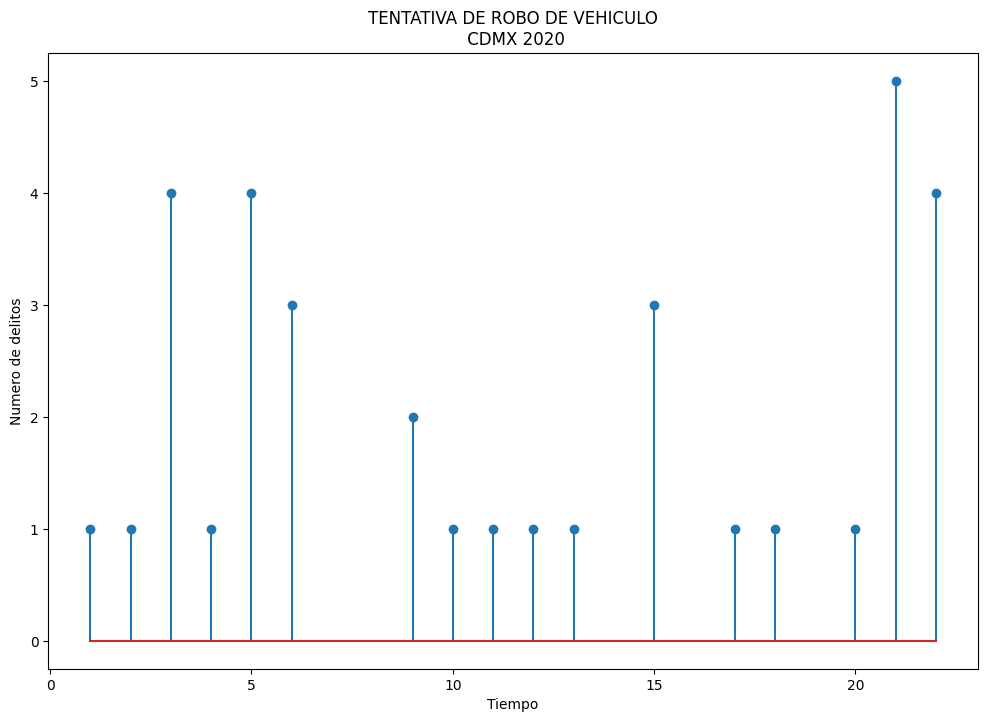

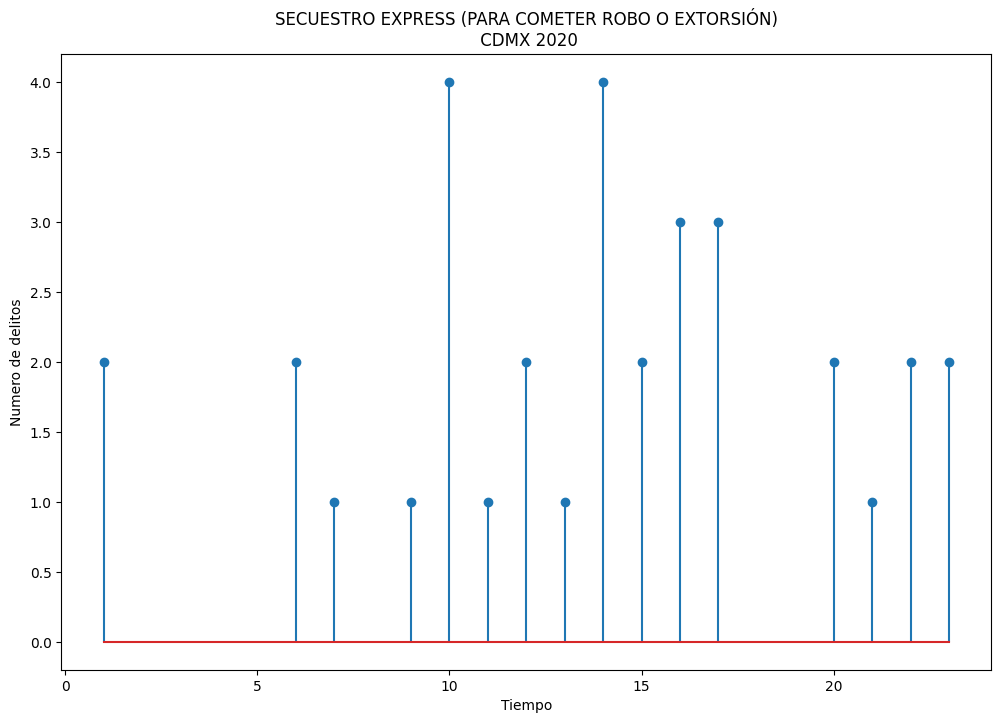

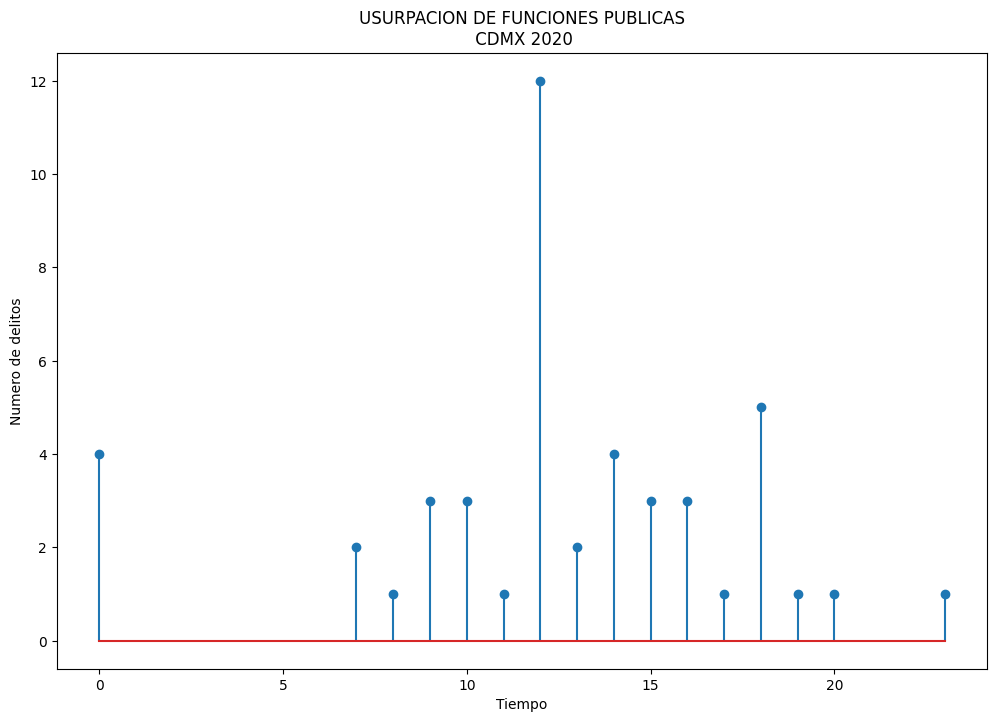

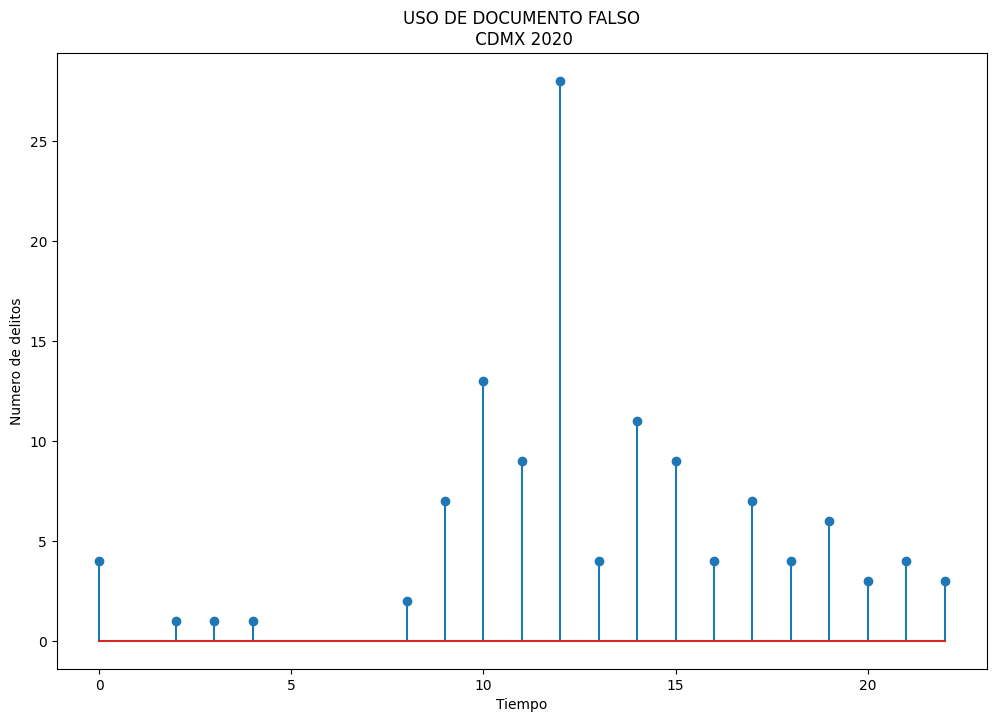

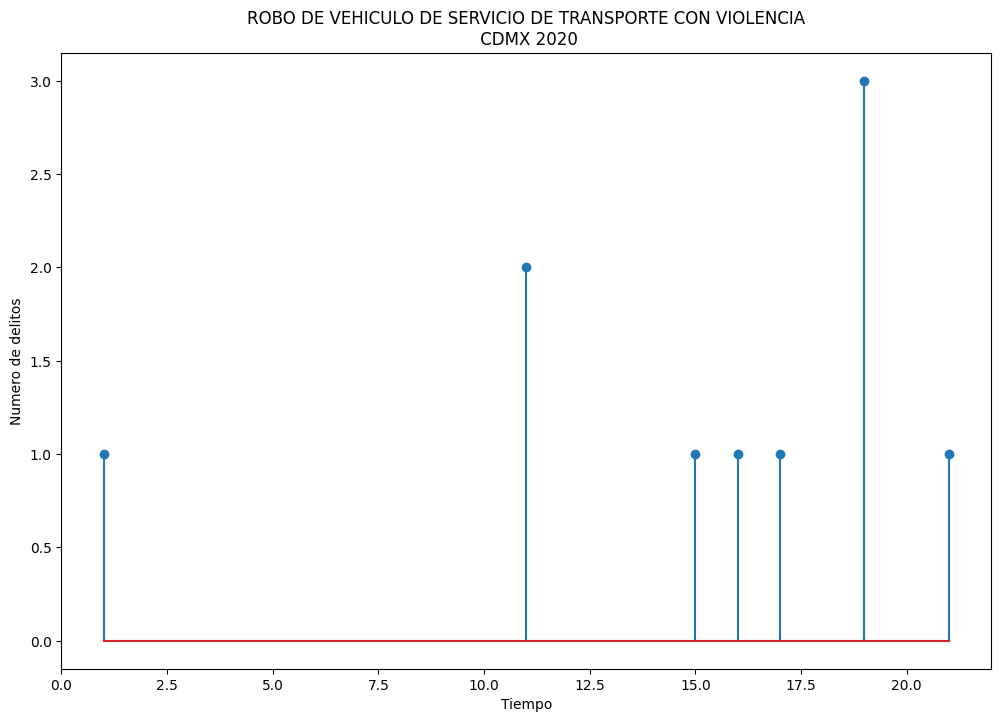

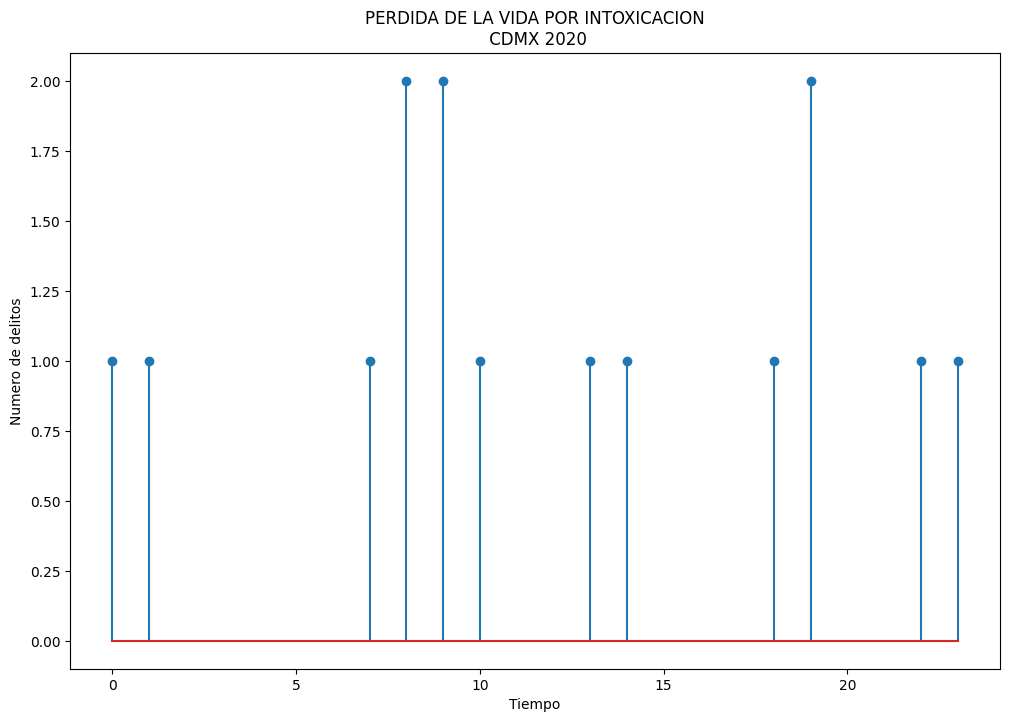

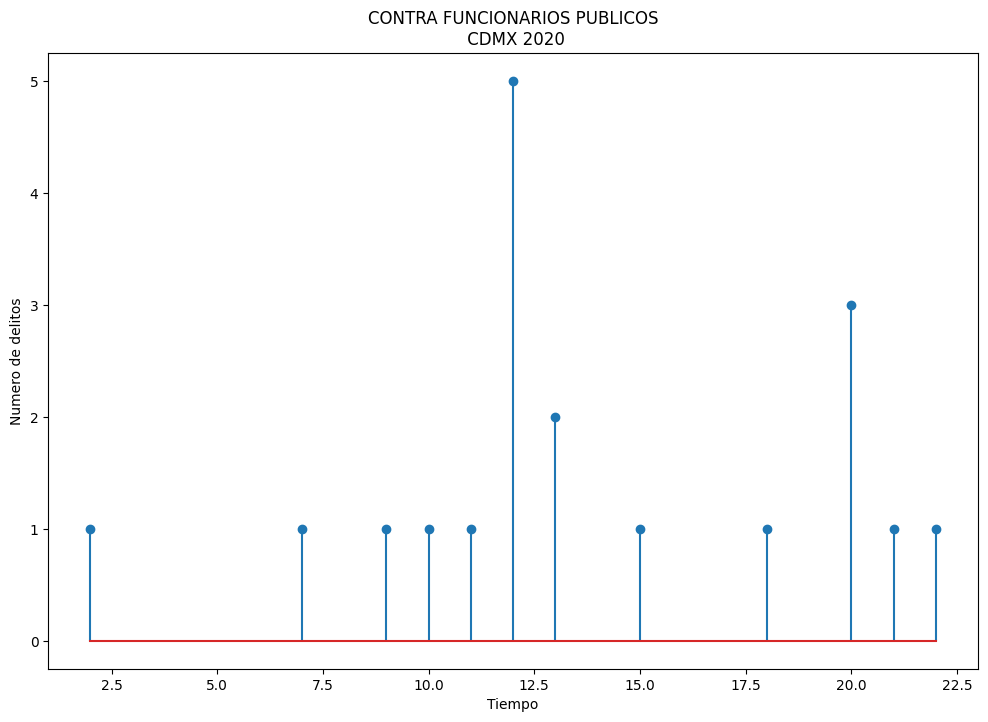

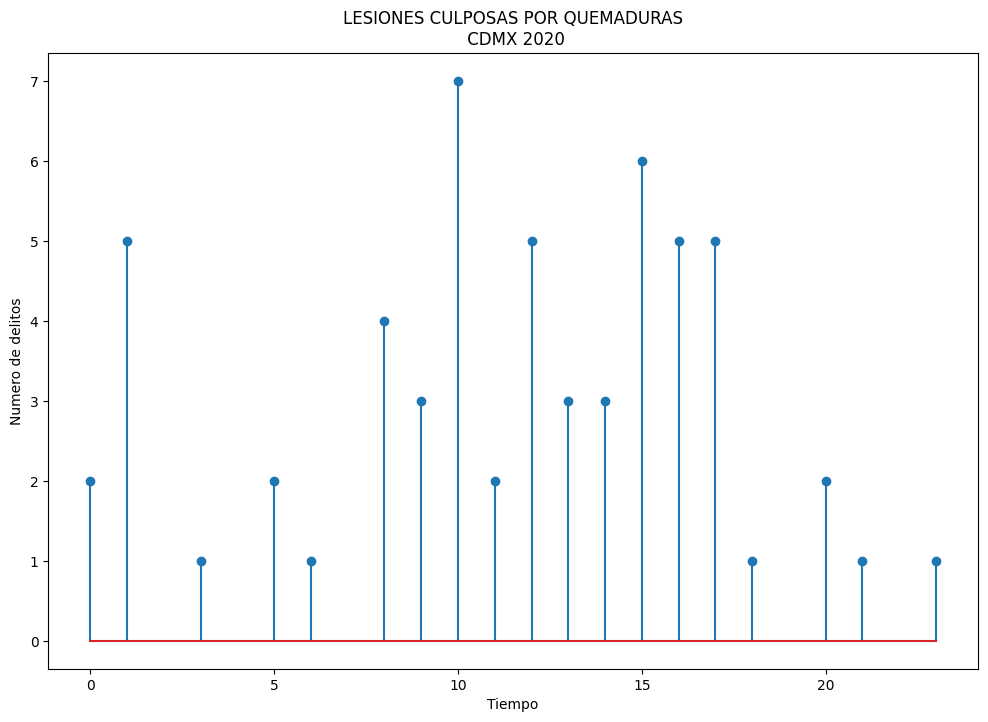

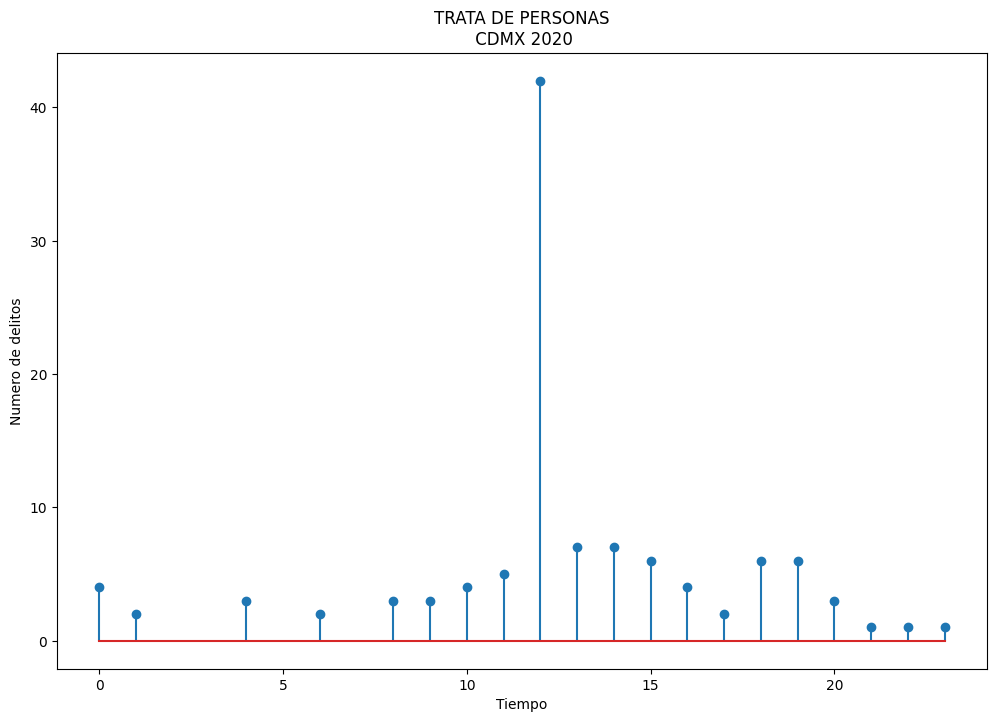

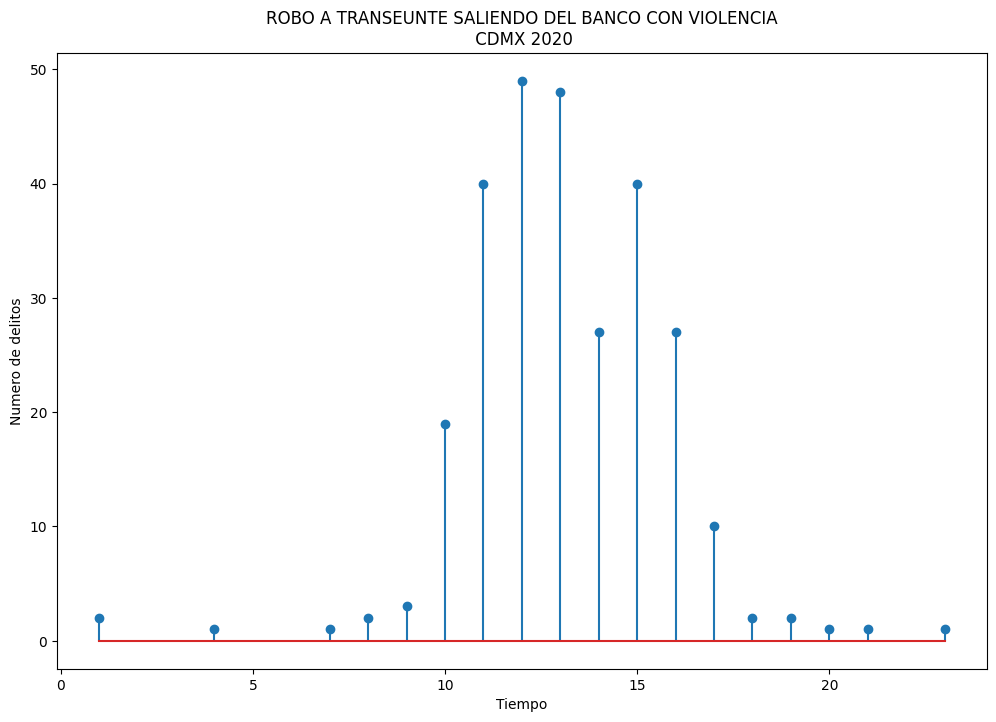

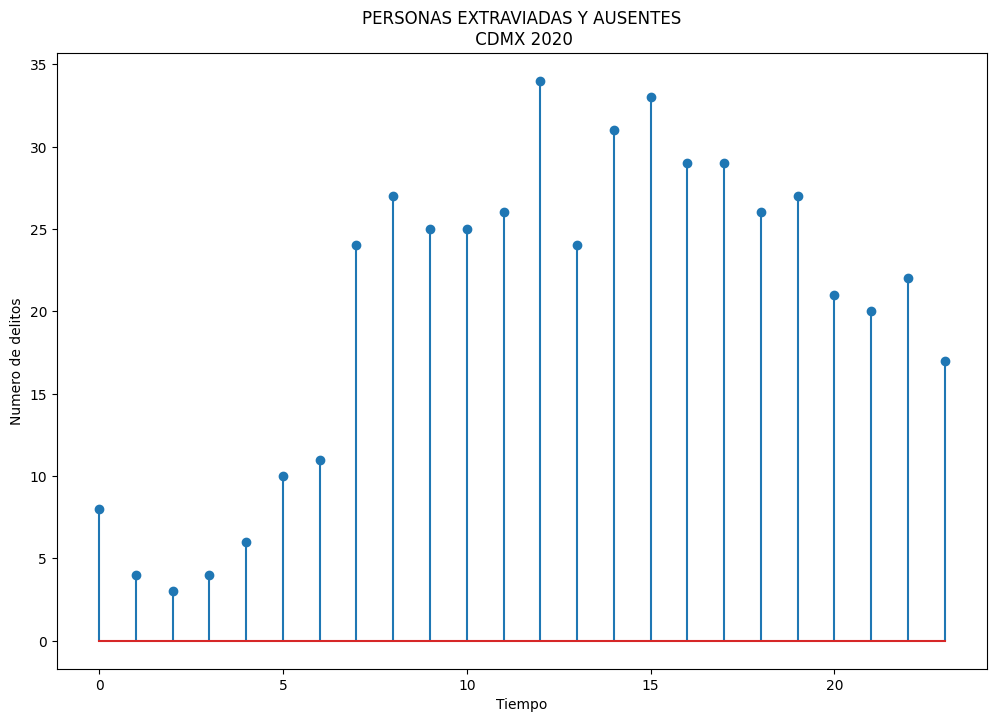

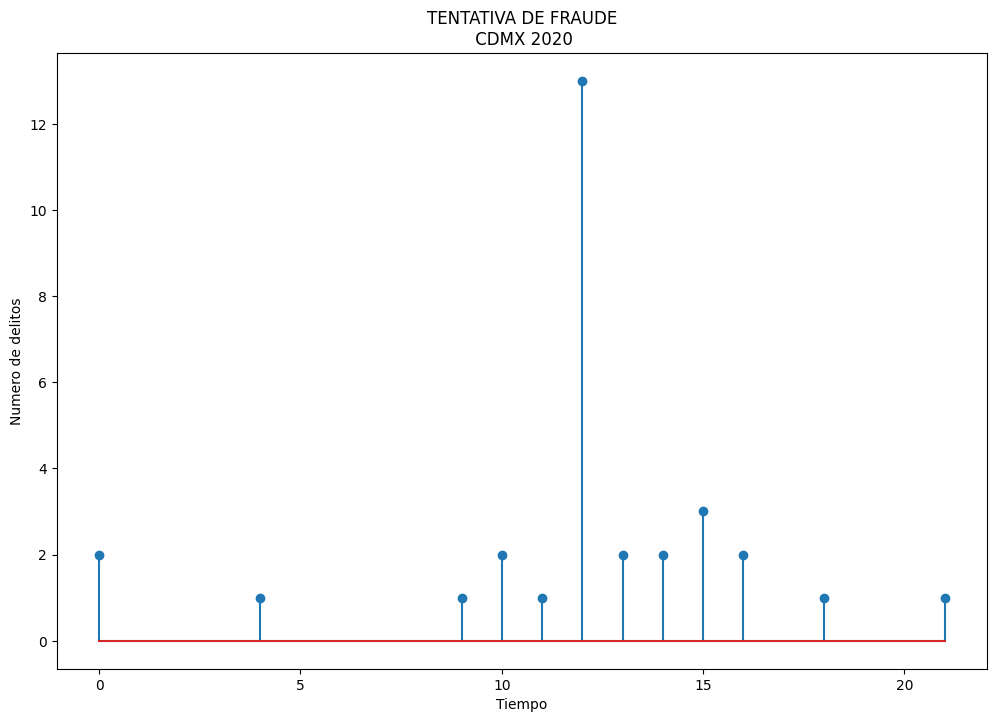

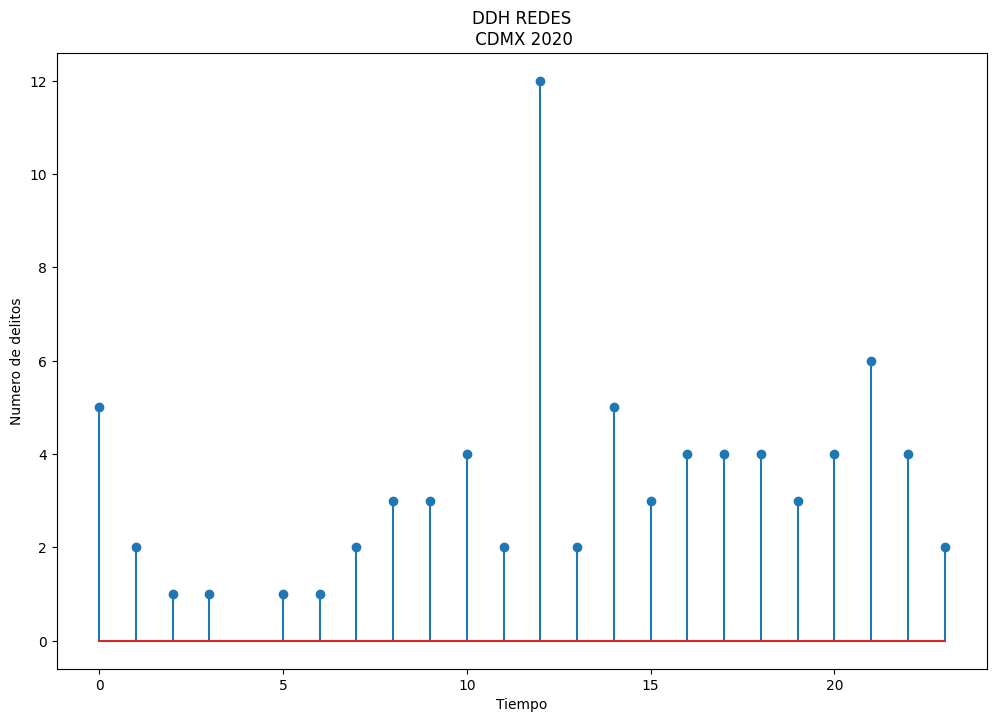

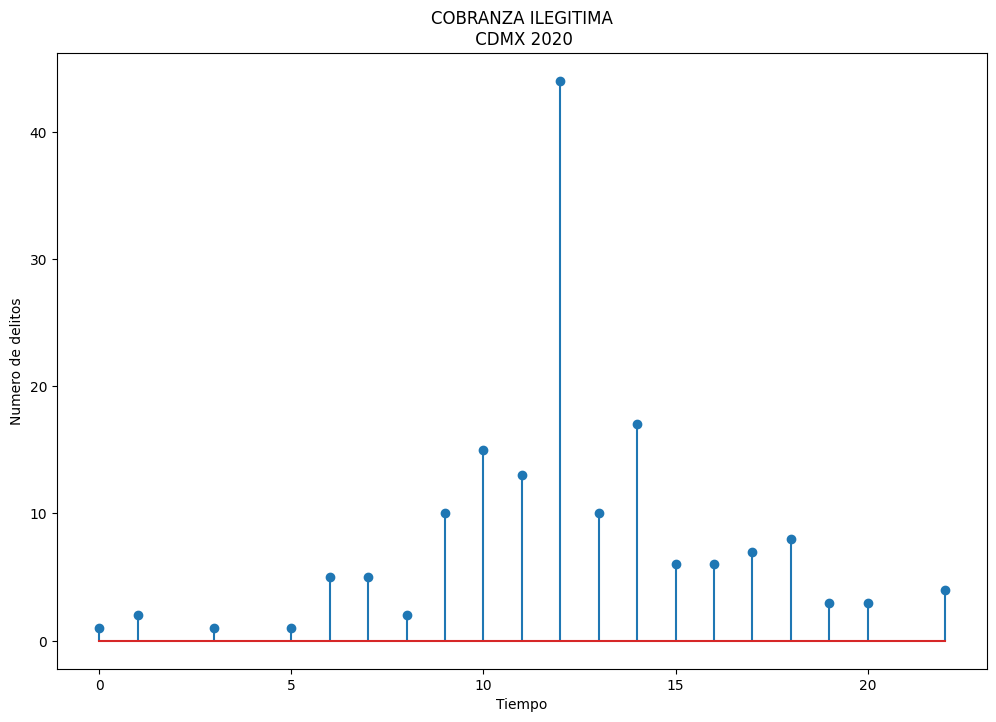

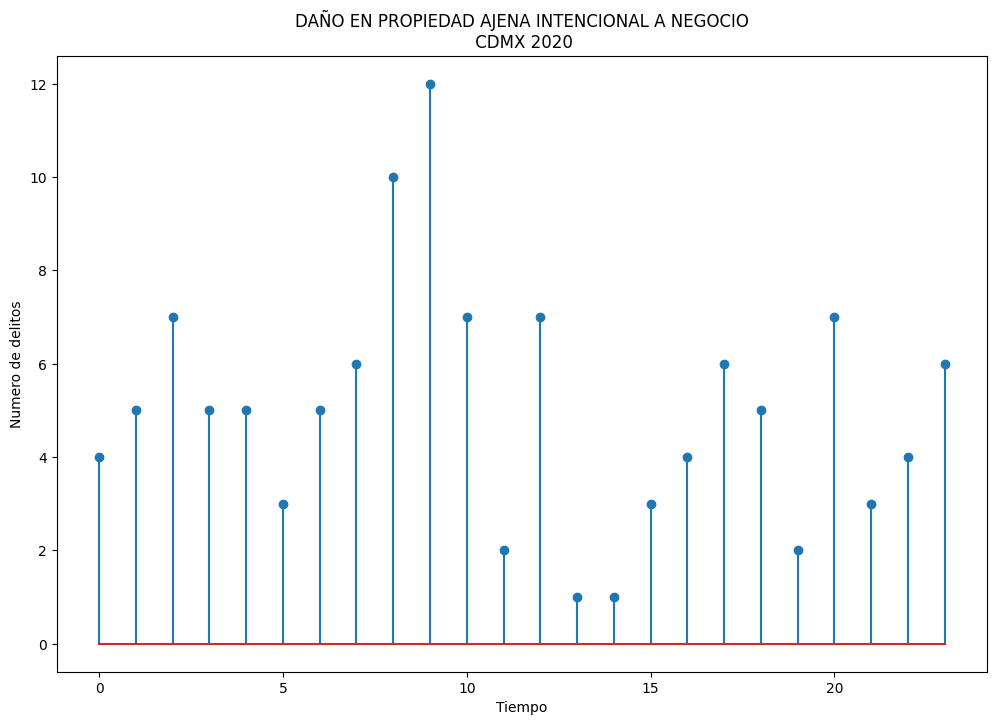

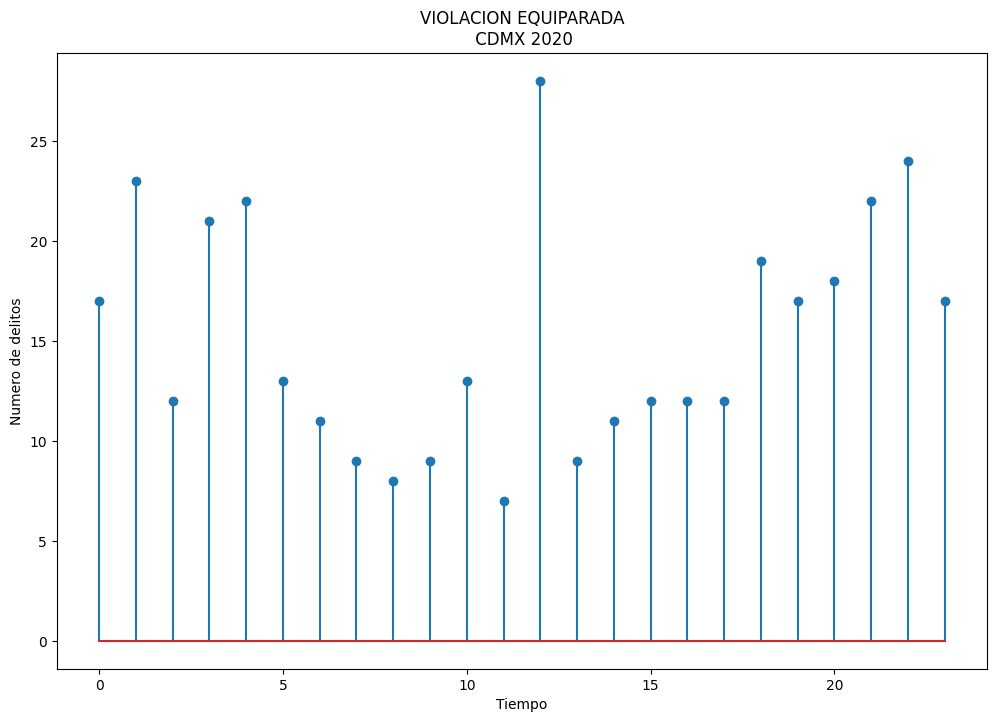

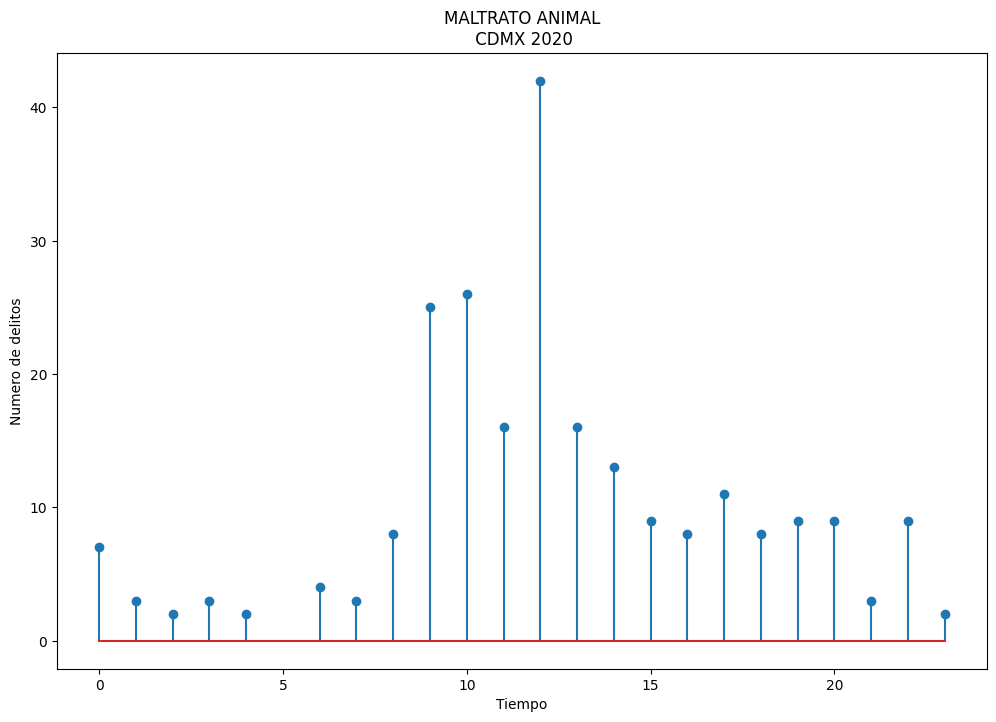

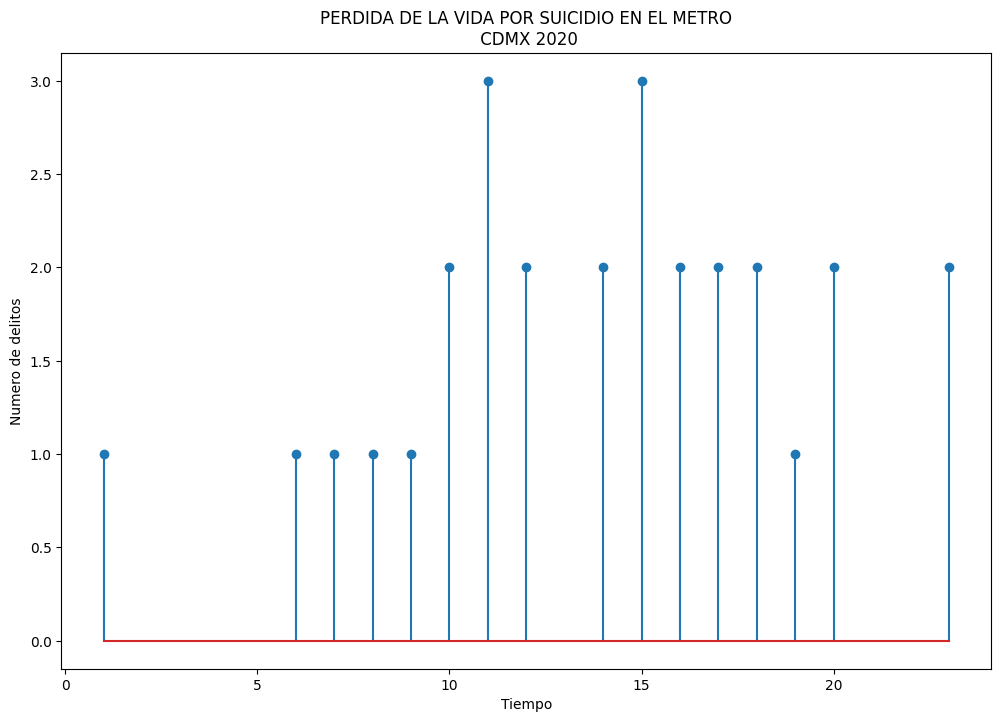

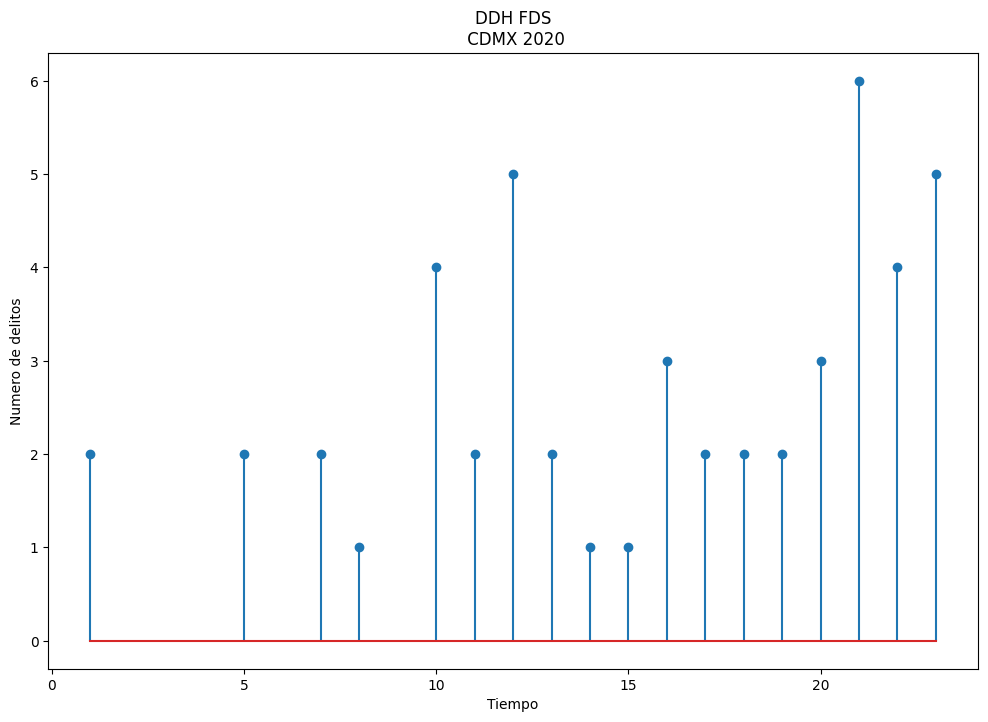

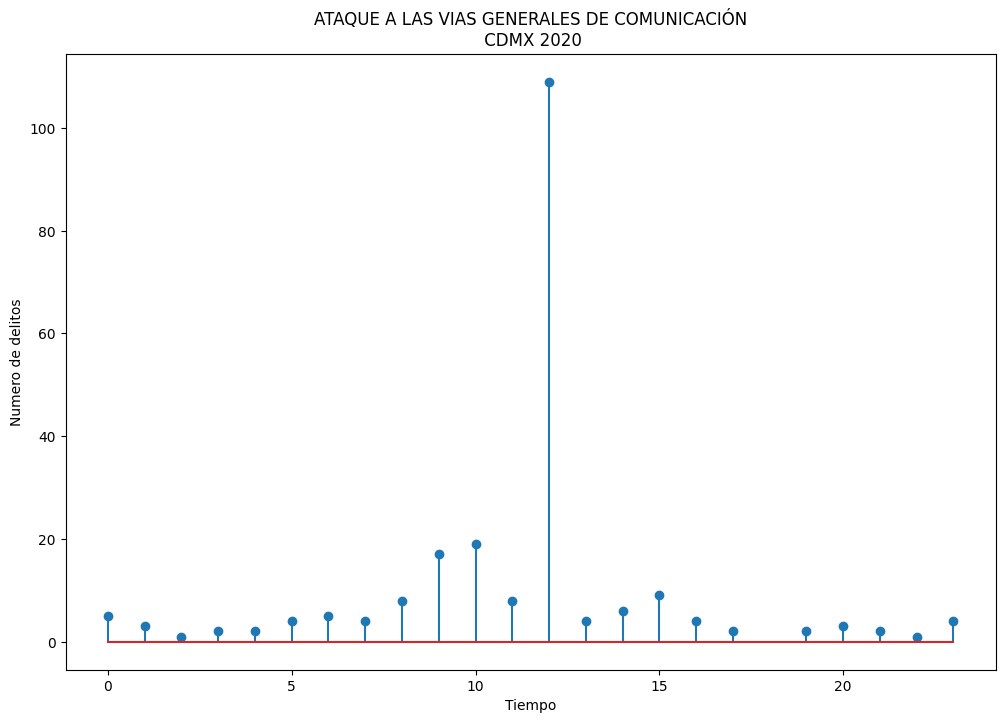

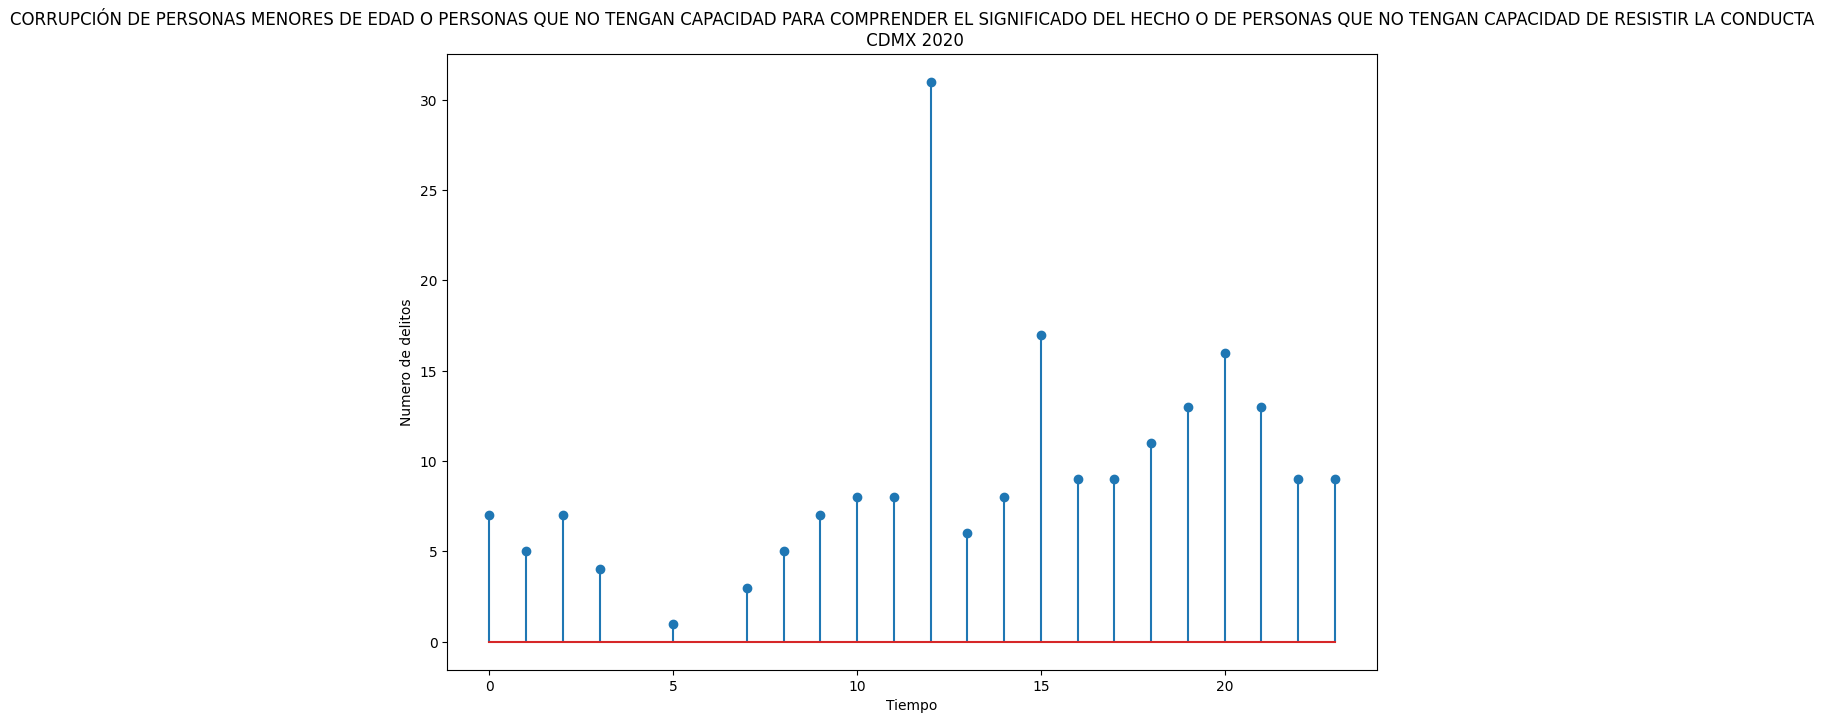

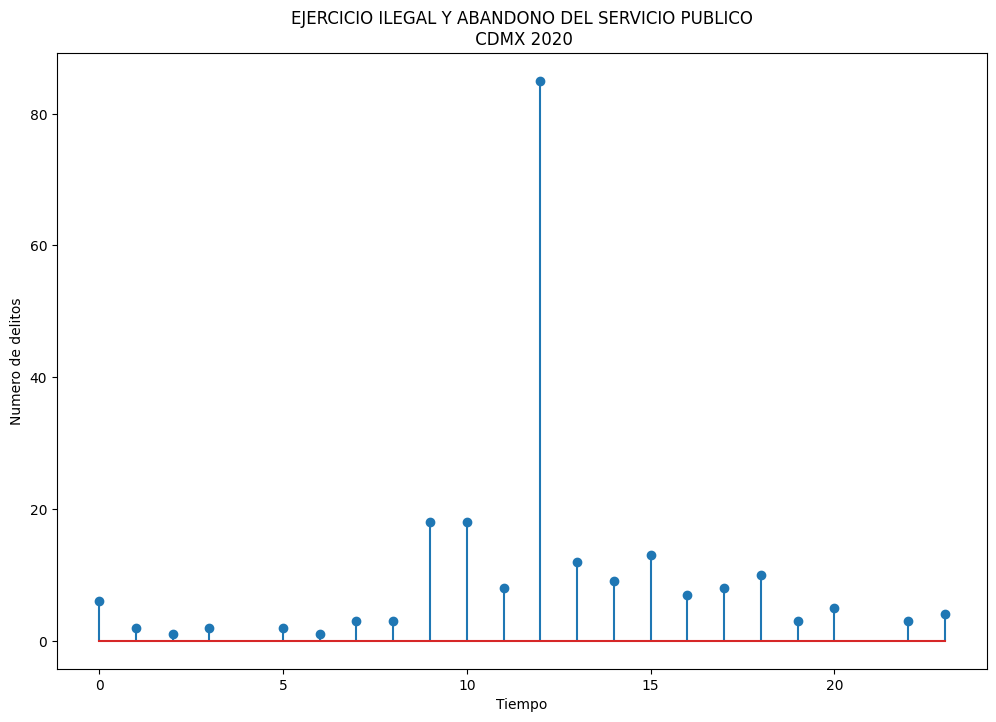

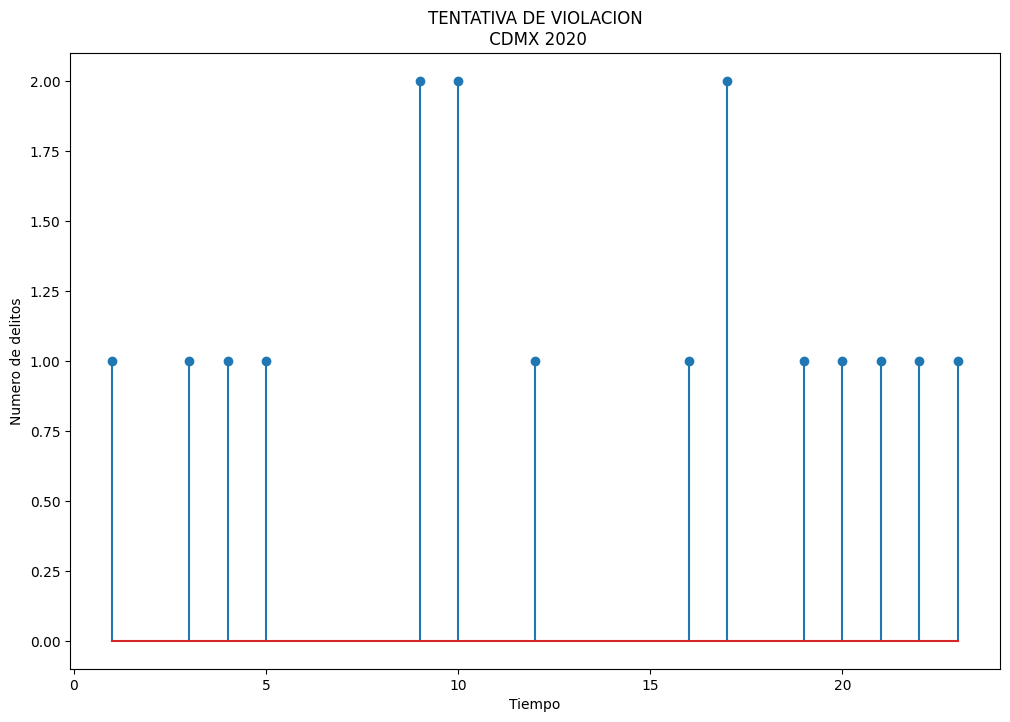

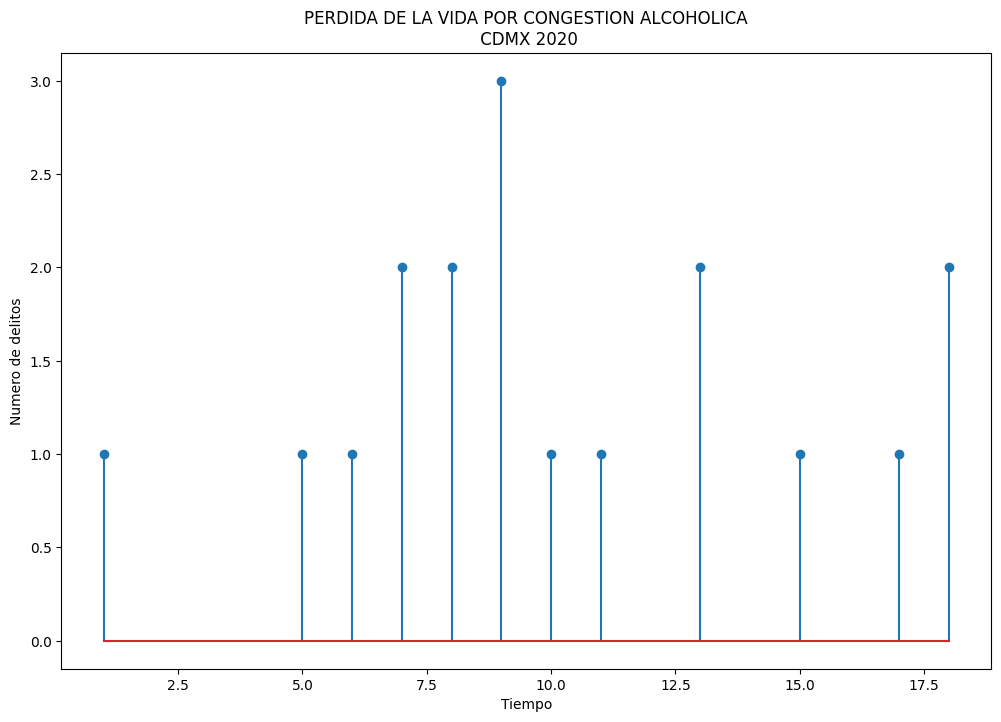

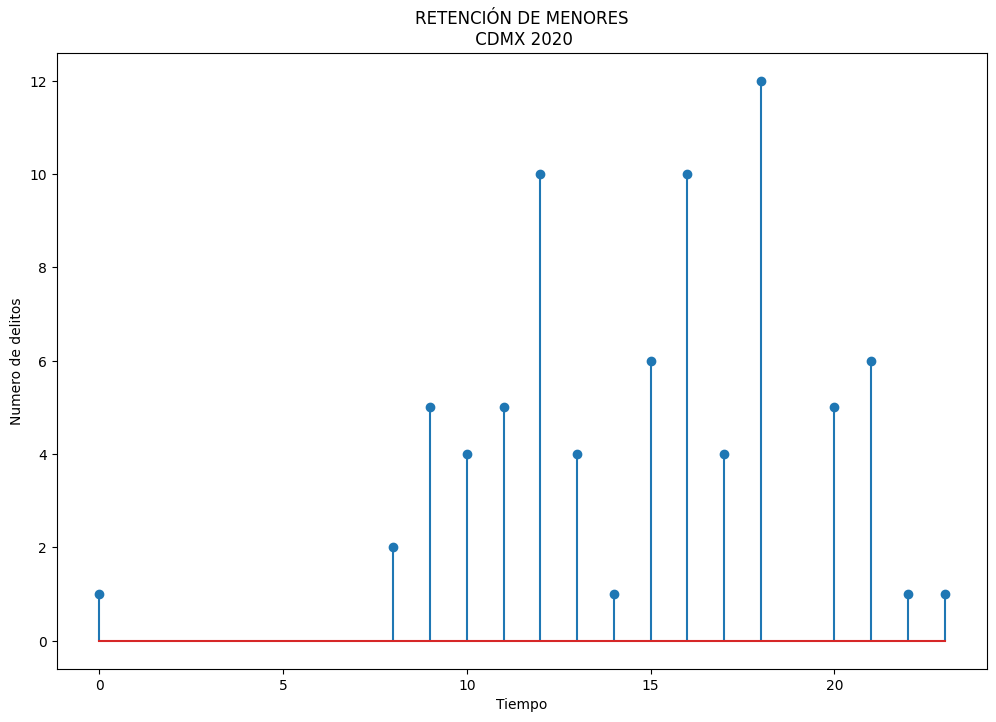

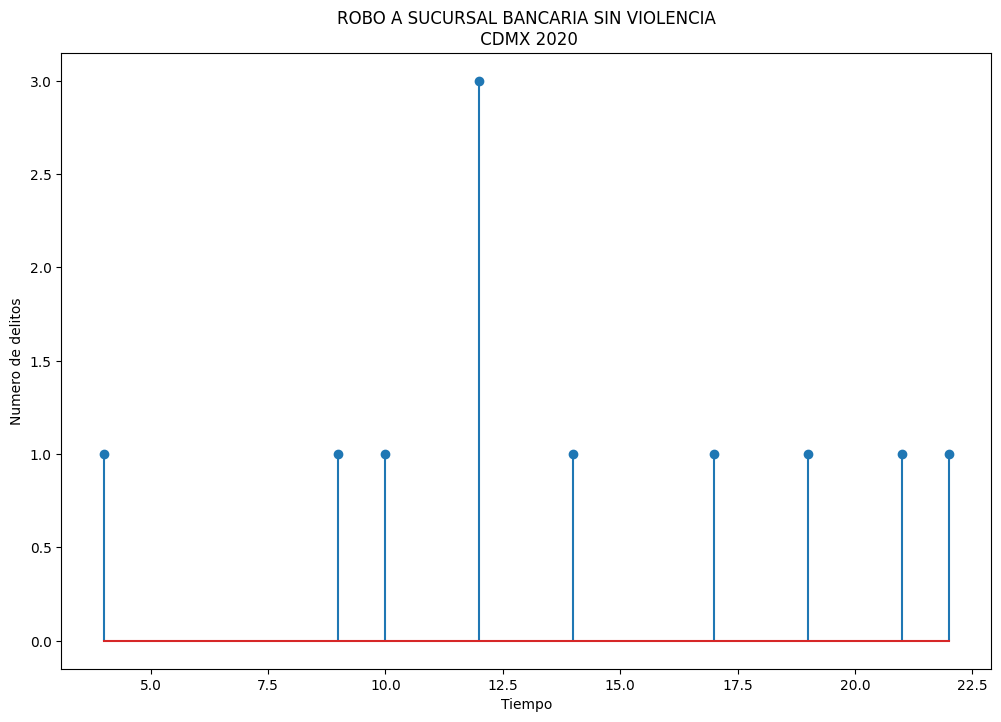

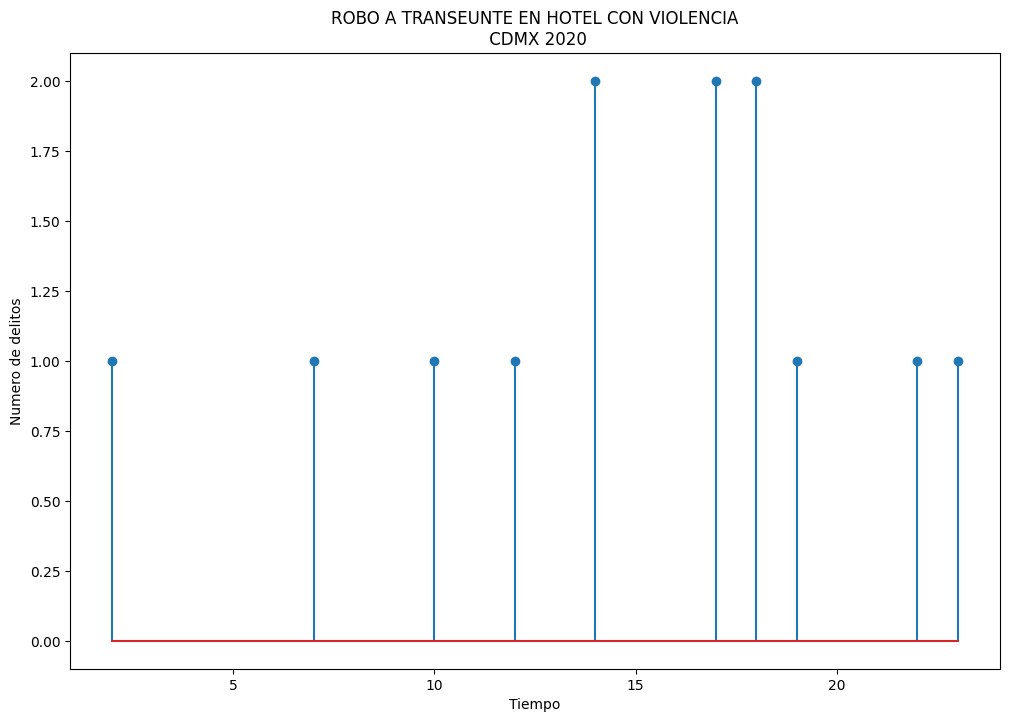

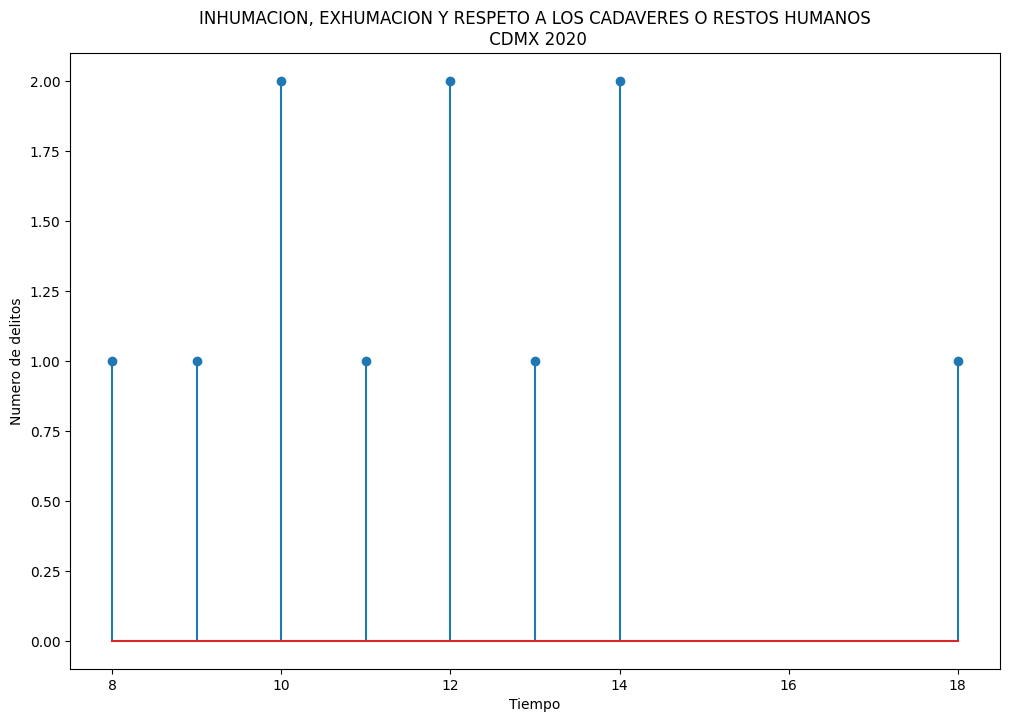

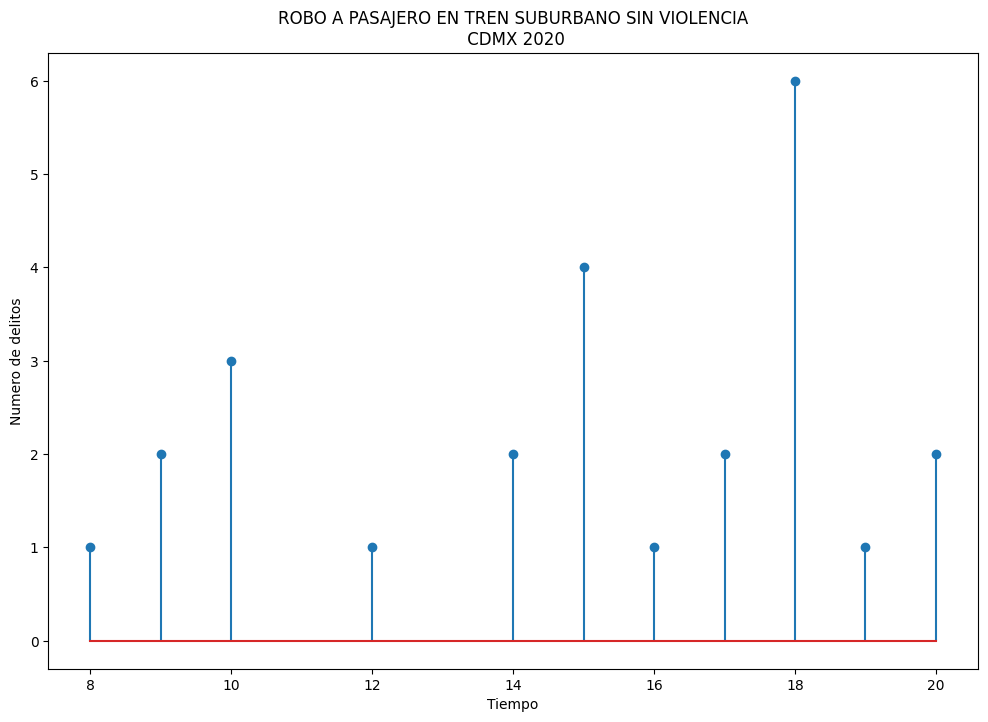

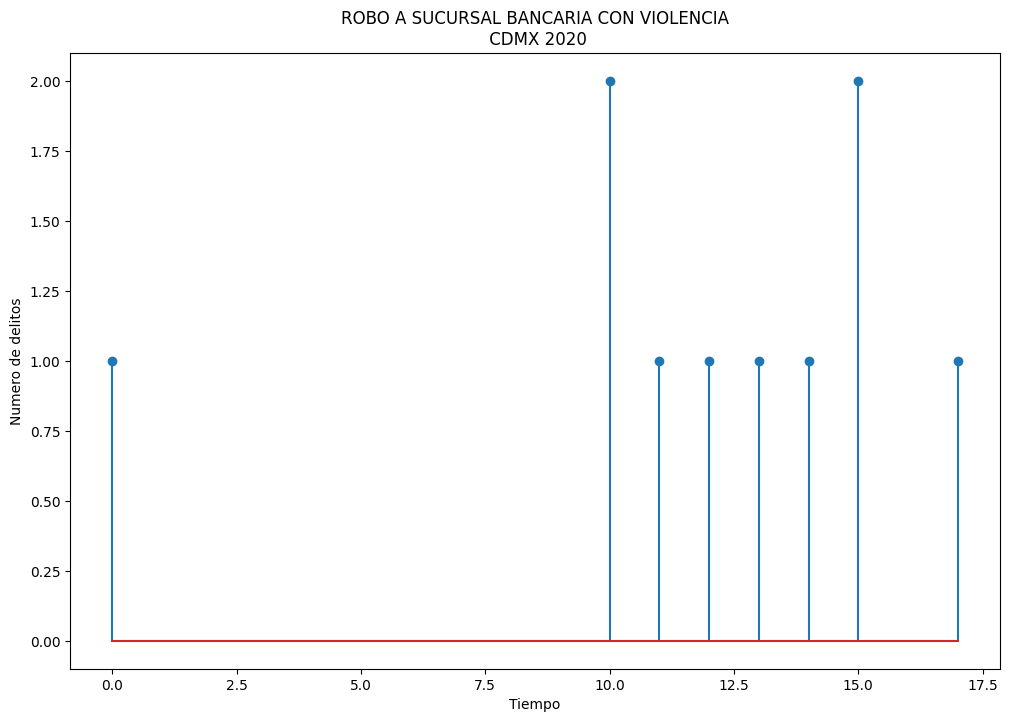

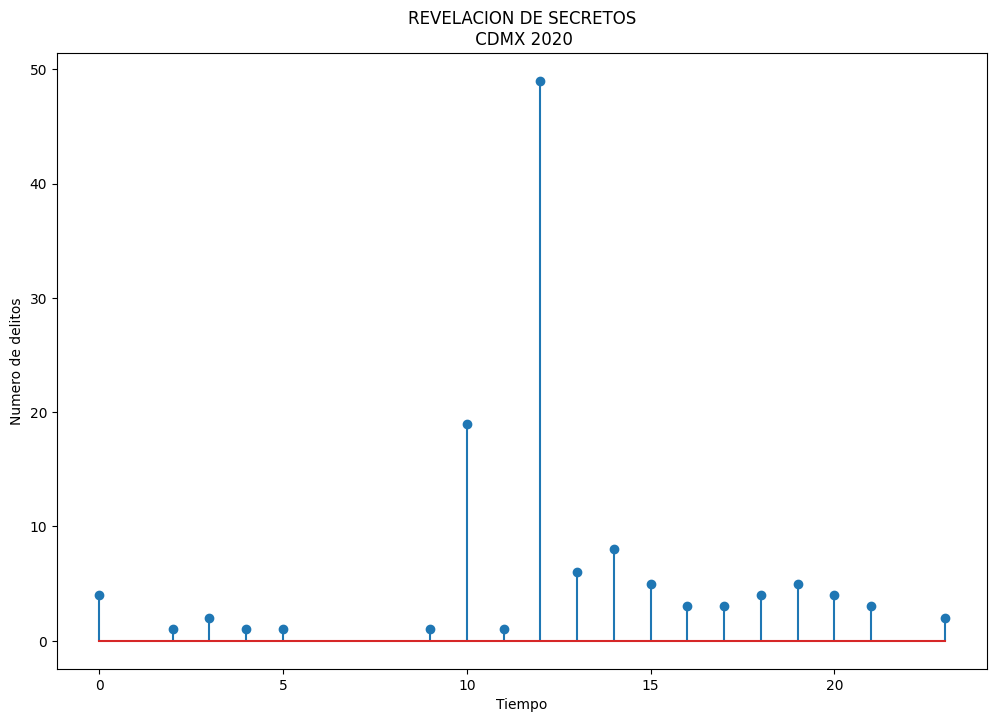

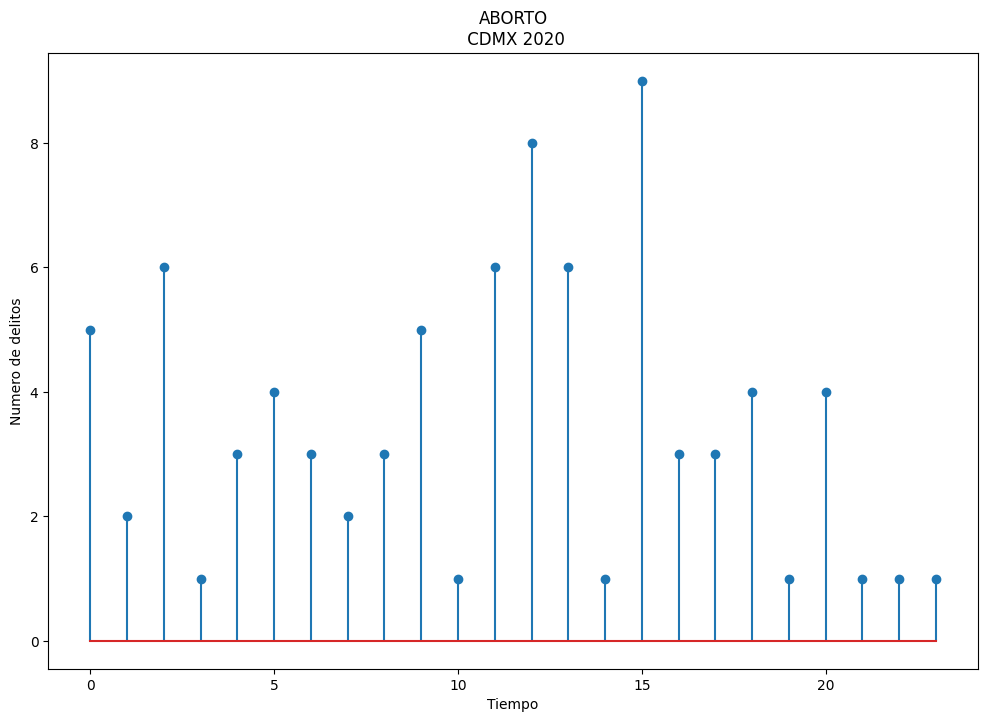

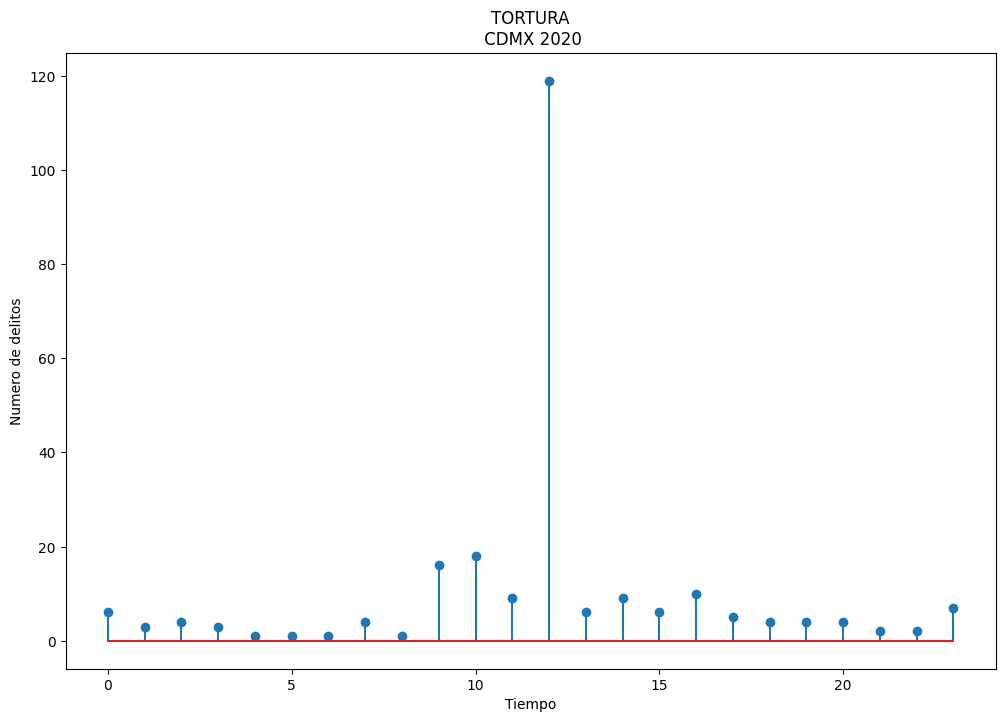

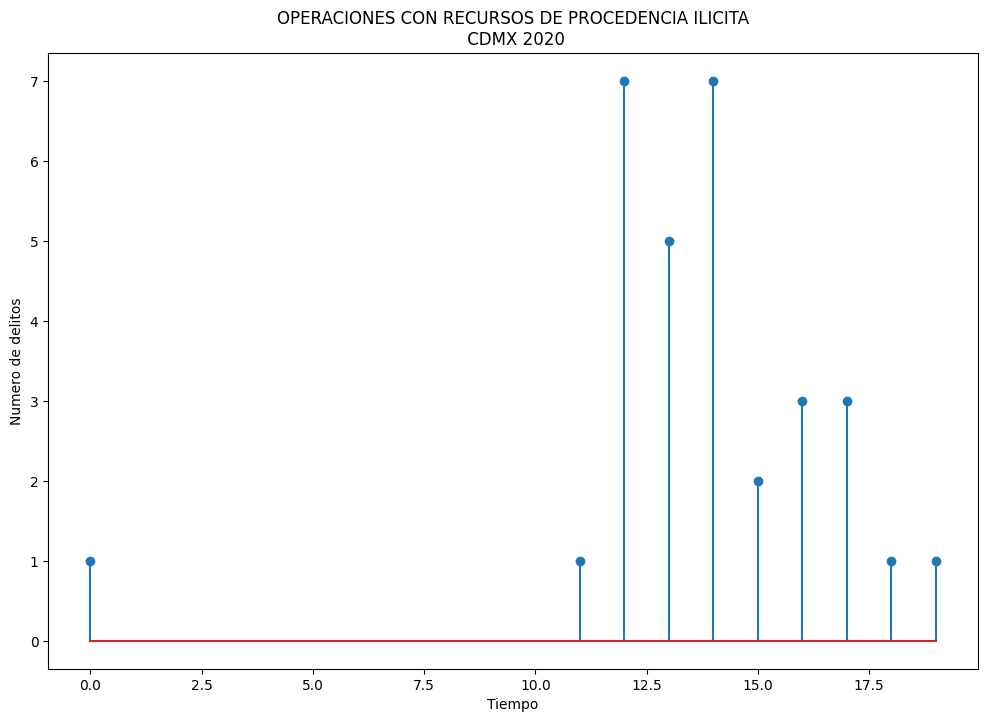

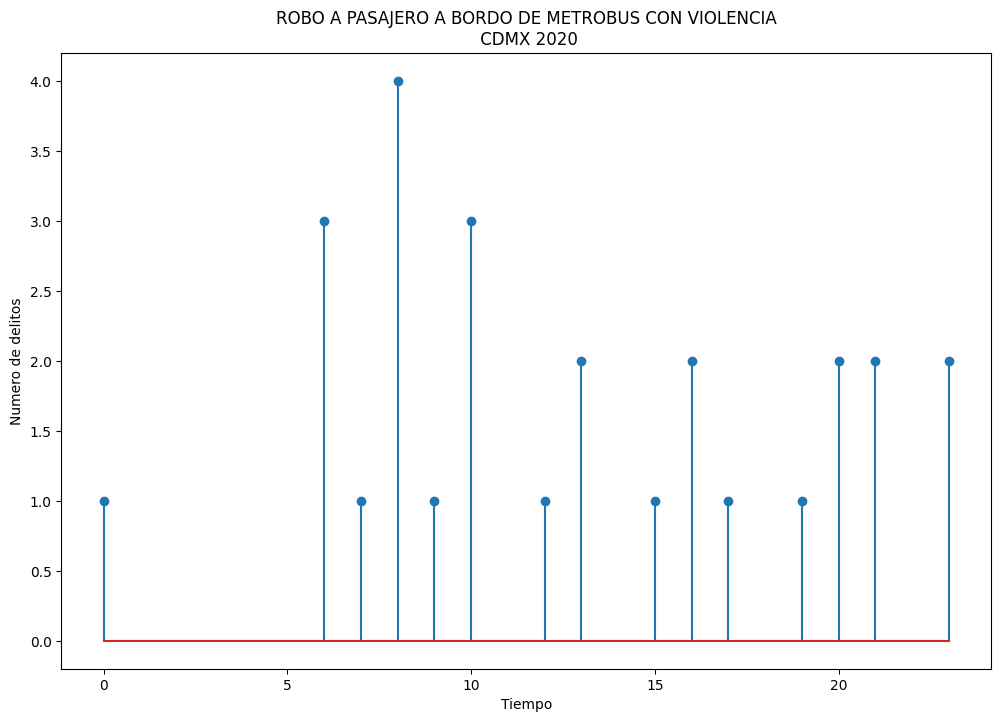

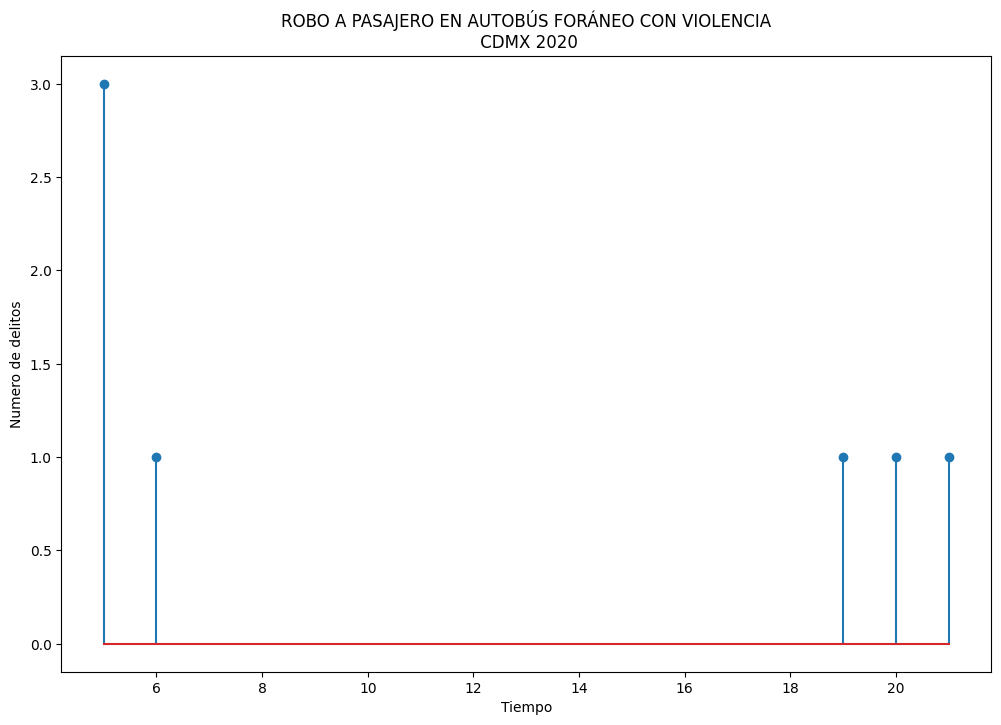

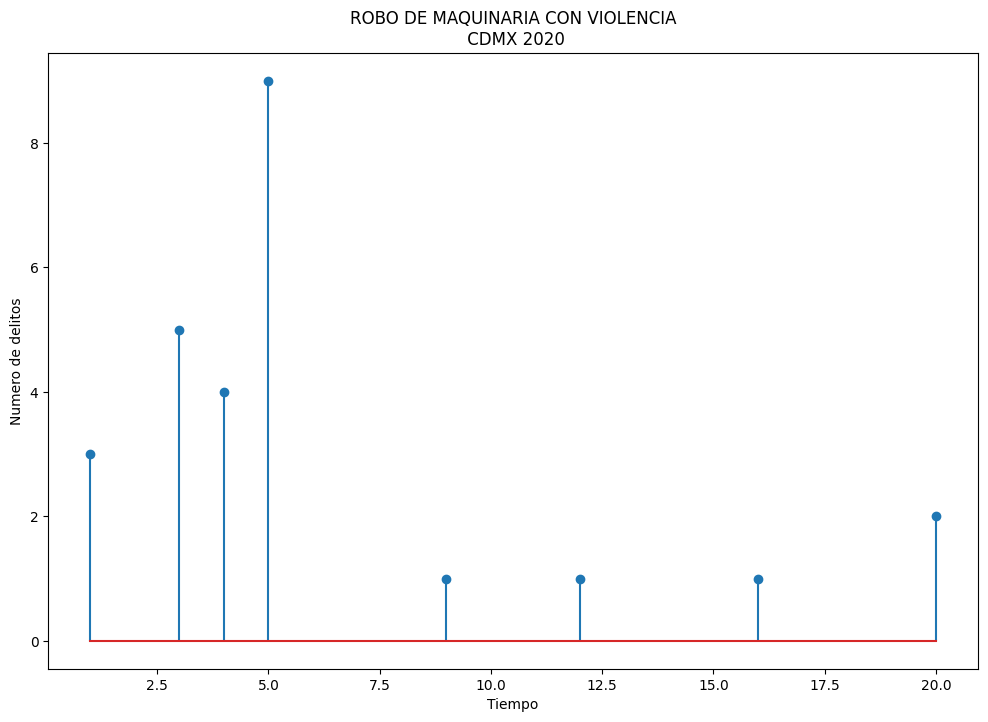

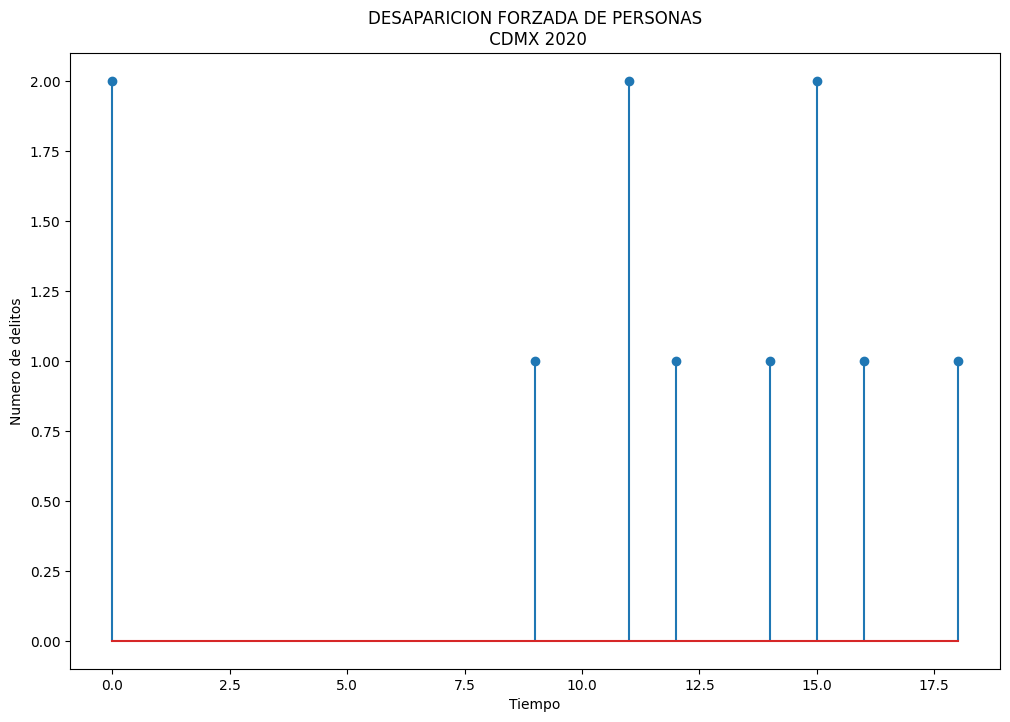

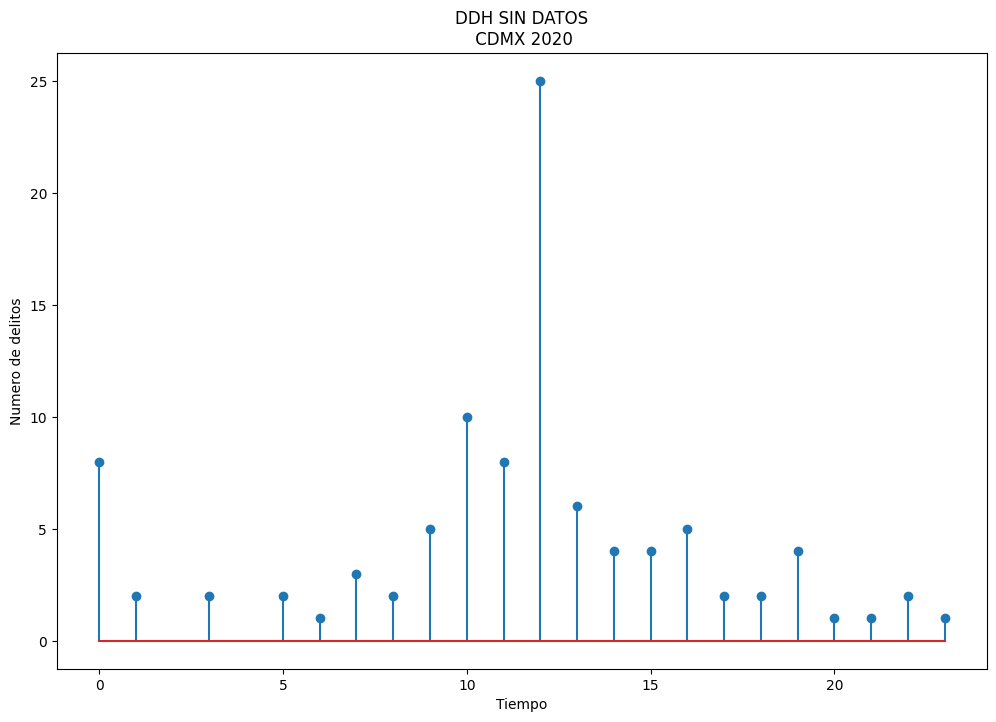

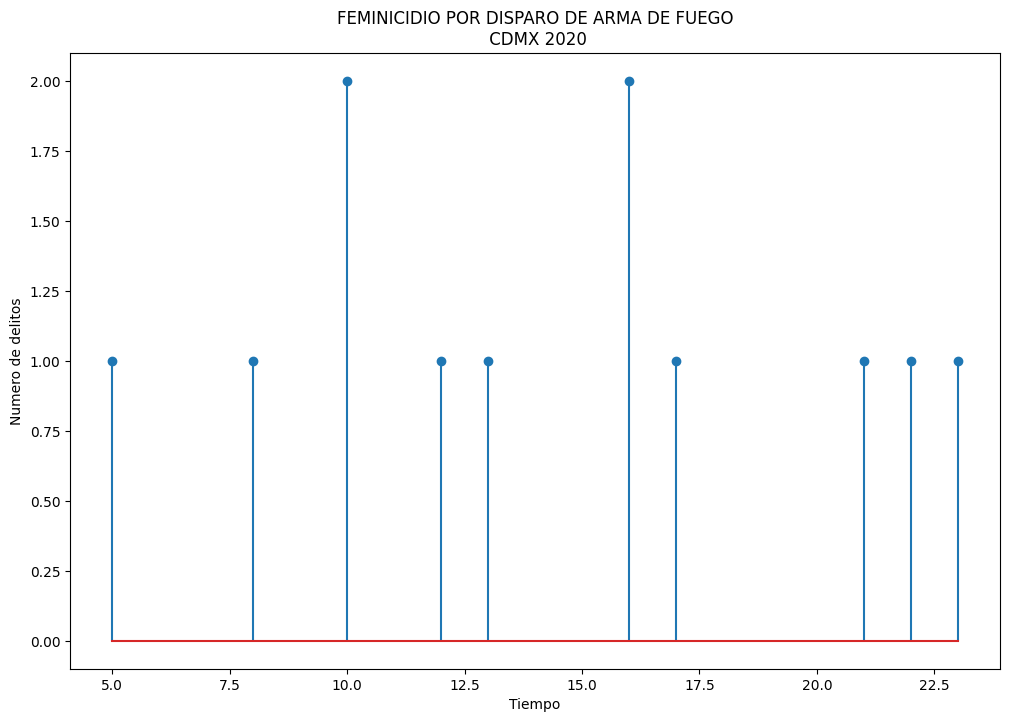

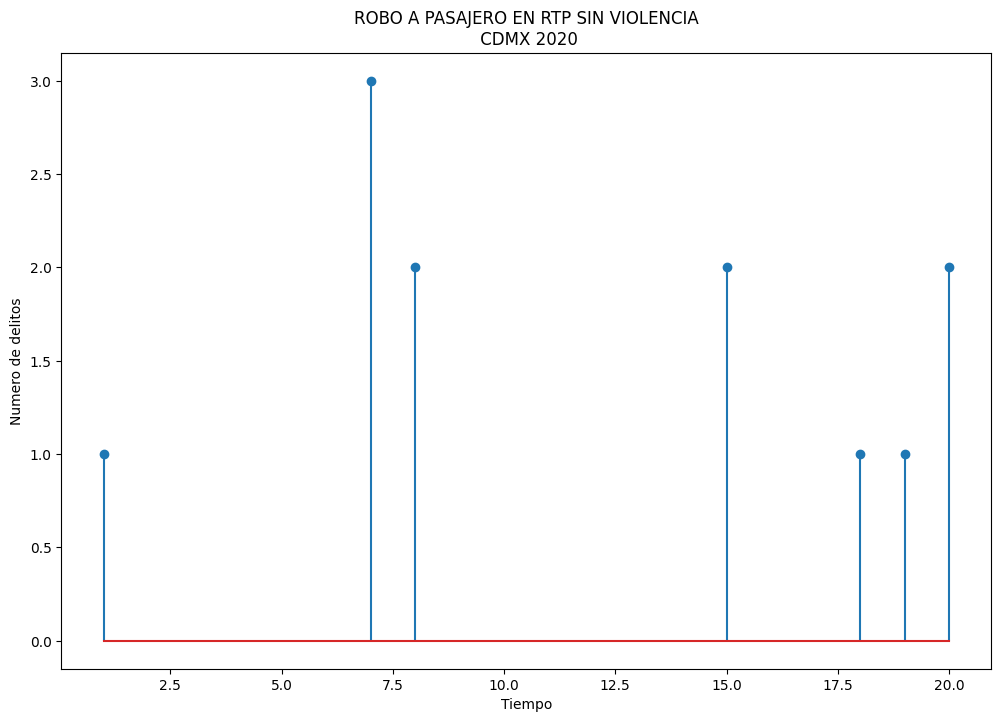

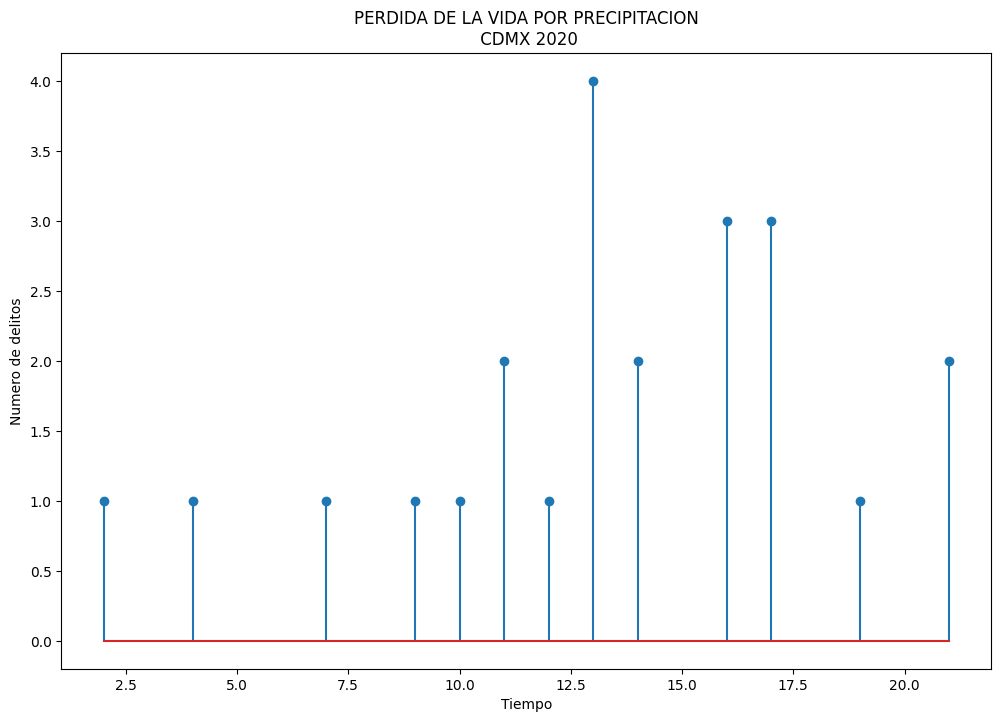

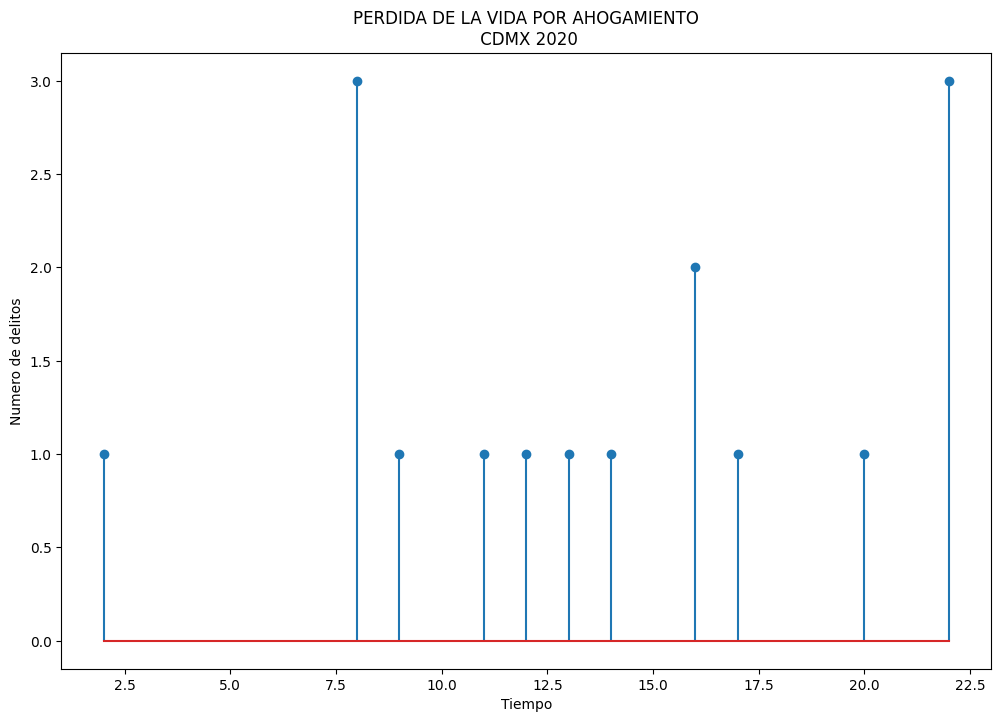

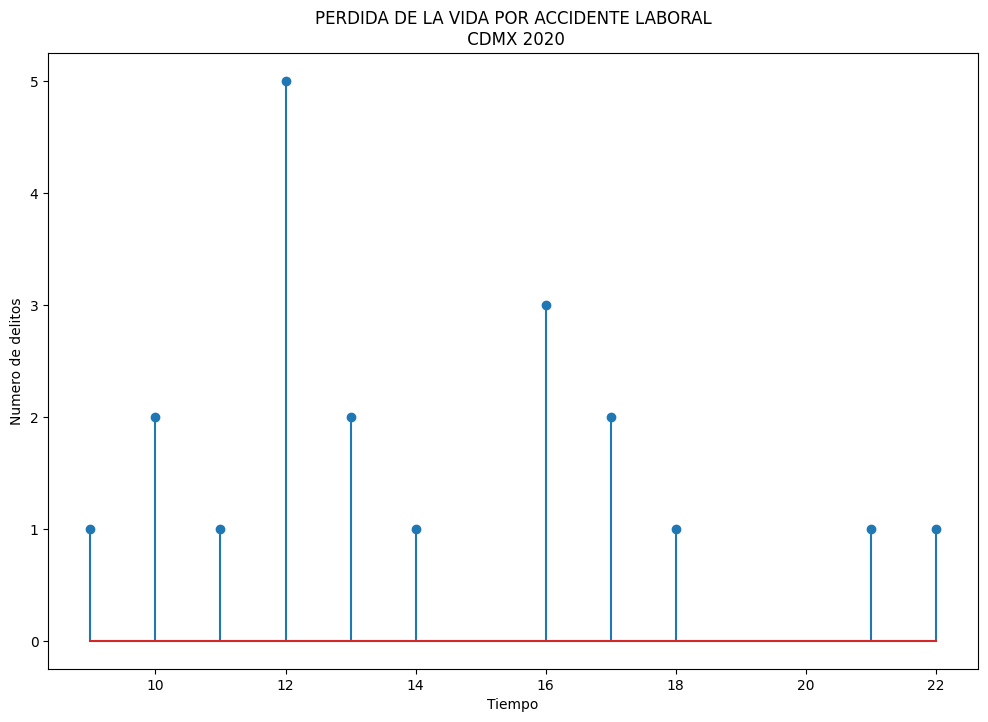

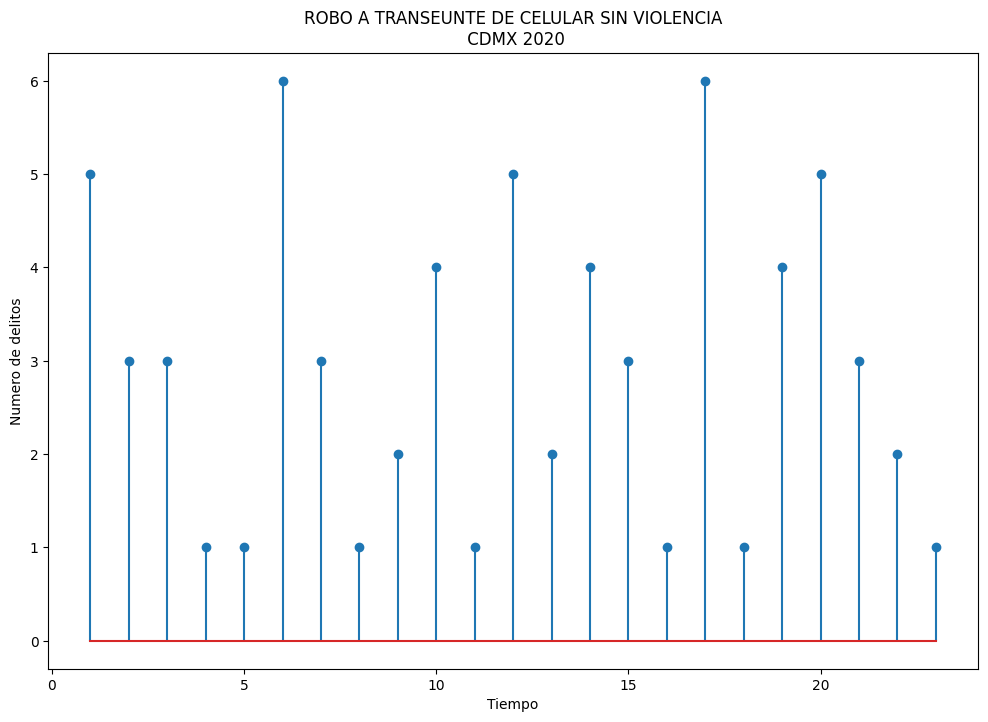

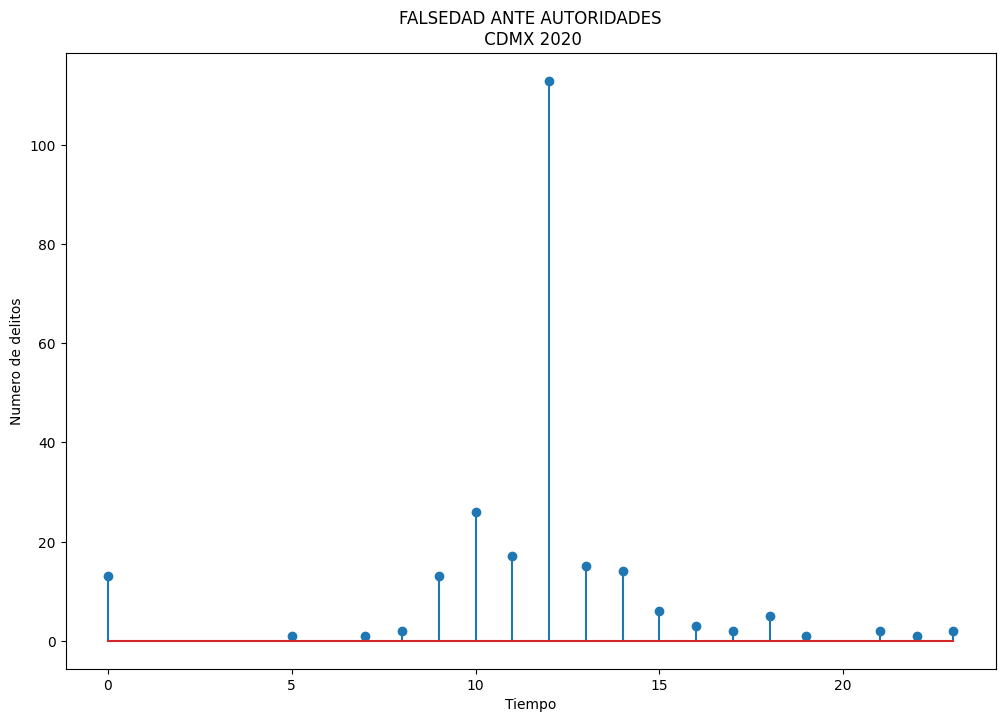

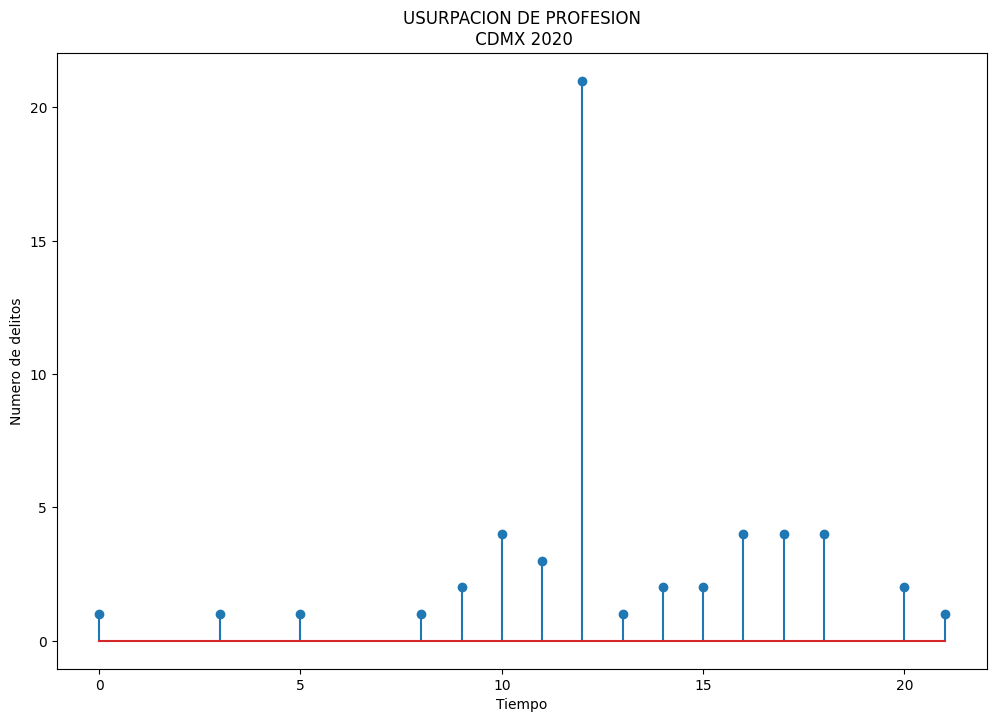

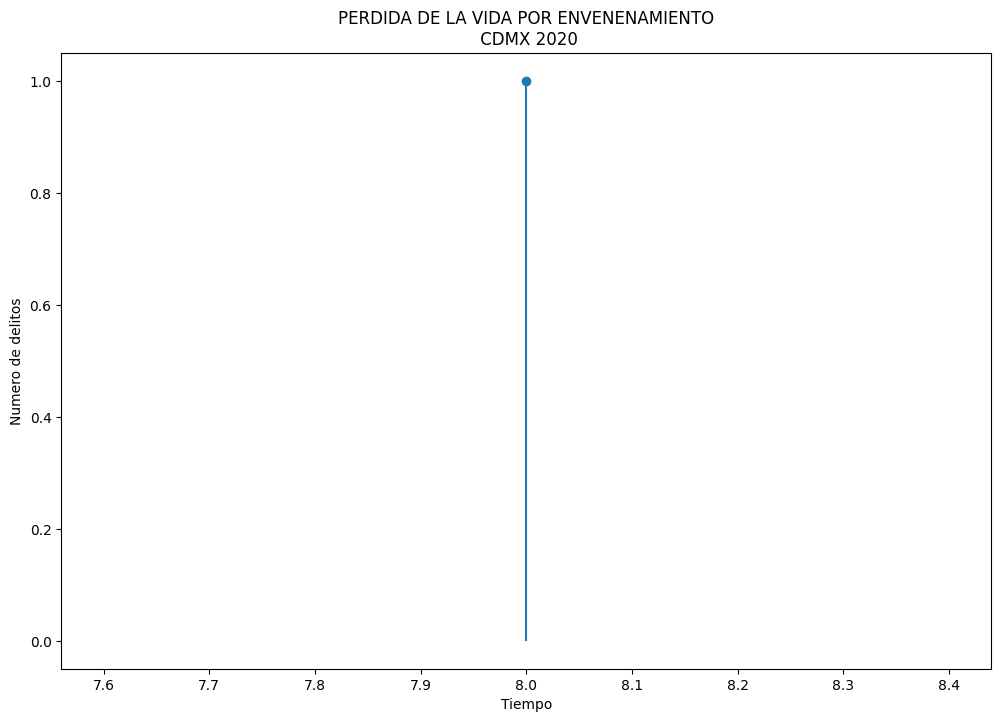

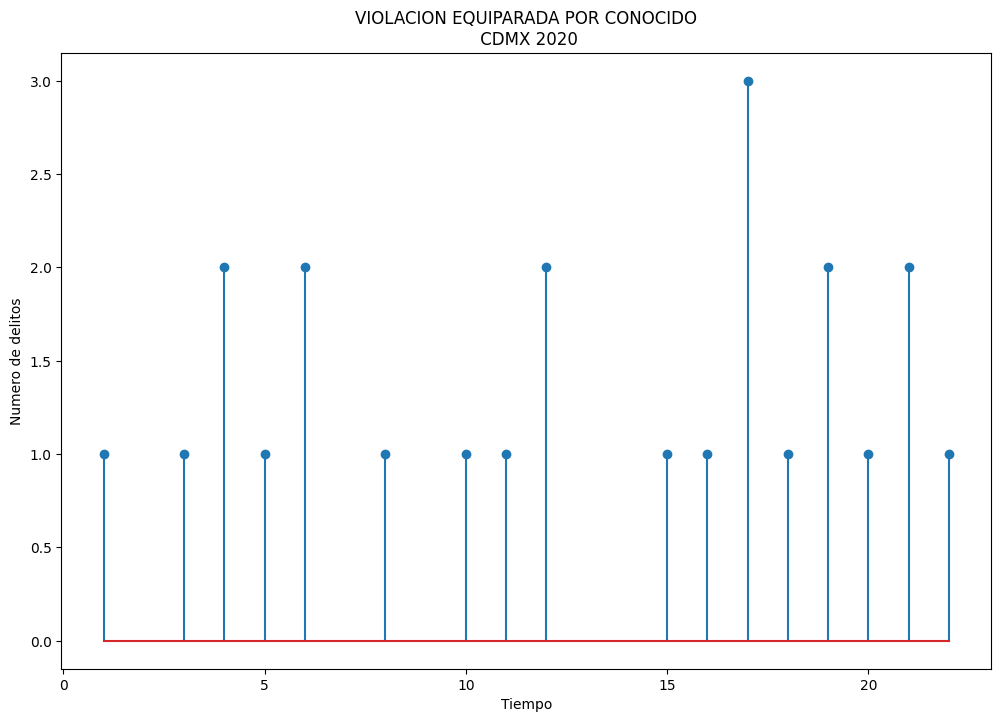

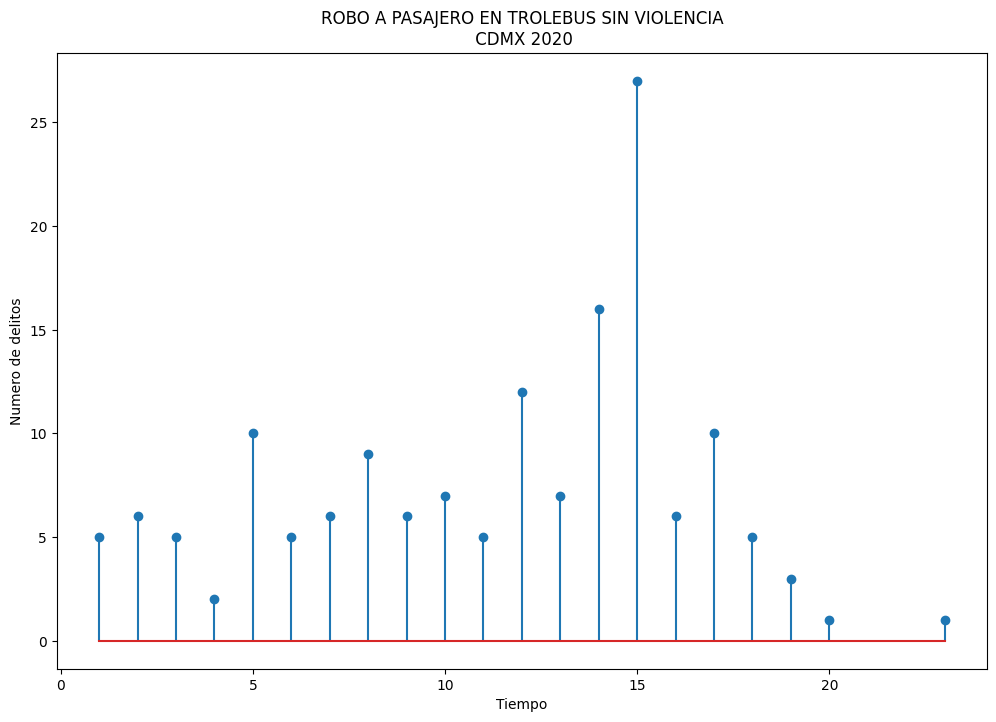

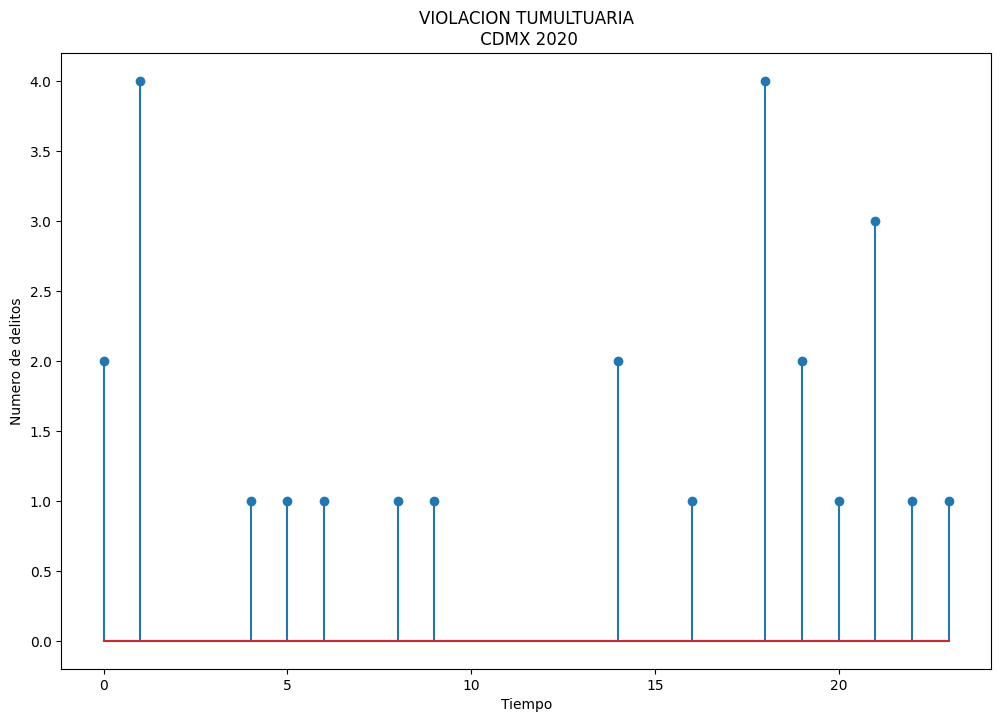

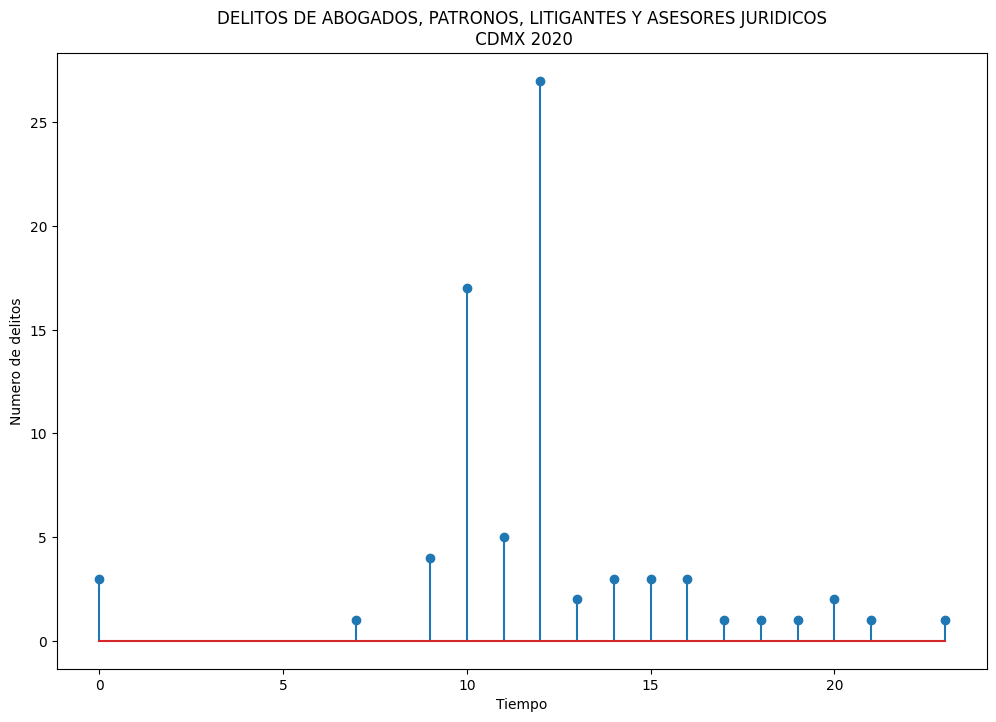

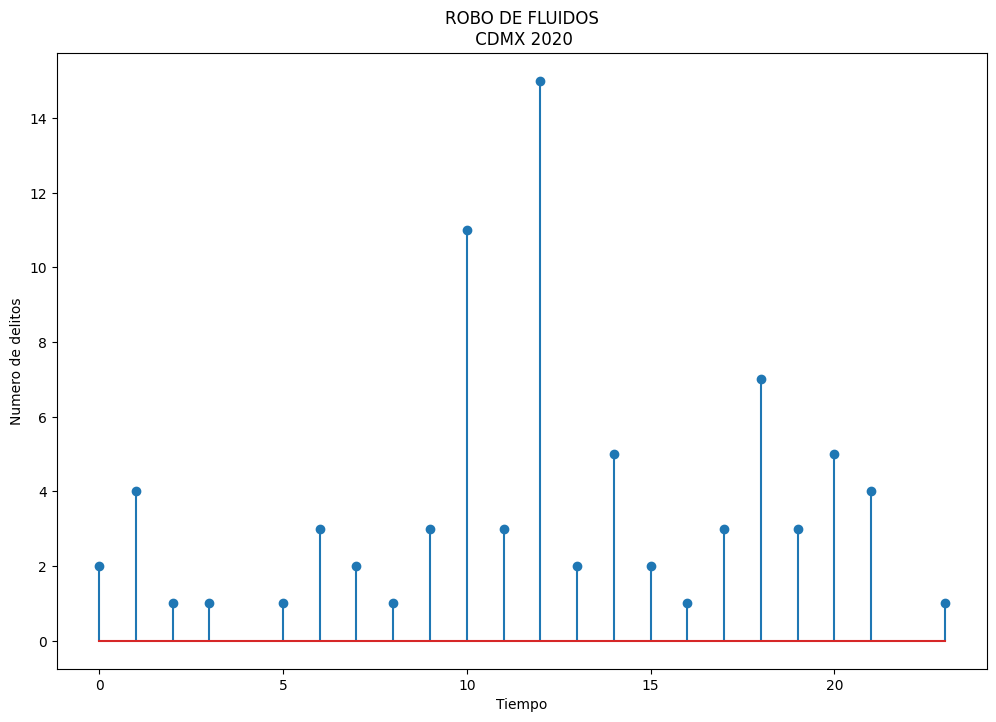

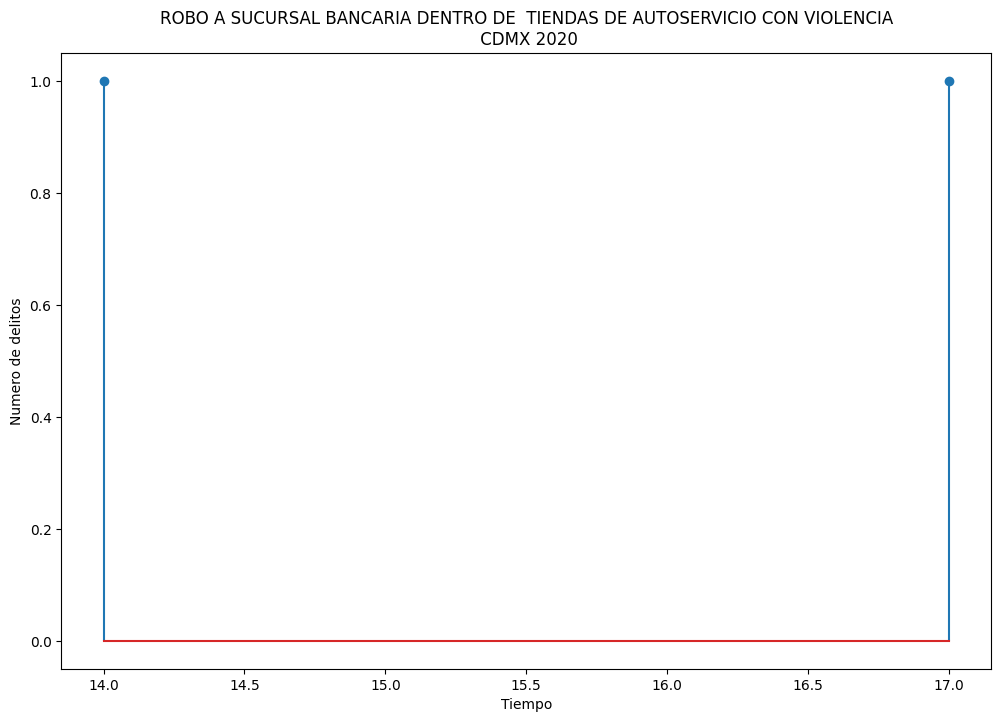

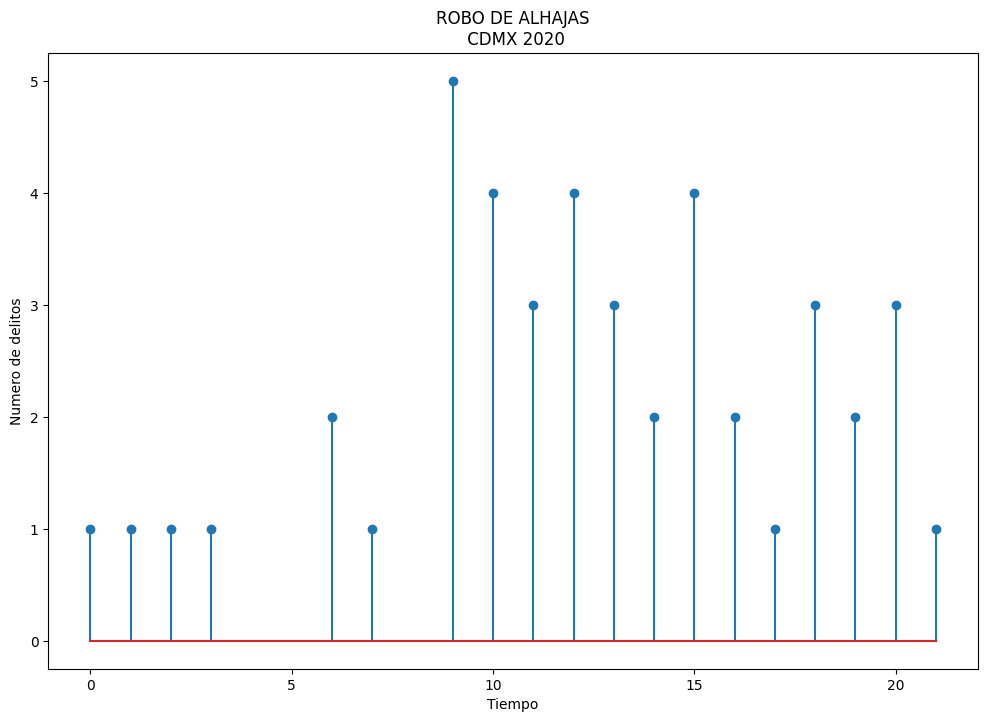

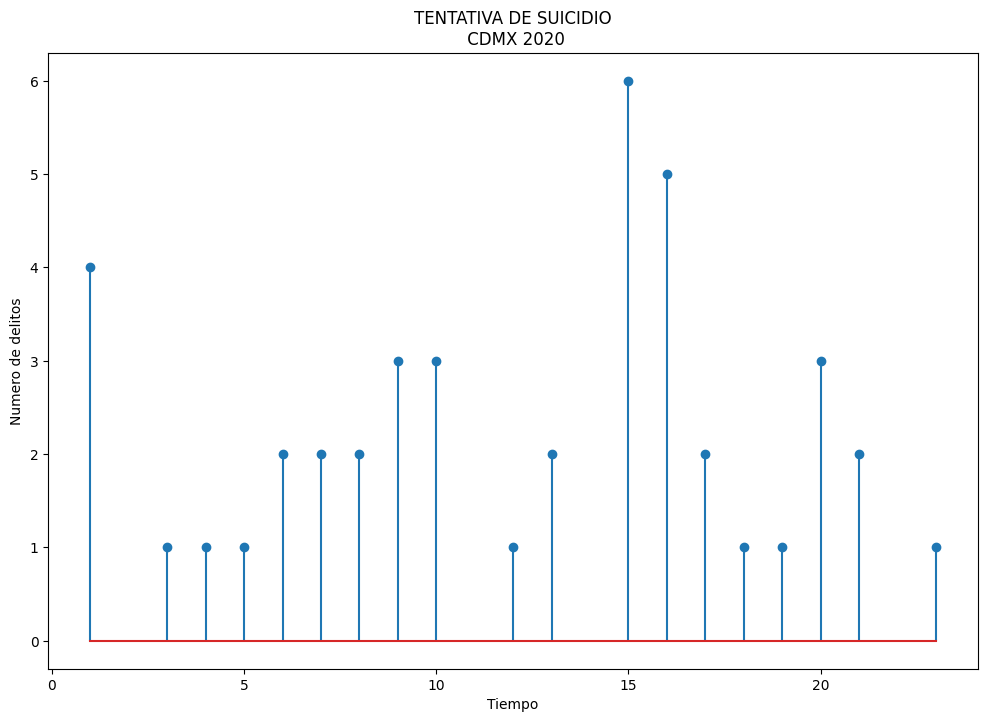

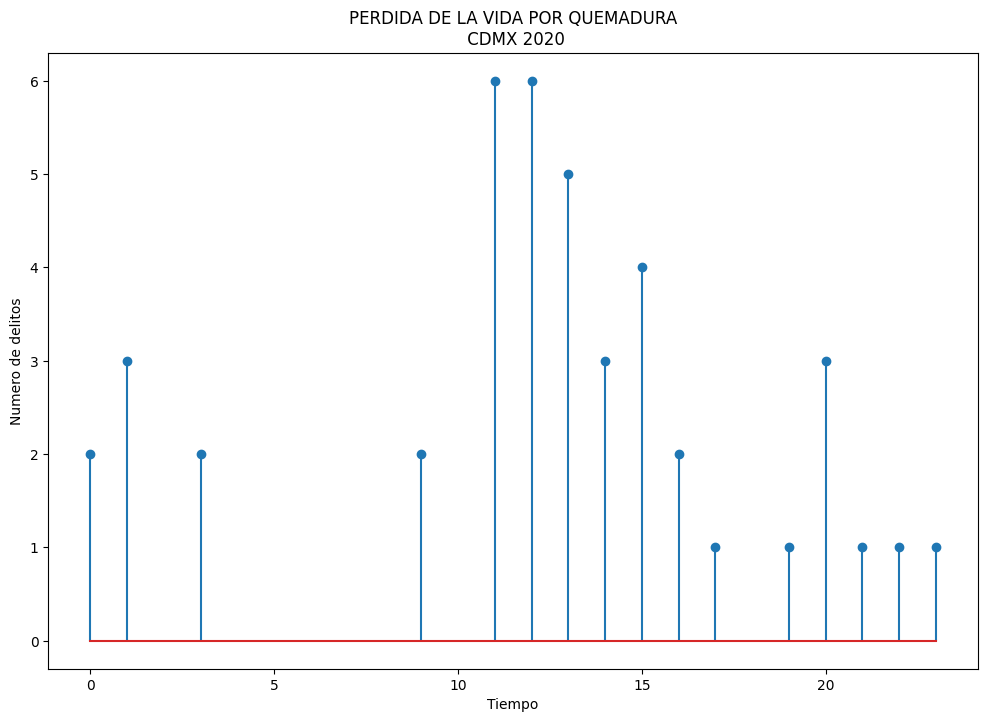

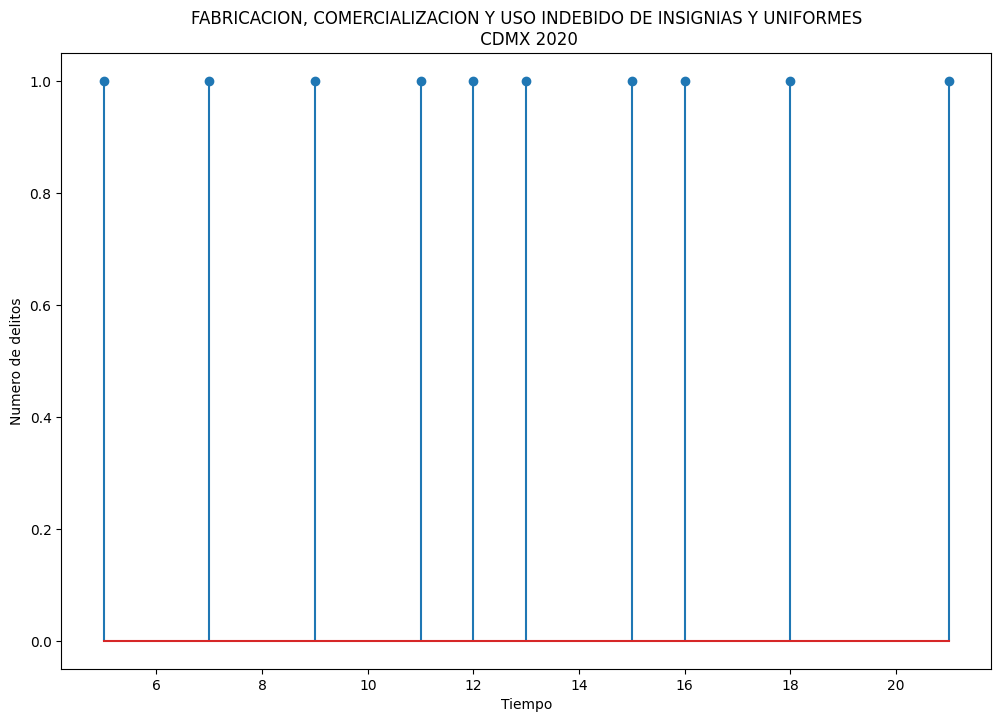

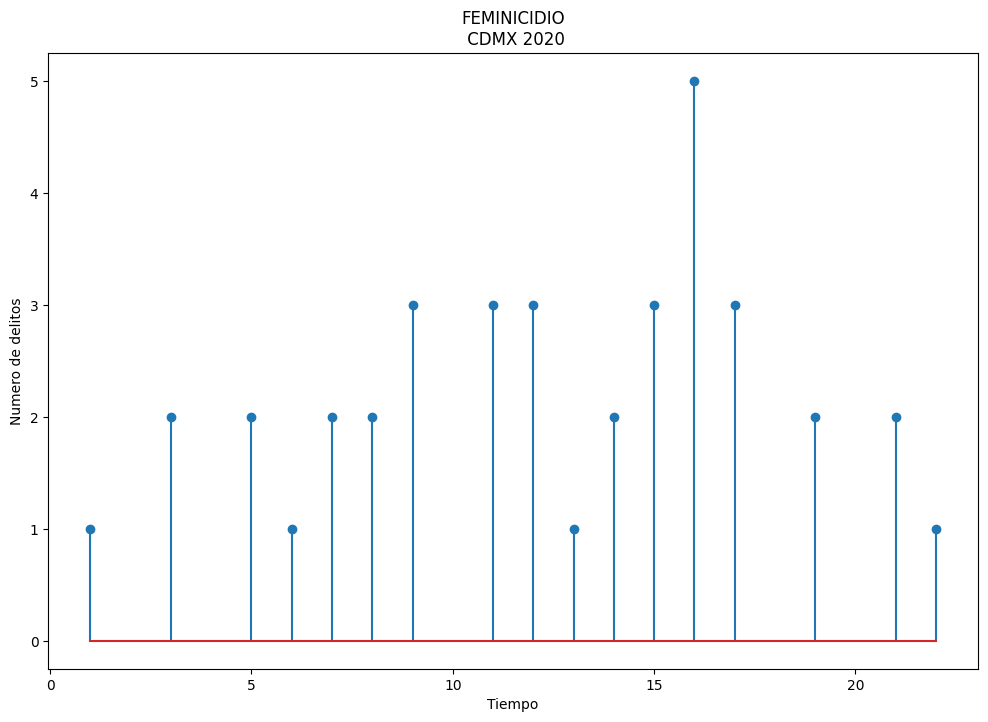

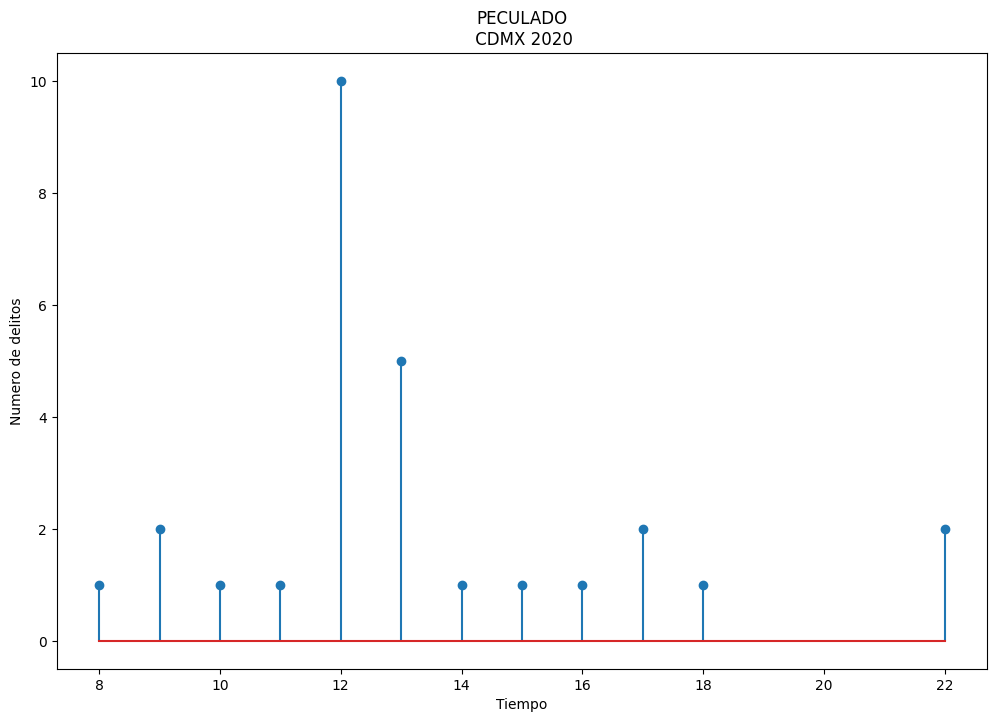

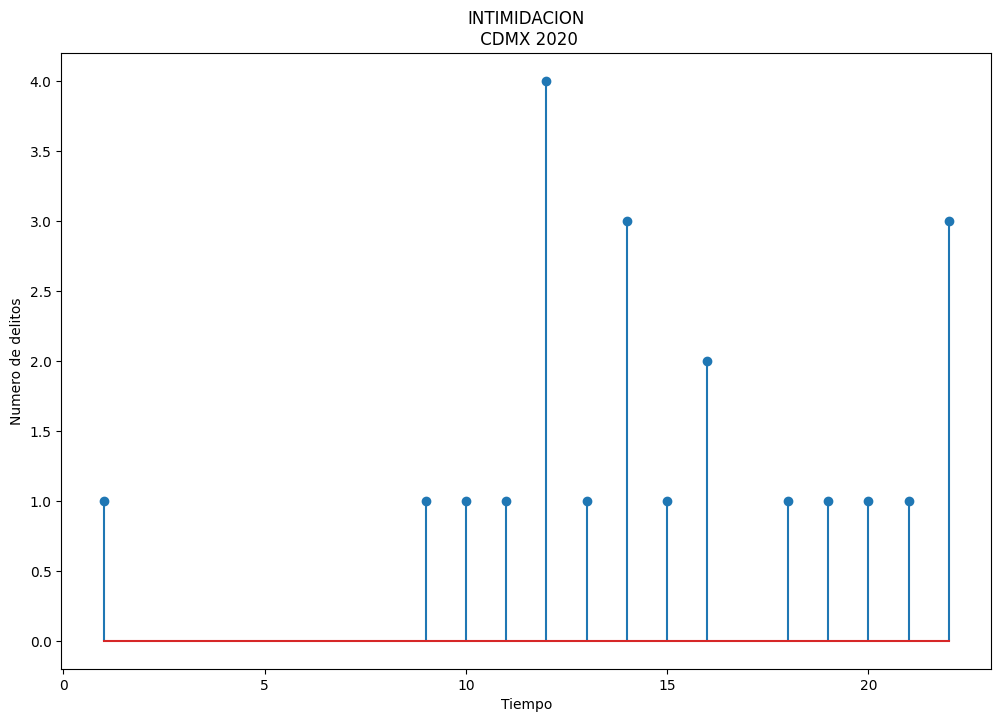

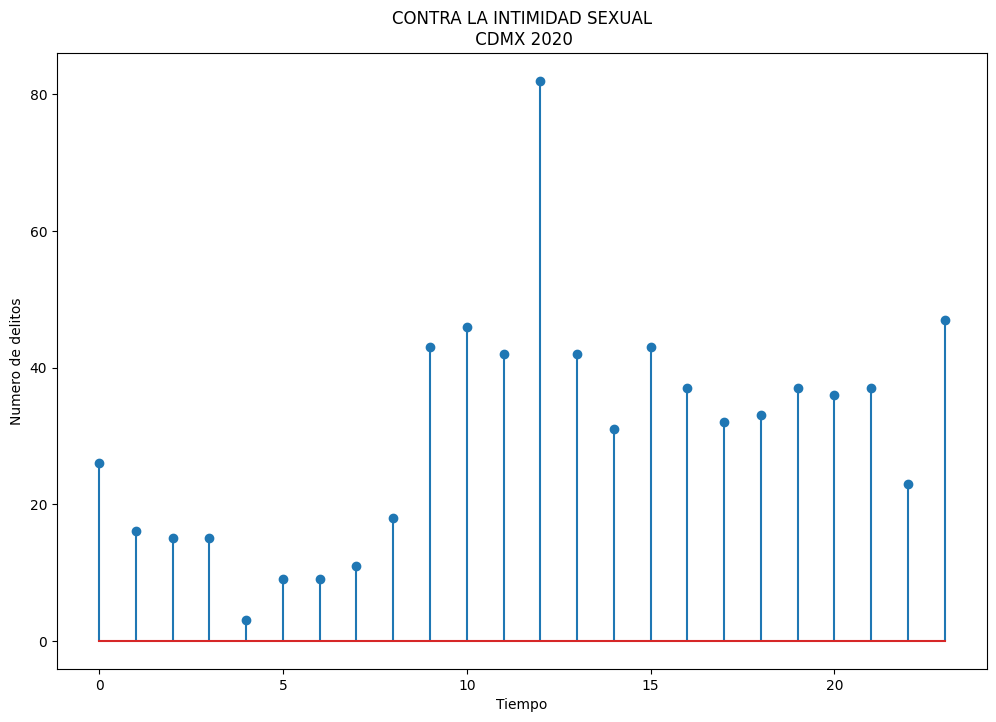

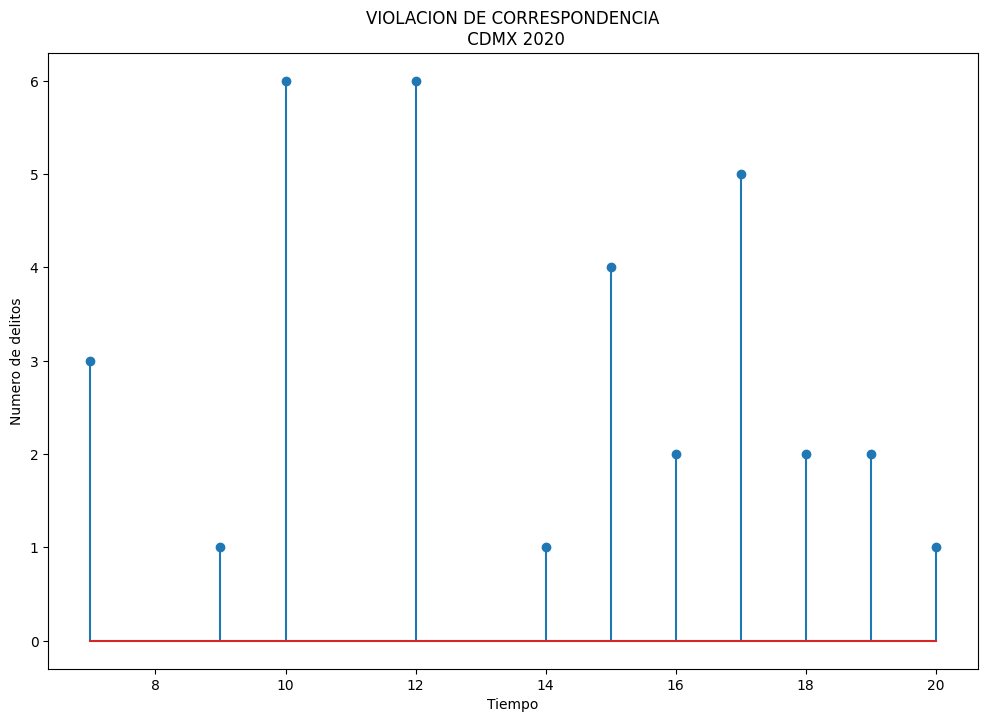

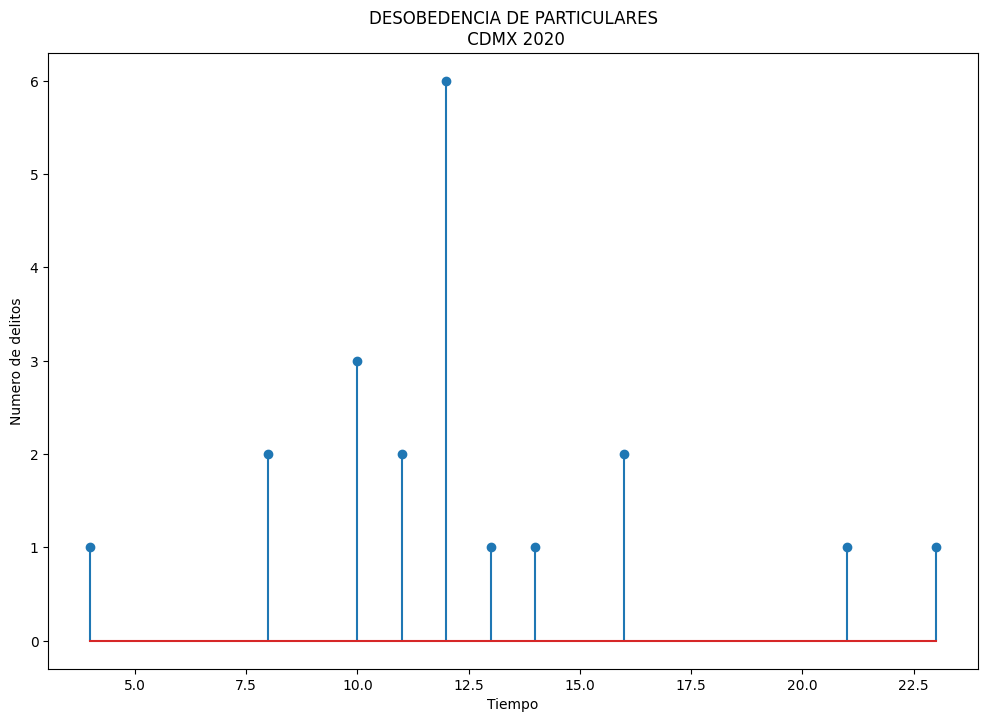

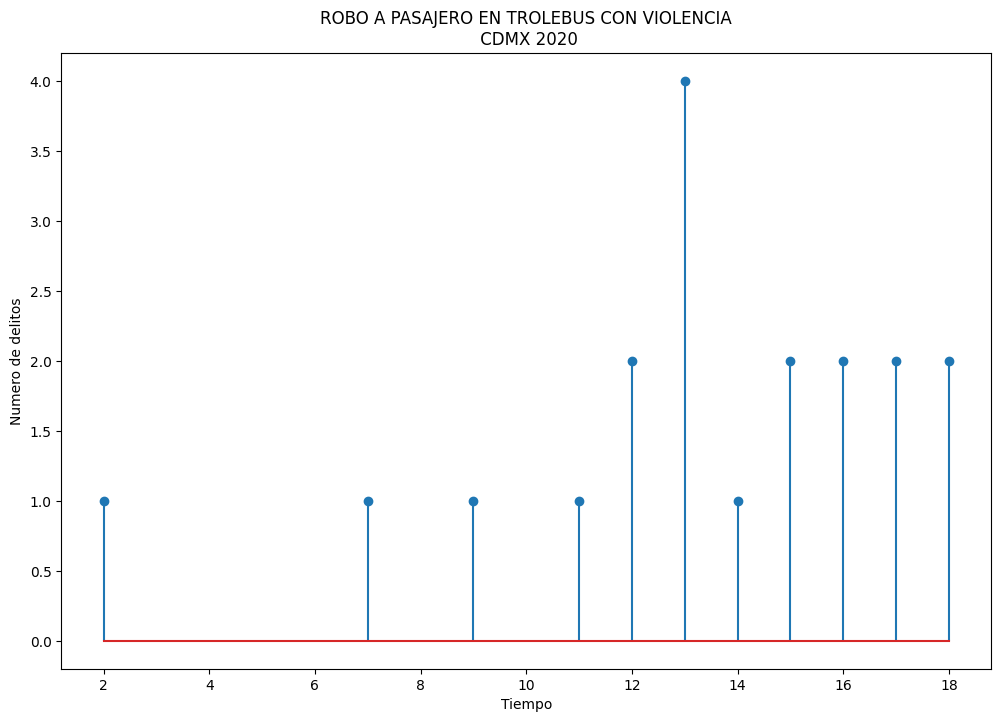

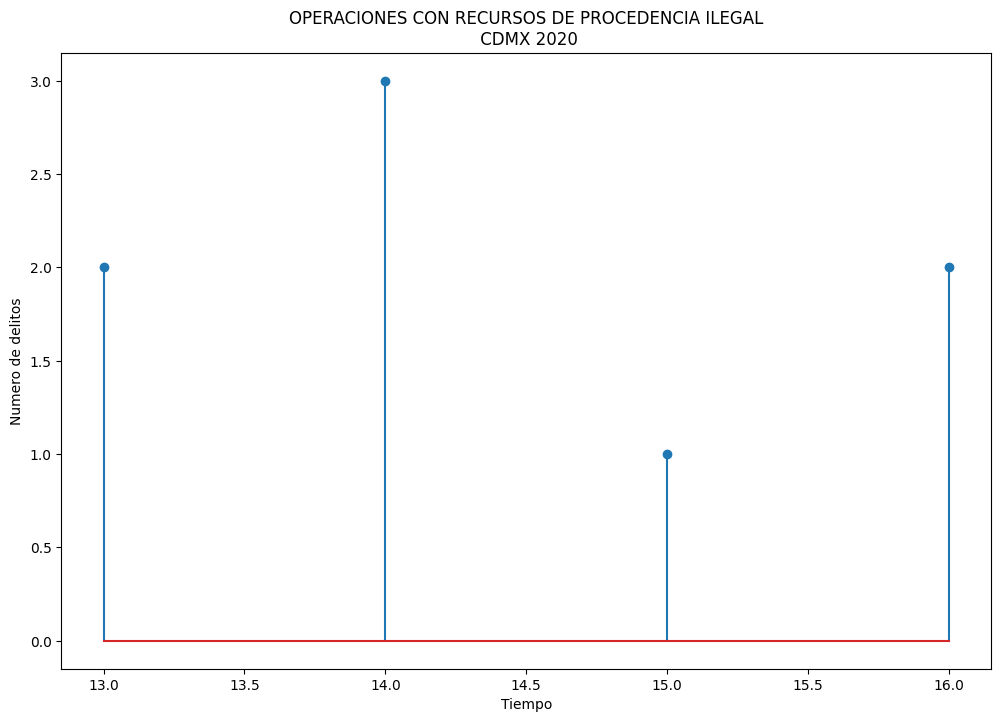

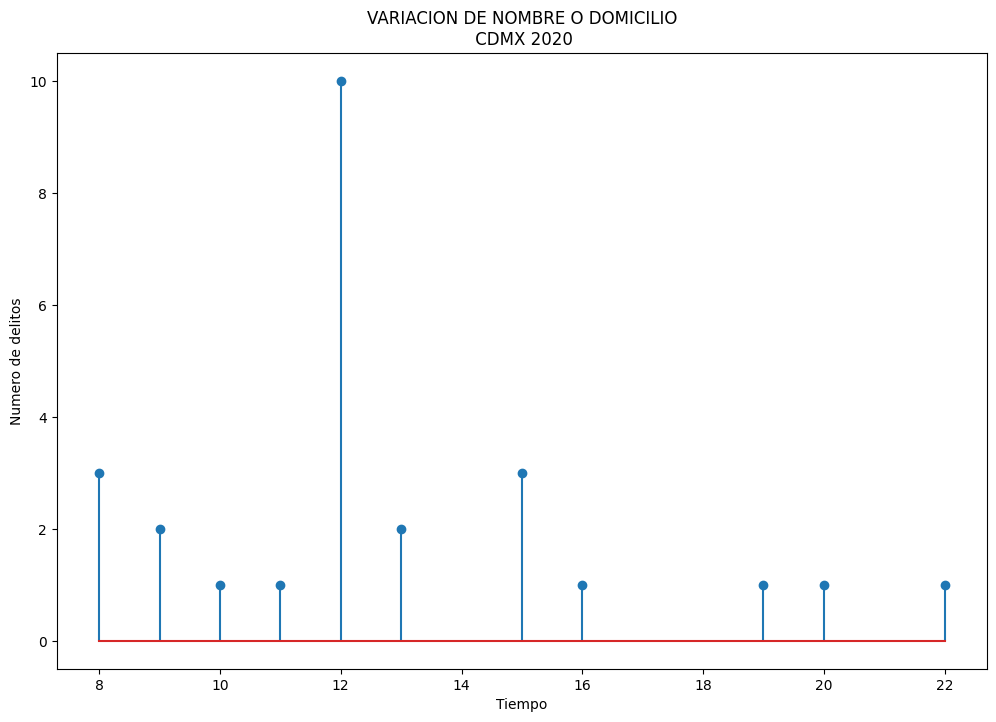

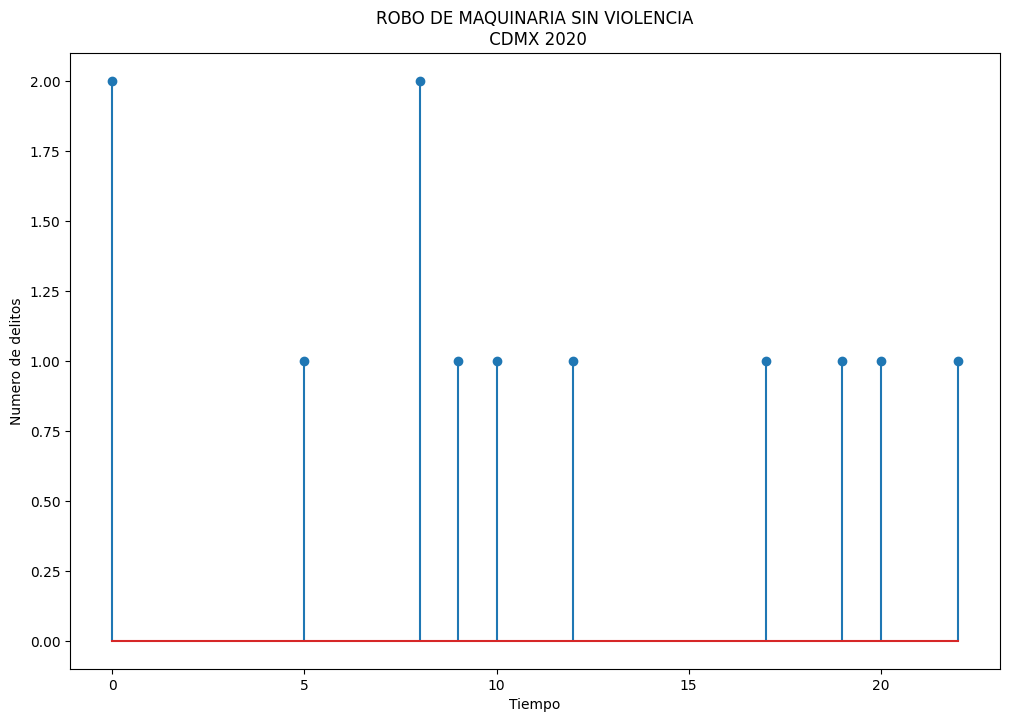

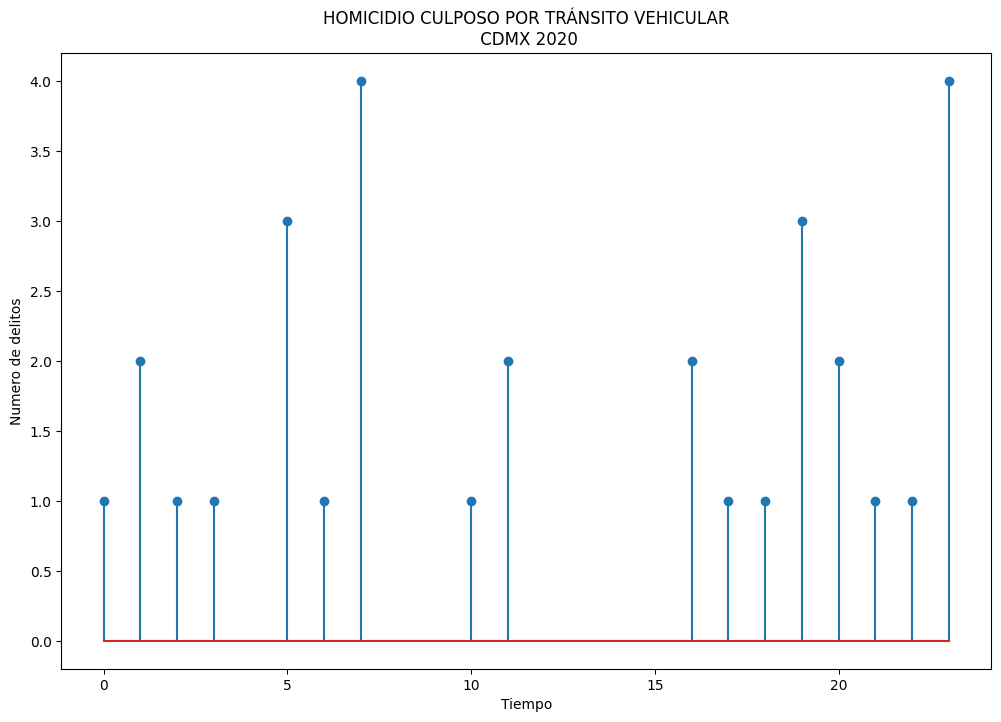

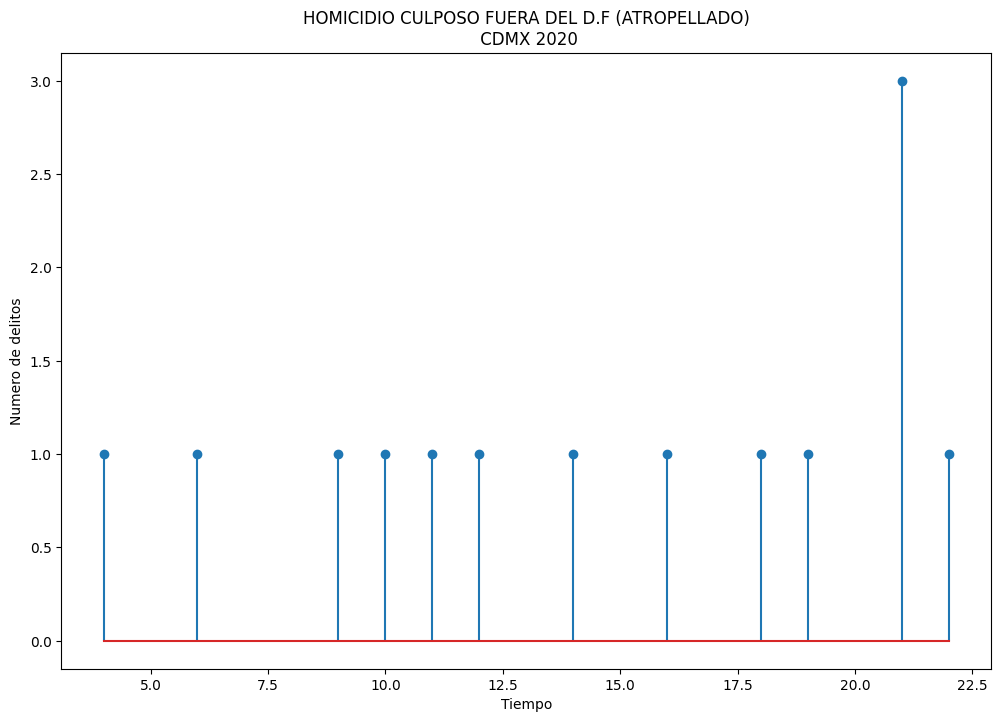

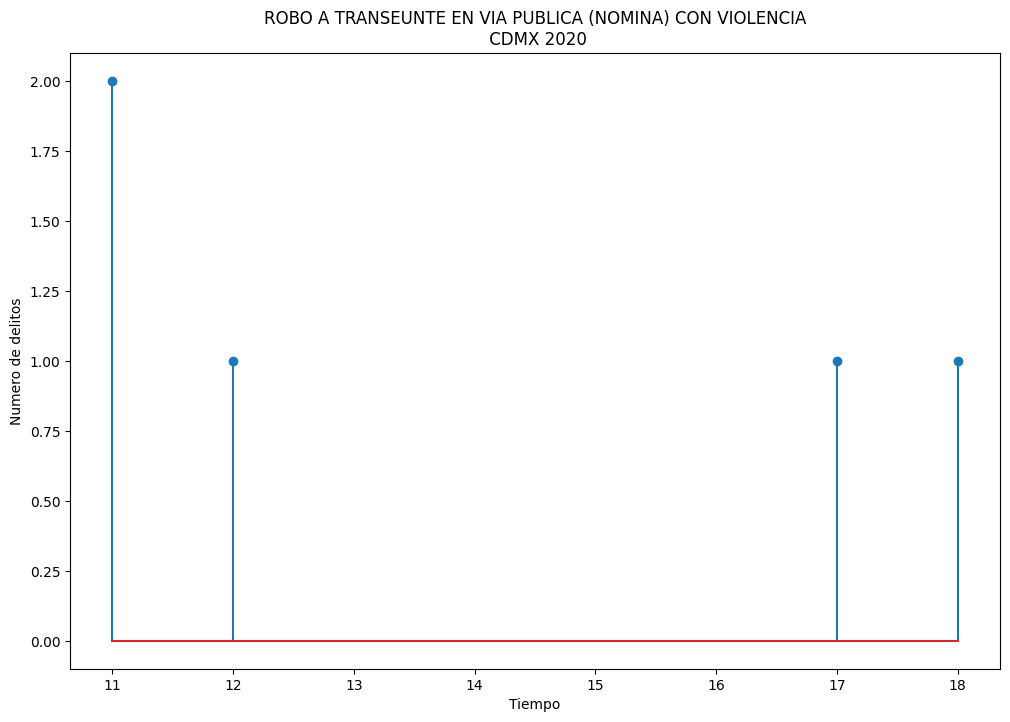

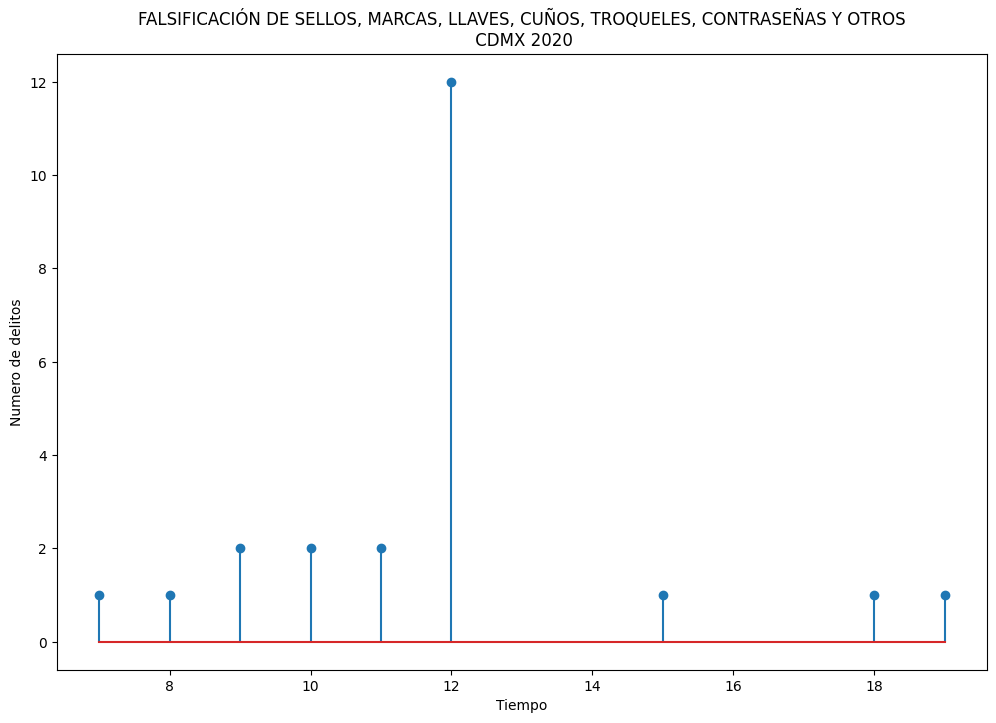

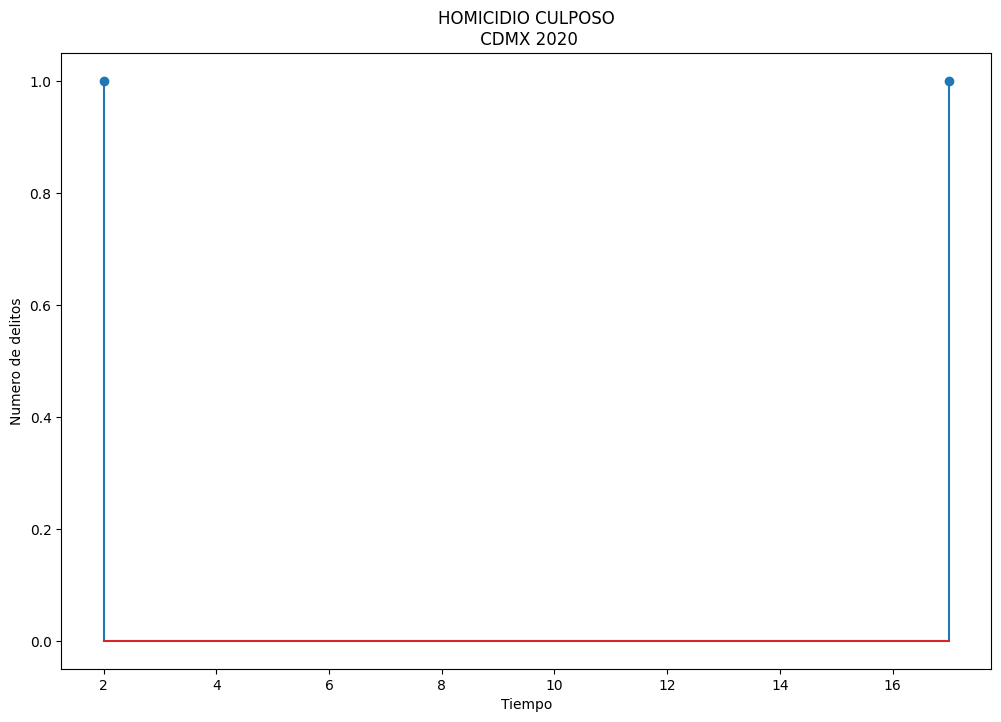

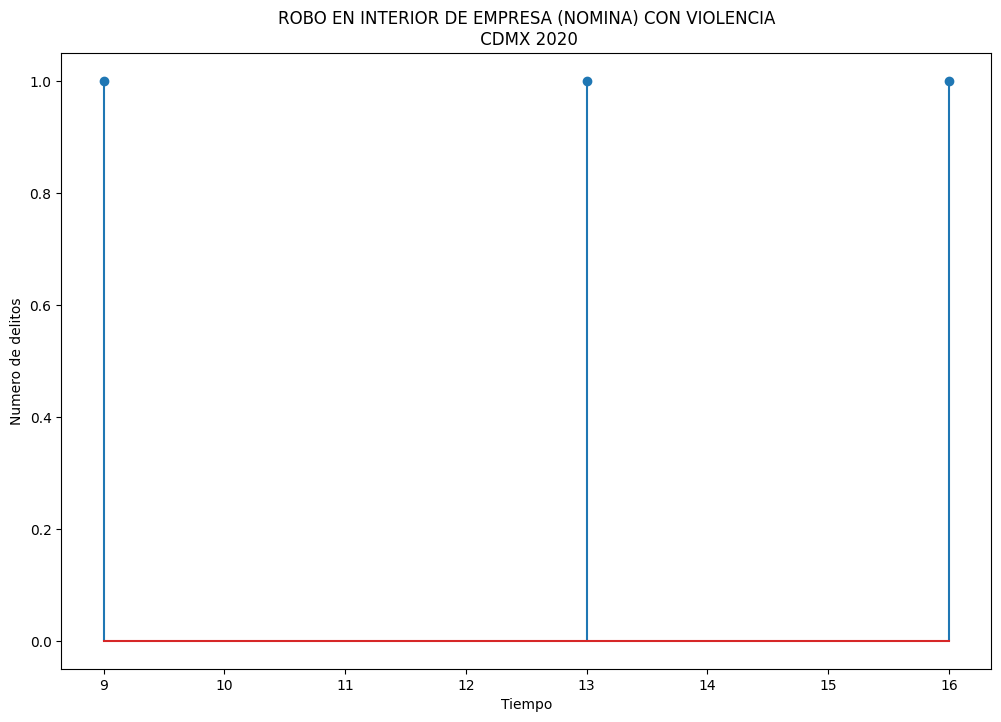

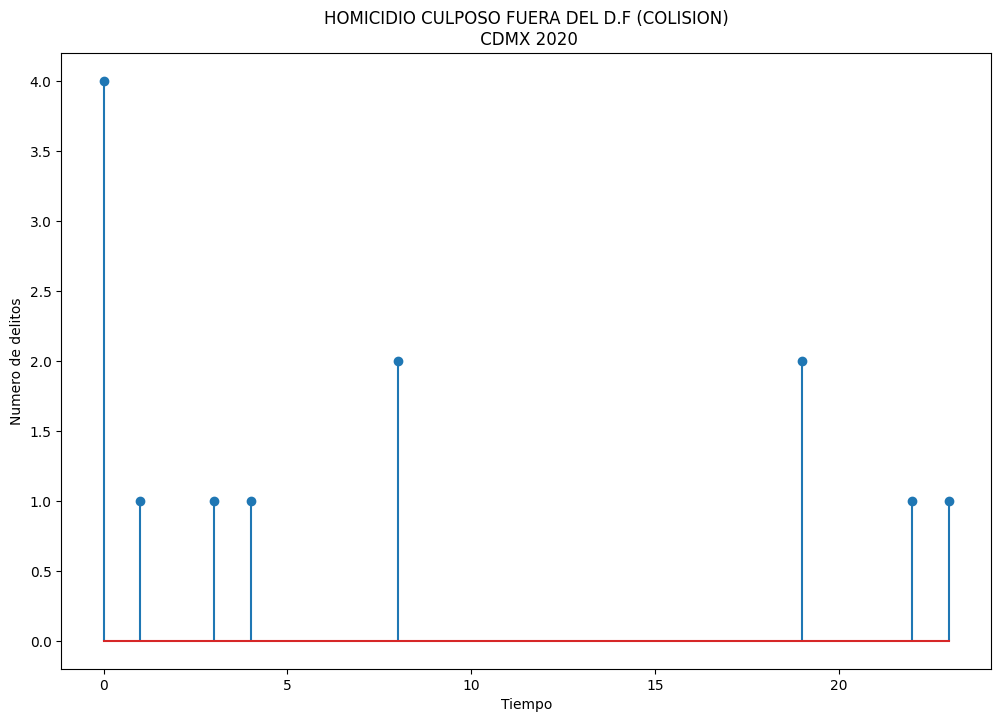

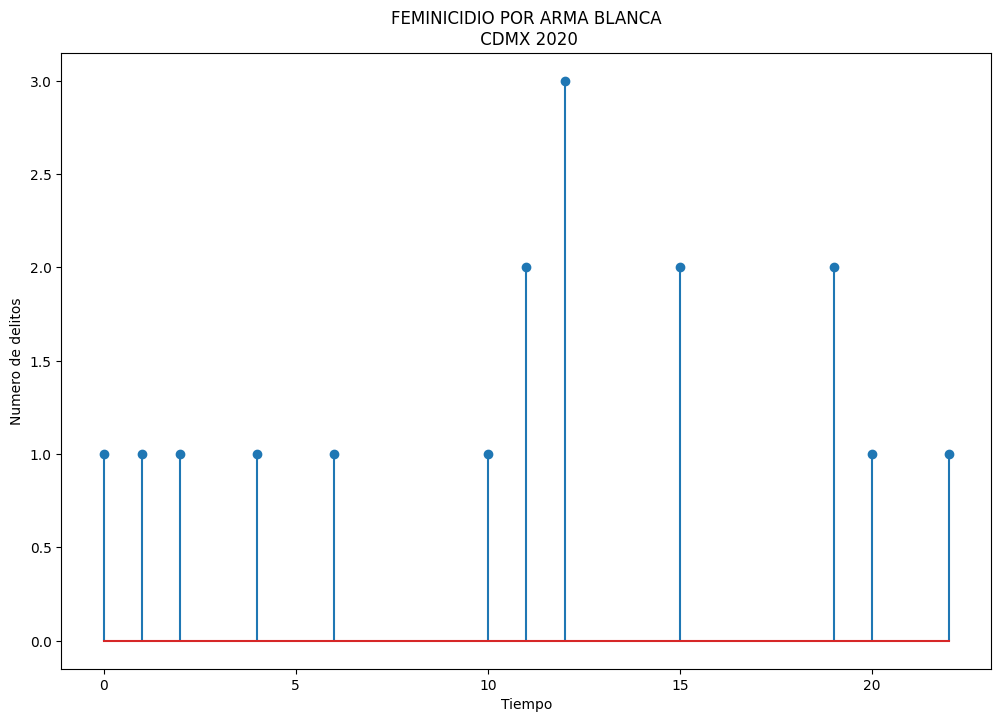

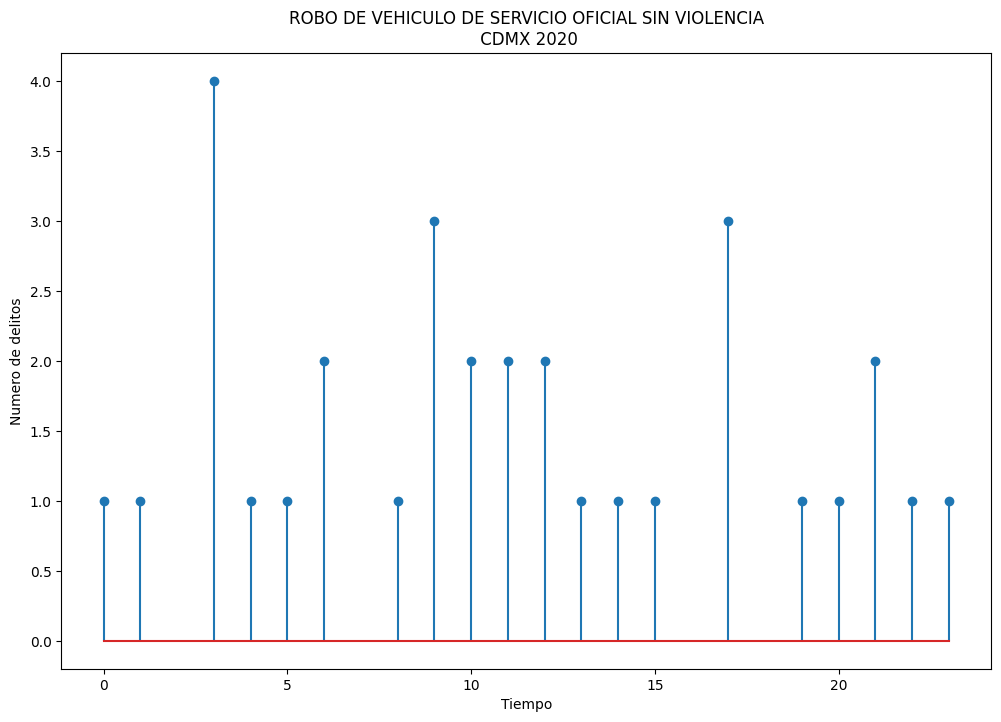

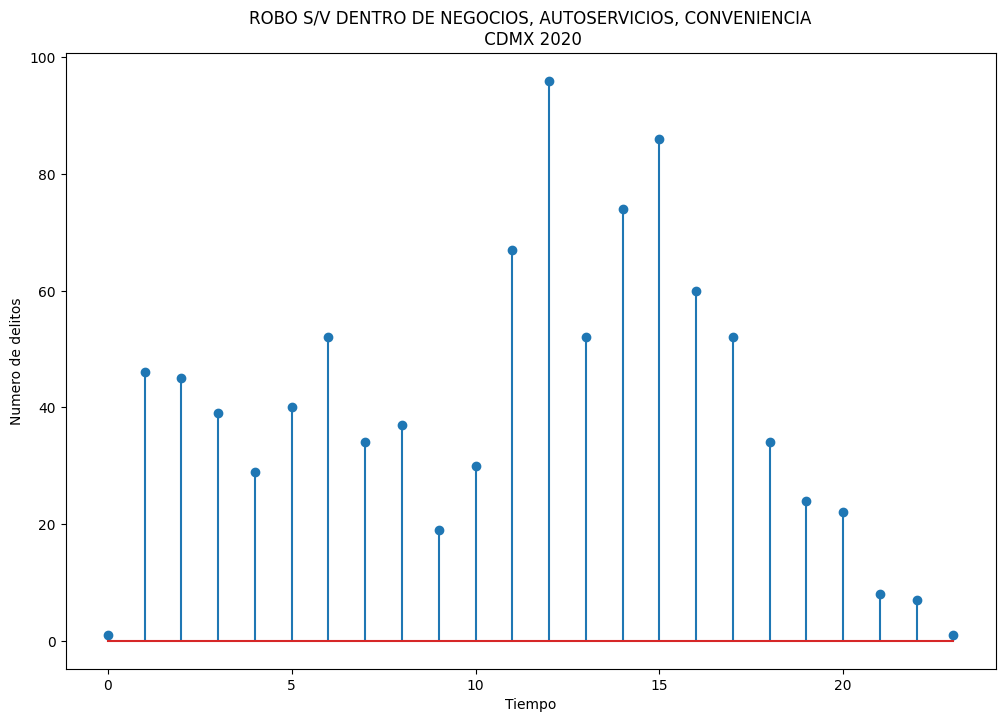

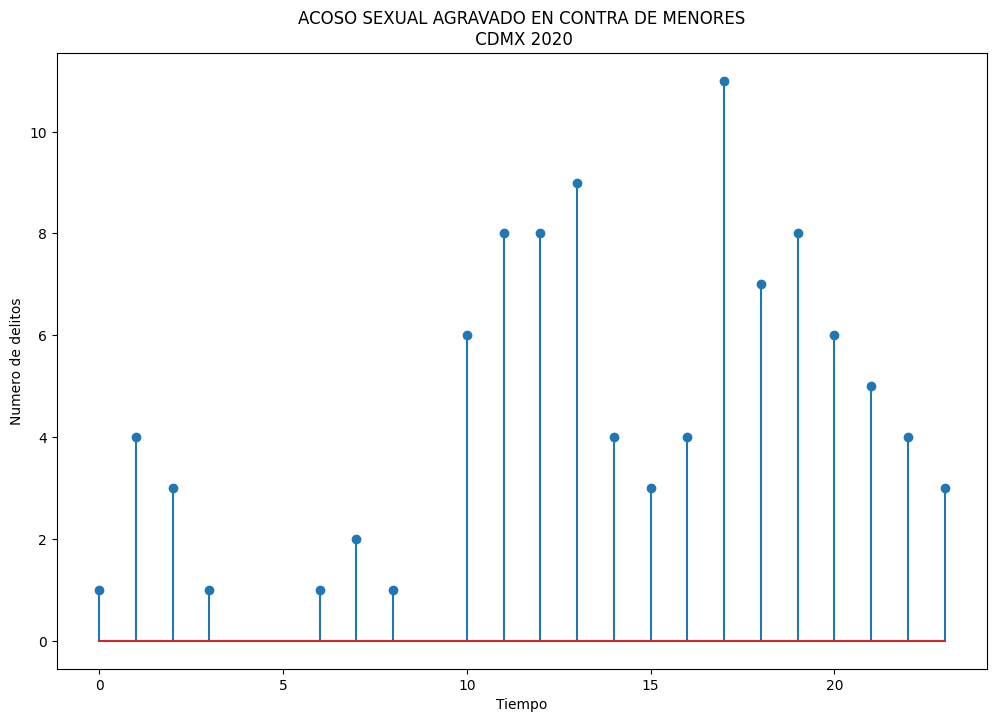

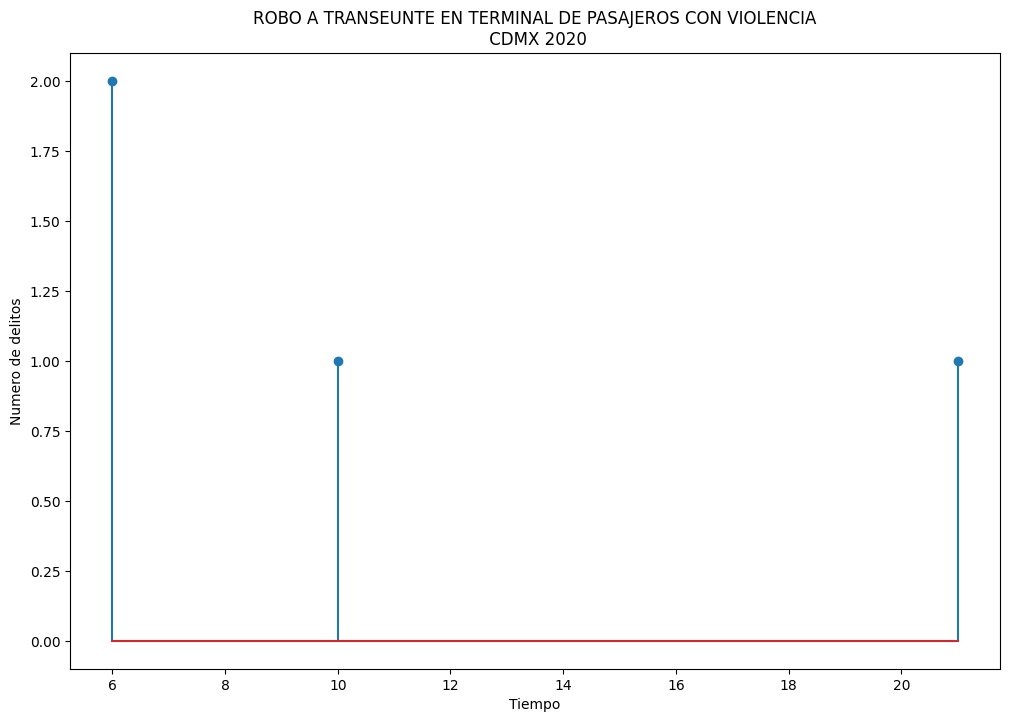

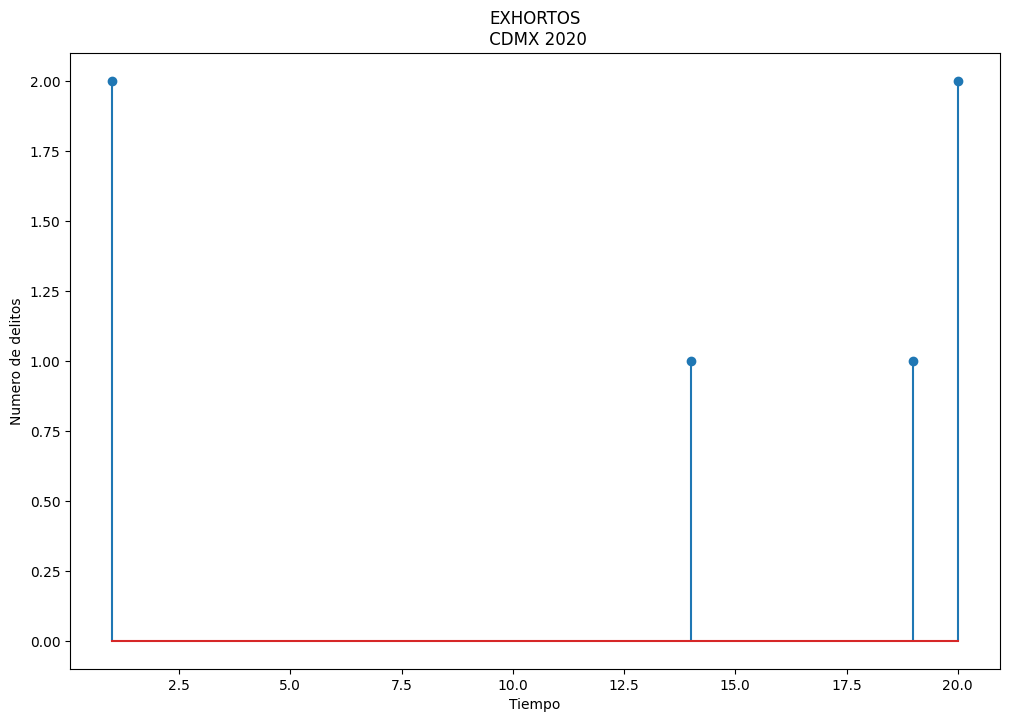

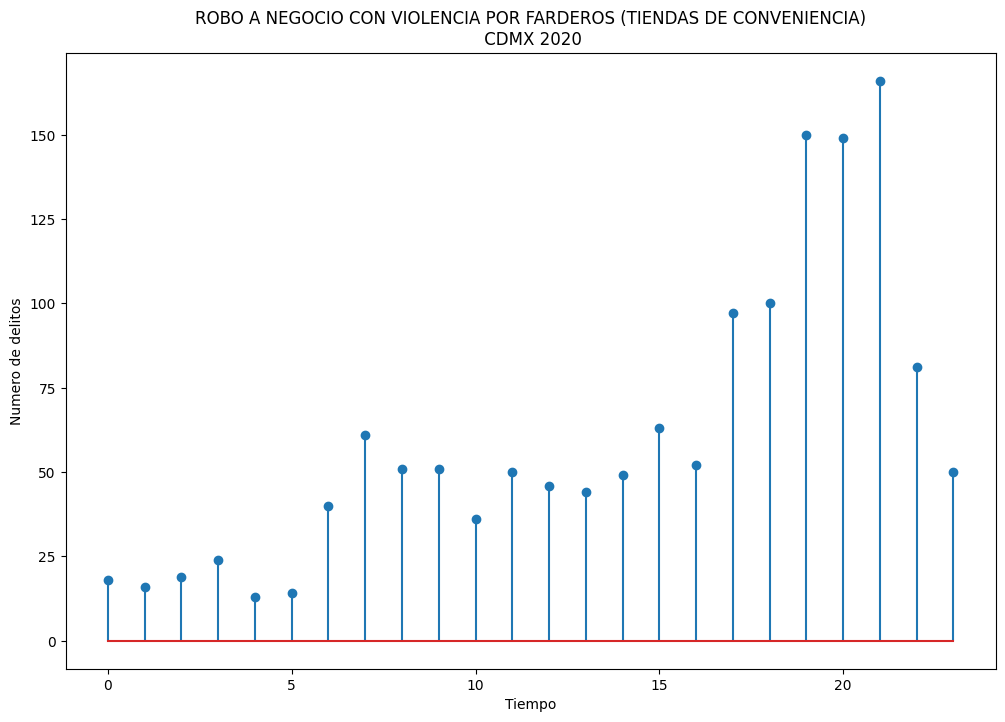

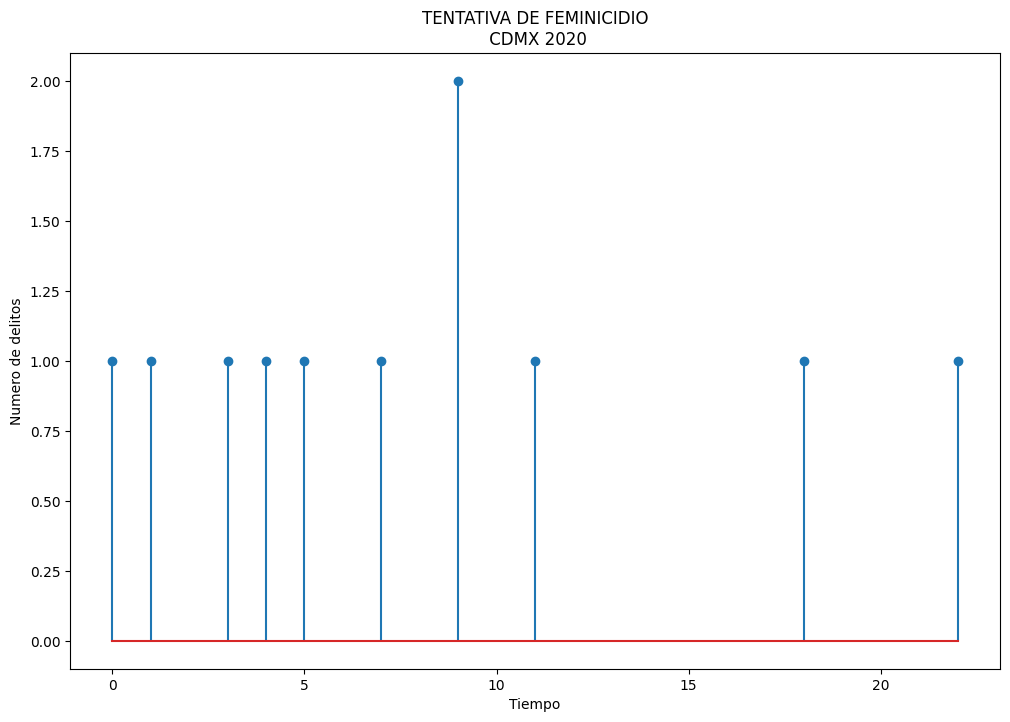

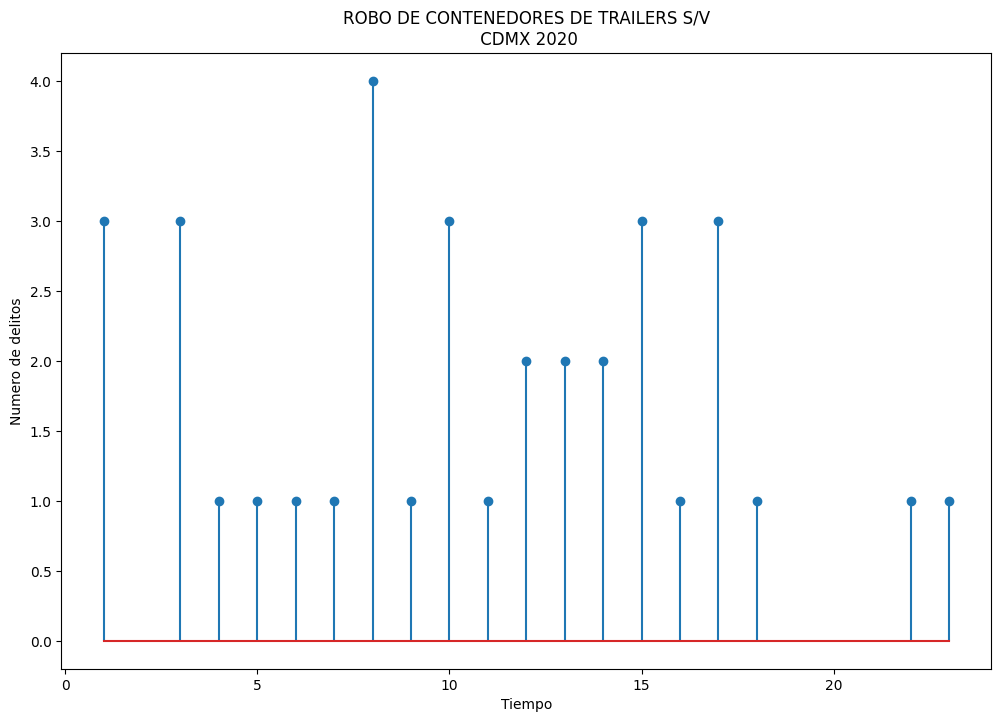

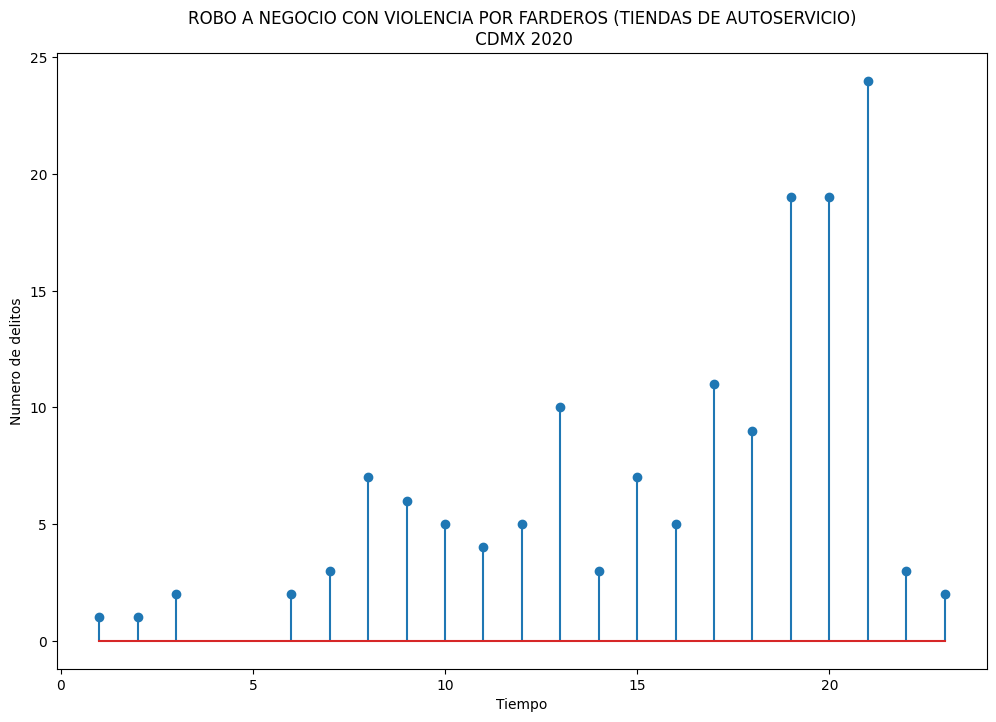

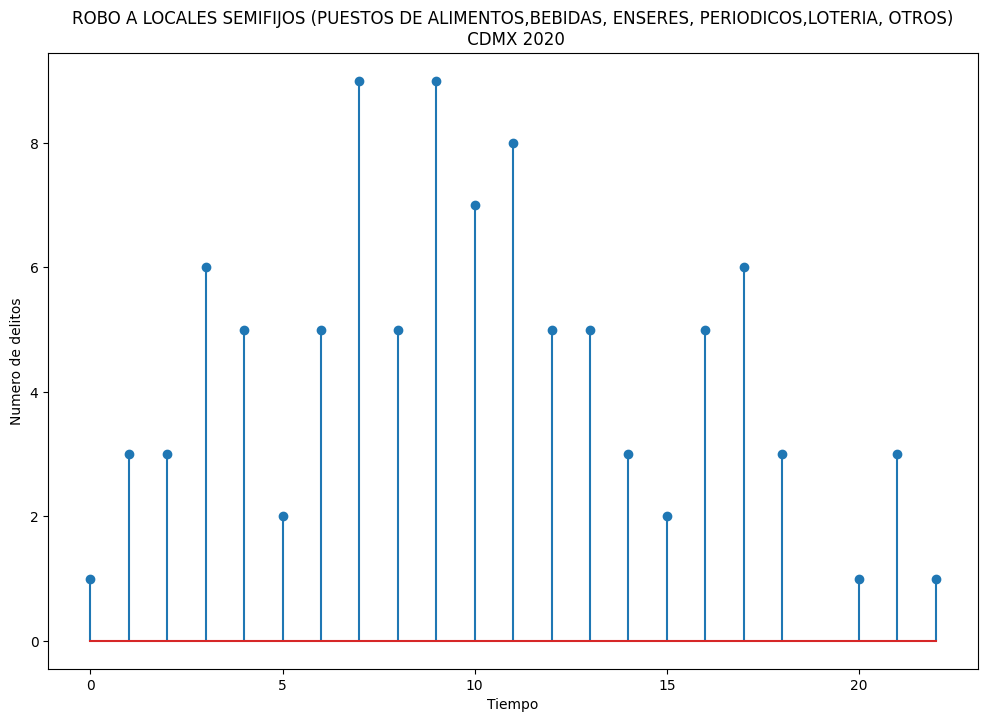

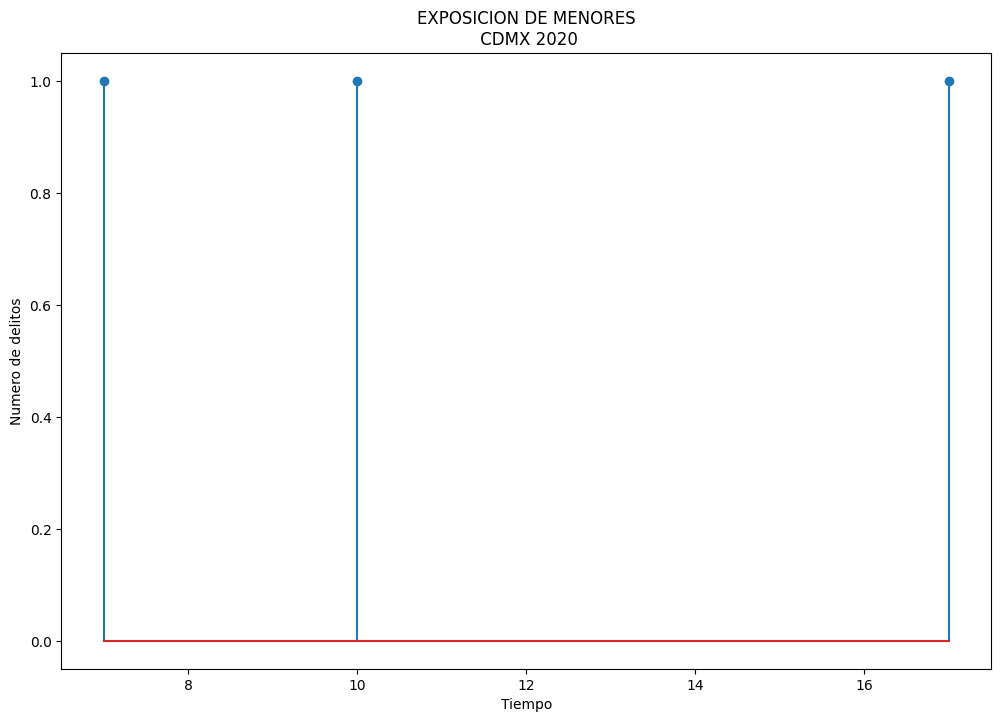

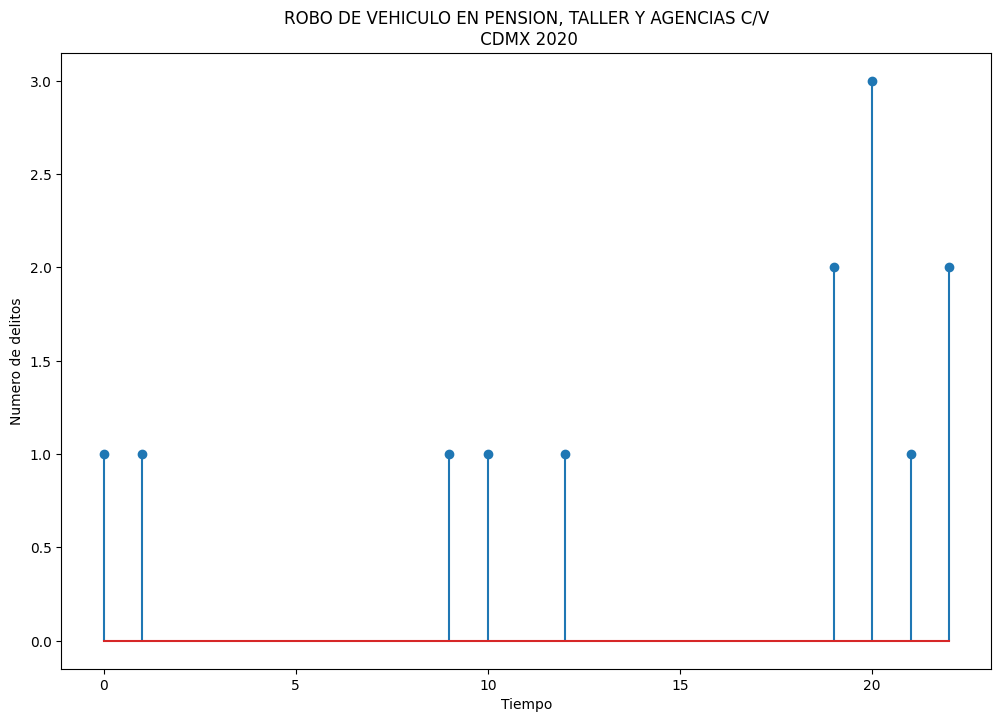

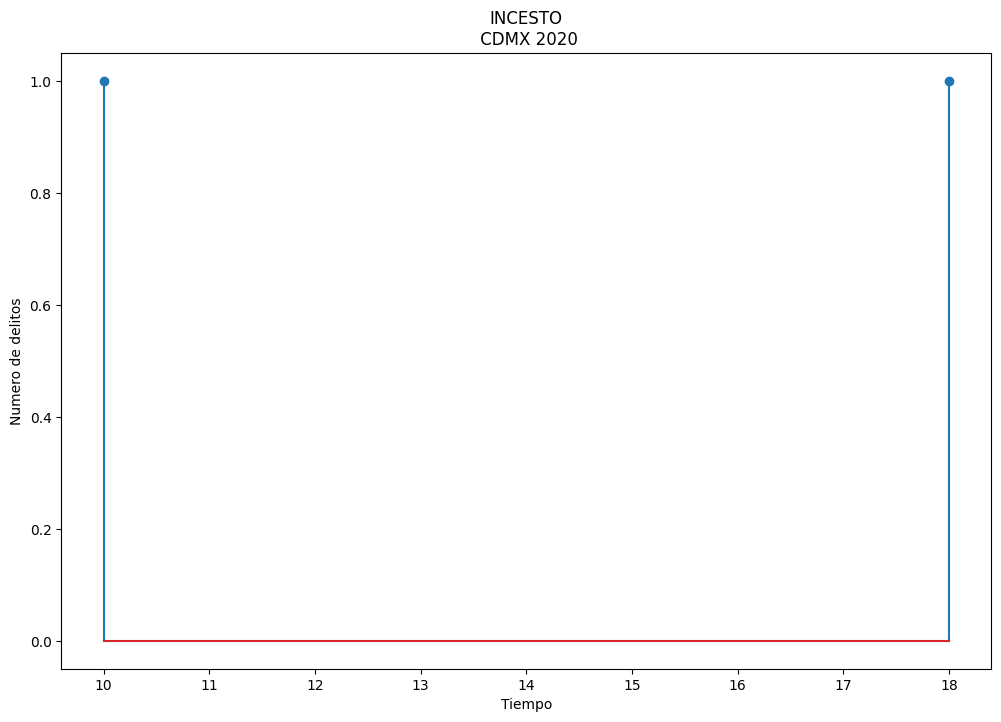

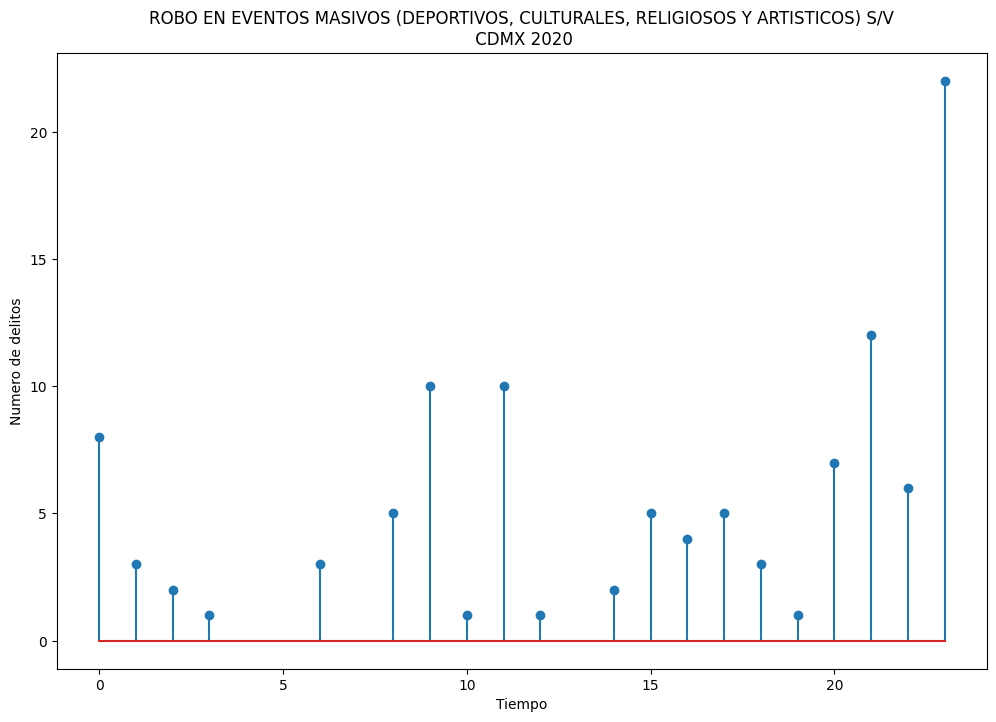

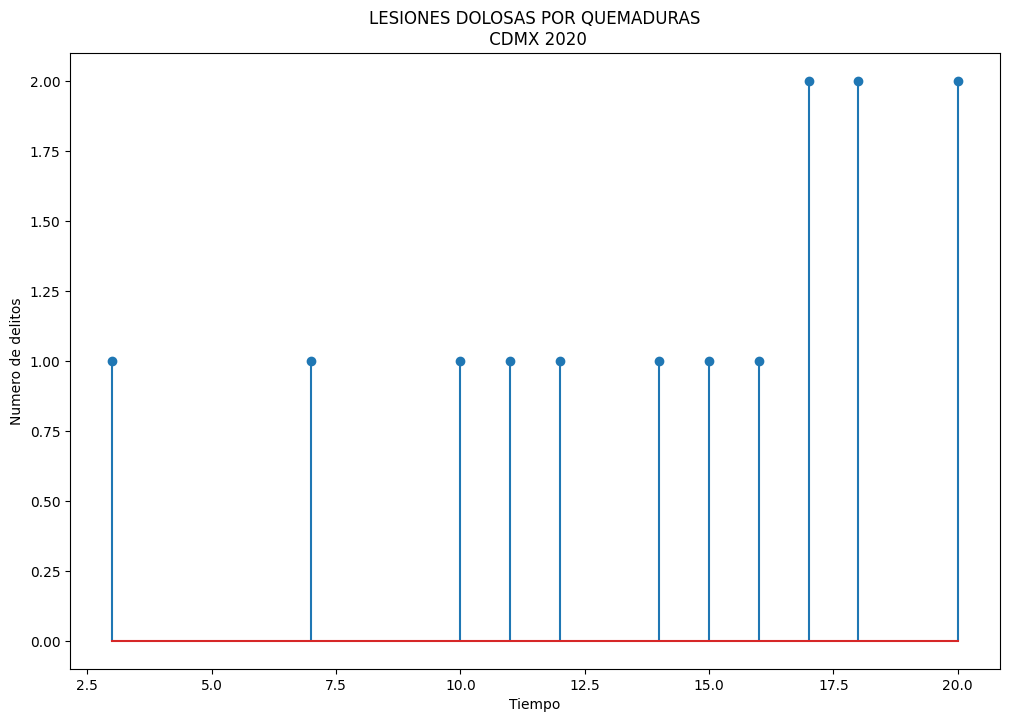

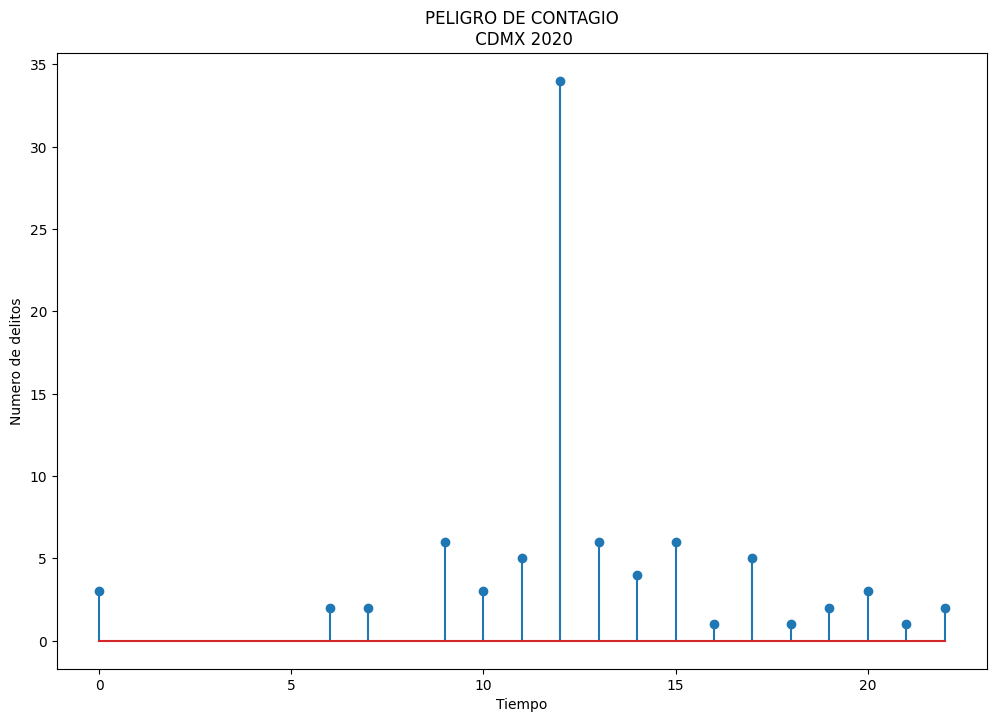

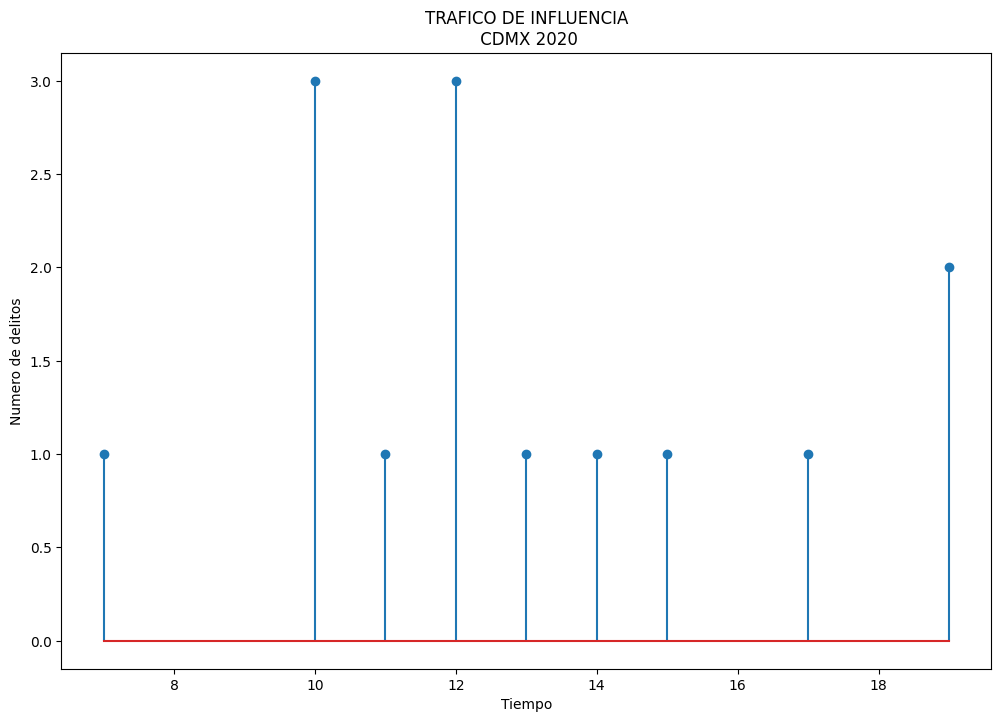

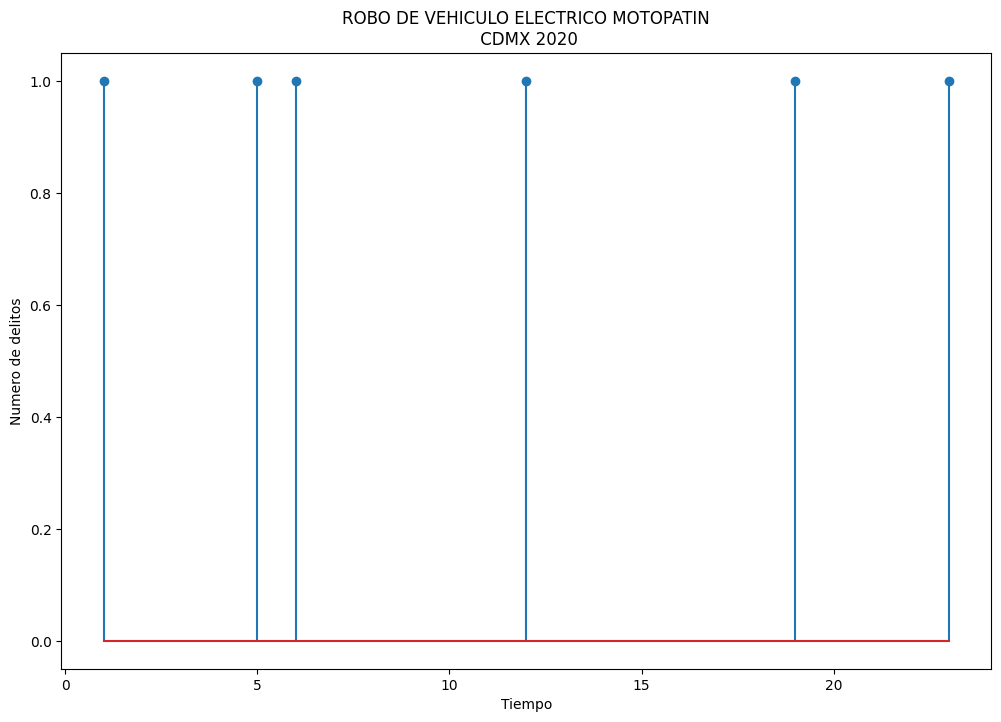

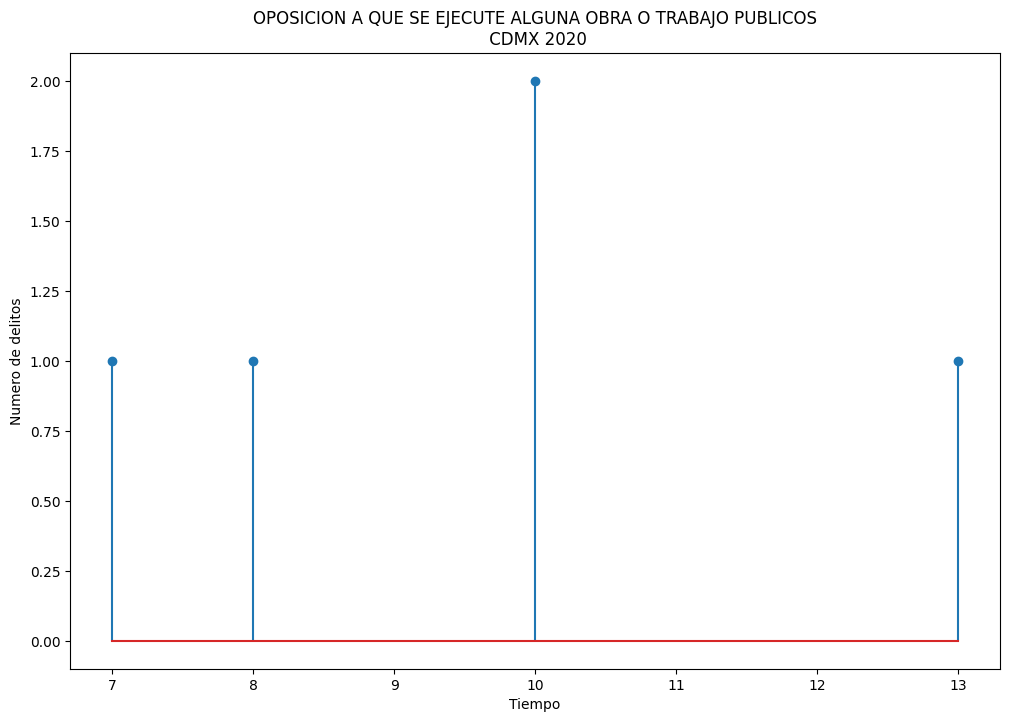

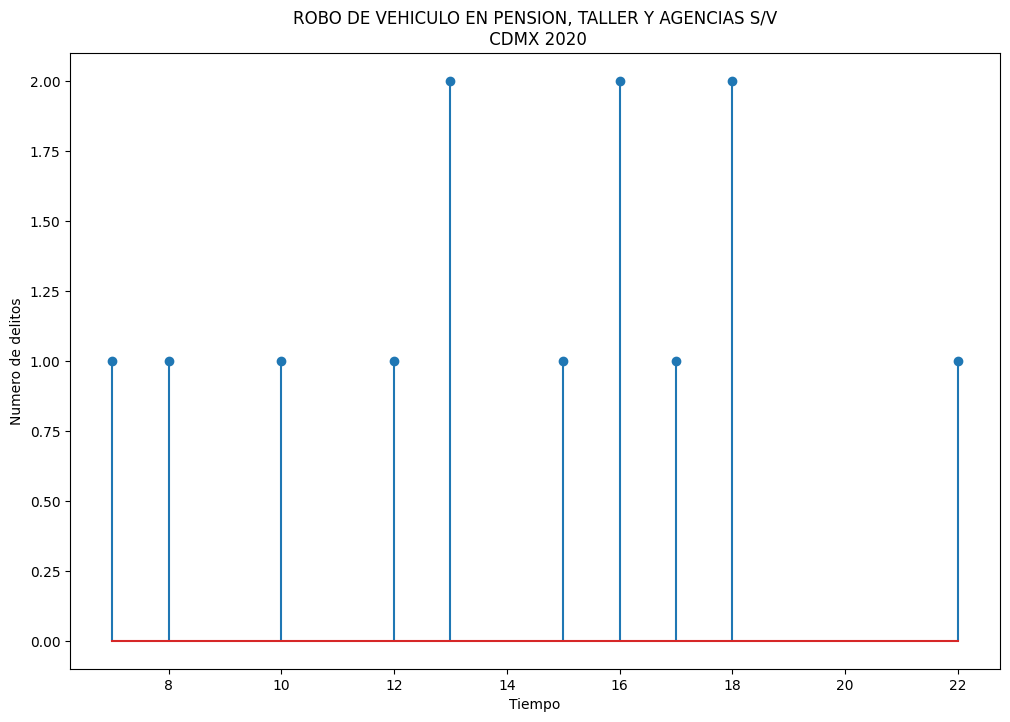

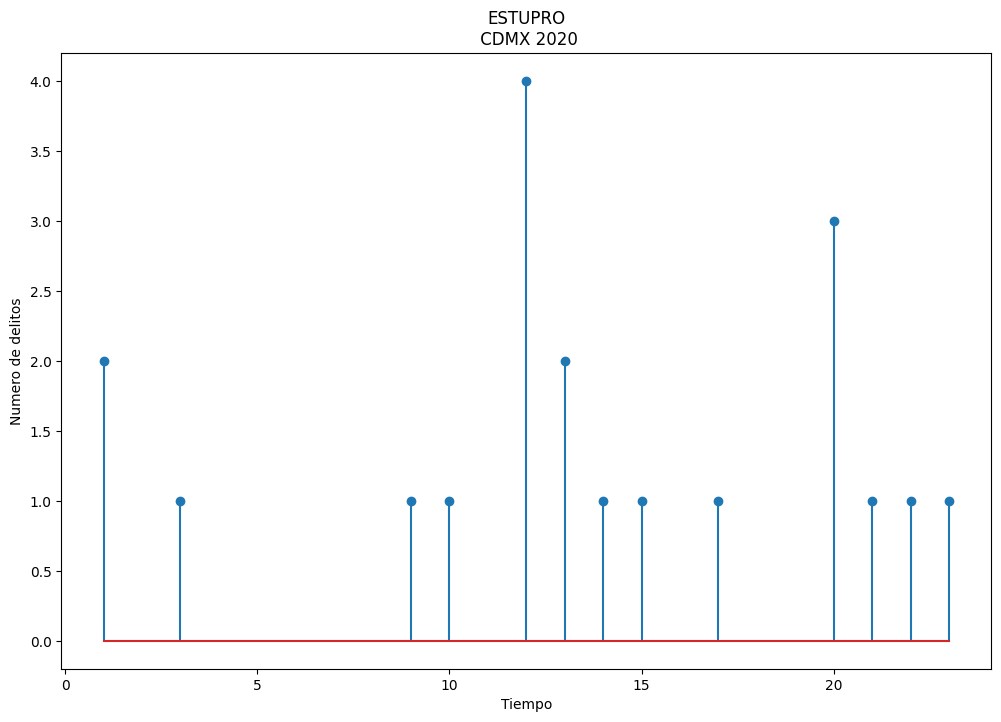

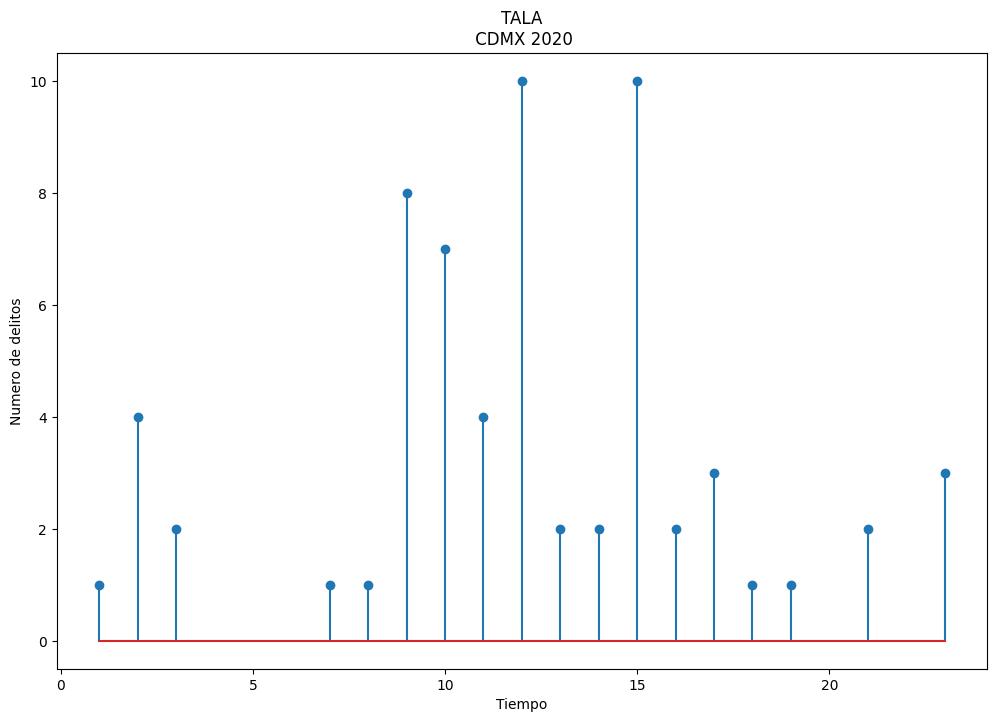

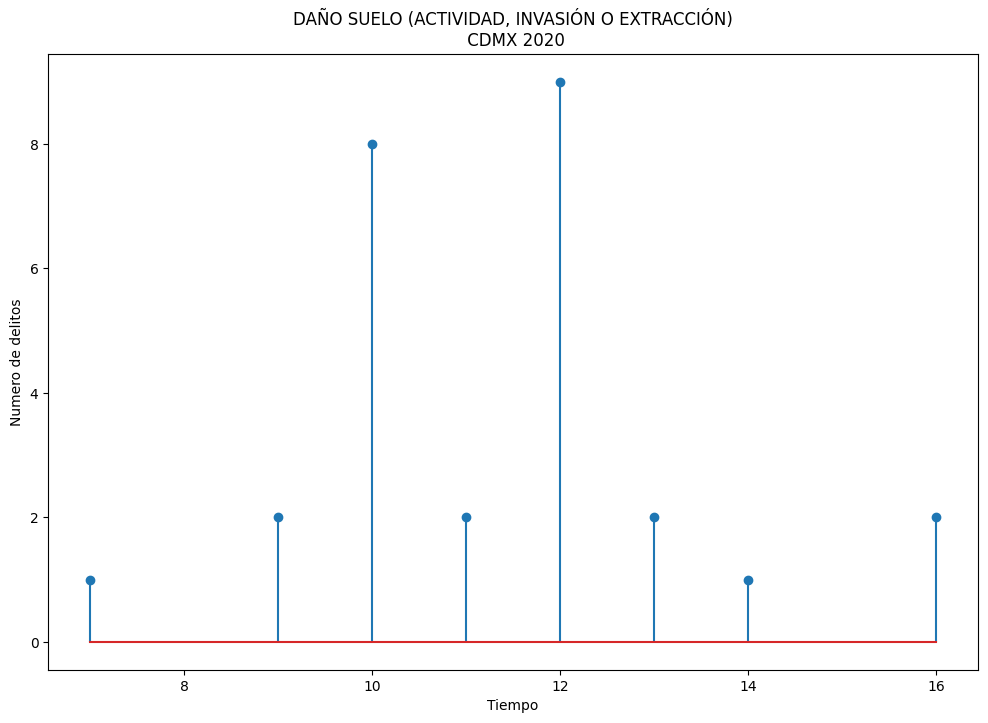

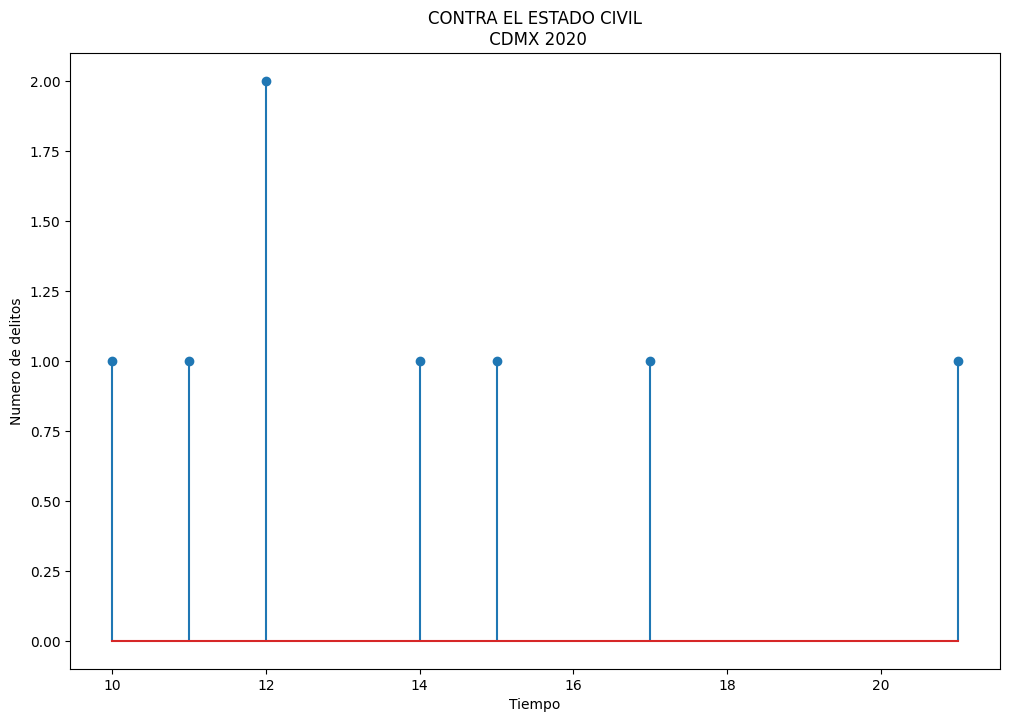

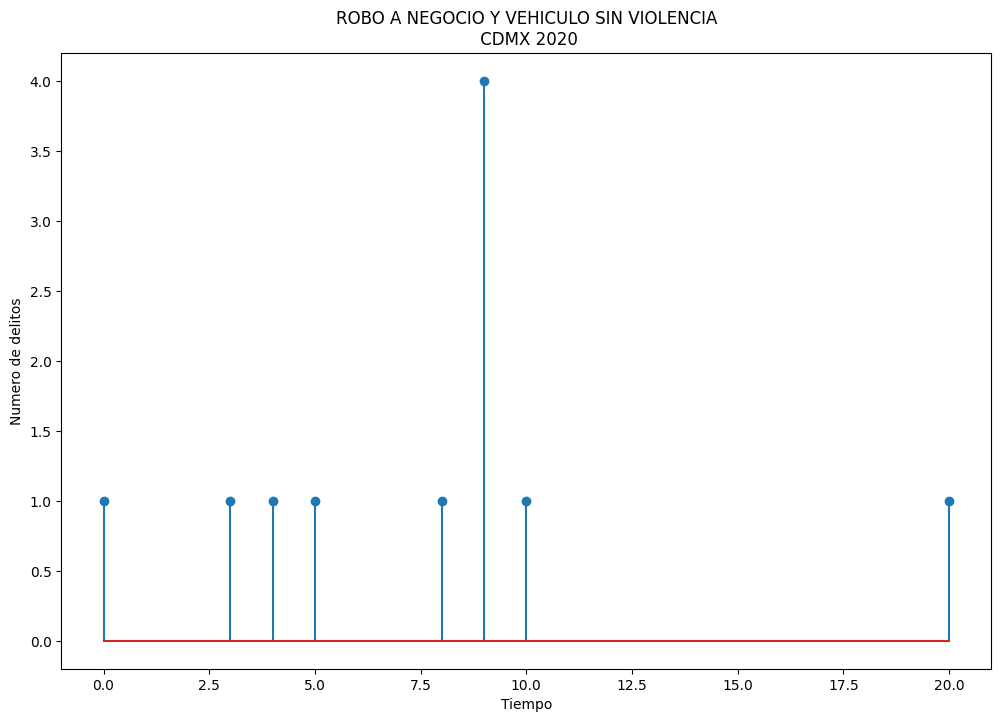

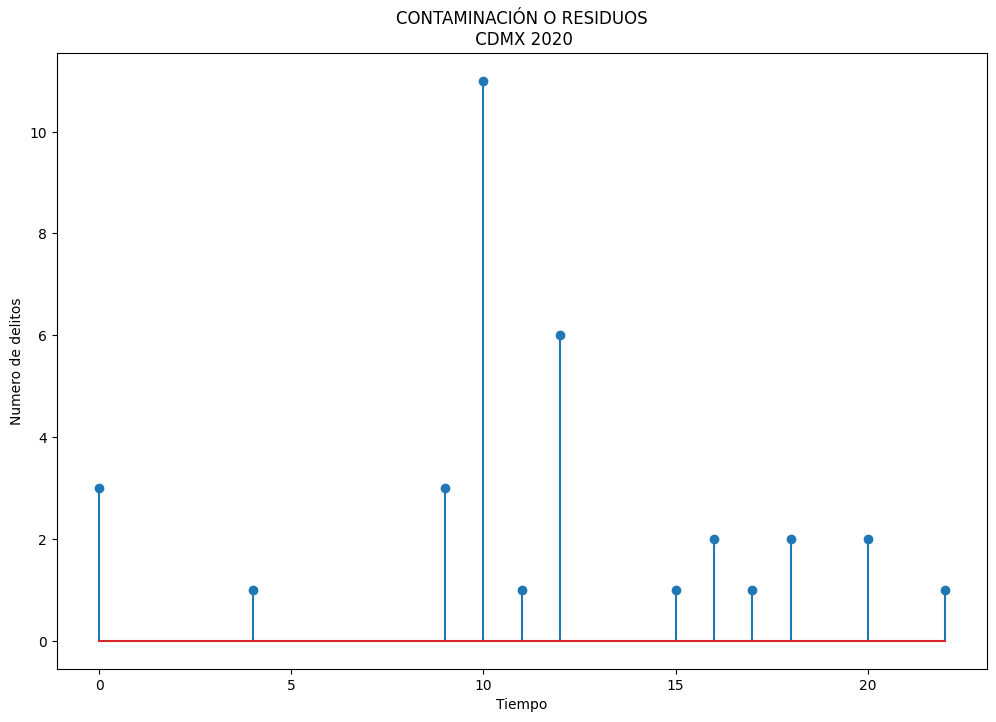

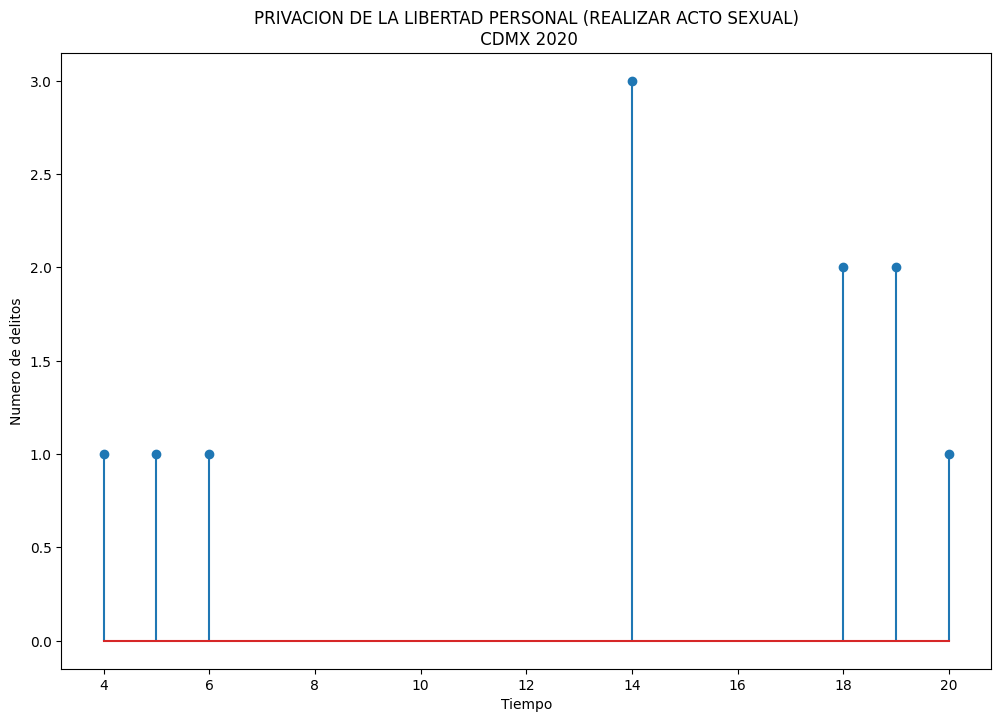

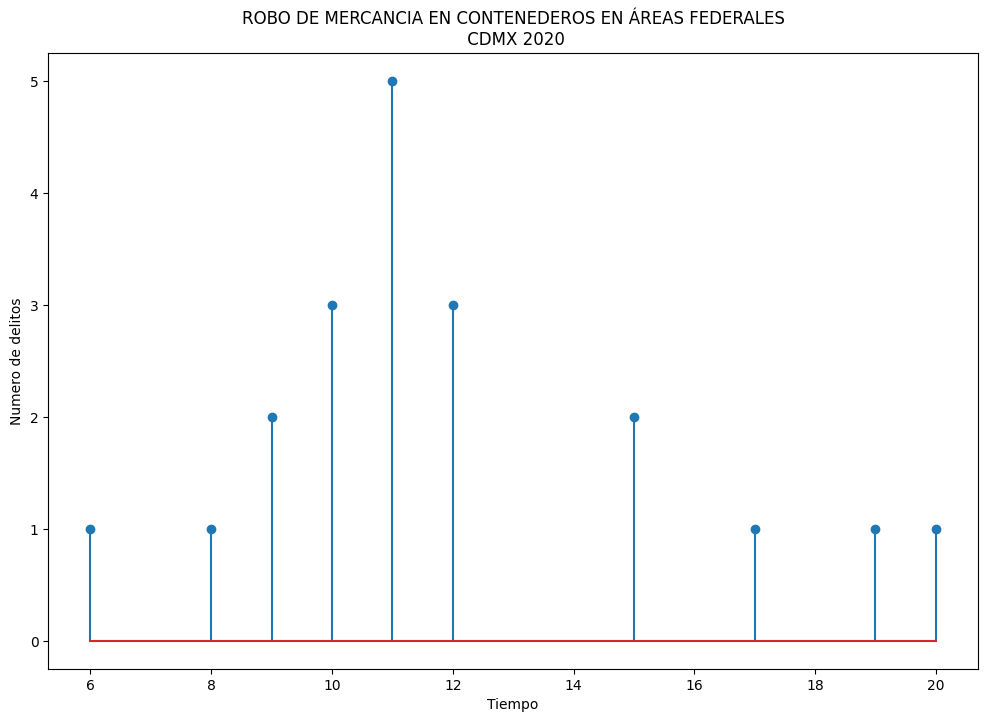

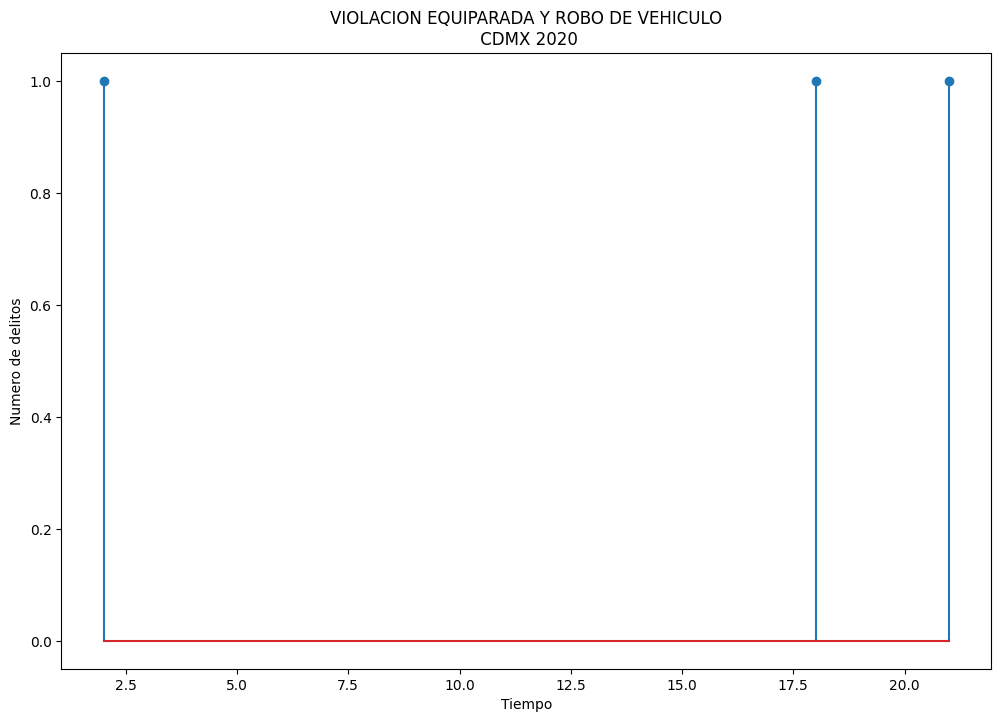

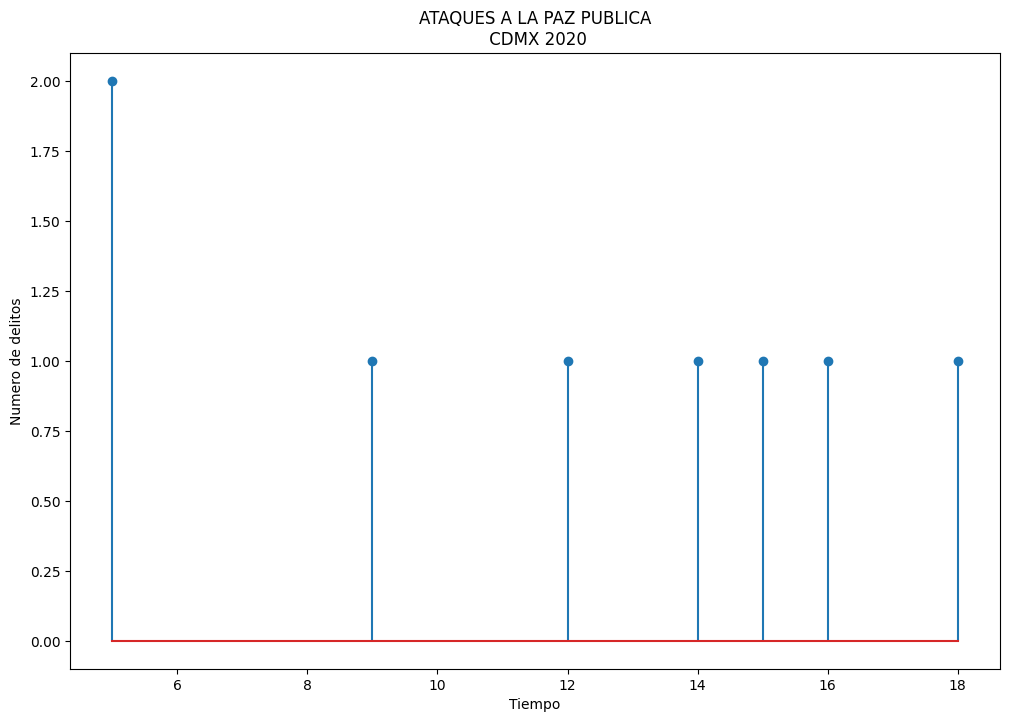

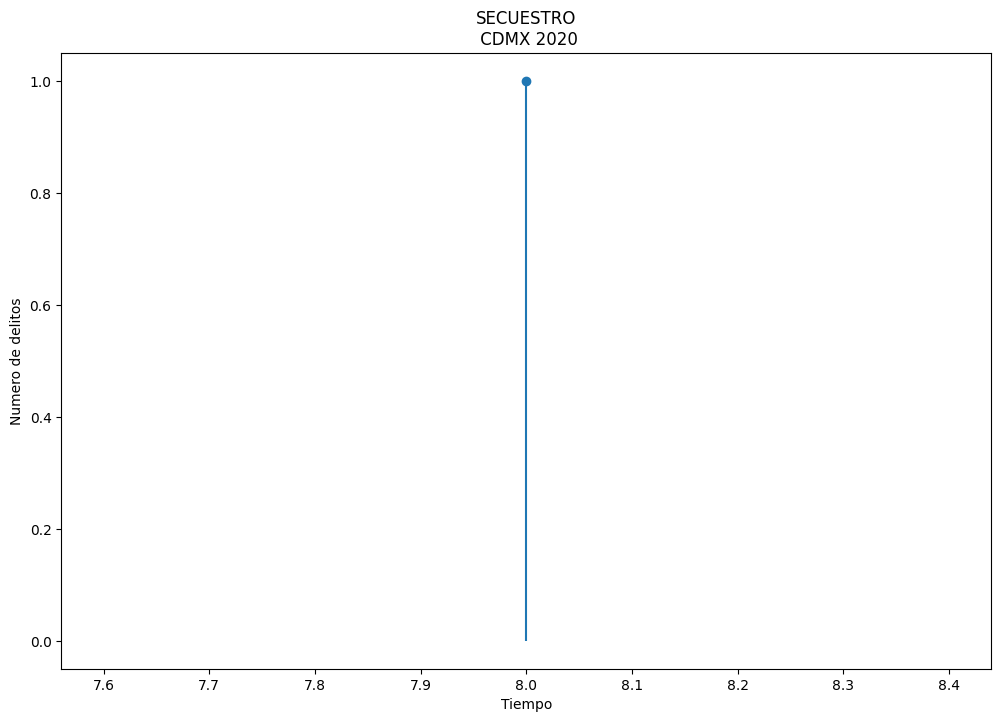

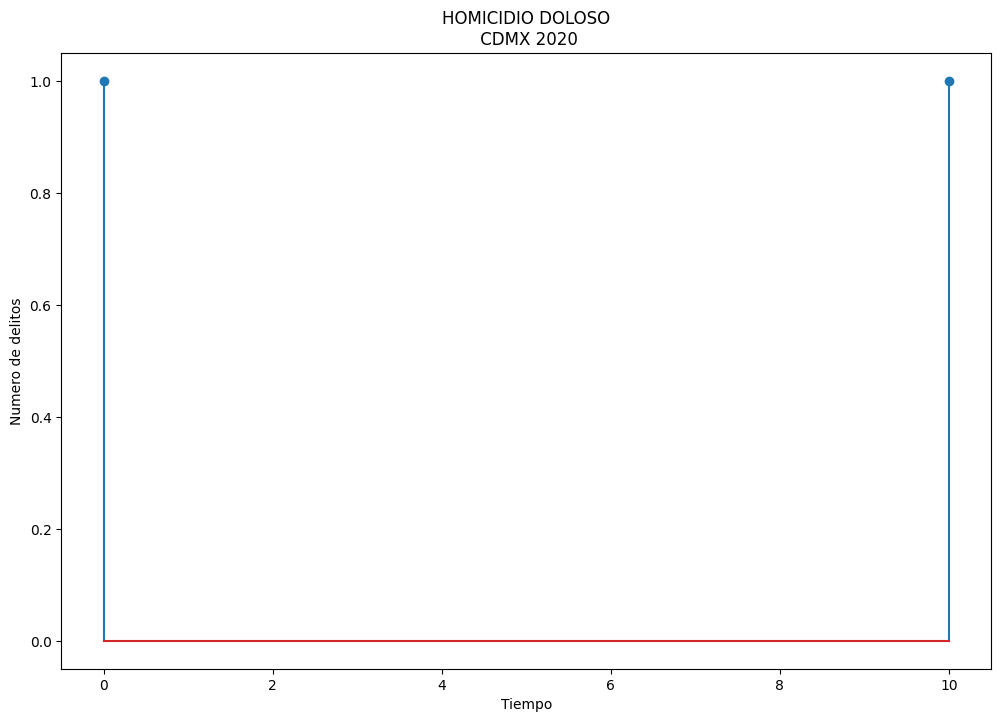

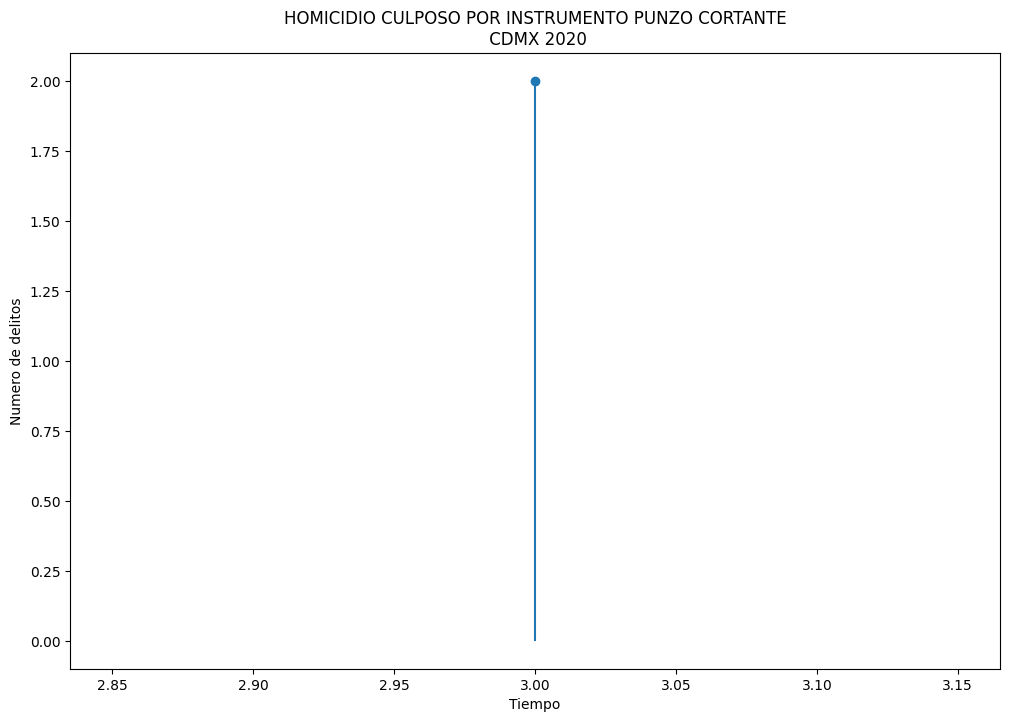

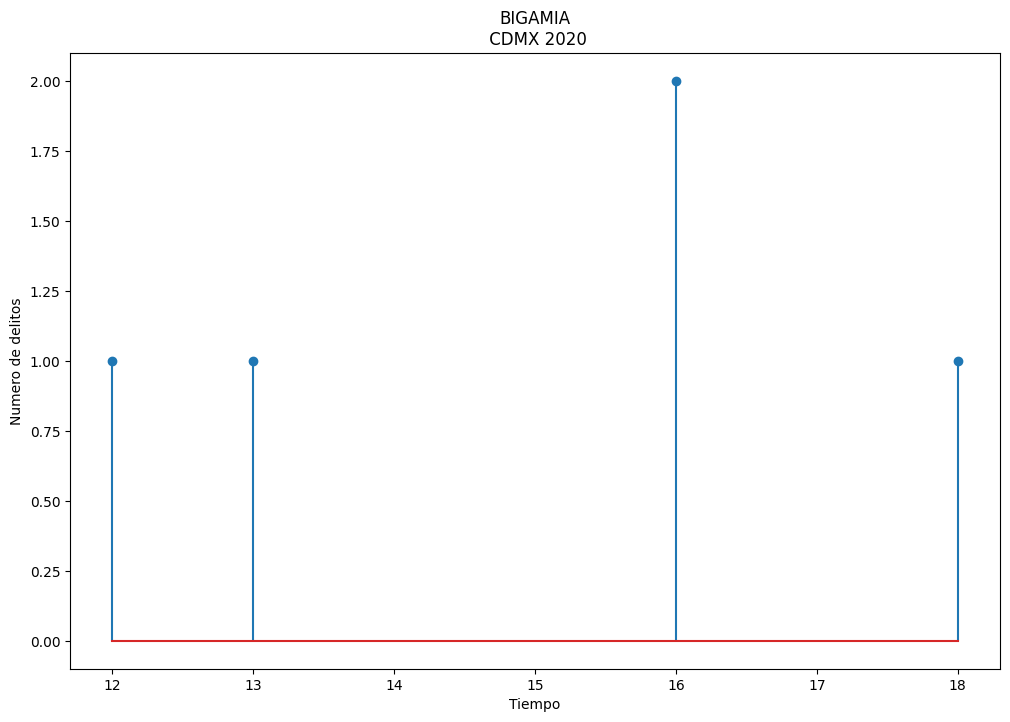

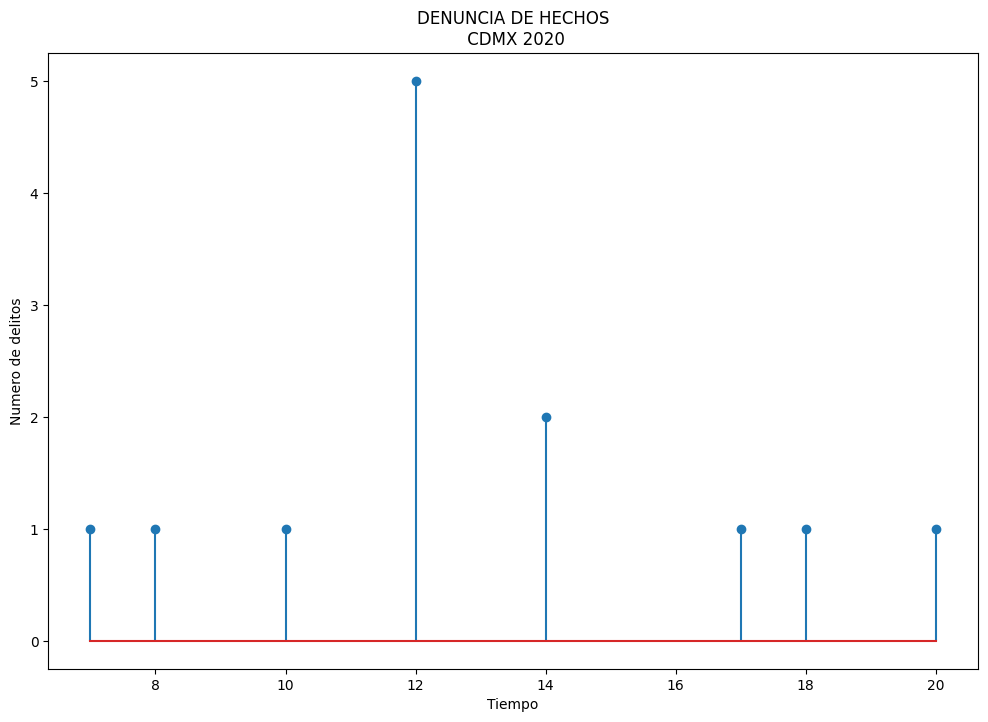

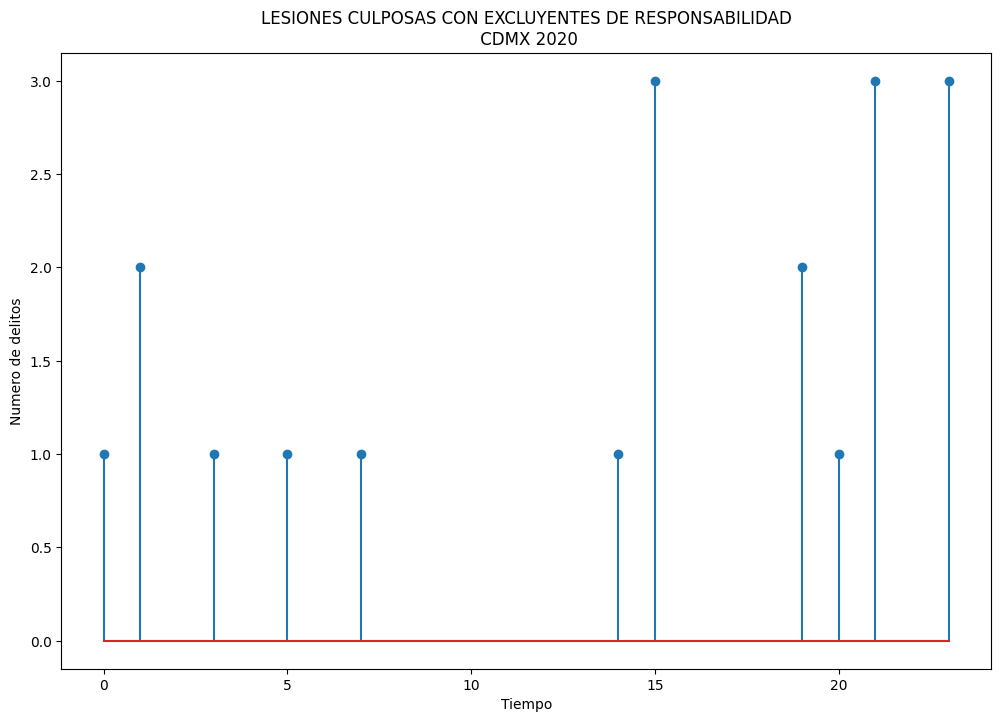

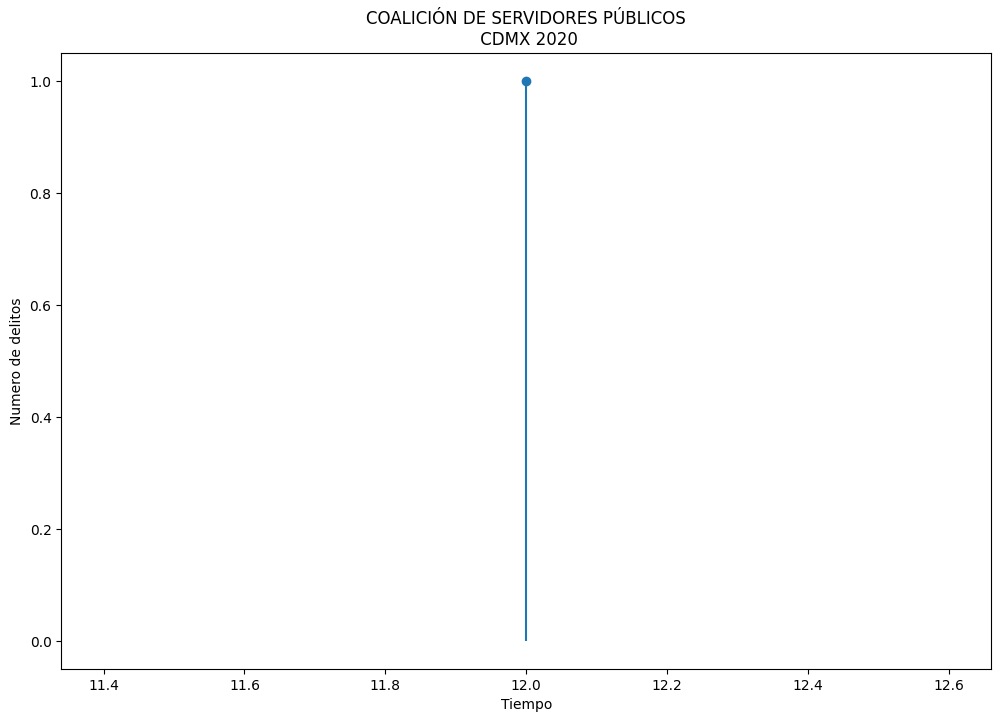

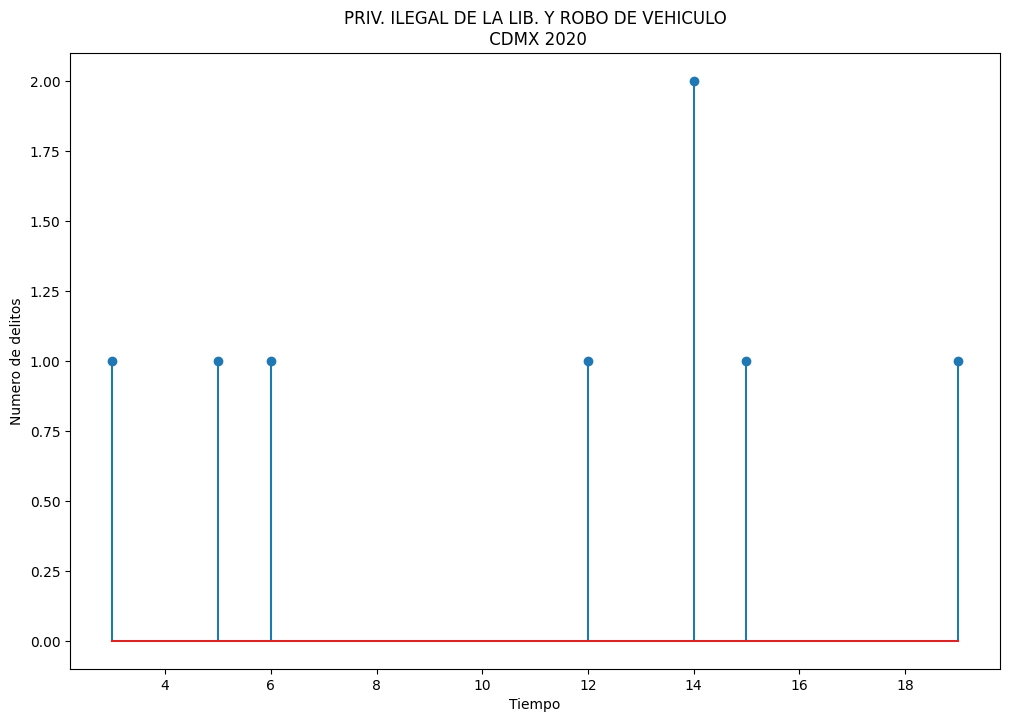

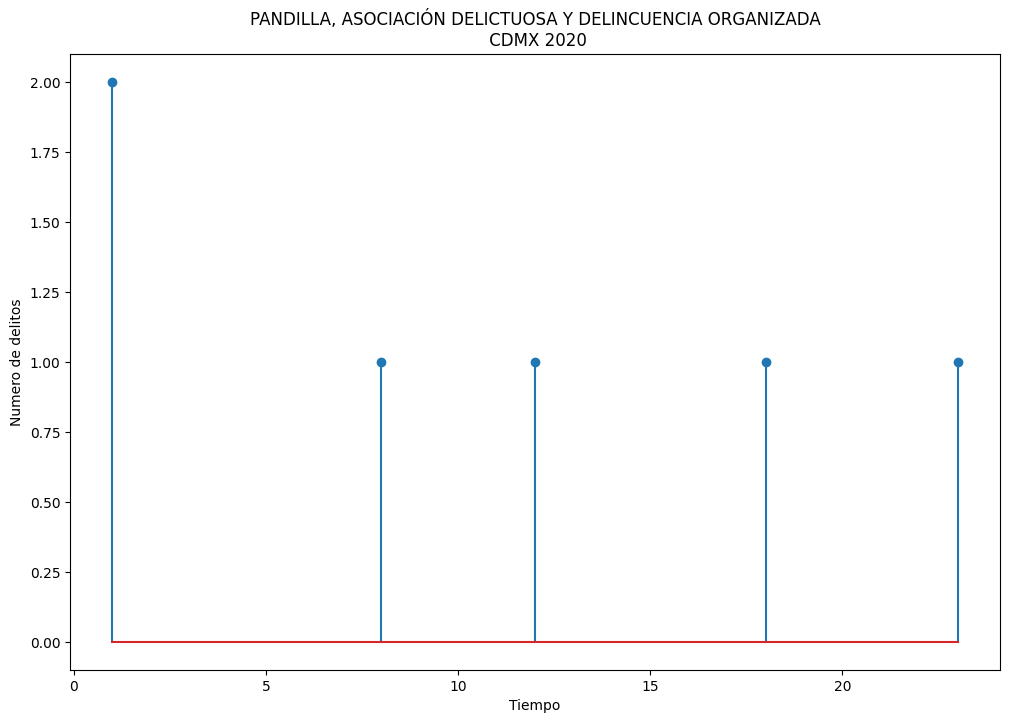

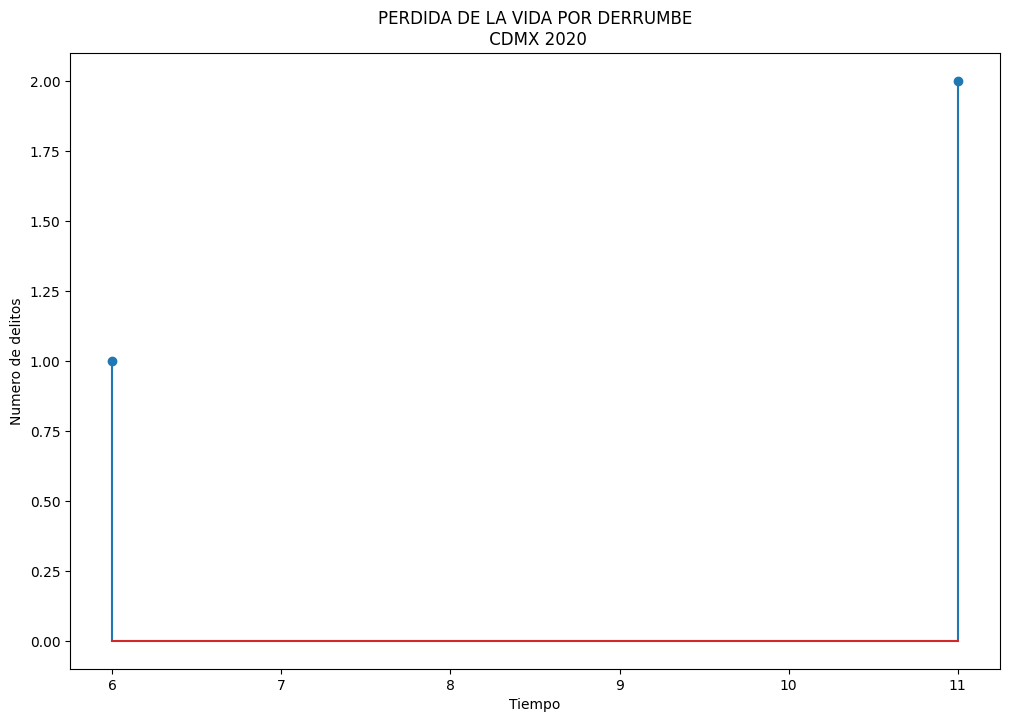

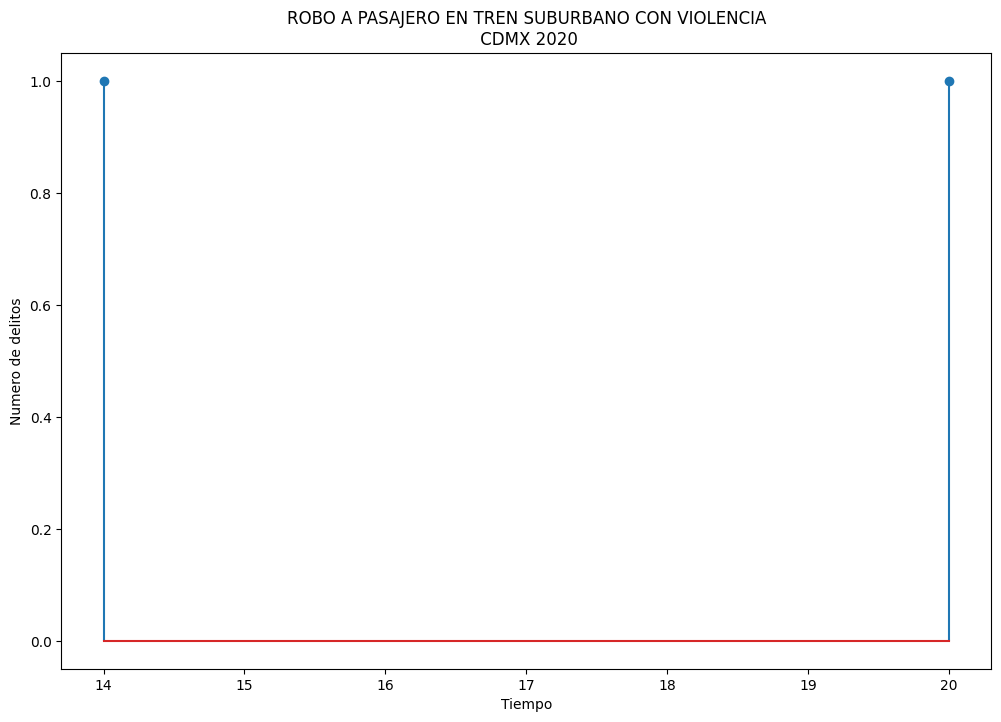

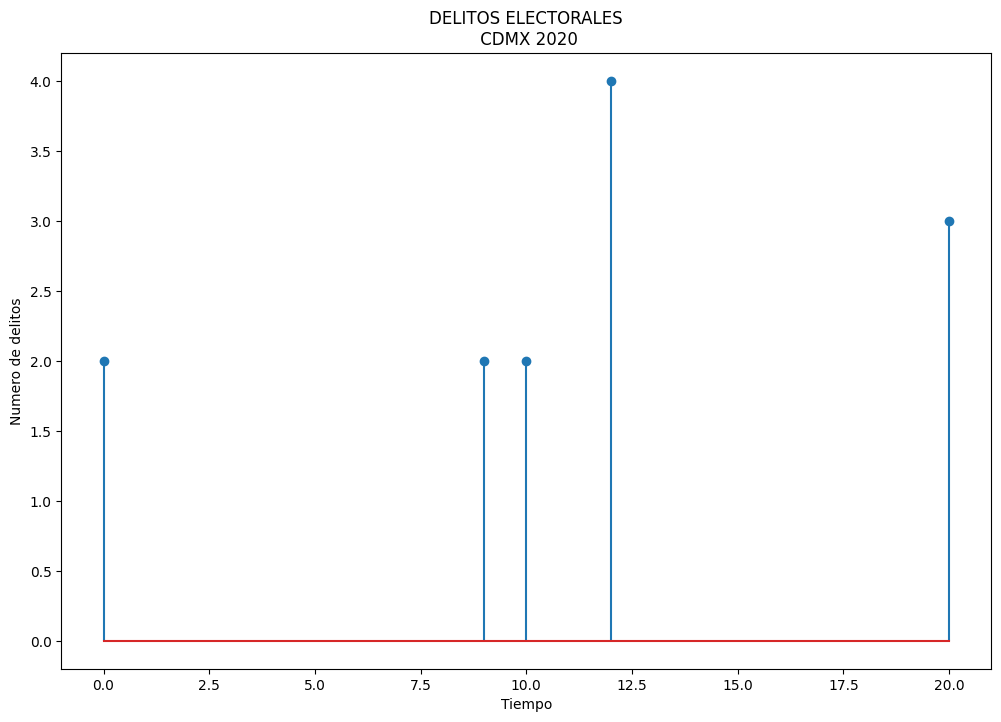

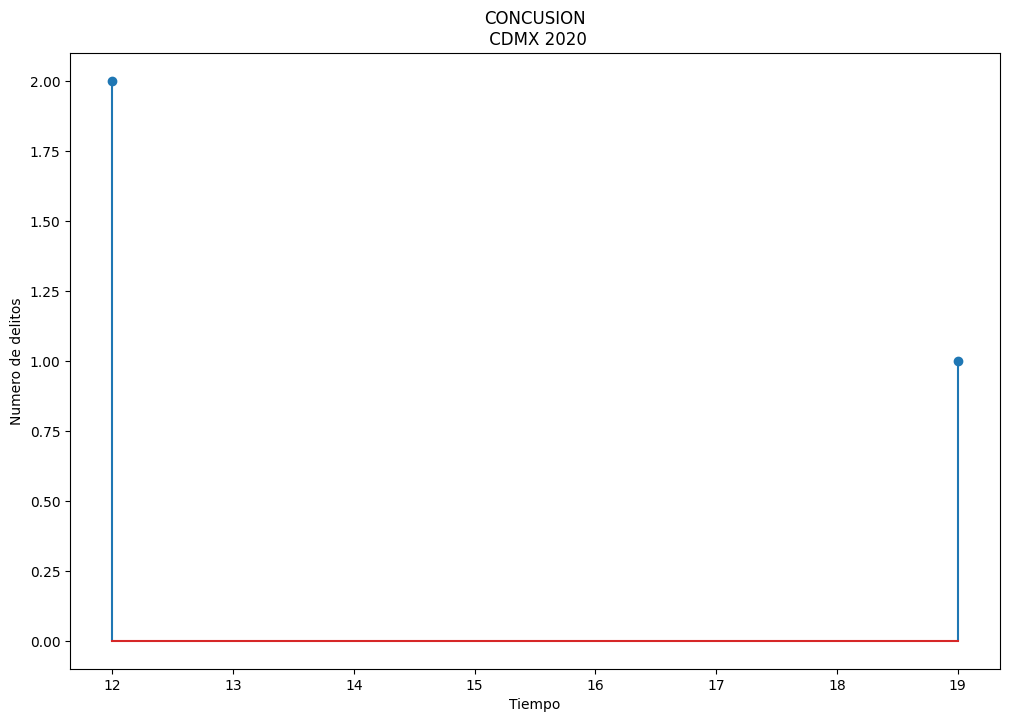

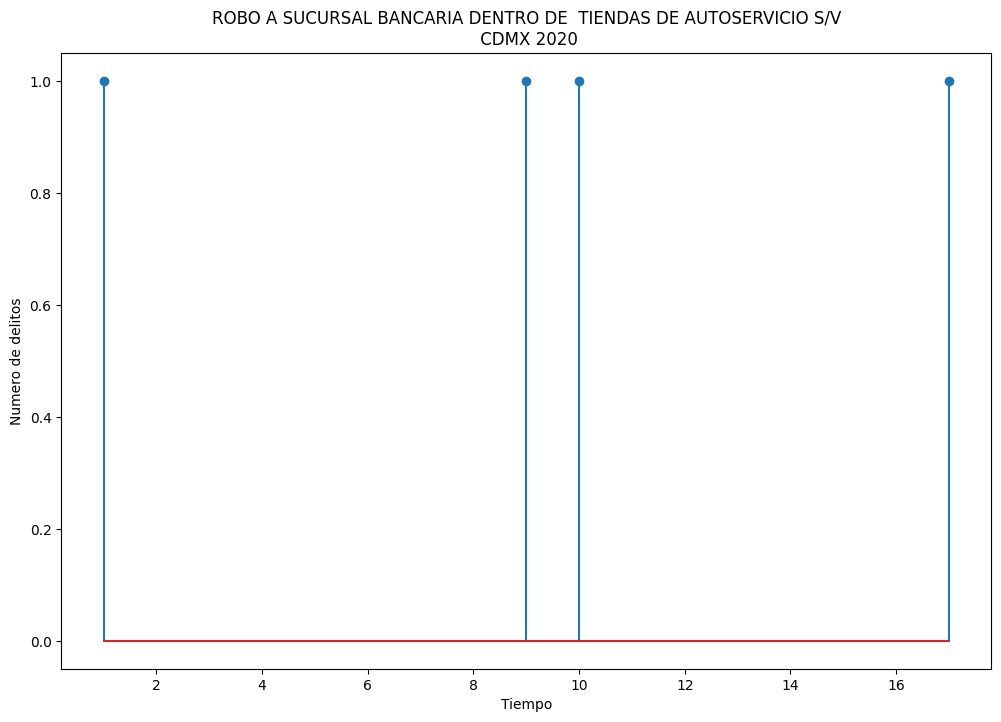

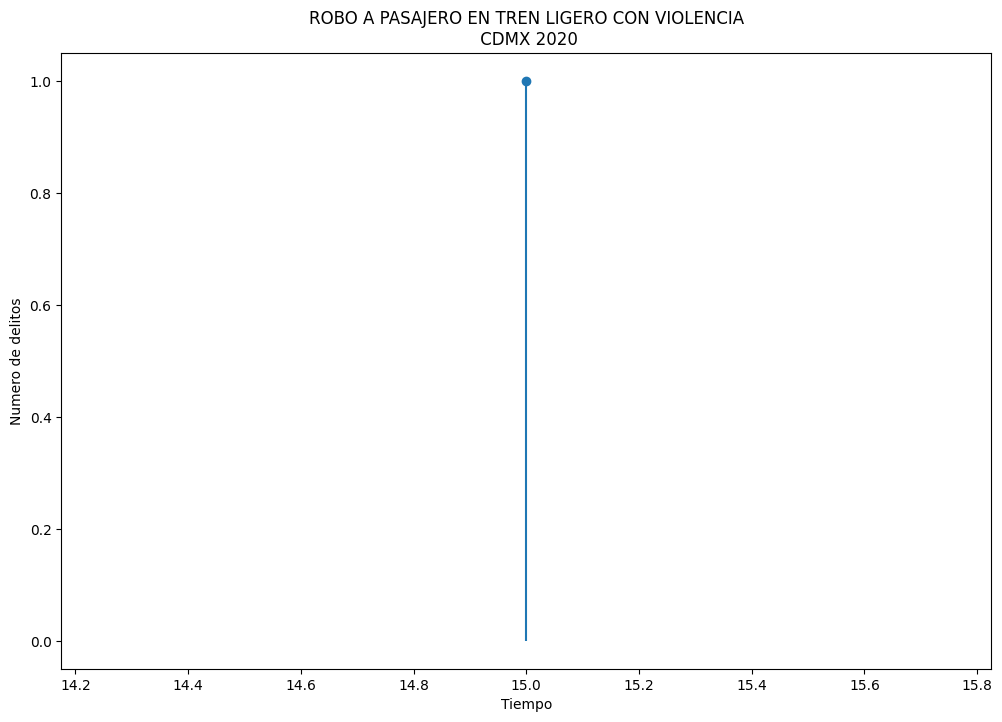

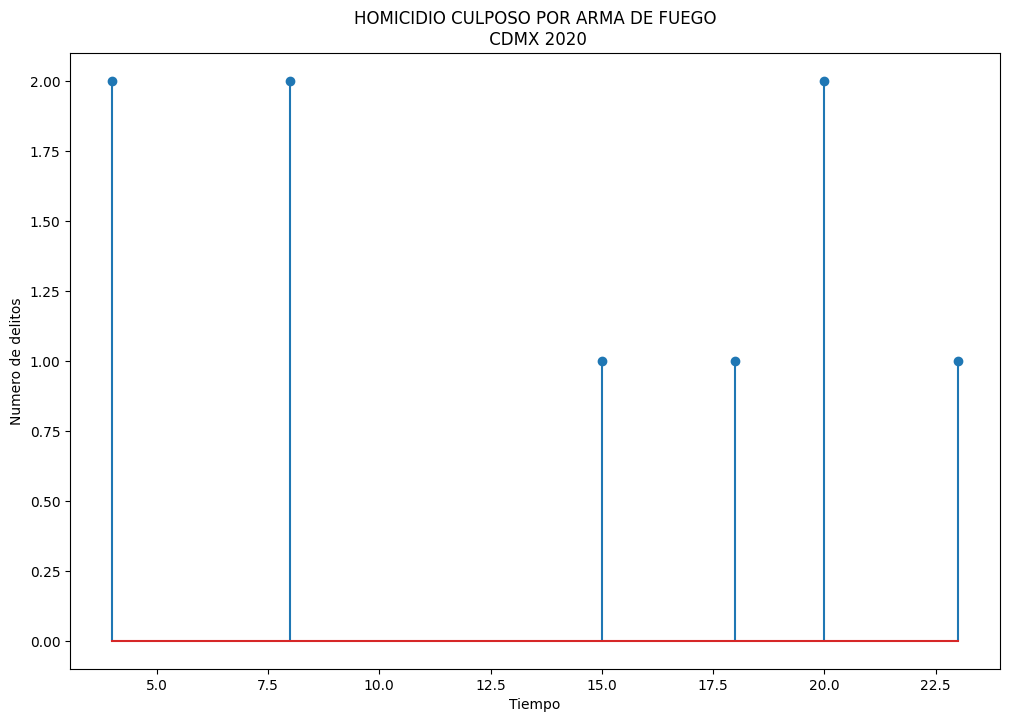

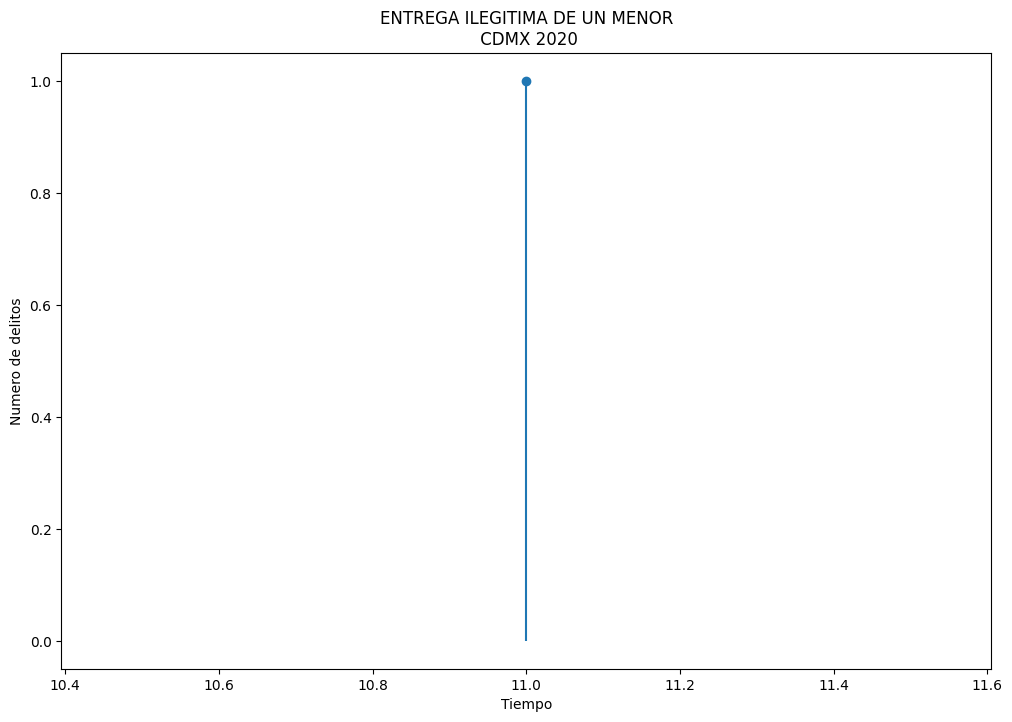

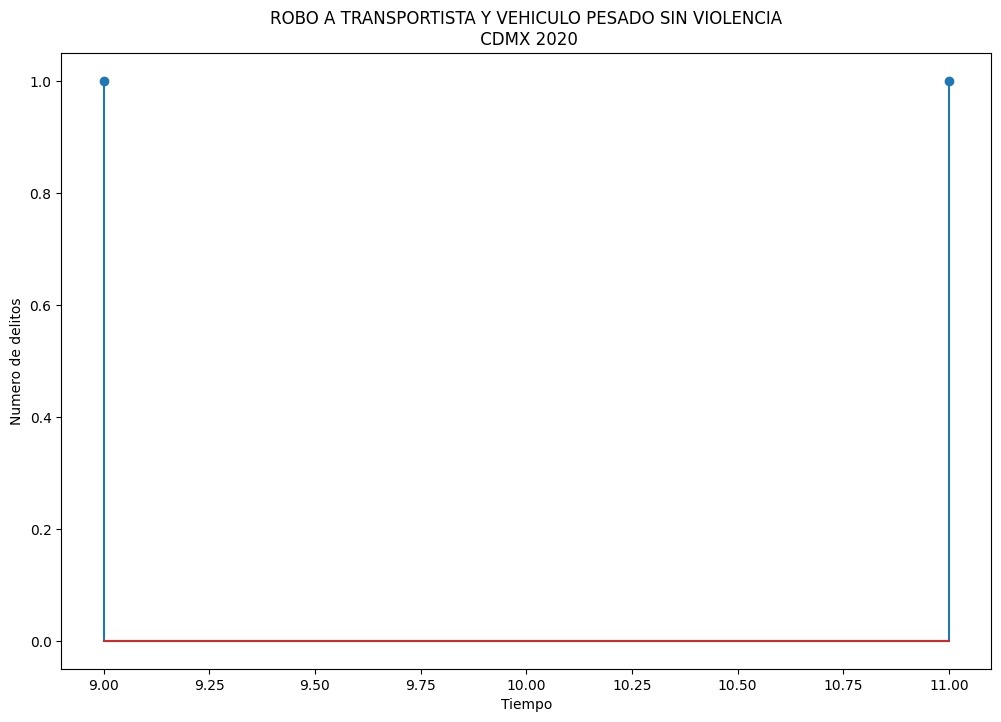

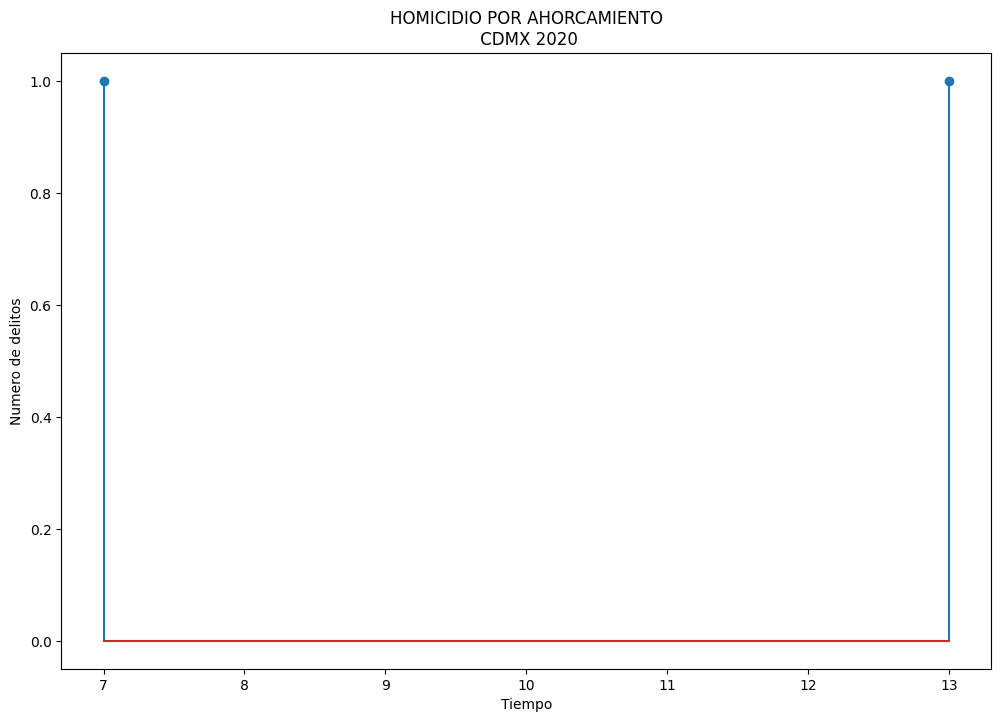

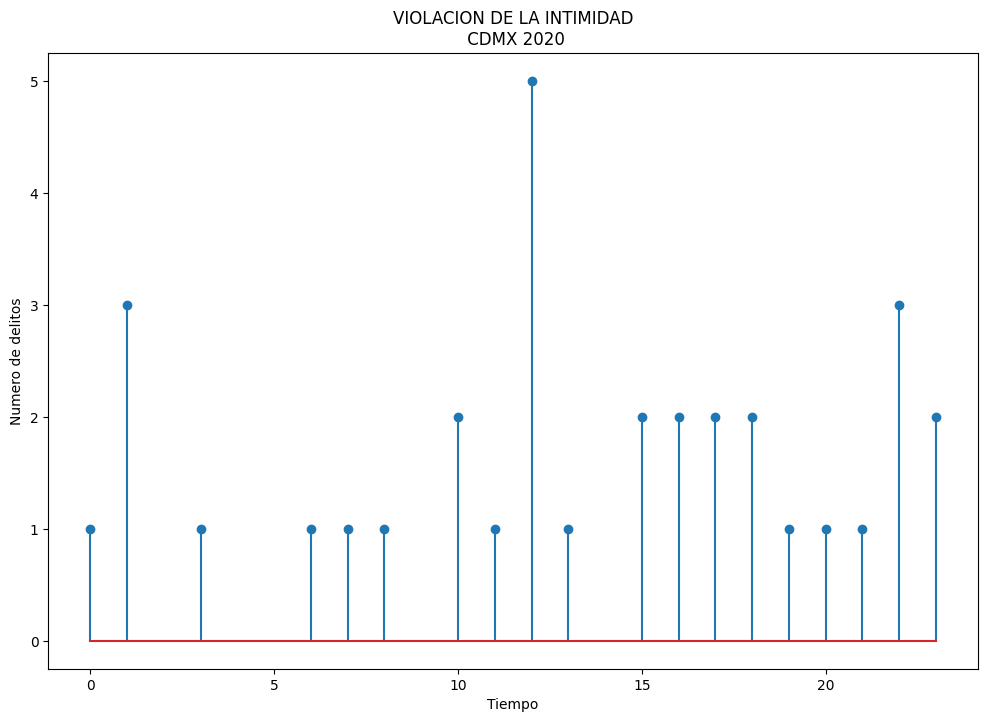

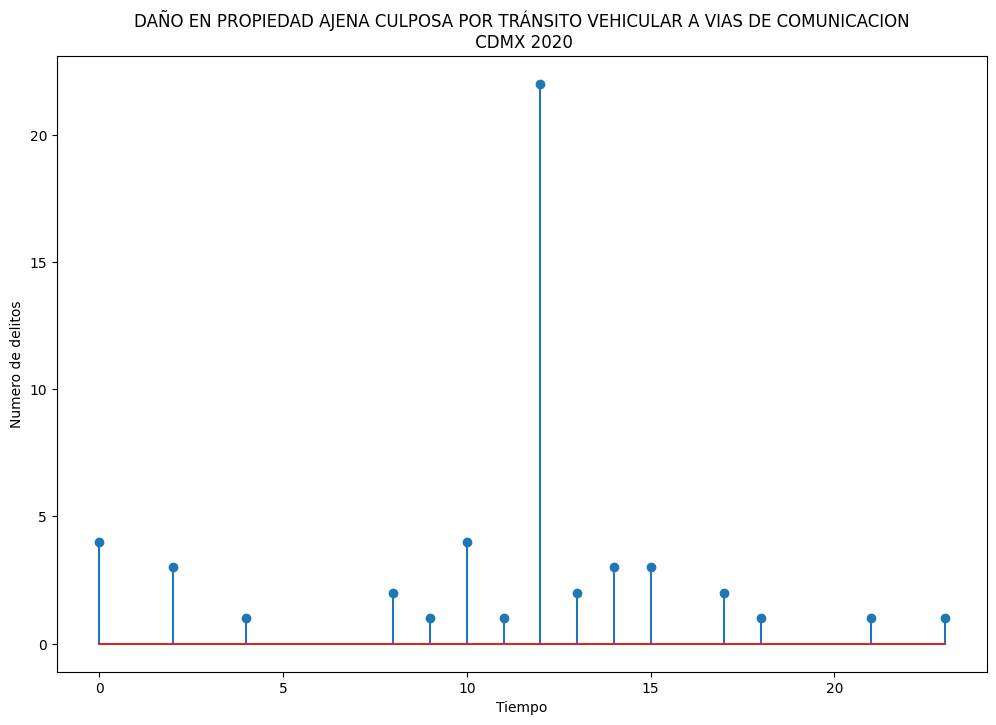

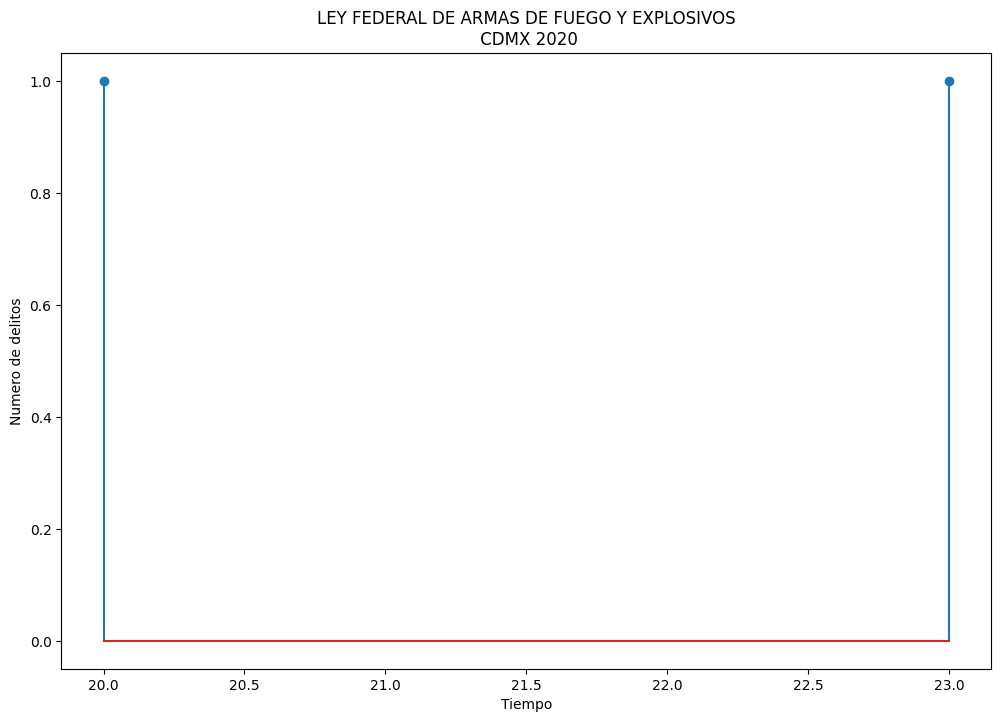

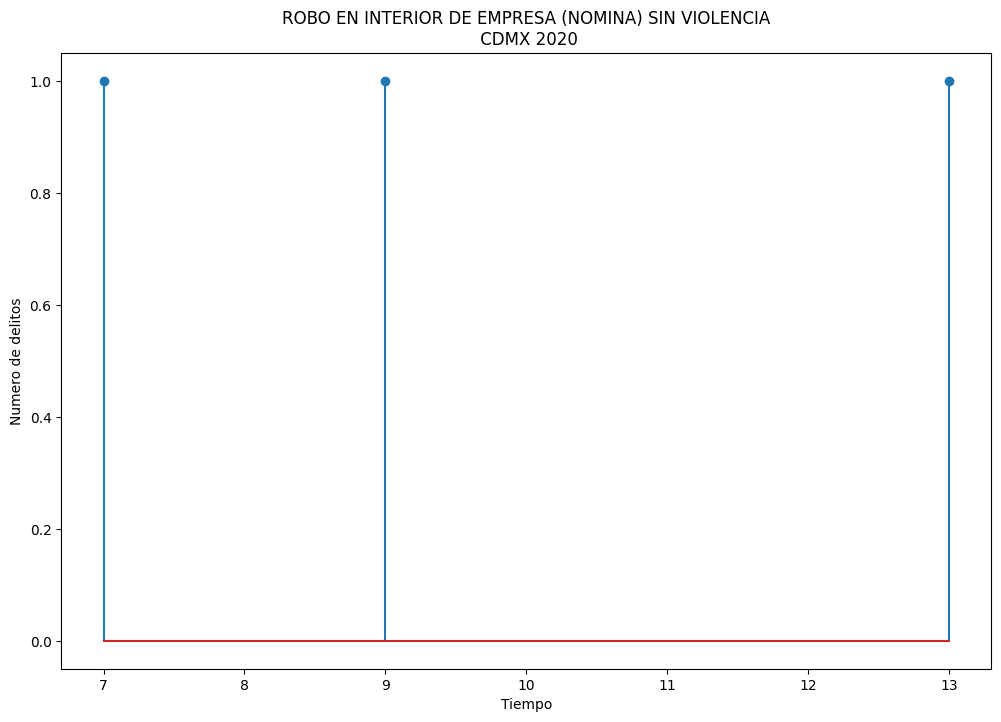

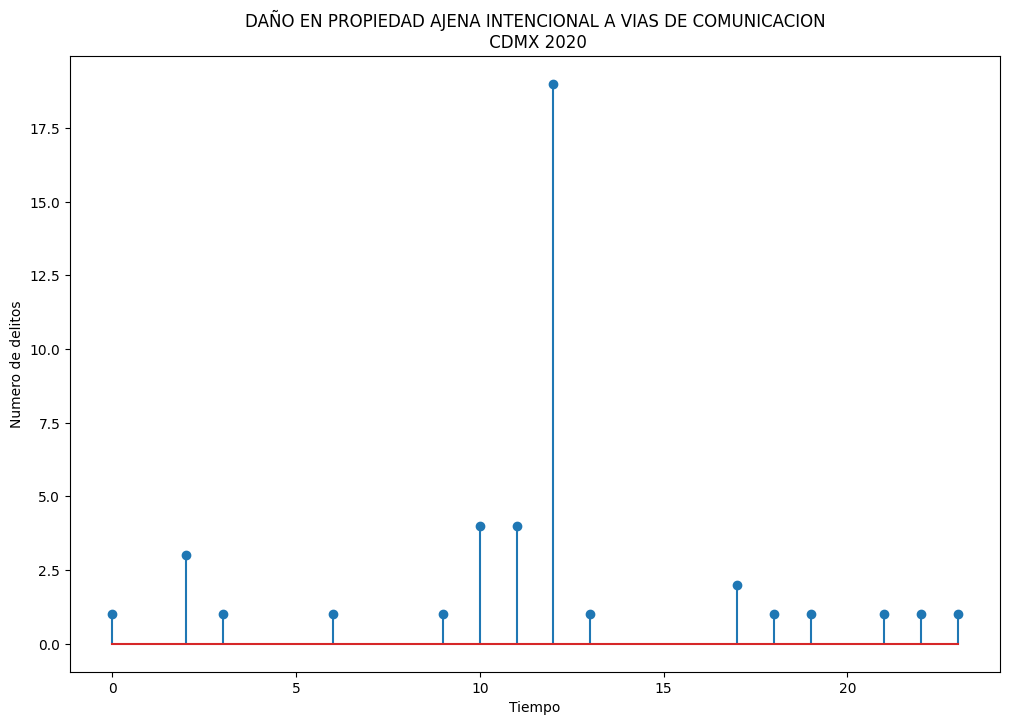

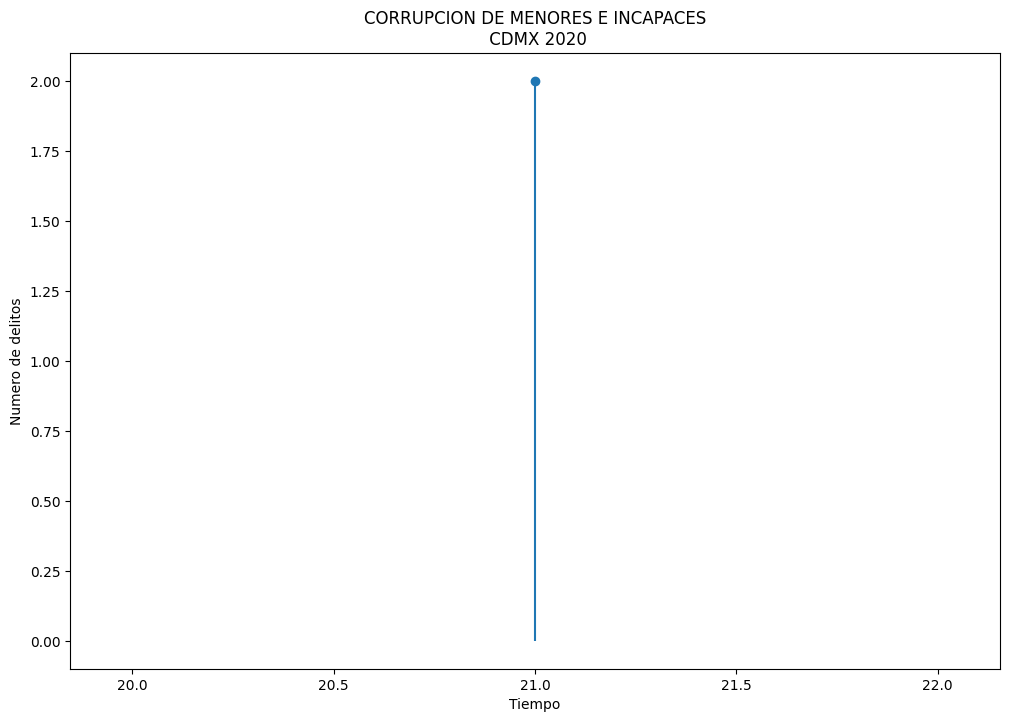

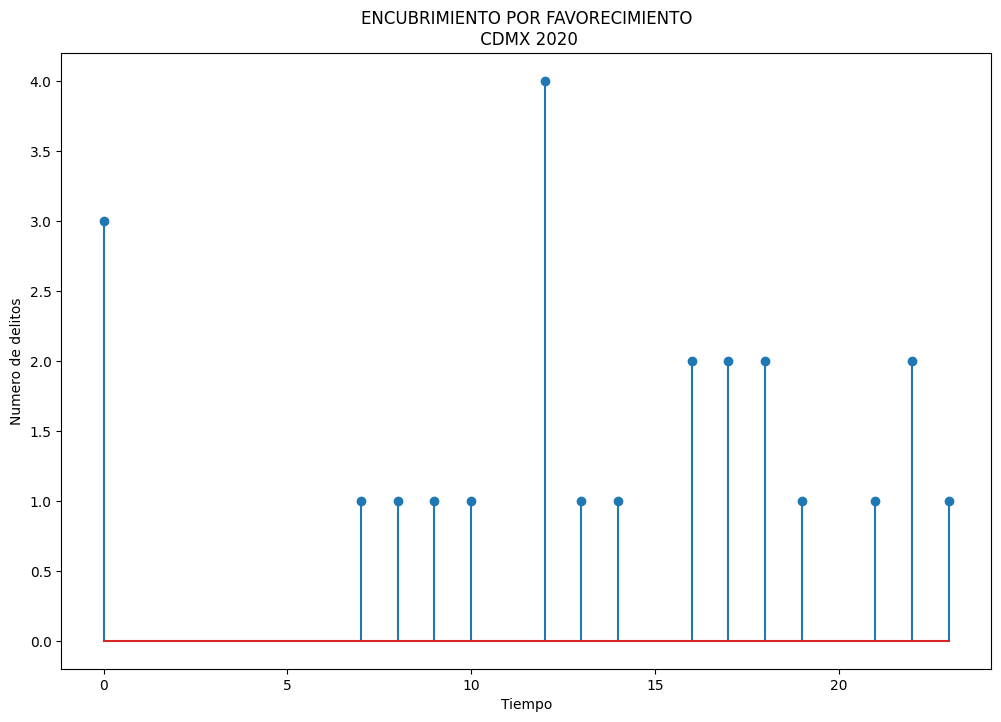

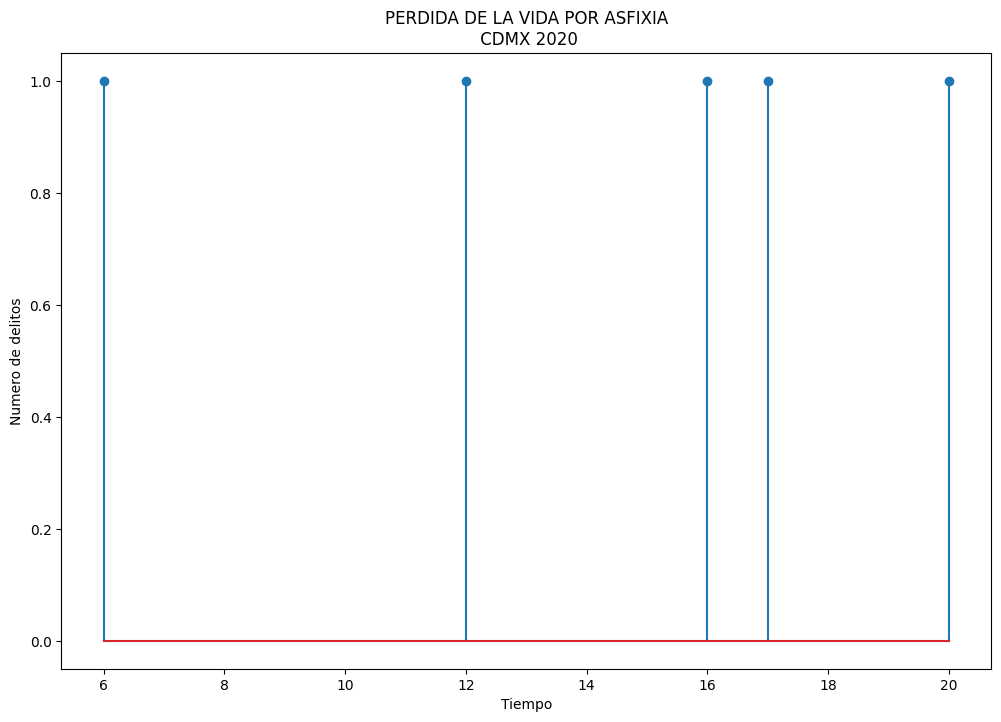

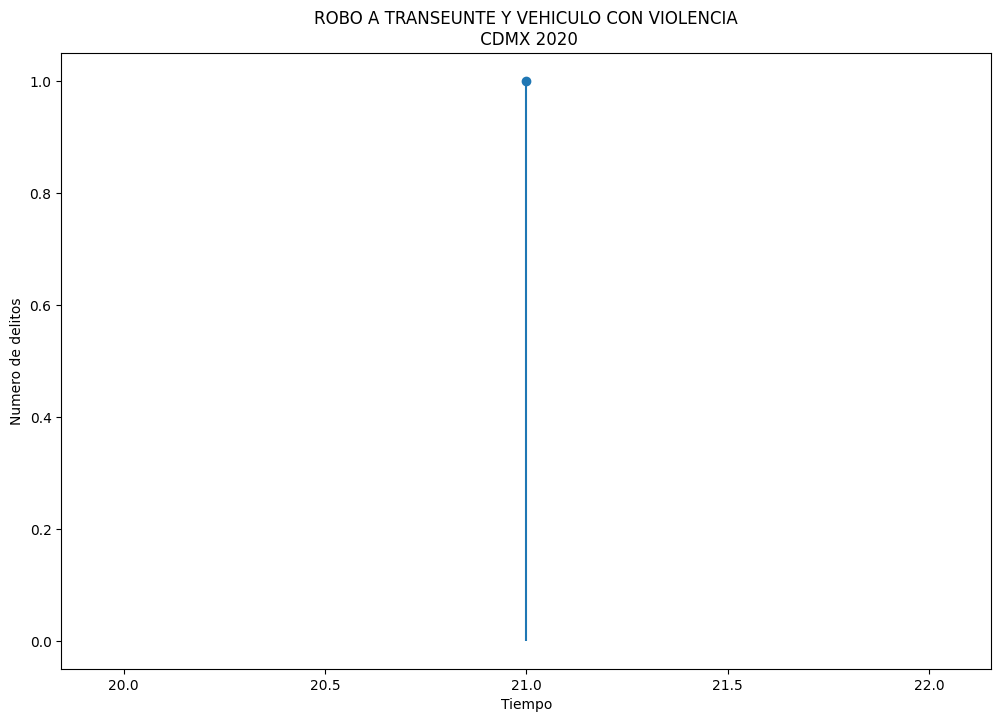

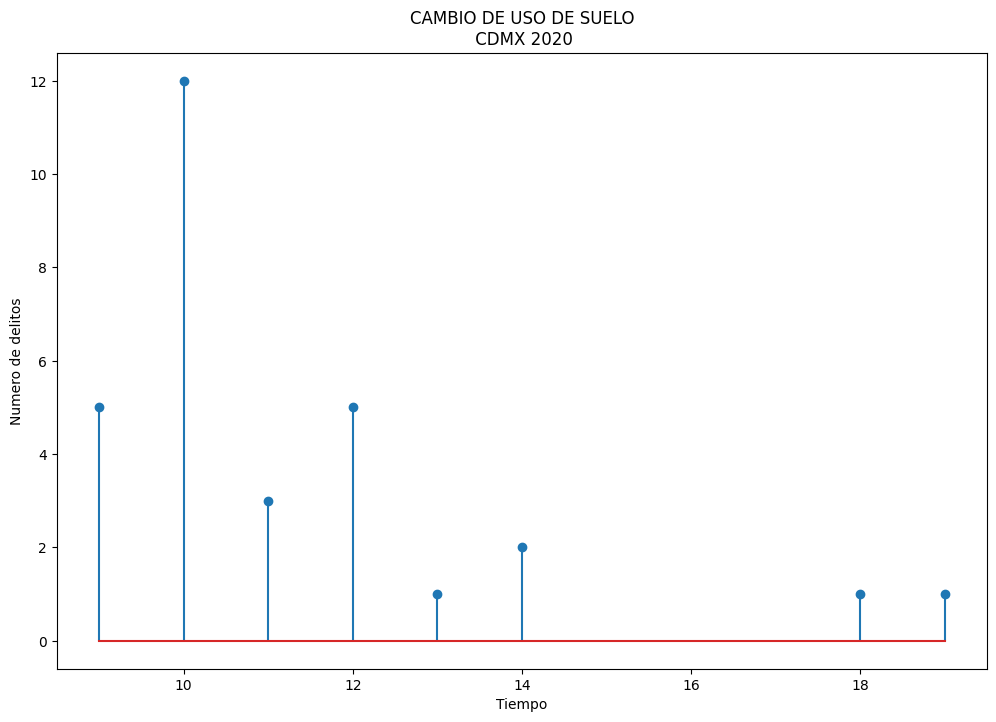

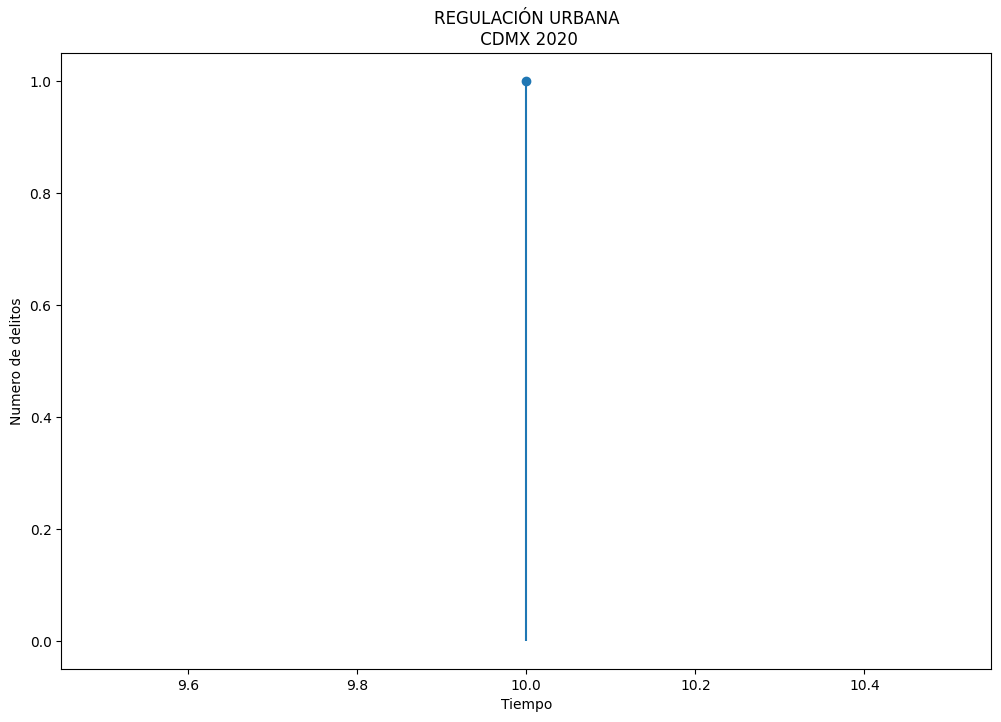

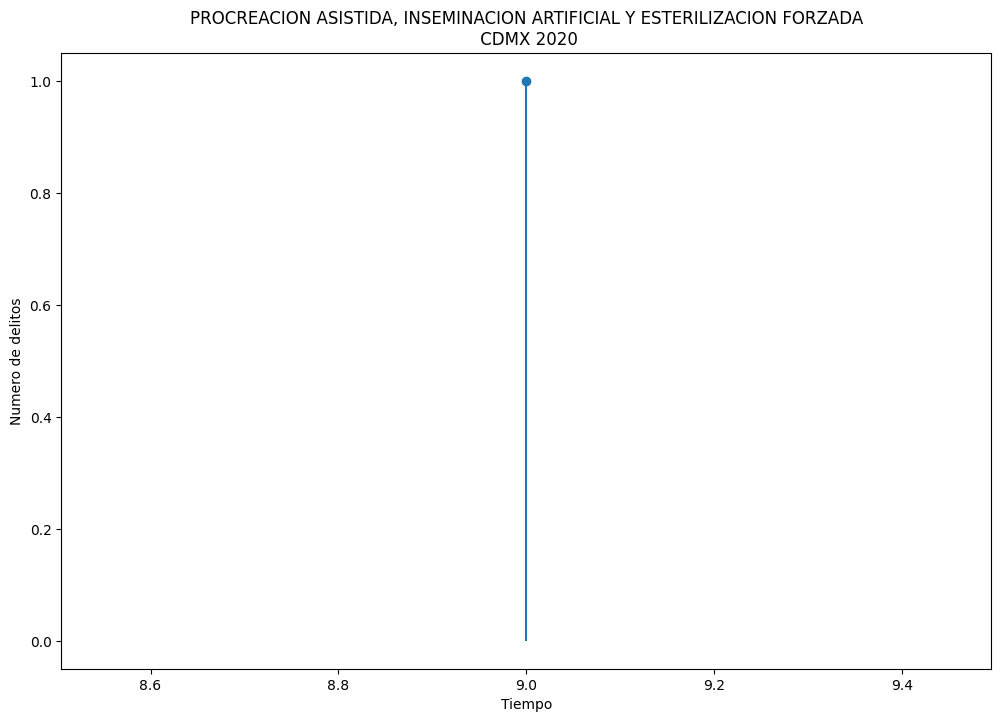

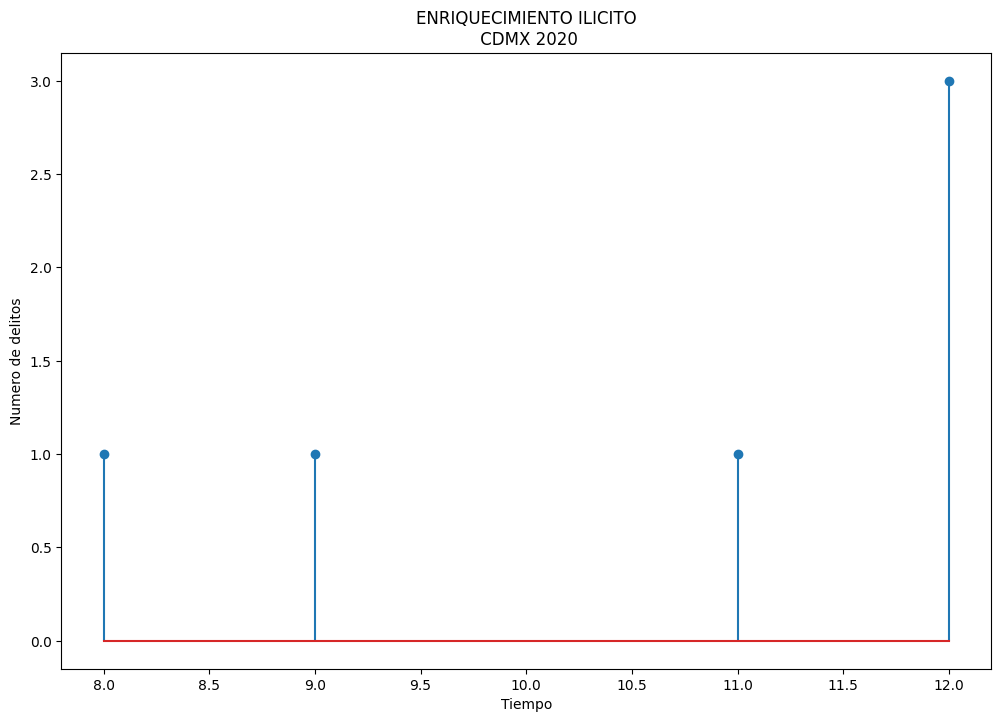

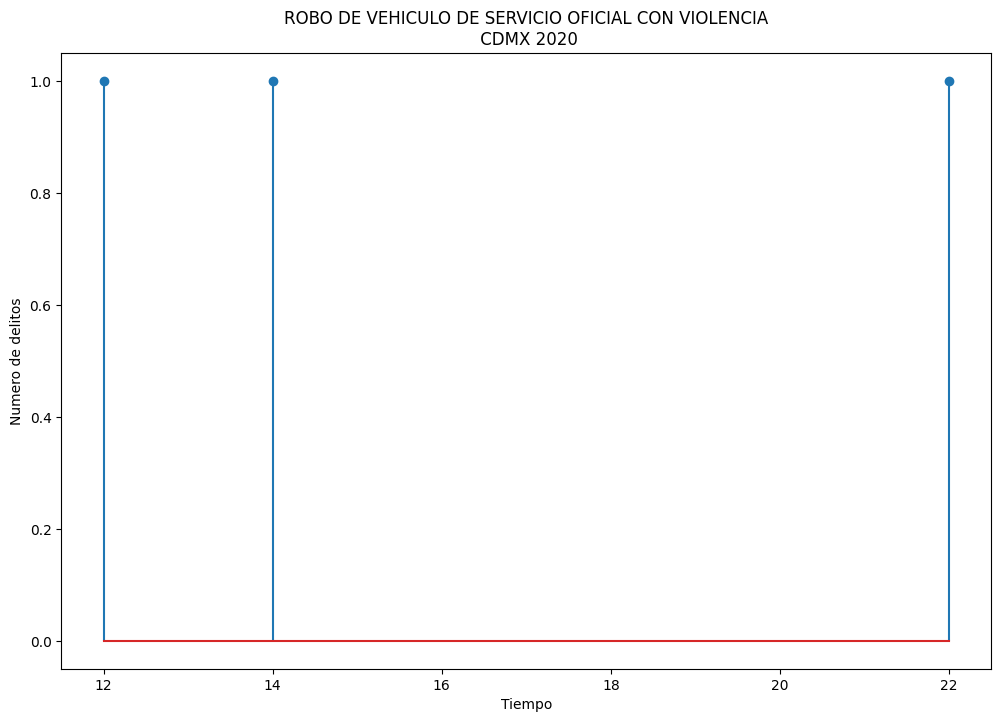

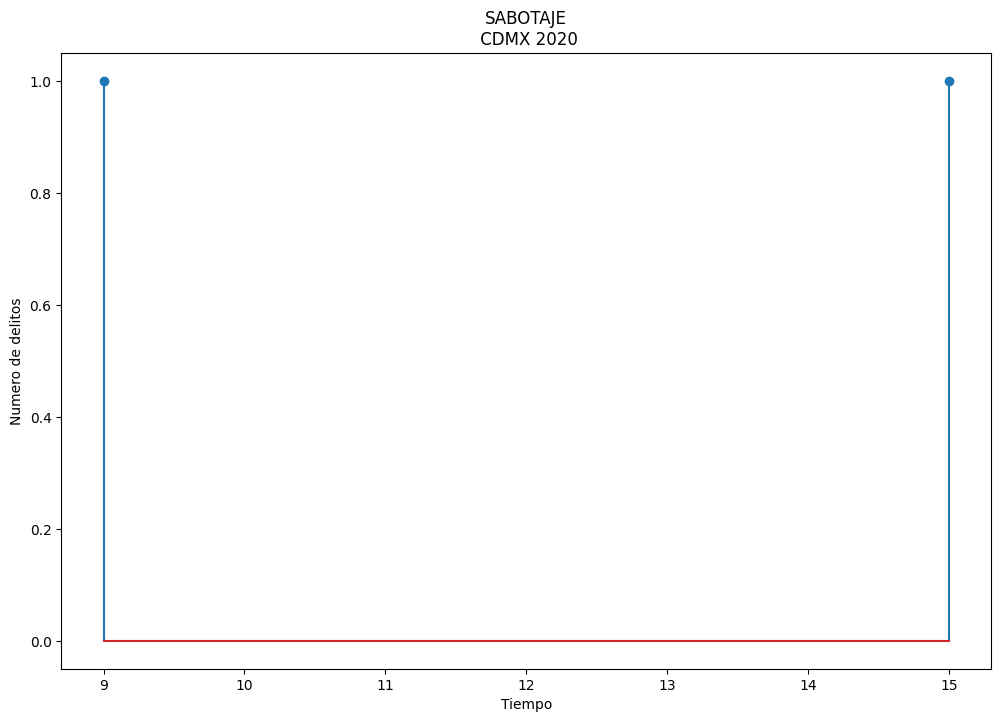

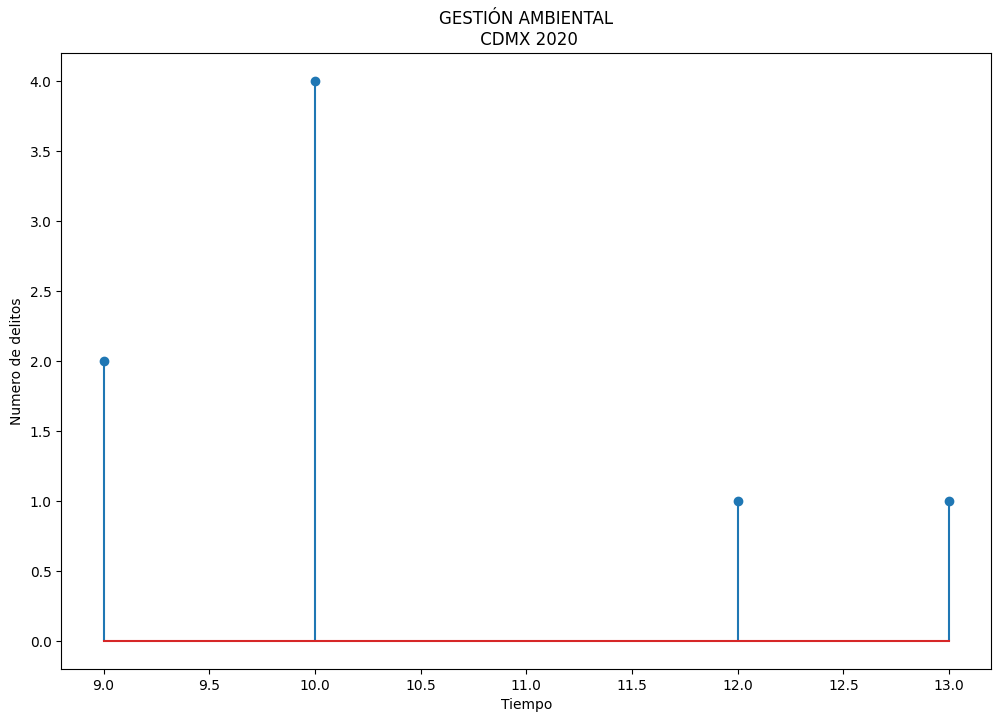

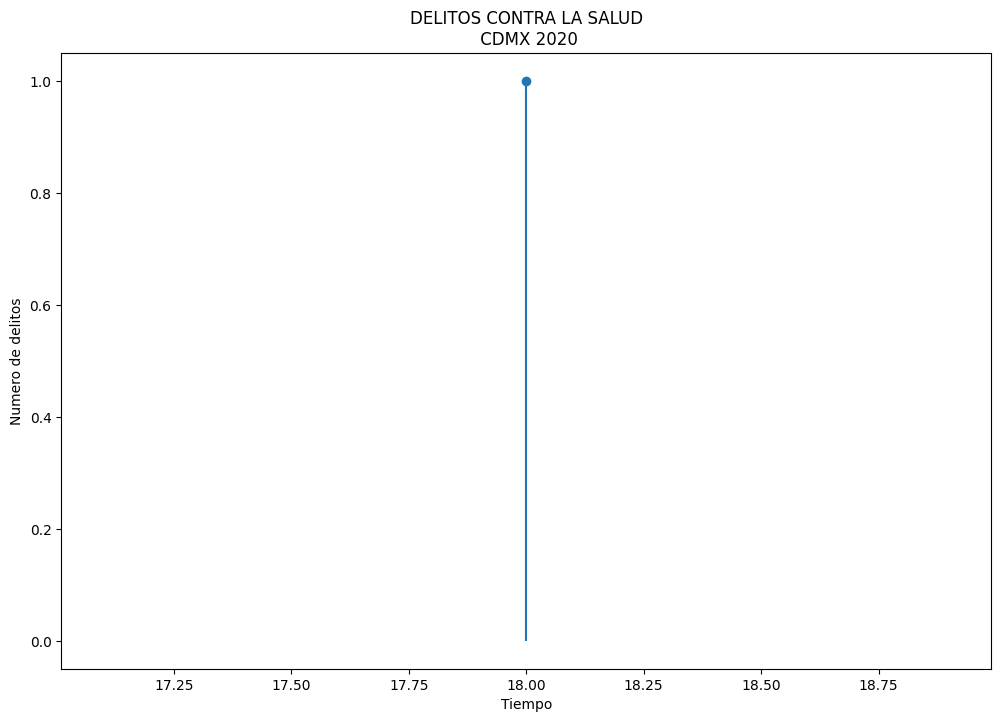

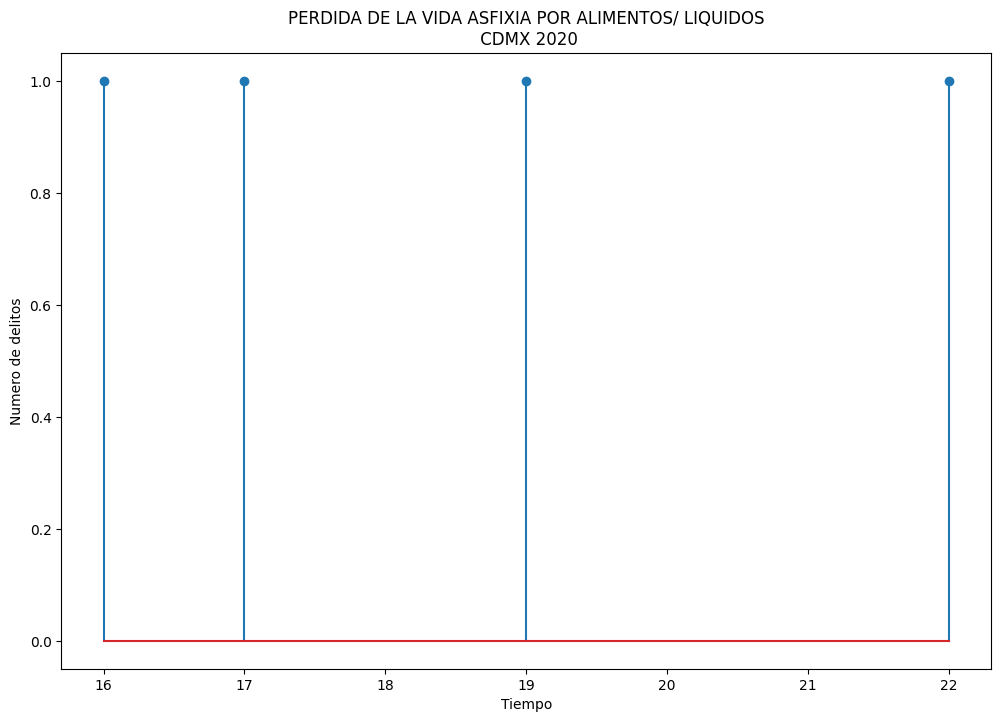

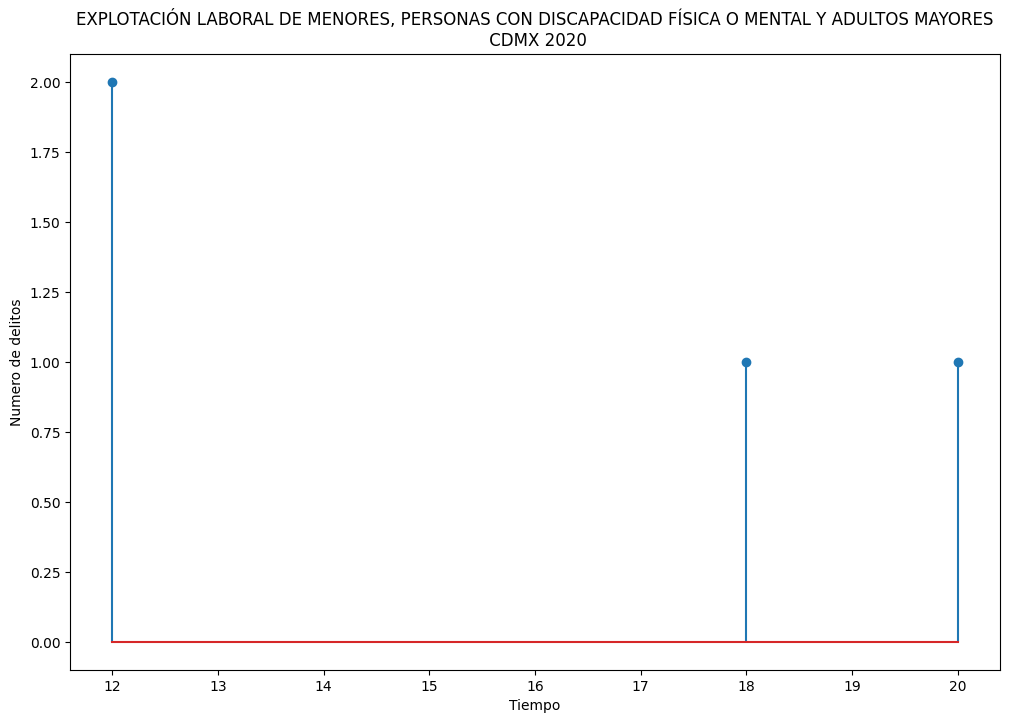

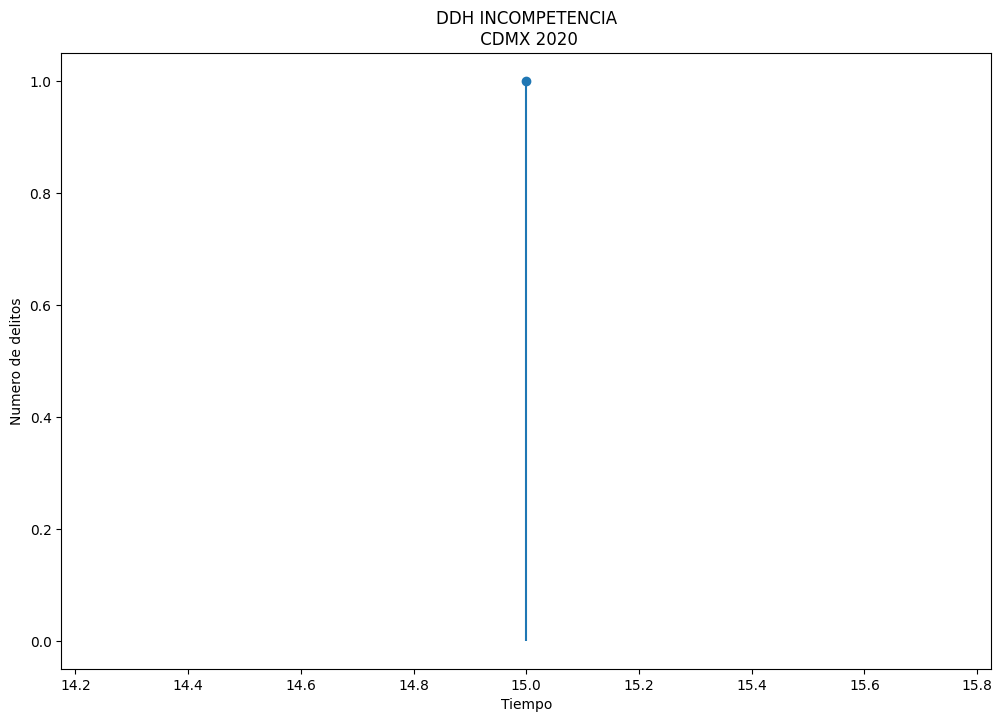

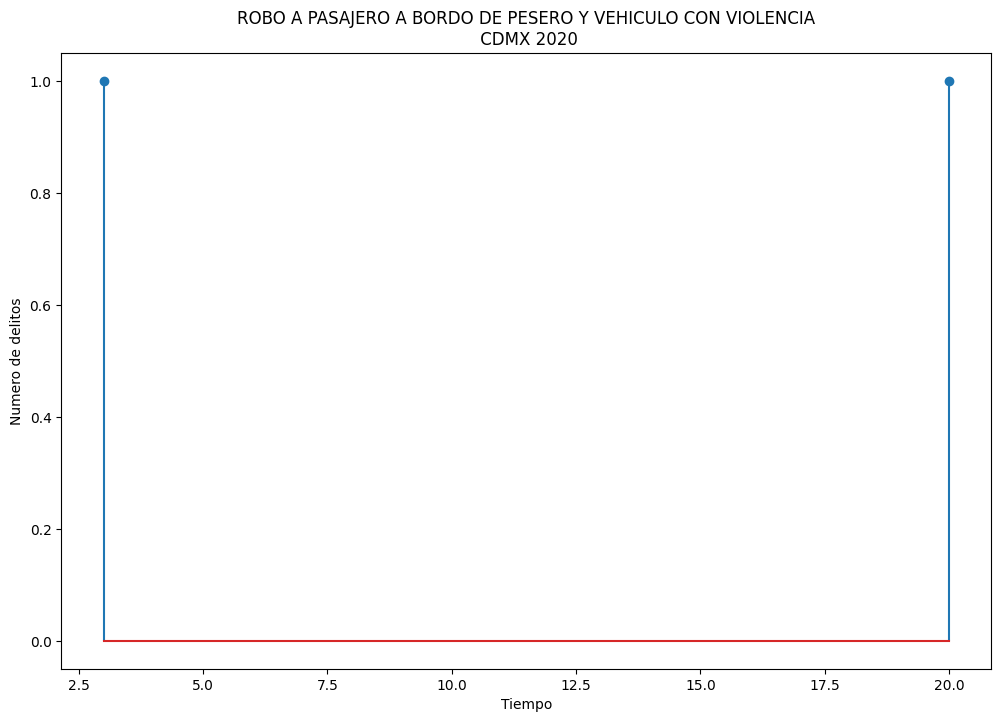

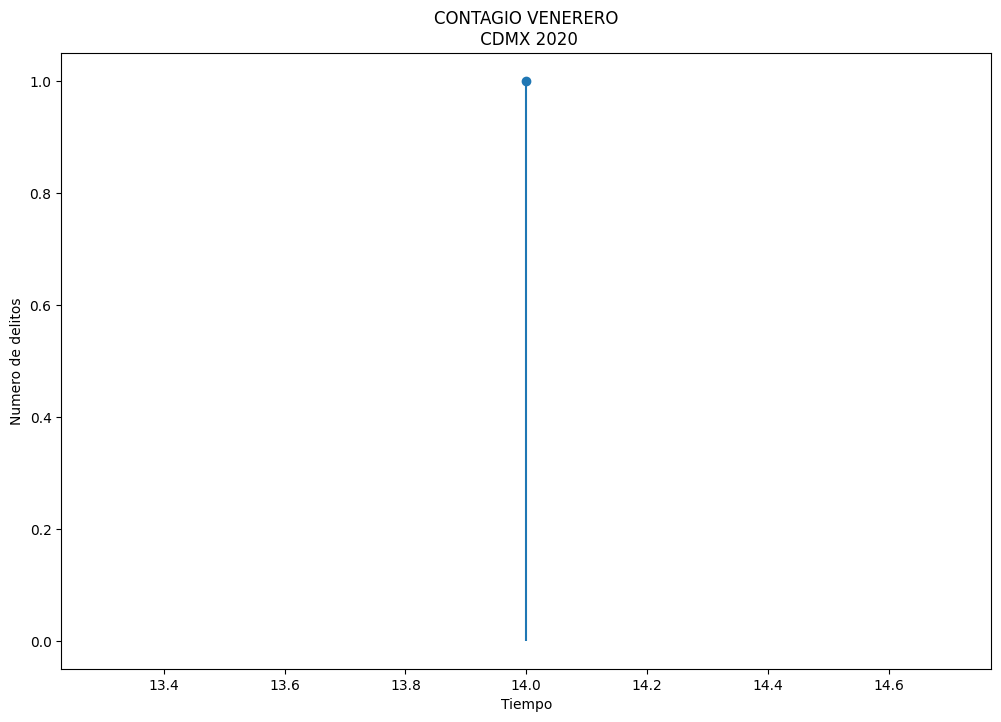

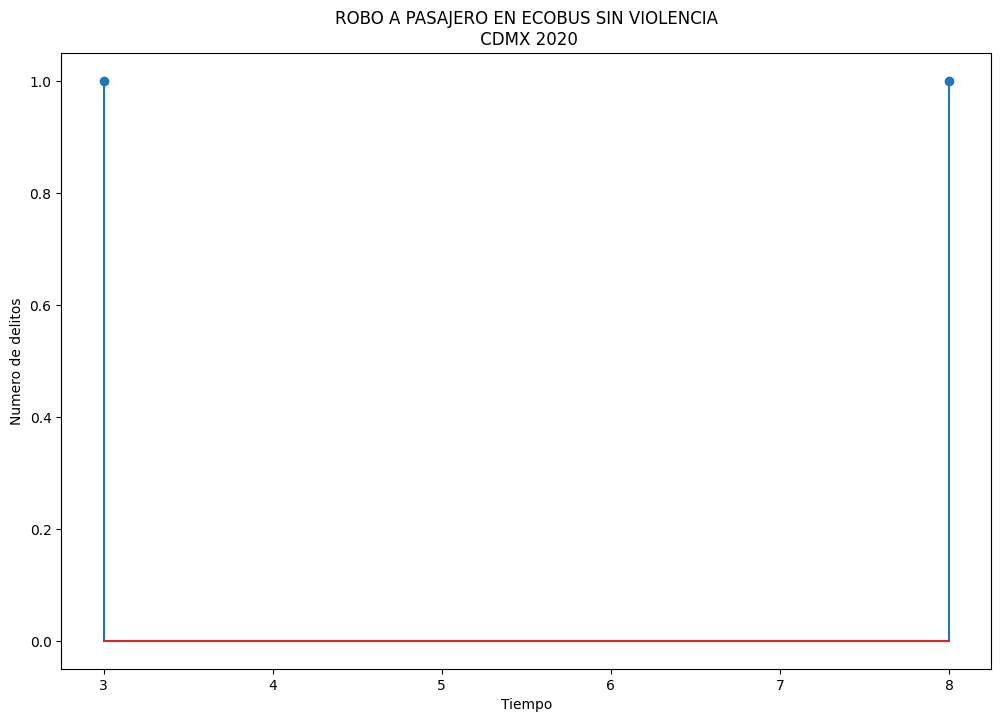

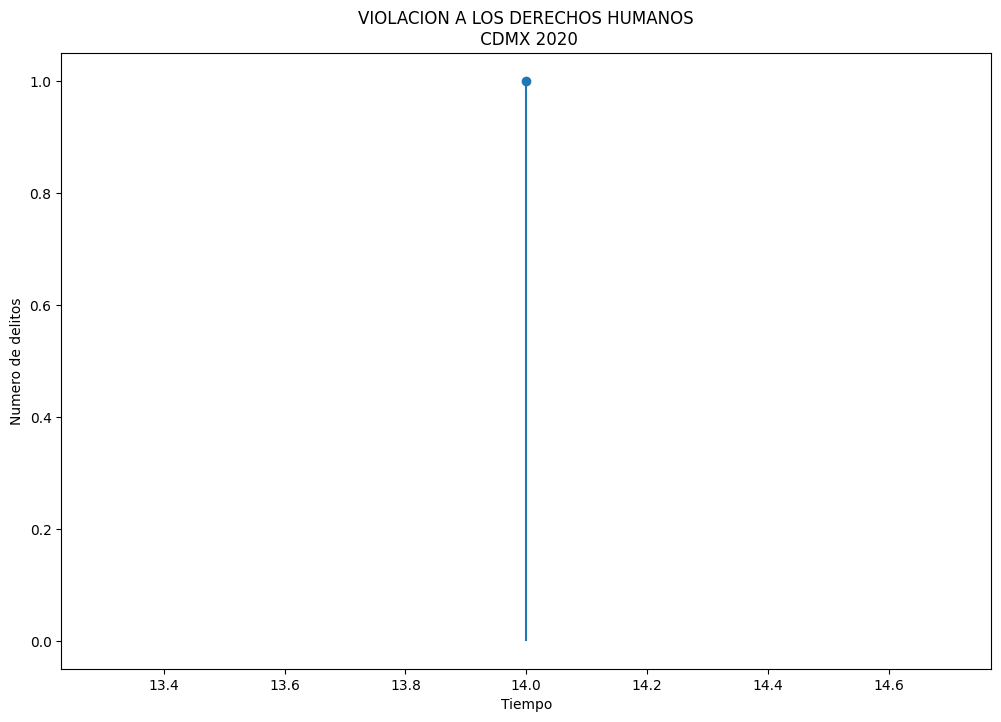

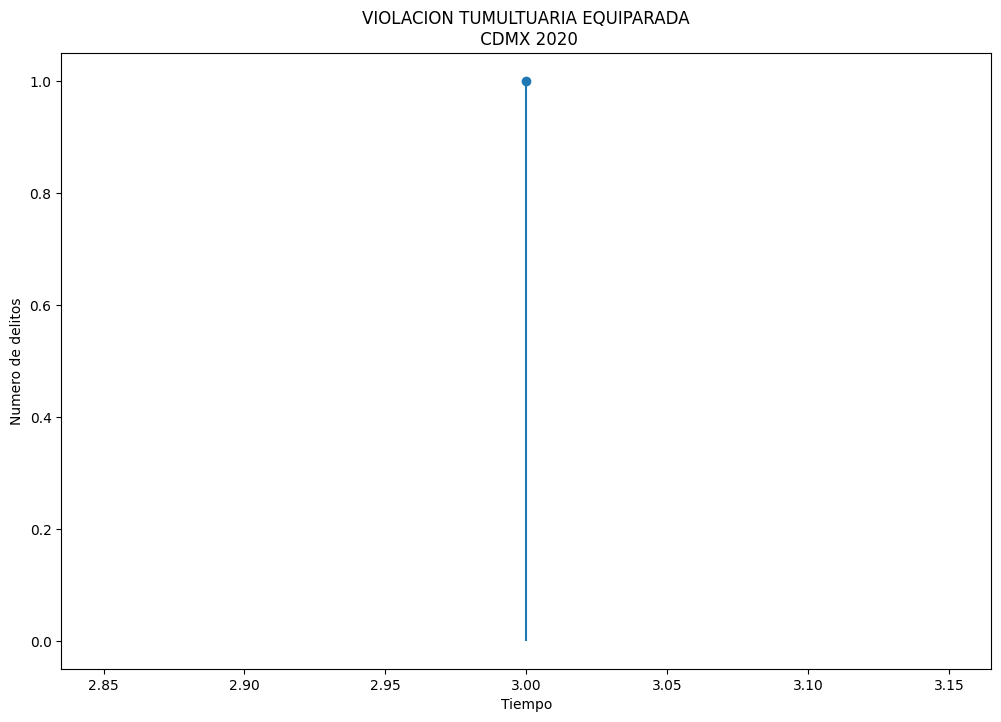

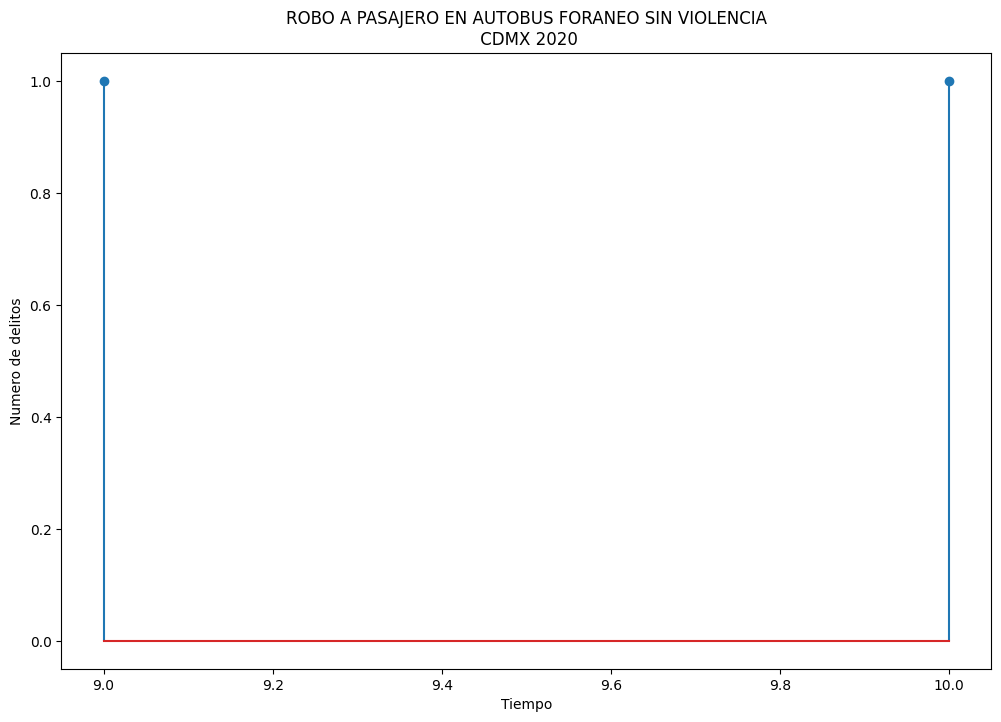

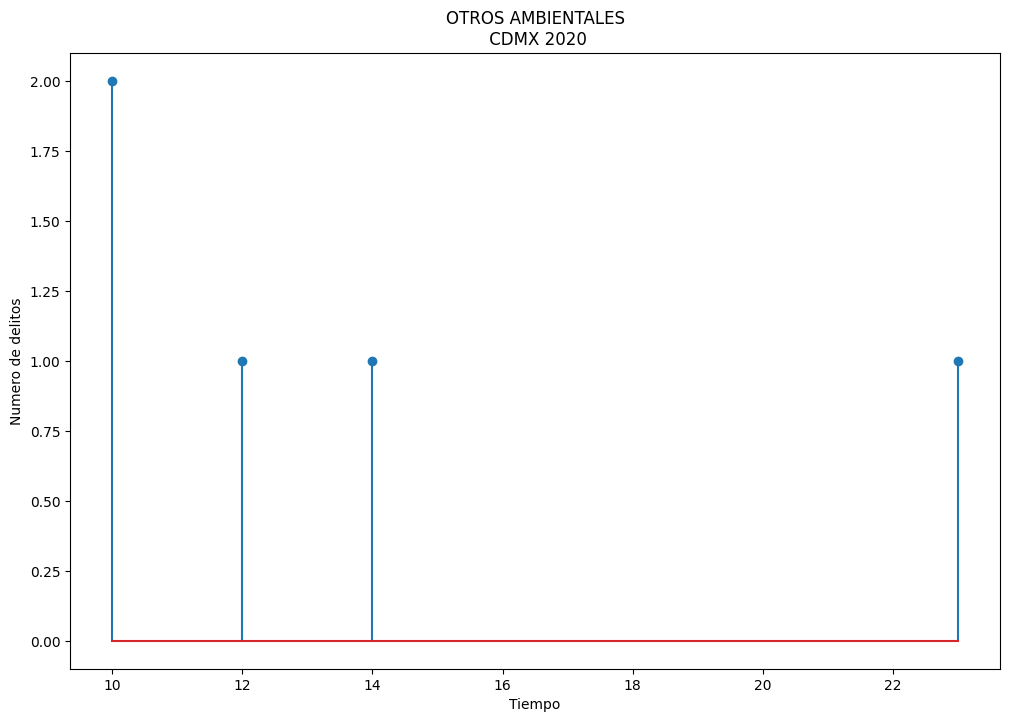

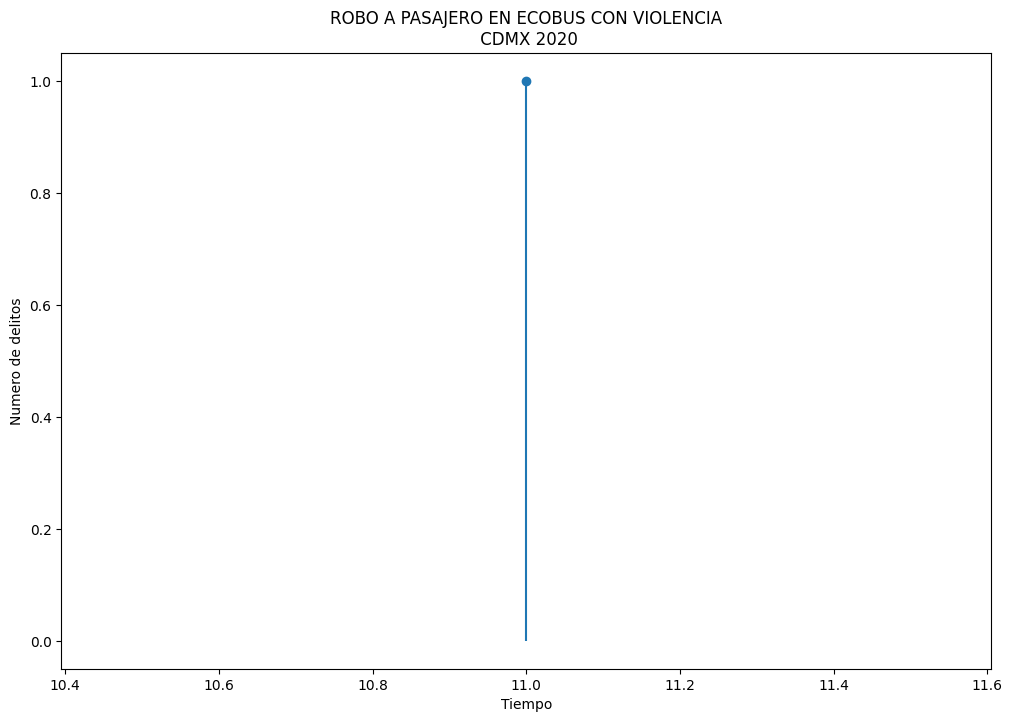

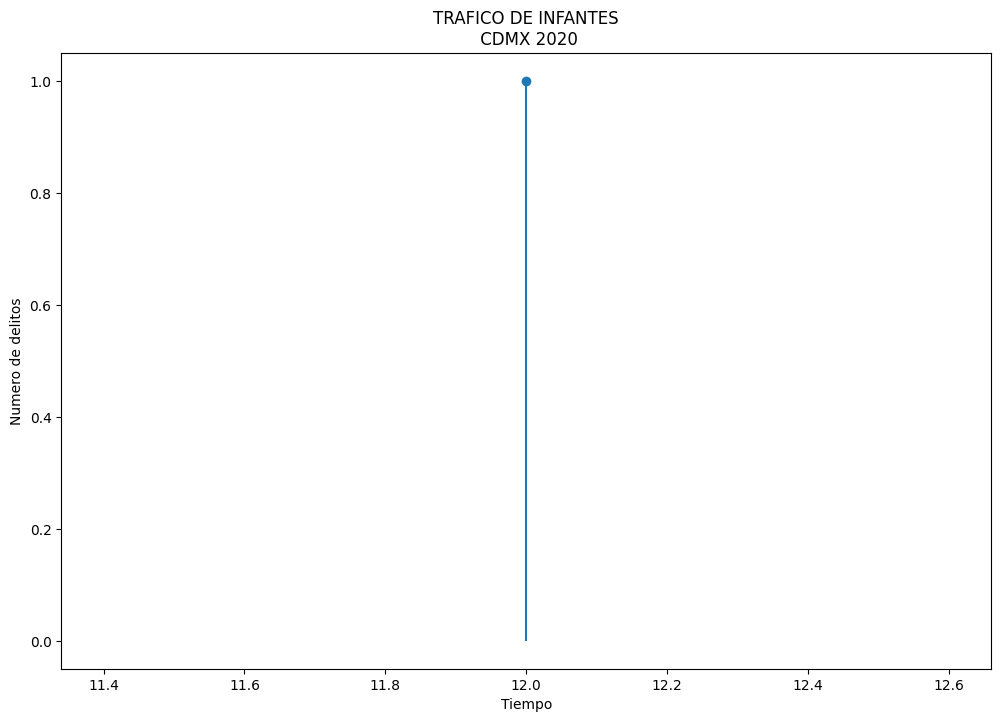

In [15]:
for i in delitos:
    resumen=data[["fecha_hechos","delito"]][data["delito"]==i]
    y=resumen.groupby(resumen.fecha_hechos.dt.hour).count()["delito"]
    x=resumen.groupby(resumen.fecha_hechos.dt.hour).count().index
    grafica=(plt.figure(figsize=(12,8)))
    plt.stem(x,y)
    plt.title(i+"\n CDMX 2020")
    plt.xlabel("Tiempo")
    plt.ylabel("Numero de delitos")
    plt.savefig("delitos/"+i.replace("/","_").replace(" ","_")+".jpg",bbox_inches="tight")
    